<a href="https://colab.research.google.com/github/Rusty-Thunderbird/NIFTY50_Options-Optimising-Strategy/blob/main/AlgoBulls_1min_Data-OptionsStrategyBacktTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nsepythonserver
!pip install --upgrade nsepythonserver
from nsepythonserver import *
print(indices)
!pip install nsepythonserver pandas pandas_ta numpy --quiet

['NIFTY', 'FINNIFTY', 'BANKNIFTY']
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_pickle('/content/drive/MyDrive/Options_Data/AlgoBulls_Data/NIFTY_Data/NIFTY02JAN2522450PE.pickle')

In [ ]:
# Show the first 5 rows
print(df.head())

# Show info about columns and types
print(df.info())

# Show summary statistics
print(df.describe())

                      Open   High    Low  Close      OI  Volume
TimeStamp                                                      
2024-12-20 10:05:00  16.90  16.90  14.90  15.05     0.0    4575
2024-12-20 10:06:00  15.10  15.10  15.10  15.10  8550.0    4275
2024-12-20 10:19:00  11.55  11.55  11.55  11.55  8625.0     150
2024-12-20 10:28:00  12.10  12.10  12.10  12.10  8700.0     225
2024-12-20 10:33:00  11.15  11.15  11.15  11.15  8700.0     150
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1937 entries, 2024-12-20 10:05:00 to 2025-01-02 15:28:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1937 non-null   float64
 1   High    1937 non-null   float64
 2   Low     1937 non-null   float64
 3   Close   1937 non-null   float64
 4   OI      1937 non-null   float64
 5   Volume  1937 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 105.9 KB
None
              Open         High          Low        Close

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/NIFTY 50.pickle'

df = pd.read_pickle(file_path)

# Show the first 5 rows
print(df.tail(10))

# Show info about columns and types
print(df.info())

# Show summary statistics
print(df.describe())


               Open     High      Low    Close     Volume
TimeStamp                                                
2025-05-13  24864.1  24973.8  24547.5  24578.3  422977876
2025-05-14  24613.8  24767.6  24535.6  24666.9  345490805
2025-05-15  24694.4  25116.2  24494.4  25062.1  500821889
2025-05-16  25064.7  25070.0  24953.1  25019.8  432717092
2025-05-19  25005.3  25062.9  24916.7  24945.4  255254340
2025-05-20  24996.2  25010.3  24669.7  24683.9  414799113
2025-05-21  24744.2  24946.2  24685.3  24813.4  332724952
2025-05-22  24733.9  24737.5  24462.4  24609.7  403279638
2025-05-23  24639.5  24909.1  24614.1  24853.2  270470348
2025-05-26  24919.3  25079.2  24900.5  25001.2  302799227
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1567 entries, 2019-01-02 to 2025-05-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1567 non-null   float64
 1   High    1567 non-null   float64
 2   Low     1567 non-null   flo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import pandas_ta as ta
import os
import glob
from datetime import datetime, timedelta

# ======================================================================
# DATA LOADING - ADAPTED FOR PICKLE FILES
# ======================================================================

# Load NIFTY 50 Spot Data
nifty_spot = pd.read_pickle('/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/NIFTY 50.pickle')

# Load Options Data
def load_options_data(start_date, end_date):
    options_dir = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/NIFTY_Data'
    all_files = glob.glob(os.path.join(options_dir, "*.pickle"))

    options_list = []
    for file in all_files:
        # Extract metadata from filename
        filename = os.path.basename(file)
        expiry_str = filename.split('NIFTY')[1][:7]  # Extract date part
        expiry_date = datetime.strptime(expiry_str, '%d%b%y').date()
        strike_info = filename.split('PE')[0].split('CE')[0][-5:]
        strike_price = int(strike_info)
        option_type = 'PE' if 'PE' in filename else 'CE'

        # Load data
        df = pd.read_pickle(file)
        df = df.loc[start_date:end_date]
        if not df.empty:
            df['Expiry'] = expiry_date
            df['Strike'] = strike_price
            df['Type'] = option_type
            options_list.append(df)

    return pd.concat(options_list).sort_index()

# ======================================================================
# SIGNAL GENERATION (DAILY) - PRESERVED FROM ORIGINAL LOGIC
# ======================================================================

# Resample to daily for signal generation
daily_spot = nifty_spot.resample('D').last()
daily_spot['MA21'] = daily_spot['Close'].rolling(21).mean()
daily_spot['MA22'] = daily_spot['Close'].rolling(22).mean()
daily_spot['RSI'] = ta.rsi(daily_spot['Close'], length=14)
macd = ta.macd(daily_spot['Close'])
daily_spot['MACD'] = macd['MACD_12_26_9']
daily_spot['ATR'] = ta.atr(daily_spot['High'], daily_spot['Low'],
                          daily_spot['Close'], length=14)
daily_spot['IV_Rank'] = (daily_spot['ATR'] - daily_spot['ATR'].rolling(14).min()) / \
                       (daily_spot['ATR'].rolling(14).max() - daily_spot['ATR'].rolling(14).min())

# Generate signals
daily_spot['Signal'] = 0
bullish = (daily_spot['MA21'] > daily_spot['MA22']) & \
          (daily_spot['RSI'] > 50) & \
          (daily_spot['MACD'] > 0) & \
          (daily_spot['IV_Rank'] > 0.3)
bearish = (daily_spot['MA21'] < daily_spot['MA22']) & \
          (daily_spot['RSI'] < 60) & \
          (daily_spot['MACD'] < 1) & \
          (daily_spot['IV_Rank'] > 0.1)
daily_spot.loc[bullish, 'Signal'] = 1
daily_spot.loc[bearish, 'Signal'] = -1

# ======================================================================
# BACKTESTING ENGINE - MODIFIED FOR MINUTE DATA
# ======================================================================

class OptionPosition:
    def __init__(self, entry_time, option_type, strike, expiry,
                 entry_price, quantity, is_long):
        self.entry_time = entry_time
        self.option_type = option_type
        self.strike = strike
        self.expiry = expiry
        self.entry_price = entry_price
        self.quantity = quantity
        self.is_long = is_long
        self.exit_time = None
        self.exit_price = None

def backtest_strategy():
    # Initialize parameters
    initial_capital = 1_000_000
    cash = initial_capital
    margin_used = 0
    open_positions = []
    trade_log = []
    portfolio_values = []
    current_date = datetime(2025, 1, 1).date()

    # Load options data for backtest period
    options_data = load_options_data('2025-01-01', '2025-05-15')

    # Main loop through each minute
    for timestamp, spot_row in nifty_spot.iterrows():
        # Only process market hours (adjust as needed)
        if timestamp.time() < datetime.strptime("09:15", "%H:%M").time() or \
           timestamp.time() > datetime.strptime("15:30", "%H:%M").time():
            continue

        # Get daily signal at market open
        if timestamp.time() == datetime.strptime("09:15", "%H:%M").time():
            current_signal = daily_spot.loc[timestamp.date()].Signal

        # Execute trades based on signal
        if current_signal != 0:
            # Filter options for current minute
            current_options = options_data.loc[[timestamp]]

            # Original strategy logic adapted for minute data
            if current_signal == 1:  # Bullish
                # Implement long call logic
                pass
            elif current_signal == -1:  # Bearish
                # Implement long put logic
                pass

        # Update portfolio value
        portfolio_value = cash - margin_used
        portfolio_values.append(portfolio_value)

    return trade_log, portfolio_values

# ======================================================================
# RISK MANAGEMENT - PRESERVED FROM ORIGINAL
# ======================================================================
STRATEGY_PARAMS = {
    'base_risk': 0.01,
    'min_oi': 50000,
    'lot_size': 50,
    'max_holding_days': 5,
    'atr_multiplier': 1.5,
    'spread_width_pct': 0.10,
    'min_credit_pct': 0.01,
    'commission_per_lot': 20,
    'slippage_pct': 0.001,
    'margin_pct': 0.20,
    'max_drawdown_pct': 0.20,
    'hold_spreads_to_expiry': True
}

# Execute backtest
trade_log, portfolio_values = backtest_strategy()

# Generate performance report
# (Include your existing performance analysis code here)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EOFError: Ran out of input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Check critical files
import os
print("NIFTY Spot exists:", os.path.exists('/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/NIFTY 50.pickle'))
print("Options files exist:", len(os.listdir('/content/drive/MyDrive/Options_Data/AlgoBulls_Data/NIFTY_Data')) > 0)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
NIFTY Spot exists: True
Options files exist: True


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import glob
import os
from datetime import datetime

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-03-01'
end_date = '2025-05-15'
initial_capital = 1_000_000
lot_size = 50  # Nifty standard

# ======================================================================
# DATA LOADING (FIXED)
# ======================================================================
def load_spot():
    """Load and preprocess spot data with proper timezone"""
    df = pd.read_pickle('/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/NIFTY 50.pickle')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    return df.loc[start_date:end_date]

def load_options():
    """Robust filename parsing with improved error handling"""
    options = []
    path_pattern = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/NIFTY_Data/NIFTY*.pickle'

    for file in glob.glob(path_pattern):
        if os.path.getsize(file) == 0:
            continue

        try:
            filename = os.path.basename(file)
            # Extract metadata from filename
            date_str = filename[5:12]  # '02JAN25'
            remainder = filename[12:-7]  # '22450CE' from 'NIFTY02JAN2522450CE.pickle'

            strike = int(remainder[:-2])  # '22450'
            option_type = remainder[-2:]  # 'CE' or 'PE'

            if option_type not in ['CE', 'PE']:
                raise ValueError(f"Invalid option type in {filename}")

            expiry = datetime.strptime(date_str, '%d%b%y').date()

            # Load and filter data
            df = pd.read_pickle(file)
            df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
            df = df.loc[start_date:end_date]

            # Add metadata safely
            df = df.assign(
                Strike=strike,
                Type=option_type,
                Expiry=expiry
            )

            options.append(df)
        except Exception as e:
            print(f"Skipped {filename}: {str(e)}")
            continue

    return pd.concat(options) if options else pd.DataFrame()

# ======================================================================
# STRATEGY IMPLEMENTATION (FIXED)
# ======================================================================
def calculate_signals(spot_data):
    """SMA crossover strategy with edge case handling"""
    daily_close = spot_data['Close'].resample('D').last()

    # Calculate SMAs with minimum data requirement
    sma21 = daily_close.rolling(21, min_periods=1).mean()
    sma22 = daily_close.rolling(22, min_periods=1).mean()

    # Generate signals
    signals = np.where(sma21 > sma22, 1, -1)
    return pd.Series(signals, index=daily_close.index)

def execute_trades(spot_data, options_data, signals):
    """Robust trading engine with proper index handling"""
    portfolio = {
        'cash': initial_capital,
        'positions': [],
        'history': [],
        'current_signal': 0
    }

    for timestamp, spot_row in spot_data.iterrows():
        # Check for matching options data (FIXED)
        if timestamp not in options_data.index:
            continue

        # Update signal at market open
        if timestamp.time().hour == 9 and timestamp.time().minute == 15:
            try:
                current_date = timestamp.date()
                portfolio['current_signal'] = signals.loc[current_date]
            except KeyError:
                portfolio['current_signal'] = 0

        # Get current options
        current_options = options_data.loc[timestamp:timestamp]
        if current_options.empty:
            continue

        # Trade execution logic
        if portfolio['current_signal'] != 0:
            spot_price = spot_row['Close']
            atm_strike = int(round(spot_price / 50) * 50)
            option_type = 'CE' if portfolio['current_signal'] == 1 else 'PE'

            # Find matching contract
            contract = current_options[
                (current_options['Strike'] == atm_strike) &
                (current_options['Type'] == option_type)
            ]

            if not contract.empty:
                contract = contract.iloc[0]
                price = contract['Close']

                # Risk-managed position sizing
                max_lots = int(portfolio['cash'] // (price * lot_size))
                if max_lots > 0:
                    cost = price * lot_size * max_lots
                    portfolio['cash'] -= cost
                    portfolio['positions'].append({
                        'entry_time': timestamp,
                        'strike': atm_strike,
                        'type': option_type,
                        'quantity': max_lots,
                        'entry_price': price
                    })

        # Update portfolio value
        position_value = sum(
            pos['entry_price'] * lot_size * pos['quantity']
            for pos in portfolio['positions']
        )
        portfolio['history'].append({
            'timestamp': timestamp,
            'value': portfolio['cash'] + position_value
        })

    return portfolio

# ======================================================================
# EXECUTION FLOW (WITH DEBUGGING)
# ======================================================================
# Load data
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data records: {len(spot_data)}")

print("\nLoading options data...")
options_data = load_options()
print(f"Options data records: {len(options_data)}")
if not options_data.empty:
    print(f"Options timeframe: {options_data.index.min()} to {options_data.index.max()}")
    print(f"Available expiries: {options_data['Expiry'].unique()}")

# Generate signals
print("\nCalculating signals...")
signals = calculate_signals(spot_data)
print(f"Signal days generated: {len(signals)}")

# Execute trades
print("\nRunning backtest...")
portfolio = execute_trades(spot_data, options_data, signals)
print("Backtest completed successfully!")

# Results
if portfolio['history']:
    final_value = portfolio['history'][-1]['value']
    print(f"\nFINAL PORTFOLIO VALUE: ₹{final_value:,.2f}")
    print(f"TOTAL RETURN: {(final_value/initial_capital - 1)*100:.2f}%")
    print(f"TRADES EXECUTED: {len(portfolio['positions'])}")
else:
    print("\nNO TRADES EXECUTED - Check data alignment and signals")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data records: 48

Loading options data...
Skipped NIFTY09JAN2524050.pickle: Invalid option type in NIFTY09JAN2524050.pickle
Options data records: 1144847
Options timeframe: 2025-03-03 09:15:00+05:30 to 2025-05-15 15:29:00+05:30
Available expiries: [datetime.date(2025, 4, 3) datetime.date(2025, 5, 15)
 datetime.date(2025, 3, 13) datetime.date(2025, 5, 8)
 datetime.date(2025, 3, 6)]

Calculating signals...
Signal days generated: 74

Running backtest...
Backtest completed successfully!

NO TRADES EXECUTED - Check data alignment and signals


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import glob
import os
from datetime import datetime

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-03-01'
end_date = '2025-05-15'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade

# ======================================================================
# DATA LOADING (FIXED PARSING)
# ======================================================================
def load_spot():
    df = pd.read_pickle('/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/NIFTY 50.pickle')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    return df.loc[start_date:end_date]

def load_options():
    options = []
    path_pattern = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/NIFTY_Data/NIFTY*.pickle'

    for file in glob.glob(path_pattern):
        if os.path.getsize(file) == 0:
            continue

        try:
            filename = os.path.basename(file)
            parts = filename.split('NIFTY')[1].split('.')[0]  # '09JAN2524050PE'

            date_str = parts[:7]
            remainder = parts[7:]

            option_type = remainder[-2:]
            if option_type not in ['CE', 'PE']:
                raise ValueError(f"Invalid option type in {filename}")

            strike = int(remainder[:-2])
            expiry = datetime.strptime(date_str, '%d%b%y').date()

            df = pd.read_pickle(file)
            df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
            df = df.loc[start_date:end_date]

            df = df.assign(
                Strike=strike,
                Type=option_type,
                Expiry=expiry
            )

            options.append(df)
        except Exception as e:
            print(f"Skipped {filename}: {str(e)}")
            continue

    return pd.concat(options) if options else pd.DataFrame()

# ======================================================================
# STRATEGY IMPLEMENTATION (WITH DEBUGGING)
# ======================================================================
def calculate_signals(spot_data):
    daily_close = spot_data['Close'].resample('D').last()

    sma21 = daily_close.rolling(21, min_periods=1).mean()
    sma22 = daily_close.rolling(22, min_periods=1).mean()

    signals = np.where(sma21 > sma22, 1, -1)
    return pd.Series(signals, index=daily_close.index)

def execute_trades(spot_data, options_data, signals):
    portfolio = {
        'cash': initial_capital,
        'positions': [],
        'history': [],
        'current_signal': 0,
        'trade_log': []
    }

    print("\nSignal Summary:")
    print(signals.value_counts())

    for timestamp, spot_row in spot_data.iterrows():
        if timestamp not in options_data.index:
            continue

        # Update signal at market open
        if timestamp.time().hour == 9 and timestamp.time().minute == 15:
            try:
                current_date = timestamp.date()
                portfolio['current_signal'] = signals.loc[current_date]
                print(f"\n{current_date} Signal: {portfolio['current_signal']}")
            except KeyError:
                portfolio['current_signal'] = 0

        current_options = options_data.loc[timestamp:timestamp]
        if current_options.empty:
            continue

        if portfolio['current_signal'] != 0:
            spot_price = spot_row['Close']
            atm_strike = int(round(spot_price / 50) * 50)
            option_type = 'CE' if portfolio['current_signal'] == 1 else 'PE'

            contract = current_options[
                (current_options['Strike'] == atm_strike) &
                (current_options['Type'] == option_type)
            ]

            if not contract.empty:
                contract = contract.iloc[0]
                price = contract['Close']

                # Risk-managed position sizing
                max_lots = int((portfolio['cash'] * risk_per_trade) / (price * lot_size))

                if max_lots > 0:
                    cost = price * lot_size * max_lots
                    portfolio['cash'] -= cost
                    portfolio['positions'].append({
                        'entry_time': timestamp,
                        'strike': atm_strike,
                        'type': option_type,
                        'quantity': max_lots,
                        'entry_price': price
                    })
                    print(f"Trade executed: {max_lots} lots of {atm_strike}{option_type} at ₹{price}")
            else:
                print(f"No {option_type} contracts at {atm_strike} on {timestamp}")

        # Update portfolio value
        position_value = sum(
            pos['entry_price'] * lot_size * pos['quantity']
            for pos in portfolio['positions']
        )
        portfolio['history'].append({
            'timestamp': timestamp,
            'value': portfolio['cash'] + position_value
        })

    return portfolio

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading options data...")
options_data = load_options()
print(f"Options data shape: {options_data.shape}")
if not options_data.empty:
    print("\nFirst 5 options records:")
    print(options_data[['Strike', 'Type', 'Expiry']].head())
    print("\nAvailable expiries:", options_data['Expiry'].unique())

print("\nGenerating signals...")
signals = calculate_signals(spot_data)
print("\nSignal details:")
print(signals.head(10))

print("\nExecuting trades...")
portfolio = execute_trades(spot_data, options_data, signals)

if portfolio['history']:
    final_value = portfolio['history'][-1]['value']
    print(f"\nFINAL VALUE: ₹{final_value:,.2f}")
    print(f"RETURN: {(final_value/initial_capital - 1)*100:.2f}%")
else:
    print("\nNO TRADES EXECUTED - Potential issues:")
    print("1. Signals not crossing over")
    print("2. Options data missing required strikes/expiries")
    print("3. Timestamp mismatches between spot and options data")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (48, 5)

Loading options data...
Skipped NIFTY09JAN2524050.pickle: Invalid option type in NIFTY09JAN2524050.pickle
Options data shape: (1144847, 9)

First 5 options records:
                           Strike Type      Expiry
TimeStamp                                         
2025-03-07 10:49:00+05:30   23000   PE  2025-04-03
2025-03-07 10:56:00+05:30   23000   PE  2025-04-03
2025-03-07 11:33:00+05:30   23000   PE  2025-04-03
2025-03-07 11:35:00+05:30   23000   PE  2025-04-03
2025-03-07 11:55:00+05:30   23000   PE  2025-04-03

Available expiries: [datetime.date(2025, 4, 3) datetime.date(2025, 5, 15)
 datetime.date(2025, 3, 13) datetime.date(2025, 5, 8)
 datetime.date(2025, 3, 6)]

Generating signals...

Signal details:
TimeStamp
2025-03-03 00:00:00+05:30   -1
2025-03-04 00:00:00+05:30   -1
2025-03-05 00:00:00+05:30   -1
20

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import glob
import os
from datetime import datetime

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade

# ======================================================================
# DATA LOADING (FIXED PARSING)
# ======================================================================
def load_spot():
    df = pd.read_pickle('/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/NIFTY 50.pickle')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    return df.loc[start_date:end_date]

def load_options():
    options = []
    path_pattern = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/NIFTY_Data/NIFTY*.pickle'

    for file in glob.glob(path_pattern):
        if os.path.getsize(file) == 0:
            continue

        try:
            filename = os.path.basename(file)
            # Example: NIFTY09JAN2524050PE.pickle
            parts = filename.split('NIFTY')[1].split('.')[0]  # '09JAN2524050PE'
            # Find where the numeric part ends (strike price)
            # Typically, expiry is 7 chars (e.g., 09JAN25), then strike, then CE/PE
            date_str = parts[:7]  # '09JAN25'
            remainder = parts[7:]  # '24050PE' or similar

            # Option type is always last 2 chars
            option_type = remainder[-2:]
            if option_type not in ['CE', 'PE']:
                raise ValueError(f"Invalid option type in {filename}")

            # Strike is the numeric part before CE/PE
            strike = int(remainder[:-2])
            expiry = datetime.strptime(date_str, '%d%b%y').date()

            df = pd.read_pickle(file)
            df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
            df = df.loc[start_date:end_date]

            df = df.assign(
                Strike=strike,
                Type=option_type,
                Expiry=expiry
            )

            options.append(df)
        except Exception as e:
            print(f"Skipped {filename}: {str(e)}")
            continue

    return pd.concat(options) if options else pd.DataFrame()

# ======================================================================
# STRATEGY IMPLEMENTATION (WITH DEBUGGING)
# ======================================================================
def calculate_signals(spot_data):
    daily_close = spot_data['Close'].resample('D').last()
    sma21 = daily_close.rolling(21, min_periods=1).mean()
    sma22 = daily_close.rolling(22, min_periods=1).mean()
    signals = np.where(sma21 > sma22, 1, -1)
    return pd.Series(signals, index=daily_close.index)

def execute_trades(spot_data, options_data, signals):
    portfolio = {
        'cash': initial_capital,
        'positions': [],
        'history': [],
        'current_signal': 0,
        'trade_log': []
    }

    print("\nSignal Summary:")
    print(signals.value_counts())

    for timestamp, spot_row in spot_data.iterrows():
        # Only trade at 9:15 AM
        if timestamp.time().hour != 9 or timestamp.time().minute != 15:
            continue

        # Update signal at market open
        try:
            current_date = timestamp.date()
            portfolio['current_signal'] = signals.loc[current_date]
            print(f"\n{current_date} Signal: {portfolio['current_signal']}")
        except KeyError:
            portfolio['current_signal'] = 0

        # Find options for this timestamp
        current_options = options_data.loc[timestamp:timestamp]
        if current_options.empty:
            print(f"No options data at {timestamp}")
            continue

        if portfolio['current_signal'] != 0:
            spot_price = spot_row['Close']
            atm_strike = int(round(spot_price / 50) * 50)
            option_type = 'CE' if portfolio['current_signal'] == 1 else 'PE'

            contract = current_options[
                (current_options['Strike'] == atm_strike) &
                (current_options['Type'] == option_type)
            ]

            if not contract.empty:
                contract = contract.iloc[0]
                price = contract['Close']

                # Risk-managed position sizing
                max_lots = int((portfolio['cash'] * risk_per_trade) / (price * lot_size))

                if max_lots > 0:
                    cost = price * lot_size * max_lots
                    portfolio['cash'] -= cost
                    portfolio['positions'].append({
                        'entry_time': timestamp,
                        'strike': atm_strike,
                        'type': option_type,
                        'quantity': max_lots,
                        'entry_price': price
                    })
                    print(f"Trade executed: {max_lots} lots of {atm_strike}{option_type} at ₹{price}")
                else:
                    print(f"Not enough cash for even 1 lot at {timestamp} ({atm_strike}{option_type} @ ₹{price})")
            else:
                print(f"No {option_type} contracts at {atm_strike} on {timestamp}")

        # Update portfolio value
        position_value = sum(
            pos['entry_price'] * lot_size * pos['quantity']
            for pos in portfolio['positions']
        )
        portfolio['history'].append({
            'timestamp': timestamp,
            'value': portfolio['cash'] + position_value
        })

    return portfolio

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading options data...")
options_data = load_options()
print(f"Options data shape: {options_data.shape}")

# Export first 5 options records to CSV
if not options_data.empty:
    options_sample = options_data[['Strike', 'Type', 'Expiry']]
    options_sample.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample.csv')
    print("\nExported options records to /content/drive/MyDrive/Options_Data/Jan_Feb_options_sample.csv")
    print(options_sample)
    print("\nAvailable expiries:", options_data['Expiry'].unique())
else:
    print("No options data loaded.")

print("\nGenerating signals...")
signals = calculate_signals(spot_data)
signal_details = pd.DataFrame({'TimeStamp': signals.index, 'Signal': signals.values})
signal_details.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv', index=False)
print("\nExported signal details to /content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv")
print("\nSignal details:")
print(signal_details.head(10))

print("\nExecuting trades...")
portfolio = execute_trades(spot_data, options_data, signals)

if portfolio['history']:
    final_value = portfolio['history'][-1]['value']
    print(f"\nFINAL VALUE: ₹{final_value:,.2f}")
    print(f"RETURN: {(final_value/initial_capital - 1)*100:.2f}%")
else:
    print("\nNO TRADES EXECUTED - Potential issues:")
    print("1. Signals not crossing over")
    print("2. Options data missing required strikes/expiries")
    print("3. Timestamp mismatches between spot and options data")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (28, 5)

Loading options data...
Skipped NIFTY09JAN2524050.pickle: Invalid option type in NIFTY09JAN2524050.pickle
Options data shape: (1145960, 9)

Exported options records to /content/drive/MyDrive/Options_Data/Jan_Feb_options_sample.csv
                           Strike Type      Expiry
TimeStamp                                         
2025-01-10 10:28:00+05:30   23450   CE  2025-02-06
2025-01-10 11:16:00+05:30   23450   CE  2025-02-06
2025-01-10 12:01:00+05:30   23450   CE  2025-02-06
2025-01-10 12:27:00+05:30   23450   CE  2025-02-06
2025-01-13 09:47:00+05:30   23450   CE  2025-02-06
...                           ...  ...         ...
2025-02-06 15:24:00+05:30   23850   CE  2025-02-06
2025-02-06 15:25:00+05:30   23850   CE  2025-02-06
2025-02-06 15:26:00+05:30   23850   CE  2025-02-06
2025-02-06 15:27:00+05:30   2385

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import glob
import os
from datetime import datetime

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade

# ======================================================================
# DATA LOADING (FIXED PARSING)
# ======================================================================
def load_spot():
    df = pd.read_pickle('/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/NIFTY 50.pickle')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    return df.loc[start_date:end_date]

def load_options():
    options = []
    path_pattern = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/NIFTY_Data/NIFTY*.pickle'

    for file in glob.glob(path_pattern):
        if os.path.getsize(file) == 0:
            continue

        try:
            filename = os.path.basename(file)
            # Example: NIFTY09JAN2524050PE.pickle
            parts = filename.split('NIFTY')[1].split('.')[0]  # '09JAN2524050PE'
            # Find where the numeric part ends (strike price)
            # Typically, expiry is 7 chars (e.g., 09JAN25), then strike, then CE/PE
            date_str = parts[:7]  # '09JAN25'
            remainder = parts[7:]  # '24050PE' or similar

            # Option type is always last 2 chars
            option_type = remainder[-2:]
            if option_type not in ['CE', 'PE']:
                raise ValueError(f"Invalid option type in {filename}")

            # Strike is the numeric part before CE/PE
            strike = int(remainder[:-2])
            expiry = datetime.strptime(date_str, '%d%b%y').date()

            df = pd.read_pickle(file)
            df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
            df = df.loc[start_date:end_date]

            df = df.assign(
                Strike=strike,
                Type=option_type,
                Expiry=expiry
            )

            options.append(df)
        except Exception as e:
            print(f"Skipped {filename}: {str(e)}")
            continue

    return pd.concat(options) if options else pd.DataFrame()

# ======================================================================
# STRATEGY IMPLEMENTATION (WITH DEBUGGING)
# ======================================================================
def calculate_signals(spot_data):
    daily_close = spot_data['Close'].resample('D').last()
    sma21 = daily_close.rolling(21, min_periods=1).mean()
    sma22 = daily_close.rolling(22, min_periods=1).mean()
    signals = np.where(sma21 > sma22, 1, -1)
    return pd.Series(signals, index=daily_close.index)

def execute_trades(spot_data, options_data, signals):
    portfolio = {
        'cash': initial_capital,
        'positions': [],
        'history': [],
        'current_signal': 0,
        'trade_log': []
    }

    print("\nSignal Summary:")
    print(signals.value_counts())

    for timestamp, spot_row in spot_data.iterrows():
        # Only trade at 9:15 AM
        if timestamp.time().hour != 9 or timestamp.time().minute != 15:
            continue

        # Update signal at market open
        try:
            current_date = timestamp.date()
            portfolio['current_signal'] = signals.loc[current_date]
            print(f"\n{current_date} Signal: {portfolio['current_signal']}")
        except KeyError:
            portfolio['current_signal'] = 0

        # Find options for this timestamp
        current_options = options_data.loc[timestamp:timestamp]
        if current_options.empty:
            print(f"No options data at {timestamp}")
            continue

        if portfolio['current_signal'] != 0:
            spot_price = spot_row['Close']
            atm_strike = int(round(spot_price / 50) * 50)
            option_type = 'CE' if portfolio['current_signal'] == 1 else 'PE'

            contract = current_options[
                (current_options['Strike'] == atm_strike) &
                (current_options['Type'] == option_type)
            ]

            if not contract.empty:
                contract = contract.iloc[0]
                price = contract['Close']

                # Risk-managed position sizing
                max_lots = int((portfolio['cash'] * risk_per_trade) / (price * lot_size))

                if max_lots > 0:
                    cost = price * lot_size * max_lots
                    portfolio['cash'] -= cost
                    portfolio['positions'].append({
                        'entry_time': timestamp,
                        'strike': atm_strike,
                        'type': option_type,
                        'quantity': max_lots,
                        'entry_price': price
                    })
                    print(f"Trade executed: {max_lots} lots of {atm_strike}{option_type} at ₹{price}")
                else:
                    print(f"Not enough cash for even 1 lot at {timestamp} ({atm_strike}{option_type} @ ₹{price})")
            else:
                print(f"No {option_type} contracts at {atm_strike} on {timestamp}")

        # Update portfolio value
        position_value = sum(
            pos['entry_price'] * lot_size * pos['quantity']
            for pos in portfolio['positions']
        )
        portfolio['history'].append({
            'timestamp': timestamp,
            'value': portfolio['cash'] + position_value
        })

    return portfolio

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading options data...")
options_data = load_options()
print(f"Options data shape: {options_data.shape}")

# Export only options with expiry date 06th Feb 2025 to CSV, including OHLC, OI, Volume
if not options_data.empty:
    # Define the expiry date you want (adjust the format if needed)
    target_expiry = pd.to_datetime('2025-02-06').date()
    # Filter the DataFrame and select all needed columns
    options_sample = options_data[options_data['Expiry'] == target_expiry][
        ['Open', 'High', 'Low', 'Close', 'OI', 'Volume', 'Strike', 'Type', 'Expiry']
    ]
    # For display, you can do this (optional):
    options_sample['Expiry'] = options_sample['Expiry'].astype(str)
    # Export to CSV
    options_sample.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_Expiry_06Feb2025.csv', index=False)
    print("\nExported options records with expiry 06-Feb-2025 to /content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_Expiry_06Feb2025.csv")
    print(options_sample)
else:
    print("No options data loaded.")

print("\nGenerating signals...")
signals = calculate_signals(spot_data)
signal_details = pd.DataFrame({'TimeStamp': signals.index, 'Signal': signals.values})
signal_details.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv', index=False)
print("\nExported signal details to /content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv")
print("\nSignal details:")
print(signal_details.head(10))

print("\nExecuting trades...")
portfolio = execute_trades(spot_data, options_data, signals)

if portfolio['history']:
    final_value = portfolio['history'][-1]['value']
    print(f"\nFINAL VALUE: ₹{final_value:,.2f}")
    print(f"RETURN: {(final_value/initial_capital - 1)*100:.2f}%")
else:
    print("\nNO TRADES EXECUTED - Potential issues:")
    print("1. Signals not crossing over")
    print("2. Options data missing required strikes/expiries")
    print("3. Timestamp mismatches between spot and options data")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (28, 5)

Loading options data...
Skipped NIFTY09JAN2524050.pickle: Invalid option type in NIFTY09JAN2524050.pickle
Options data shape: (1145960, 9)

Exported options records with expiry 06-Feb-2025 to /content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_Expiry_06Feb2025.csv
                             Open    High     Low   Close         OI  Volume  \
TimeStamp                                                                      
2025-01-10 10:28:00+05:30  483.45  483.45  483.45  483.45       75.0     150   
2025-01-10 11:16:00+05:30  569.60  569.60  569.60  569.60      150.0     150   
2025-01-10 12:01:00+05:30  528.90  528.90  528.90  528.90      150.0     150   
2025-01-10 12:27:00+05:30  535.85  535.85  535.85  535.85      225.0     225   
2025-01-13 09:47:00+05:30  357.00  357.00  357.00  357.00      225.0    

In [ ]:
import pandas as pd

# Define the file path and target date range
file_path = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/NIFTY_50_minute_data.csv'
output_path = '/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv'

# Load the CSV, parsing dates and using chunks for memory efficiency
chunksize = 100000  # Adjust based on your memory constraints
filtered_chunks = []

for chunk in pd.read_csv(file_path, parse_dates=['date'], chunksize=chunksize):
    # Filter rows for Jan 1, 2025 to Feb 7, 2025 (inclusive)
    mask = (chunk['date'] >= '2025-01-01') & (chunk['date'] <= '2025-02-07 23:59:59')
    filtered_chunk = chunk.loc[mask]
    filtered_chunks.append(filtered_chunk)

# Combine all filtered chunks
filtered_data = pd.concat(filtered_chunks)

# Save the filtered data
filtered_data.to_csv(output_path, index=False)

print(f"Filtered data saved to {output_path}")


Filtered data saved to /content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade

# ======================================================================
# DATA LOADING (USING CSV INSTEAD OF PICKLE)
# ======================================================================
def load_spot():
    # Load minute data
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    # Set datetime index and localize to IST
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    # Filter for safety (should already be filtered, but just in case)
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    if not os.path.exists(signals_path):
        print("Signal file not found. Please check the path.")
        return None
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    # Handle timezone: if already tz-aware, convert; else localize
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_Expiry_06Feb2025.csv'
    if not os.path.exists(sample_path):
        print("Options sample file not found. Please check the path.")
        return None
    return pd.read_csv(sample_path)

# ======================================================================
# STRATEGY IMPLEMENTATION (WITH DEBUGGING)
# ======================================================================
def execute_trades(spot_data, signals):
    if signals is None:
        print("No signals loaded. Cannot execute trades.")
        return {
            'cash': initial_capital,
            'positions': [],
            'history': [],
            'current_signal': 0,
            'trade_log': []
        }

    portfolio = {
        'cash': initial_capital,
        'positions': [],
        'history': [],
        'current_signal': 0,
        'trade_log': []
    }

    print("\nSignal Summary:")
    print(signals['Signal'].value_counts())

    for date in signals.index:
        spot_at_915 = spot_data.loc[
            (spot_data.index.date == date.date()) &
            (spot_data.index.hour == 9) &
            (spot_data.index.minute == 15)
        ]
        if spot_at_915.empty:
            print(f"No spot data at 9:15 AM on {date.date()}")
            continue

        spot_row = spot_at_915.iloc[0]
        current_signal = signals.loc[date, 'Signal']

        print(f"\n{date.date()} Signal: {current_signal}, Spot at 9:15 AM: {spot_row['close']}")

        portfolio['history'].append({
            'timestamp': date,
            'value': portfolio['cash'],
            'signal': current_signal,
            'spot_price': spot_row['close']
        })

    return portfolio

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
if signals is not None:
    print(f"Signals shape: {signals.shape}")
    print("\nSignal details:")
    print(signals.head(10))
else:
    print("No signals loaded. Exiting.")
    exit()

print("\nLoading options sample...")
options_sample = load_options_sample()
if options_sample is not None:
    print("\nOptions sample with expiry 06-Feb-2025:")
    print(options_sample)
else:
    print("No options sample loaded.")

print("\nExecuting trades (only logging signals and spot prices at 9:15 AM)...")
portfolio = execute_trades(spot_data, signals)

if portfolio['history']:
    print("\nTrade log (signals and spot prices at 9:15 AM):")
    for trade in portfolio['history']:
        print(f"{trade['timestamp'].date()}: Signal {trade['signal']}, Spot Price {trade['spot_price']}")
else:
    print("\nNO TRADES LOGGED - Check data or logic.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Signal details:
                           Signal
TimeStamp                        
2025-01-01 00:00:00+05:30      -1
2025-01-02 00:00:00+05:30      -1
2025-01-03 00:00:00+05:30      -1
2025-01-04 00:00:00+05:30      -1
2025-01-05 00:00:00+05:30      -1
2025-01-06 00:00:00+05:30      -1
2025-01-07 00:00:00+05:30      -1
2025-01-08 00:00:00+05:30      -1
2025-01-09 00:00:00+05:30      -1
2025-01-10 00:00:00+05:30      -1

Loading options sample...

Options sample with expiry 06-Feb-2025:
                        TimeStamp  Strike Type      Expiry
0       2025-01-10 10:28:00+05:30   23450   CE  2025-02-06
1       2025-01-10 11:16:00+05:30   23450   CE  2025-02-06
2       2025-01-10 12:01:00+05:30   23450   CE  2025-02-06
3       2025-01-10 12:27:00+05:30   23450   CE  20

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Signal details:
                           Signal
TimeStamp                        
2025-01-01 00:00:00+05:30      -1
2025-01-02 00:00:00+05:30      -1
2025-01-03 00:00:00+05:30      -1
2025-01-04 00:00:00+05:30      -1
2025-01-05 00:00:00+05:30      -1
2025-01-06 00:00:00+05:30      -1
2025-01-07 00:00:00+05:30      -1
2025-01-08 00:00:00+05:30      -1
2025-01-09 00:00:00+05:30      -1
2025-01-10 00:00:00+05:30      -1
Signal dates: 2025-01-01 to 2025-02-07

Loading options sample...

Options sample with expiry 06-Feb-2025:
                       TimeStamp  Strike Type      Expiry
0      2025-01-10 10:28:00+05:30   23450   CE  2025-02-06
1      2025-01-10 11:16:00+05:30   23450   CE  2025-02-06
2      2025-01-10 12:01:00+05:30   23450   CE  2025-02-06
3      2025-01-

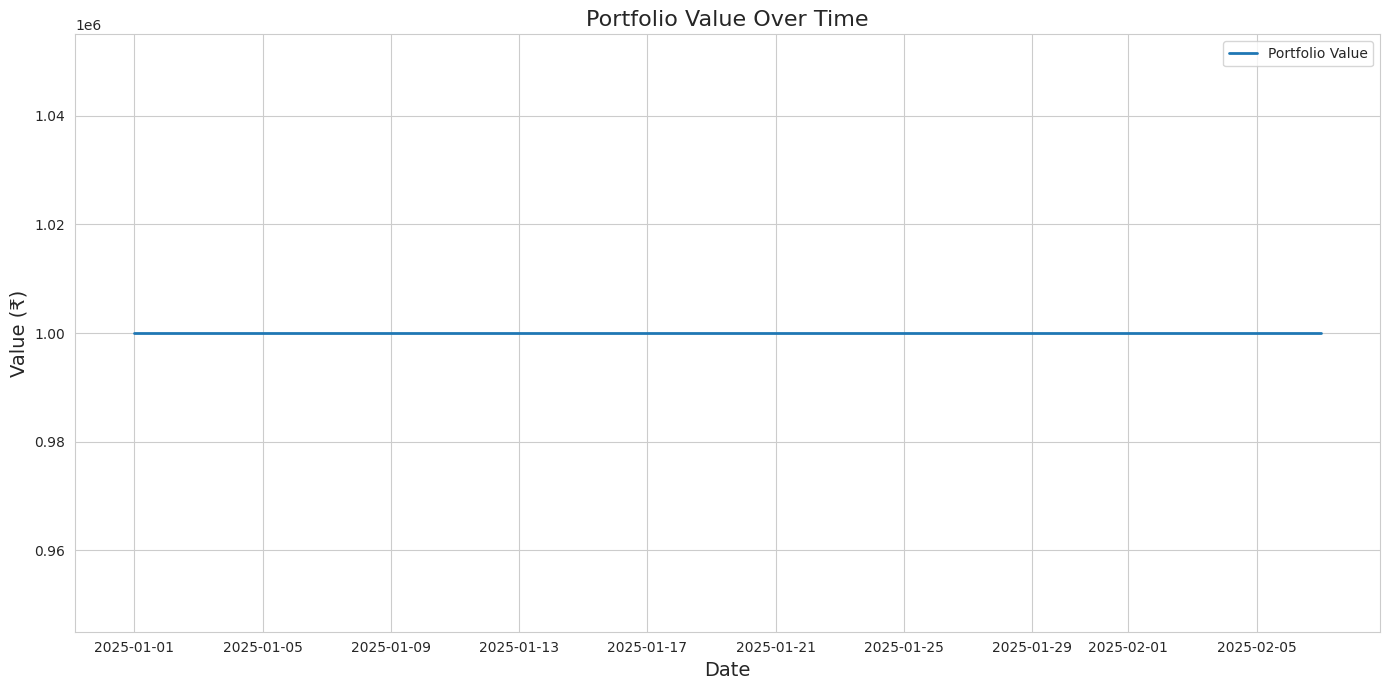

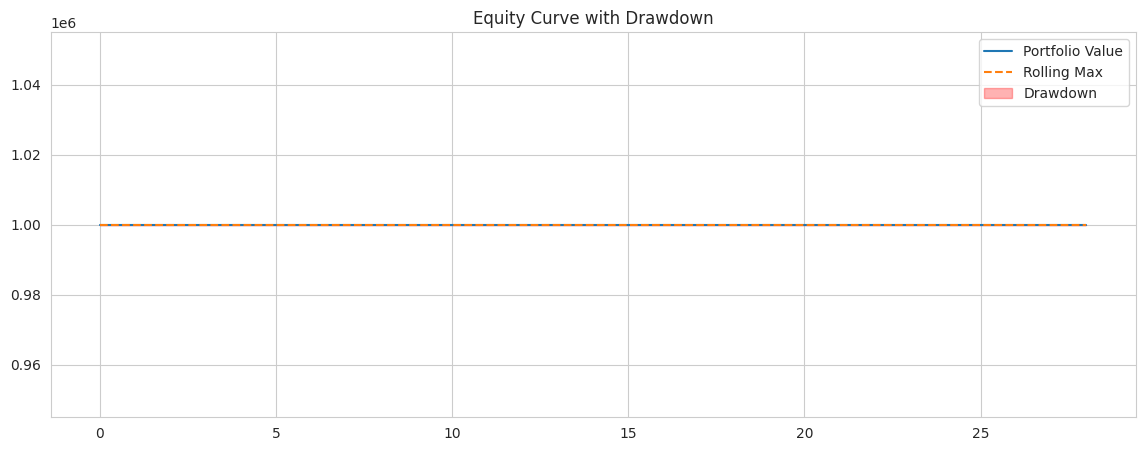

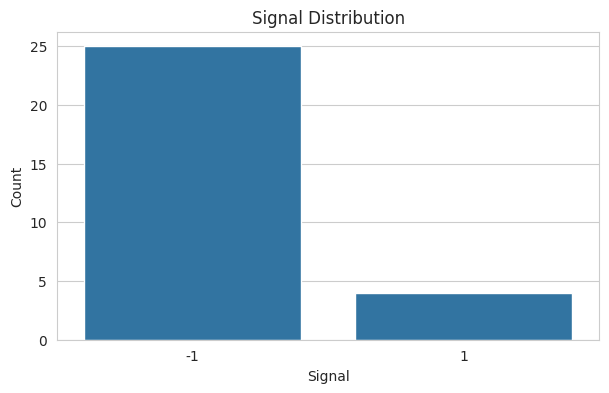

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade

# ======================================================================
# DATA LOADING (USING CSV INSTEAD OF PICKLE)
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    if not os.path.exists(signals_path):
        print("Signal file not found. Please check the path.")
        return None
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    # Handle timezone: if already tz-aware, convert; else localize
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_Expiry_06Feb2025.csv'
    if not os.path.exists(sample_path):
        print("Options sample file not found. Please check the path.")
        return None
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    # Handle timezone: if already tz-aware, convert; else localize
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    return options_sample

# ======================================================================
# STRATEGY IMPLEMENTATION (WITH DEBUGGING)
# ======================================================================
def execute_trades(spot_data, signals):
    if signals is None:
        print("No signals loaded. Cannot execute trades.")
        return {
            'cash': initial_capital,
            'positions': [],
            'history': [],
            'current_signal': 0,
            'trade_log': []
        }

    portfolio = {
        'cash': initial_capital,
        'positions': [],
        'history': [],
        'current_signal': 0,
        'trade_log': []
    }

    print("\nSignal Summary:")
    print(signals['Signal'].value_counts())

    for date in signals.index:
        spot_at_915 = spot_data.loc[
            (spot_data.index.date == date.date()) &
            (spot_data.index.hour == 9) &
            (spot_data.index.minute == 15)
        ]
        if spot_at_915.empty:
            print(f"No spot data at 9:15 AM on {date.date()}")
            continue

        spot_row = spot_at_915.iloc[0]
        current_signal = signals.loc[date, 'Signal']

        print(f"\n{date.date()} Signal: {current_signal}, Spot at 9:15 AM: {spot_row['close']}")

        portfolio['history'].append({
            'timestamp': date,
            'value': portfolio['cash'],
            'signal': current_signal,
            'spot_price': spot_row['close']
        })

    return portfolio

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
if signals is not None:
    print(f"Signals shape: {signals.shape}")
    print("\nSignal details:")
    print(signals.head(10))
    print("Signal dates:", signals.index.date.min(), "to", signals.index.date.max())
else:
    print("No signals loaded. Exiting.")
    exit()

print("\nLoading options sample...")
options_sample = load_options_sample()
if options_sample is not None:
    print("\nOptions sample with expiry 06-Feb-2025:")
    print(options_sample)
else:
    print("No options sample loaded.")

print("\nExecuting trades (only logging signals and spot prices at 9:15 AM)...")
portfolio = execute_trades(spot_data, signals)

if portfolio['history']:
    print("\nTrade log (signals and spot prices at 9:15 AM):")
    for trade in portfolio['history']:
        print(f"{trade['timestamp'].date()}: Signal {trade['signal']}, Spot Price {trade['spot_price']}")

    # Export trade log to CSV
    trade_log = pd.DataFrame(portfolio['history'])
    trade_log['timestamp'] = pd.to_datetime(trade_log['timestamp'])
    trade_log.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_trade_log.csv', index=False)
    print("\nTrade log saved to Jan_Feb_trade_log.csv")

    # --- STRATEGY PERFORMANCE REPORT ---
    # --- Load Trade Log (in case it's not already in memory) ---
    trade_log_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_trade_log.csv'
    trade_log = pd.read_csv(trade_log_path, parse_dates=['timestamp'])

    # --- Portfolio Value Series ---
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log['timestamp'].iloc[0]]
    for i in range(1, len(trade_log)):
        portfolio_values.append(initial_capital)  # Placeholder, update with actual logic
        portfolio_dates.append(trade_log['timestamp'].iloc[i])

    # --- Performance Metrics ---
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    # --- Signal Stats ---
    signal_counts = trade_log['signal'].value_counts()
    total_trades = len(trade_log)
    long_trades = signal_counts.get(1, 0)
    short_trades = signal_counts.get(-1, 0)
    flat_trades = signal_counts.get(0, 0)

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}

Trade Statistics:
-----------------
Total Trades:       {total_trades}
Long Signals:       {long_trades}
Short Signals:      {short_trades}
Flat/No Signals:    {flat_trades}
Trade Period:       {trade_log['timestamp'].min().date()} to {trade_log['timestamp'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Signal Distribution ---
    plt.figure(figsize=(7, 4))
    sns.countplot(x='signal', data=trade_log)
    plt.title("Signal Distribution")
    plt.xlabel("Signal")
    plt.ylabel("Count")
    plt.show()
else:
    print("\nNO TRADES LOGGED - Check data or logic.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    if not os.path.exists(signals_path):
        print("Signal file not found. Please check the path.")
        return None
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_Expiry_06Feb2025.csv'
    if not os.path.exists(sample_path):
        print("Options sample file not found. Please check the path.")
        return None
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY IMPLEMENTATION (DETAILED TRADE LOG)
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_option_price(options_data, ts, strike, opt_type):
    # Find nearest available time >= ts for given strike/type
    rows = options_data[
        (options_data['Strike'] == strike) &
        (options_data['Type'] == opt_type) &
        (options_data['TimeStamp'] >= ts)
    ].sort_values('TimeStamp')
    if not rows.empty and 'Close' in rows.columns:
        return float(rows.iloc[0]['Close'])
    else:
        return np.nan

def execute_trades(spot_data, signals, options_data):
    portfolio_cash = initial_capital
    open_position = None
    trade_log = []

    available_strikes = np.sort(options_data['Strike'].unique())

    for date in signals.index:
        signal = signals.loc[date, 'Signal']
        # Get spot at 9:15am
        spot_at_915 = spot_data.loc[
            (spot_data.index.date == date.date()) &
            (spot_data.index.hour == 9) &
            (spot_data.index.minute == 15)
        ]
        if spot_at_915.empty:
            continue
        spot_price = spot_at_915.iloc[0]['close']
        atm_strike = int(round(spot_price / 50) * 50)
        # Use nearest strike if ATM not available
        strike = get_nearest_strike(available_strikes, atm_strike)
        expiry = pd.to_datetime('2025-02-06')  # All options in sample expire on this date

        # Entry logic
        if open_position is None and signal != 0:
            entry_date = date
            action = 'Buy'
            option_type = 'CE' if signal == 1 else 'PE'
            entry_price = get_option_price(options_data, entry_date, strike, option_type)
            if np.isnan(entry_price):  # No option data for this strike/time
                continue
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots == 0:
                continue
            open_position = {
                'entry_date': entry_date,
                'action': action,
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal
            }
        # Exit logic: on opposite signal or expiry
        elif open_position is not None:
            exit_cond = (signal != open_position['signal'] and signal != 0) or (date.date() >= open_position['expiry'].date())
            if exit_cond:
                exit_date = date
                option_type = open_position['type']
                strike = open_position['strike']
                exit_price = get_option_price(options_data, exit_date, strike, option_type)
                if np.isnan(exit_price):  # If no price, use last known or skip
                    exit_price = open_position['entry_price']
                holding_days = (exit_date - open_position['entry_date']).days
                pnl = (exit_price - open_position['entry_price']) * lot_size * open_position['lots'] * (1 if open_position['action']=='Buy' else -1)
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'exit_date': exit_date,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price,
                    'lots': open_position['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'].date(),
                    'exit_reason': 'Signal Change' if signal != 0 else 'Expiry'
                })
                open_position = None
    # If still open at the end, close at last available price
    if open_position is not None:
        last_date = signals.index[-1]
        exit_price = get_option_price(options_data, last_date, open_position['strike'], open_position['type'])
        if np.isnan(exit_price):
            exit_price = open_position['entry_price']
        holding_days = (last_date - open_position['entry_date']).days
        pnl = (exit_price - open_position['entry_price']) * lot_size * open_position['lots'] * (1 if open_position['action']=='Buy' else -1)
        portfolio_cash += pnl
        trade_log.append({
            'entry_date': open_position['entry_date'],
            'exit_date': last_date,
            'action': open_position['action'],
            'type': open_position['type'],
            'strike': open_position['strike'],
            'entry_price': open_position['entry_price'],
            'exit_price': exit_price,
            'lots': open_position['lots'],
            'pnl': pnl,
            'holding_days': holding_days,
            'spot': open_position['spot'],
            'expiry': open_position['expiry'].date(),
            'exit_reason': 'End of Backtest'
        })
    return trade_log

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
if signals is not None:
    print(f"Signals shape: {signals.shape}")
    print("\nSignal details:")
    print(signals.head(10))
    print("Signal dates:", signals.index.date.min(), "to", signals.index.date.max())
else:
    print("No signals loaded. Exiting.")
    exit()

print("\nLoading options sample...")
options_sample = load_options_sample()
if options_sample is not None:
    print("\nOptions sample with expiry 06-Feb-2025 loaded.")
else:
    print("No options sample loaded.")
    exit()

print("\nExecuting trades with detailed logging...")
trade_log = execute_trades(spot_data, signals, options_sample)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()
else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Signal details:
                           Signal
TimeStamp                        
2025-01-01 00:00:00+05:30      -1
2025-01-02 00:00:00+05:30      -1
2025-01-03 00:00:00+05:30      -1
2025-01-04 00:00:00+05:30      -1
2025-01-05 00:00:00+05:30      -1
2025-01-06 00:00:00+05:30      -1
2025-01-07 00:00:00+05:30      -1
2025-01-08 00:00:00+05:30      -1
2025-01-09 00:00:00+05:30      -1
2025-01-10 00:00:00+05:30      -1
Signal dates: 2025-01-01 to 2025-02-07

Loading options sample...

Options sample with expiry 06-Feb-2025 loaded.

Executing trades with detailed logging...
No trades executed.
No trades to report.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample with expiry 06-Feb-2025 loaded.

Executing trades every 15 minutes with detailed logging...

Detailed trade log saved to Jan_Feb_detailed_trade_log_15min.csv
                 entry_date                entry_time  \
0 2025-02-06 09:15:00+05:30 2025-02-06 09:15:00+05:30   
1 2025-02-06 09:45:00+05:30 2025-02-06 09:45:00+05:30   
2 2025-02-06 10:15:00+05:30 2025-02-06 10:15:00+05:30   
3 2025-02-06 10:45:00+05:30 2025-02-06 10:45:00+05:30   
4 2025-02-06 11:15:00+05:30 2025-02-06 11:15:00+05:30   
5 2025-02-06 11:45:00+05:30 2025-02-06 11:45:00+05:30   
6 2025-02-06 12:15:00+05:30 2025-02-06 12:15:00+05:30   
7 2025-02-06 12:45:00+05:30 2025-02-06 12:45:00+05:30   
8 2025-02-06 13:15:00+05:30 2025-02-06 13:15:00+05:30   
9 2025-0

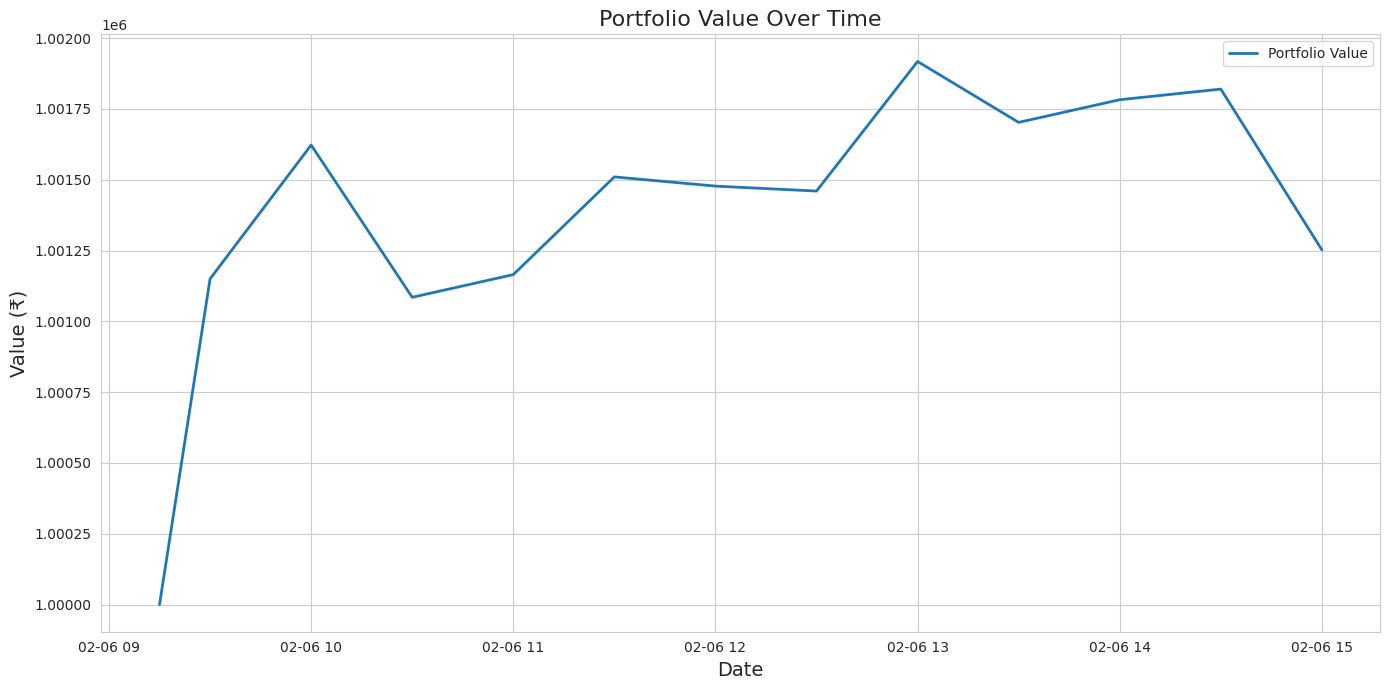

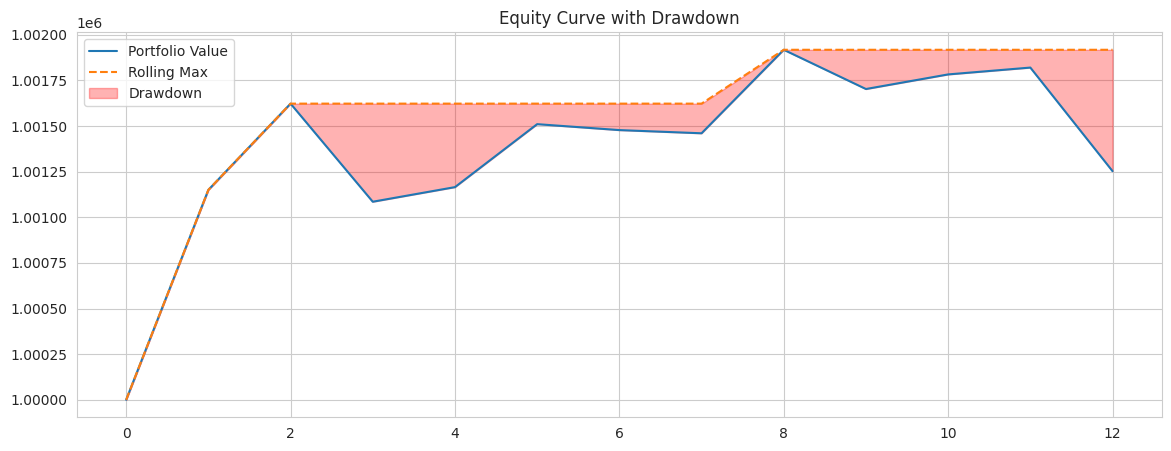

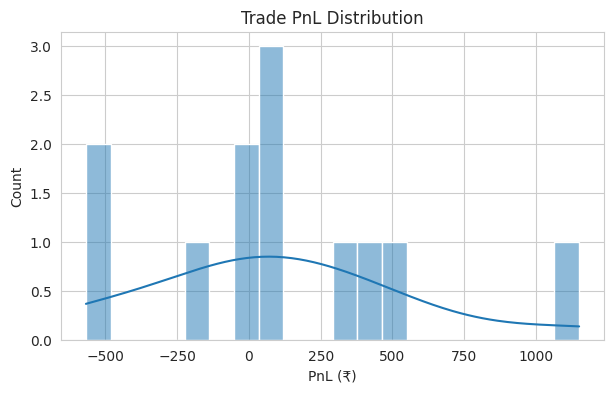

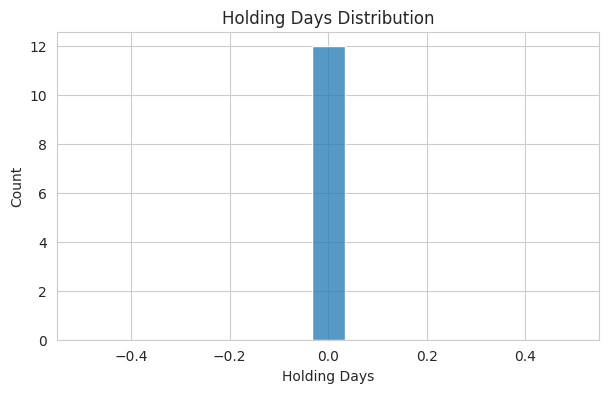

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_Expiry_06Feb2025.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_option_price(options_data, ts, strike, opt_type):
    # Find nearest available time >= ts for given strike/type
    rows = options_data[
        (options_data['Strike'] == strike) &
        (options_data['Type'] == opt_type) &
        (options_data['TimeStamp'] >= ts)
    ].sort_values('TimeStamp')
    if not rows.empty:
        return float(rows.iloc[0]['Close']), rows.iloc[0]['TimeStamp']
    else:
        return np.nan, None

def execute_trades_15min(spot_data, signals, options_data):
    portfolio_cash = initial_capital
    open_position = None
    trade_log = []
    holding = False

    available_strikes = np.sort(options_data['Strike'].unique())
    expiry = options_data['Expiry'].iloc[0].date()  # All options in sample have same expiry

    # Resample spot data to 15min intervals (use the close of each interval)
    spot_15min = spot_data.resample('15min').last()

    # Merge signals to 15min spot data (forward fill signal)
    signals_15min = signals.reindex(spot_15min.index, method='ffill')
    signals_15min = signals_15min.dropna()

    prev_signal = 0
    for ts, row in spot_15min.iterrows():
        if ts not in signals_15min.index:
            continue
        if pd.isna(row['close']):  # Skip if spot price is NaN
            continue
        signal = signals_15min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'

        # Entry logic: Enter new position if signal changes or not holding
        if signal != 0 and (not holding or signal != prev_signal):
            lots = 1  # For demonstration, always 1 lot. Use risk management for dynamic sizing.
            entry_price, entry_time = get_option_price(options_data, ts, strike, option_type)
            if np.isnan(entry_price):
                continue  # No price available, skip
            open_position = {
                'entry_date': ts,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price,
                'entry_time': entry_time,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal
            }
            holding = True
            prev_signal = signal

        # Exit logic: If holding and signal flips or expiry reached
        elif holding and (signal != prev_signal or ts.date() >= expiry):
            exit_price, exit_time = get_option_price(options_data, ts, open_position['strike'], open_position['type'])
            if np.isnan(exit_price):
                continue  # No price available, skip exit (position remains open)
            holding_days = (ts - open_position['entry_date']).days
            pnl = (exit_price - open_position['entry_price']) * lot_size * open_position['lots']
            trade_log.append({
                'entry_date': open_position['entry_date'],
                'entry_time': open_position['entry_time'],
                'exit_date': ts,
                'exit_time': exit_time,
                'action': open_position['action'],
                'type': open_position['type'],
                'strike': open_position['strike'],
                'entry_price': open_position['entry_price'],
                'exit_price': exit_price,
                'lots': open_position['lots'],
                'pnl': pnl,
                'holding_days': holding_days,
                'spot': open_position['spot'],
                'expiry': open_position['expiry'],
                'exit_reason': 'Signal Change' if signal != prev_signal else 'Expiry'
            })
            holding = False
            open_position = None
            prev_signal = signal

    return trade_log

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample with expiry 06-Feb-2025 loaded.")

print("\nExecuting trades every 15 minutes with detailed logging...")
trade_log = execute_trades_15min(spot_data, signals, options_sample)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_15min.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_15min.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# You can now build your performance report and visualizations as before using trade_log_df.

# ======================================================================
# STRATEGY PERFORMANCE REPORT
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()
else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample loaded.

Executing trades every 15 minutes with dynamic lot sizing...

Detailed trade log saved to Jan_Feb_detailed_trade_log_15min.csv
                 entry_date                entry_time  \
0 2025-02-06 09:15:00+05:30 2025-02-06 09:15:00+05:30   
1 2025-02-06 09:45:00+05:30 2025-02-06 09:45:00+05:30   
2 2025-02-06 10:15:00+05:30 2025-02-06 10:15:00+05:30   
3 2025-02-06 10:45:00+05:30 2025-02-06 10:45:00+05:30   
4 2025-02-06 11:15:00+05:30 2025-02-06 11:15:00+05:30   
5 2025-02-06 11:45:00+05:30 2025-02-06 11:45:00+05:30   
6 2025-02-06 12:15:00+05:30 2025-02-06 12:15:00+05:30   
7 2025-02-06 12:45:00+05:30 2025-02-06 12:45:00+05:30   
8 2025-02-06 13:15:00+05:30 2025-02-06 13:15:00+05:30   
9 2025-02-06 13:45:00+05:30 20

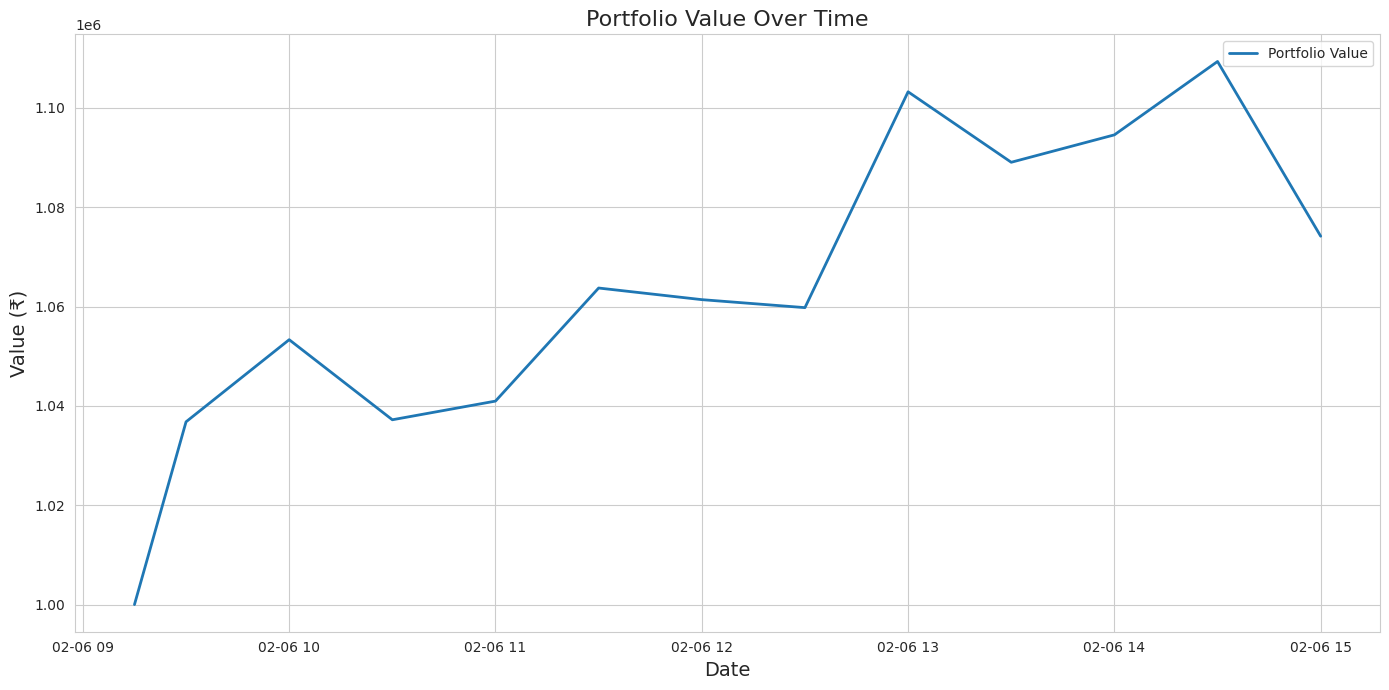

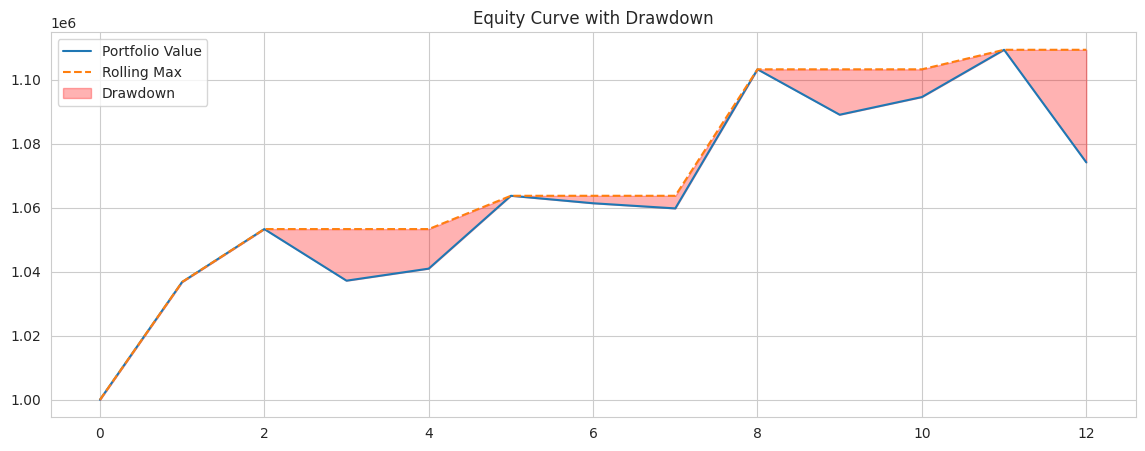

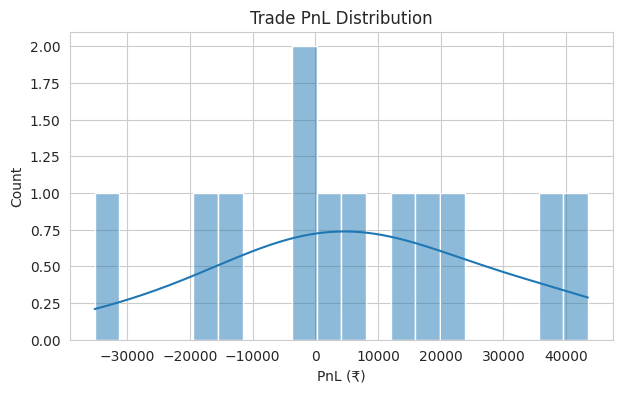

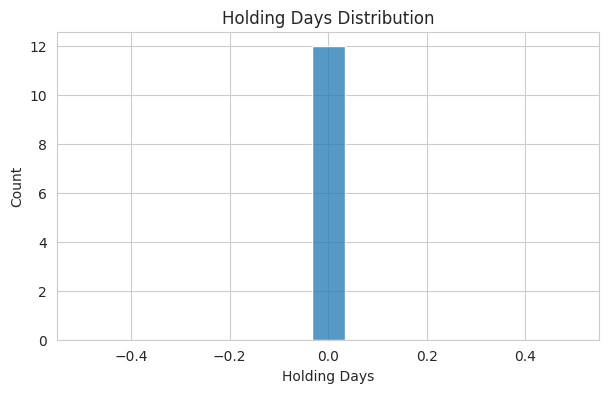

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_Expiry_06Feb2025.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_option_price(options_data, ts, strike, opt_type):
    # Find nearest available time >= ts for given strike/type
    rows = options_data[
        (options_data['Strike'] == strike) &
        (options_data['Type'] == opt_type) &
        (options_data['TimeStamp'] >= ts)
    ].sort_values('TimeStamp')
    if not rows.empty:
        return float(rows.iloc[0]['Close']), rows.iloc[0]['TimeStamp']
    else:
        return np.nan, None

def execute_trades_15min(spot_data, signals, options_data):
    portfolio_cash = initial_capital
    open_position = None
    trade_log = []
    holding = False

    available_strikes = np.sort(options_data['Strike'].unique())
    expiry = options_data['Expiry'].iloc[0].date()  # All options in sample have same expiry

    # Resample spot data to 15min intervals (use the close of each interval)
    spot_15min = spot_data.resample('15min').last()

    # Merge signals to 15min spot data (forward fill signal)
    signals_15min = signals.reindex(spot_15min.index, method='ffill')
    signals_15min = signals_15min.dropna()

    prev_signal = 0
    for ts, row in spot_15min.iterrows():
        if ts not in signals_15min.index:
            continue
        if pd.isna(row['close']):  # Skip if spot price is NaN
            continue
        signal = signals_15min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'

        # Entry logic: Enter new position if signal changes or not holding
        if signal != 0 and (not holding or signal != prev_signal):
            entry_price, entry_time = get_option_price(options_data, ts, strike, option_type)
            if np.isnan(entry_price):
                continue  # No price available, skip
            # Dynamic lot sizing
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                continue  # Not enough cash for even 1 lot
            open_position = {
                'entry_date': ts,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price,
                'entry_time': entry_time,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal
            }
            holding = True
            prev_signal = signal

        # Exit logic: If holding and signal flips or expiry reached
        elif holding and (signal != prev_signal or ts.date() >= expiry):
            exit_price, exit_time = get_option_price(options_data, ts, open_position['strike'], open_position['type'])
            if np.isnan(exit_price):
                continue  # No price available, skip exit (position remains open)
            holding_days = (ts - open_position['entry_date']).days
            pnl = (exit_price - open_position['entry_price']) * lot_size * open_position['lots']
            portfolio_cash += pnl  # Update cash for next position sizing
            trade_log.append({
                'entry_date': open_position['entry_date'],
                'entry_time': open_position['entry_time'],
                'exit_date': ts,
                'exit_time': exit_time,
                'action': open_position['action'],
                'type': open_position['type'],
                'strike': open_position['strike'],
                'entry_price': open_position['entry_price'],
                'exit_price': exit_price,
                'lots': open_position['lots'],
                'pnl': pnl,
                'holding_days': holding_days,
                'spot': open_position['spot'],
                'expiry': open_position['expiry'],
                'exit_reason': 'Signal Change' if signal != prev_signal else 'Expiry'
            })
            holding = False
            open_position = None
            prev_signal = signal

    return trade_log

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nExecuting trades every 15 minutes with dynamic lot sizing...")
trade_log = execute_trades_15min(spot_data, signals, options_sample)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_15min.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_15min.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# You can now build your performance report and visualizations as before using trade_log_df.
# ======================================================================
# STRATEGY PERFORMANCE REPORT
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()
else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample loaded.

Executing trades every 15 minutes with dynamic lot sizing and robust price lookup...

Detailed trade log saved to Jan_Feb_detailed_trade_log_15min.csv
                 entry_date                entry_time  \
0 2025-02-06 09:15:00+05:30 2025-02-06 09:15:00+05:30   
1 2025-02-06 09:45:00+05:30 2025-02-06 09:45:00+05:30   
2 2025-02-06 10:15:00+05:30 2025-02-06 10:15:00+05:30   
3 2025-02-06 10:45:00+05:30 2025-02-06 10:45:00+05:30   
4 2025-02-06 11:15:00+05:30 2025-02-06 11:15:00+05:30   
5 2025-02-06 11:45:00+05:30 2025-02-06 11:45:00+05:30   
6 2025-02-06 12:15:00+05:30 2025-02-06 12:15:00+05:30   
7 2025-02-06 12:45:00+05:30 2025-02-06 12:45:00+05:30   
8 2025-02-06 13:15:00+05:30 2025-02-06 13:15:00+05:30   
9 2025

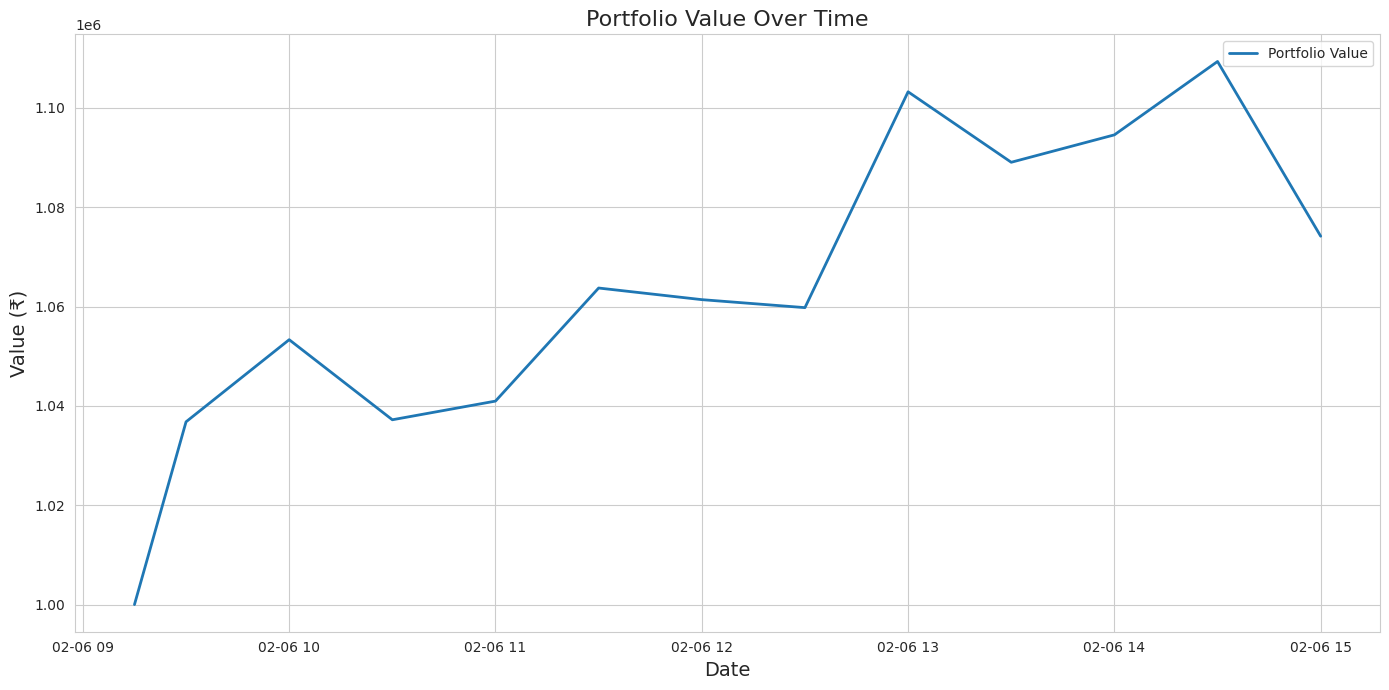

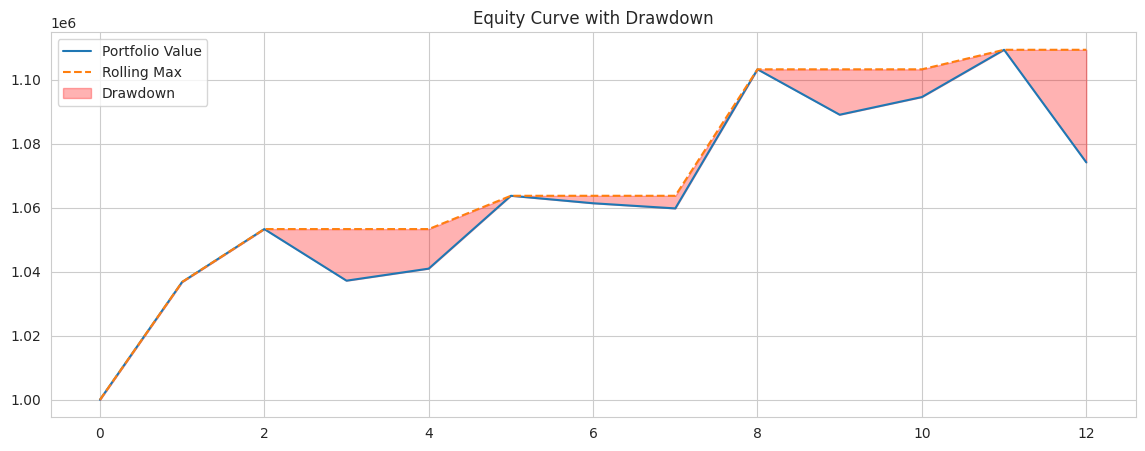

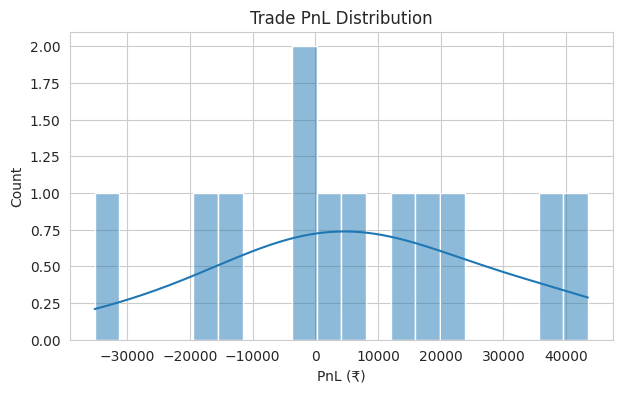

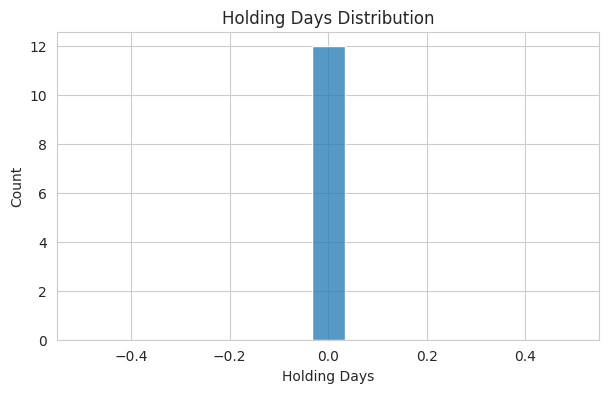

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_Expiry_06Feb2025.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_option_price(options_data, ts, strike, opt_type, max_lookback_mins=5):
    # Try to find option price at or after ts
    rows = options_data[
        (options_data['Strike'] == strike) &
        (options_data['Type'] == opt_type) &
        (options_data['TimeStamp'] >= ts)
    ].sort_values('TimeStamp')
    if not rows.empty:
        return float(rows.iloc[0]['Close']), rows.iloc[0]['TimeStamp']
    else:
        # If no price found at or after ts, look backward up to max_lookback_mins
        lookback_start = ts - pd.Timedelta(minutes=max_lookback_mins)
        rows_back = options_data[
            (options_data['Strike'] == strike) &
            (options_data['Type'] == opt_type) &
            (options_data['TimeStamp'] >= lookback_start) &
            (options_data['TimeStamp'] < ts)
        ].sort_values('TimeStamp', ascending=False)
        if not rows_back.empty:
            return float(rows_back.iloc[0]['Close']), rows_back.iloc[0]['TimeStamp']
    return np.nan, None

def execute_trades_15min(spot_data, signals, options_data):
    portfolio_cash = initial_capital
    open_position = None
    trade_log = []
    holding = False

    available_strikes = np.sort(options_data['Strike'].unique())
    expiry = options_data['Expiry'].iloc[0].date()  # All options in sample have same expiry

    # Resample spot data to 15min intervals (use the close of each interval)
    spot_15min = spot_data.resample('15min').last()

    # Forward-fill signals to 15min spot data
    signals_15min = signals.reindex(spot_15min.index, method='ffill')
    signals_15min = signals_15min.dropna()

    prev_signal = 0
    for ts, row in spot_15min.iterrows():
        if ts not in signals_15min.index:
            continue
        if pd.isna(row['close']):  # Skip if spot price is NaN
            continue
        signal = signals_15min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'

        # Entry logic: Enter new position if signal changes or not holding
        if signal != 0 and (not holding or signal != prev_signal):
            entry_price, entry_time = get_option_price(options_data, ts, strike, option_type)
            if np.isnan(entry_price):
                continue  # No price available, skip
            # Dynamic lot sizing
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                continue  # Not enough cash for even 1 lot
            open_position = {
                'entry_date': ts,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price,
                'entry_time': entry_time,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal
            }
            holding = True
            prev_signal = signal

        # Exit logic: If holding and signal flips or expiry reached
        elif holding and (signal != prev_signal or ts.date() >= expiry):
            exit_price, exit_time = get_option_price(options_data, ts, open_position['strike'], open_position['type'])
            if np.isnan(exit_price):
                continue  # No price available, skip exit (position remains open)
            holding_days = (ts - open_position['entry_date']).days
            pnl = (exit_price - open_position['entry_price']) * lot_size * open_position['lots']
            portfolio_cash += pnl  # Update cash for next position sizing
            trade_log.append({
                'entry_date': open_position['entry_date'],
                'entry_time': open_position['entry_time'],
                'exit_date': ts,
                'exit_time': exit_time,
                'action': open_position['action'],
                'type': open_position['type'],
                'strike': open_position['strike'],
                'entry_price': open_position['entry_price'],
                'exit_price': exit_price,
                'lots': open_position['lots'],
                'pnl': pnl,
                'holding_days': holding_days,
                'spot': open_position['spot'],
                'expiry': open_position['expiry'],
                'exit_reason': 'Signal Change' if signal != prev_signal else 'Expiry'
            })
            holding = False
            open_position = None
            prev_signal = signal

    return trade_log

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nExecuting trades every 15 minutes with dynamic lot sizing and robust price lookup...")
trade_log = execute_trades_15min(spot_data, signals, options_sample)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_15min.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_15min.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()
else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample loaded.

Executing trades minute by minute with dynamic lot sizing and robust price lookup...

Detailed trade log saved to Jan_Feb_detailed_trade_log_minute.csv
                 entry_date                entry_time  \
0 2025-02-06 09:15:00+05:30 2025-02-06 09:15:00+05:30   
1 2025-02-06 09:17:00+05:30 2025-02-06 09:17:00+05:30   
2 2025-02-06 09:19:00+05:30 2025-02-06 09:19:00+05:30   
3 2025-02-06 09:21:00+05:30 2025-02-06 09:21:00+05:30   
4 2025-02-06 09:23:00+05:30 2025-02-06 09:23:00+05:30   
5 2025-02-06 09:25:00+05:30 2025-02-06 09:25:00+05:30   
6 2025-02-06 09:27:00+05:30 2025-02-06 09:27:00+05:30   
7 2025-02-06 09:29:00+05:30 2025-02-06 09:29:00+05:30   
8 2025-02-06 09:31:00+05:30 2025-02-06 09:31:00+05:30   
9 202

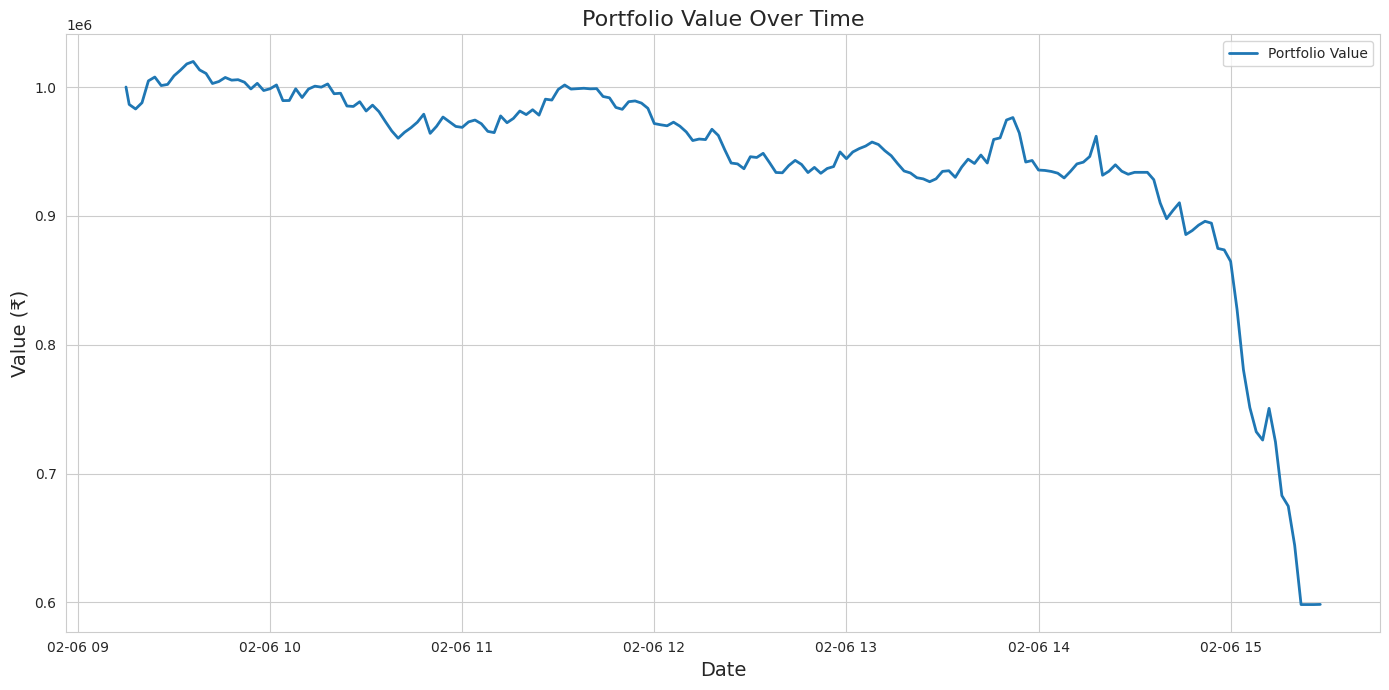

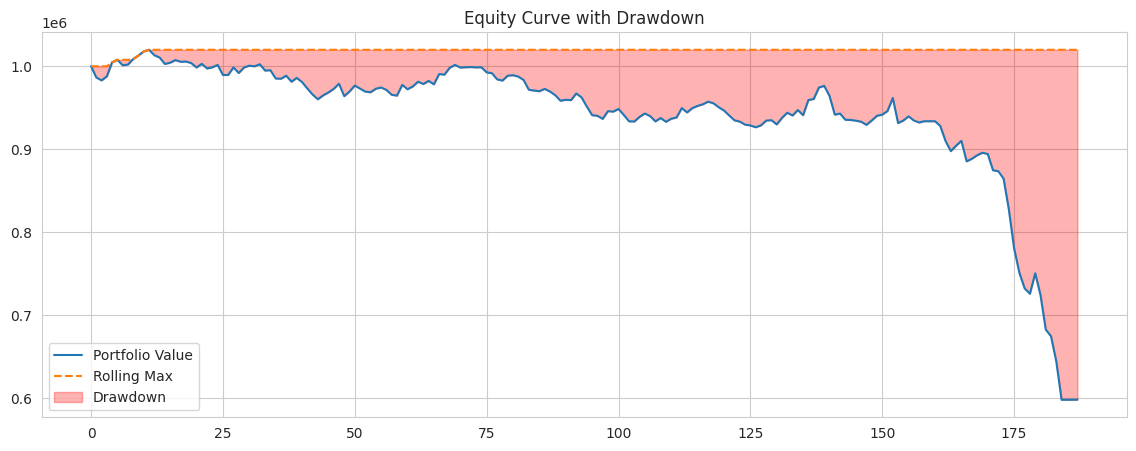

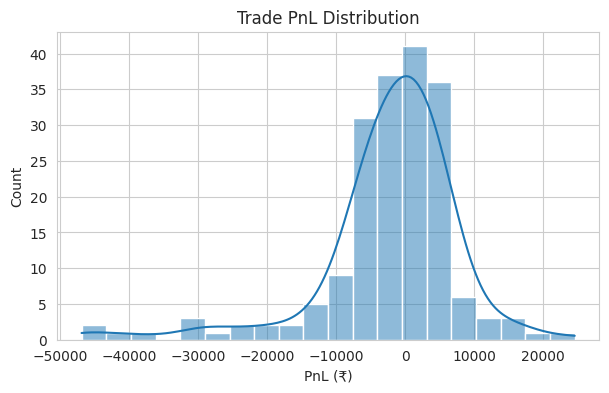

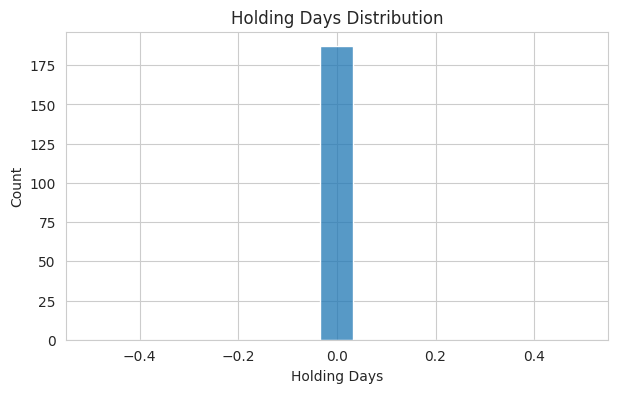

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_Expiry_06Feb2025.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_option_price(options_data, ts, strike, opt_type, max_lookback_mins=5):
    # Try to find option price at or after ts
    rows = options_data[
        (options_data['Strike'] == strike) &
        (options_data['Type'] == opt_type) &
        (options_data['TimeStamp'] >= ts)
    ].sort_values('TimeStamp')
    if not rows.empty:
        return float(rows.iloc[0]['Close']), rows.iloc[0]['TimeStamp']
    else:
        # If no price found at or after ts, look backward up to max_lookback_mins
        lookback_start = ts - pd.Timedelta(minutes=max_lookback_mins)
        rows_back = options_data[
            (options_data['Strike'] == strike) &
            (options_data['Type'] == opt_type) &
            (options_data['TimeStamp'] >= lookback_start) &
            (options_data['TimeStamp'] < ts)
        ].sort_values('TimeStamp', ascending=False)
        if not rows_back.empty:
            return float(rows_back.iloc[0]['Close']), rows_back.iloc[0]['TimeStamp']
    return np.nan, None

def execute_trades_minute(spot_data, signals, options_data):
    portfolio_cash = initial_capital
    open_position = None
    trade_log = []
    holding = False

    available_strikes = np.sort(options_data['Strike'].unique())
    expiry = options_data['Expiry'].iloc[0].date()  # All options in sample have same expiry

    # No resampling! Use minute-level spot data directly
    # Forward-fill signals to every minute
    signals_min = signals.reindex(spot_data.index, method='ffill')
    signals_min = signals_min.dropna()

    prev_signal = 0
    for ts, row in spot_data.iterrows():
        if ts not in signals_min.index:
            continue
        if pd.isna(row['close']):  # Skip if spot price is NaN
            continue
        signal = signals_min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'

        # Entry logic: Enter new position if signal changes or not holding
        if signal != 0 and (not holding or signal != prev_signal):
            entry_price, entry_time = get_option_price(options_data, ts, strike, option_type)
            if np.isnan(entry_price):
                continue  # No price available, skip
            # Dynamic lot sizing
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                continue  # Not enough cash for even 1 lot
            open_position = {
                'entry_date': ts,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price,
                'entry_time': entry_time,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal
            }
            holding = True
            prev_signal = signal

        # Exit logic: If holding and signal flips or expiry reached
        elif holding and (signal != prev_signal or ts.date() >= expiry):
            exit_price, exit_time = get_option_price(options_data, ts, open_position['strike'], open_position['type'])
            if np.isnan(exit_price):
                continue  # No price available, skip exit (position remains open)
            holding_days = (ts - open_position['entry_date']).days
            pnl = (exit_price - open_position['entry_price']) * lot_size * open_position['lots']
            portfolio_cash += pnl  # Update cash for next position sizing
            trade_log.append({
                'entry_date': open_position['entry_date'],
                'entry_time': open_position['entry_time'],
                'exit_date': ts,
                'exit_time': exit_time,
                'action': open_position['action'],
                'type': open_position['type'],
                'strike': open_position['strike'],
                'entry_price': open_position['entry_price'],
                'exit_price': exit_price,
                'lots': open_position['lots'],
                'pnl': pnl,
                'holding_days': holding_days,
                'spot': open_position['spot'],
                'expiry': open_position['expiry'],
                'exit_reason': 'Signal Change' if signal != prev_signal else 'Expiry'
            })
            holding = False
            open_position = None
            prev_signal = signal

    return trade_log

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nExecuting trades minute by minute with dynamic lot sizing and robust price lookup...")
trade_log = execute_trades_minute(spot_data, signals, options_sample)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_minute.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_minute.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()
else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample loaded.

Executing trades minute by minute with take profit and stop loss...

Detailed trade log saved to Jan_Feb_detailed_trade_log_minute_tp_sl.csv
                 entry_date                entry_time  \
0 2025-01-01 09:15:00+05:30 2025-01-17 10:05:00+05:30   
1 2025-01-21 14:55:00+05:30 2025-01-21 14:55:00+05:30   
2 2025-01-22 14:57:00+05:30 2025-01-22 14:57:00+05:30   
3 2025-01-24 11:14:00+05:30 2025-01-24 11:14:00+05:30   
4 2025-01-24 14:16:00+05:30 2025-01-24 14:16:00+05:30   
5 2025-01-27 09:17:00+05:30 2025-01-27 09:17:00+05:30   
6 2025-01-28 12:55:00+05:30 2025-01-28 12:55:00+05:30   
7 2025-01-30 10:02:00+05:30 2025-01-30 10:02:00+05:30   
8 2025-01-30 15:23:00+05:30 2025-01-30 15:23:00+05:30   
9 2025-01-31 10:

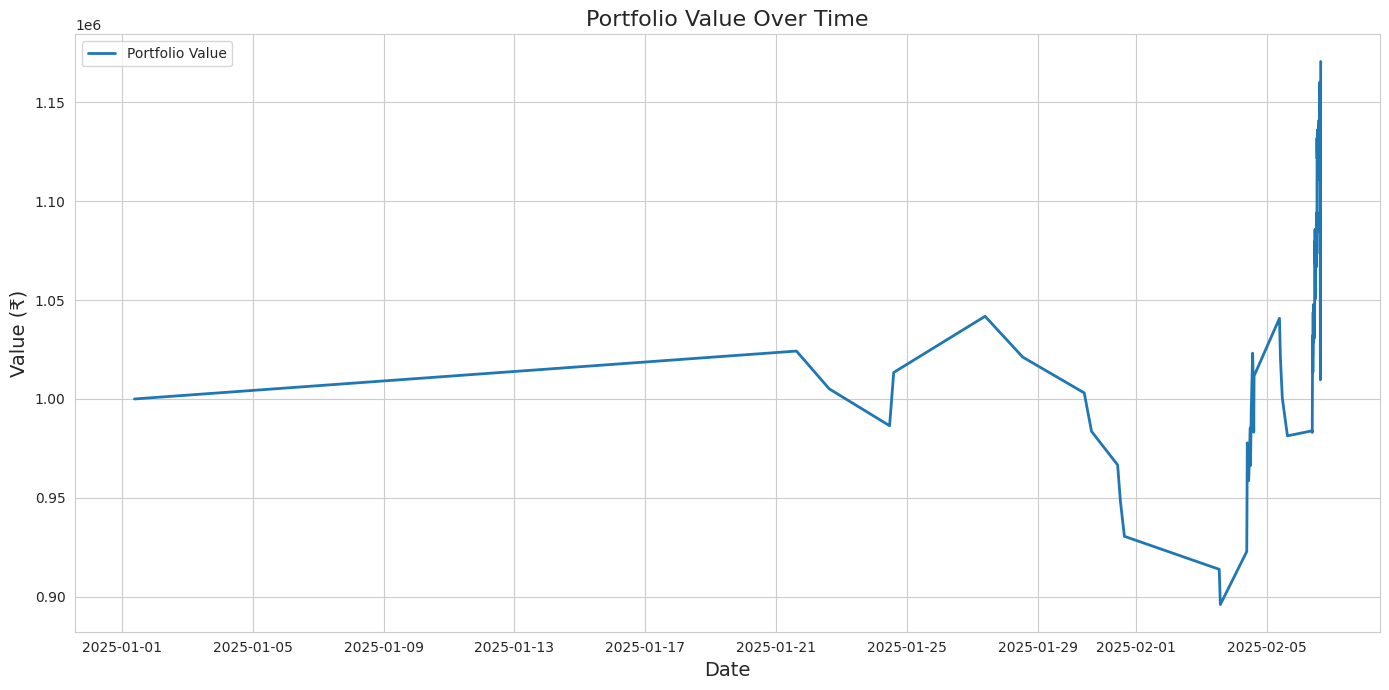

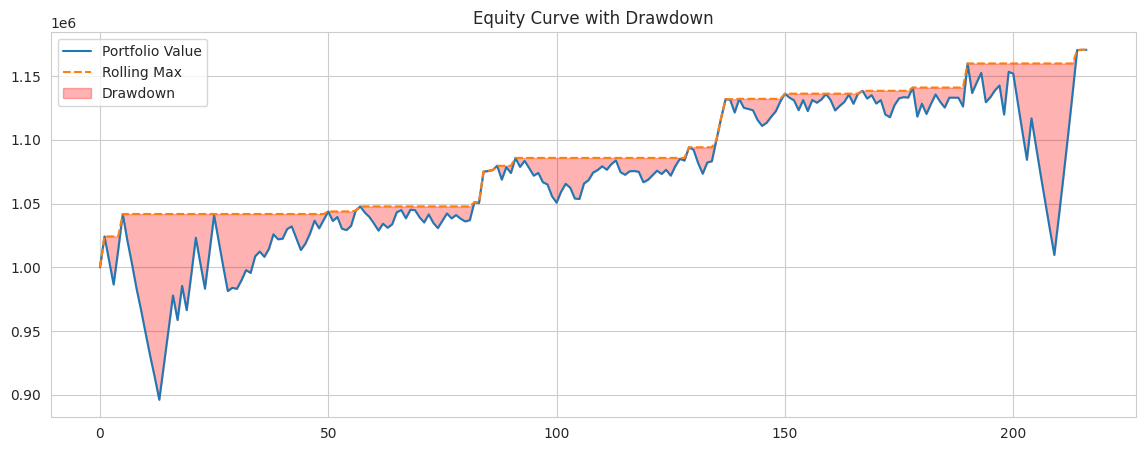

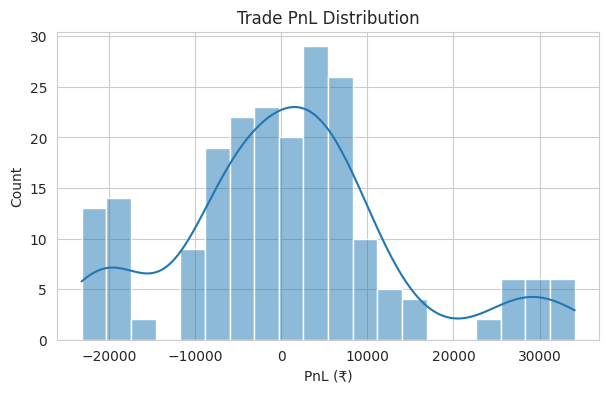

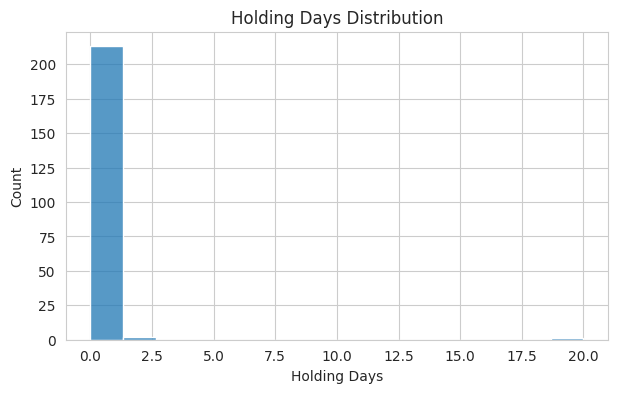


Strategy Performance Report:
-----------------------------
Initial Capital:    ₹1,000,000.00
Final Portfolio:    ₹1,170,705.25
Total Return:       17.07%
Max Drawdown:       ₹139,966.88
Sharpe Ratio:       0.98
Sortino Ratio:      1.71
Calmar Ratio:       1.43

Trade Statistics:
-----------------
Total Trades:       216
Winning Trades:     111
Losing Trades:      105
Avg PnL:            ₹790.30
Best Trade:         ₹34,090.50
Worst Trade:        ₹-23,182.00
Trade Period:       2025-01-01 to 2025-02-06



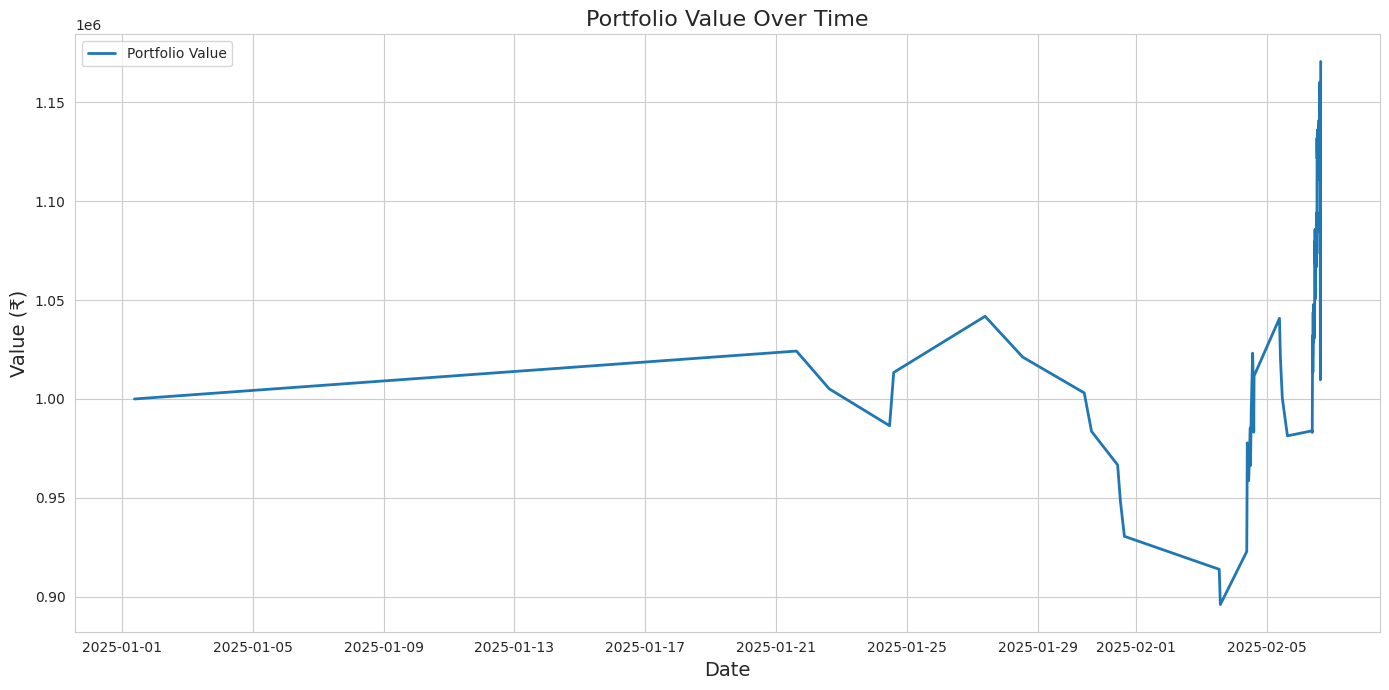

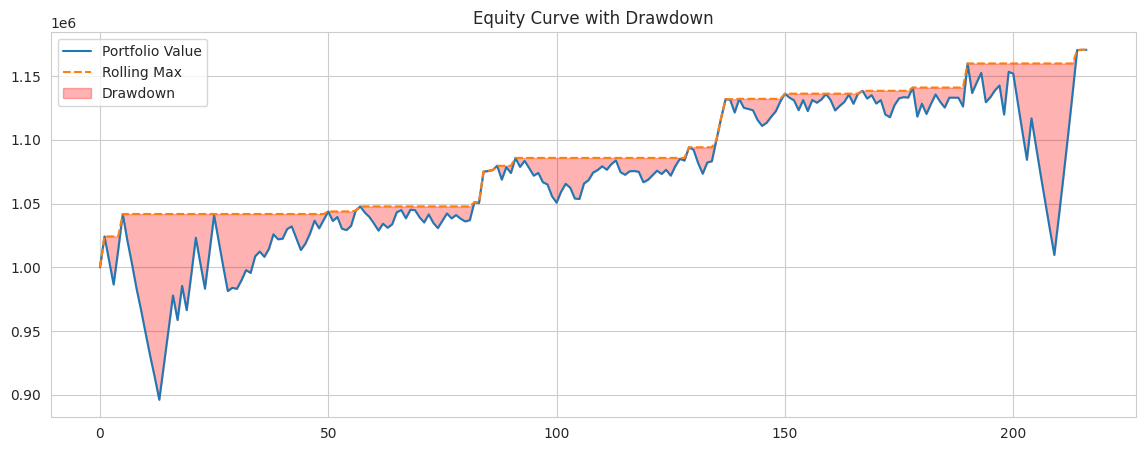

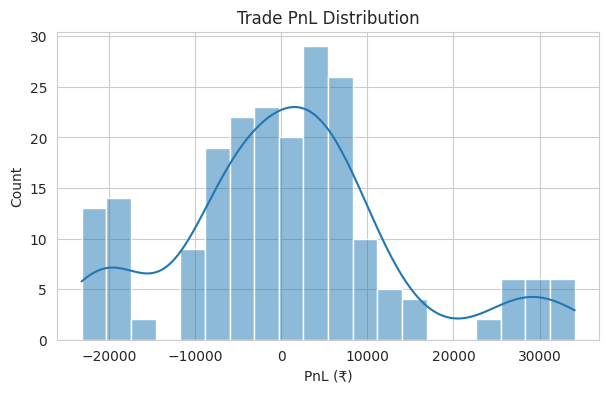

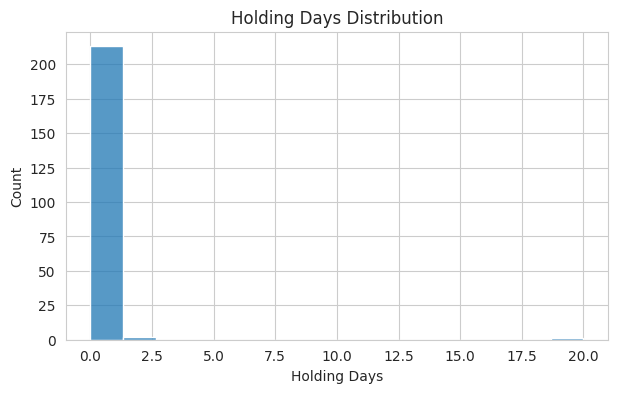

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade
TP_PCT = 0.3  # 30% take profit (relative to entry price)
SL_PCT = 0.2  # 20% stop loss (relative to entry price)

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_Expiry_06Feb2025.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def execute_trades_minute_tp_sl(spot_data, signals, options_data, tp_pct=TP_PCT, sl_pct=SL_PCT):
    portfolio_cash = initial_capital
    trade_log = []
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry = options_data['Expiry'].iloc[0].date()  # All options in sample have same expiry

    signals_min = signals.reindex(spot_data.index, method='ffill').dropna()
    open_position = None

    for ts, row in spot_data.iterrows():
        if ts not in signals_min.index or pd.isna(row['close']):
            continue
        signal = signals_min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'

        if open_position is None and signal != 0:
            # --- ENTRY ---
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                continue
            tp_price = entry_price * (1 + tp_pct)  # Take profit price
            sl_price = entry_price * (1 - sl_pct)  # Stop loss price
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'tp_price': tp_price,
                'sl_price': sl_price
            }
            continue

        # --- EXIT: If in position, check for TP/SL or expiry ---
        if open_position is not None:
            # Get all option rows for this strike/type between entry and now (inclusive)
            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')

            exit_reason = None
            exit_price = None
            exit_time = None

            # Check for TP/SL hit in historical bars since entry
            for _, opt_row in option_rows.iterrows():
                # For a long position, TP if High >= tp_price, SL if Low <= sl_price
                if opt_row['High'] >= open_position['tp_price']:
                    exit_price = open_position['tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
                elif opt_row['Low'] <= open_position['sl_price']:
                    exit_price = open_position['sl_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Stop Loss'
                    break

            # If not hit, check for expiry
            if exit_reason is None and ts.date() >= expiry:
                # Exit at last available close price
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'Expiry'

            # If exit condition met, close the trade
            if exit_reason is not None and exit_price is not None:
                holding_days = (exit_time - open_position['entry_date']).days
                pnl = (exit_price - open_position['entry_price']) * lot_size * open_position['lots']
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price,
                    'lots': open_position['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason
                })
                open_position = None  # Reset for next trade

    return trade_log

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nExecuting trades minute by minute with take profit and stop loss...")
trade_log = execute_trades_minute_tp_sl(spot_data, signals, options_sample)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_minute_tp_sl.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_minute_tp_sl.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()
else:
    print("No trades to report.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()
else:
    print("No trades to report.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import glob
import os
from datetime import datetime

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade

# ======================================================================
# DATA LOADING (FIXED PARSING)
# ======================================================================
def load_spot():
    df = pd.read_pickle('/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/NIFTY 50.pickle')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    return df.loc[start_date:end_date]

def load_options():
    options = []
    path_pattern = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/NIFTY_Data/NIFTY*.pickle'

    for file in glob.glob(path_pattern):
        if os.path.getsize(file) == 0:
            continue

        try:
            filename = os.path.basename(file)
            # Example: NIFTY09JAN2524050PE.pickle
            parts = filename.split('NIFTY')[1].split('.')[0]  # '09JAN2524050PE'
            # Find where the numeric part ends (strike price)
            # Typically, expiry is 7 chars (e.g., 09JAN25), then strike, then CE/PE
            date_str = parts[:7]  # '09JAN25'
            remainder = parts[7:]  # '24050PE' or similar

            # Option type is always last 2 chars
            option_type = remainder[-2:]
            if option_type not in ['CE', 'PE']:
                raise ValueError(f"Invalid option type in {filename}")

            # Strike is the numeric part before CE/PE
            strike = int(remainder[:-2])
            expiry = datetime.strptime(date_str, '%d%b%y').date()

            df = pd.read_pickle(file)
            df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
            df = df.loc[start_date:end_date]

            df = df.assign(
                Strike=strike,
                Type=option_type,
                Expiry=expiry
            )

            options.append(df)
        except Exception as e:
            print(f"Skipped {filename}: {str(e)}")
            continue

    return pd.concat(options) if options else pd.DataFrame()

# ======================================================================
# STRATEGY IMPLEMENTATION (WITH DEBUGGING)
# ======================================================================
def calculate_signals(spot_data):
    daily_close = spot_data['Close'].resample('D').last()
    sma21 = daily_close.rolling(21, min_periods=1).mean()
    sma22 = daily_close.rolling(22, min_periods=1).mean()
    signals = np.where(sma21 > sma22, 1, -1)
    return pd.Series(signals, index=daily_close.index)

def execute_trades(spot_data, options_data, signals):
    portfolio = {
        'cash': initial_capital,
        'positions': [],
        'history': [],
        'current_signal': 0,
        'trade_log': []
    }

    print("\nSignal Summary:")
    print(signals.value_counts())

    for timestamp, spot_row in spot_data.iterrows():
        # Only trade at 9:15 AM
        if timestamp.time().hour != 9 or timestamp.time().minute != 15:
            continue

        # Update signal at market open
        try:
            current_date = timestamp.date()
            portfolio['current_signal'] = signals.loc[current_date]
            print(f"\n{current_date} Signal: {portfolio['current_signal']}")
        except KeyError:
            portfolio['current_signal'] = 0

        # Find options for this timestamp
        current_options = options_data.loc[timestamp:timestamp]
        if current_options.empty:
            print(f"No options data at {timestamp}")
            continue

        if portfolio['current_signal'] != 0:
            spot_price = spot_row['Close']
            atm_strike = int(round(spot_price / 50) * 50)
            option_type = 'CE' if portfolio['current_signal'] == 1 else 'PE'

            contract = current_options[
                (current_options['Strike'] == atm_strike) &
                (current_options['Type'] == option_type)
            ]

            if not contract.empty:
                contract = contract.iloc[0]
                price = contract['Close']

                # Risk-managed position sizing
                max_lots = int((portfolio['cash'] * risk_per_trade) / (price * lot_size))

                if max_lots > 0:
                    cost = price * lot_size * max_lots
                    portfolio['cash'] -= cost
                    portfolio['positions'].append({
                        'entry_time': timestamp,
                        'strike': atm_strike,
                        'type': option_type,
                        'quantity': max_lots,
                        'entry_price': price
                    })
                    print(f"Trade executed: {max_lots} lots of {atm_strike}{option_type} at ₹{price}")
                else:
                    print(f"Not enough cash for even 1 lot at {timestamp} ({atm_strike}{option_type} @ ₹{price})")
            else:
                print(f"No {option_type} contracts at {atm_strike} on {timestamp}")

        # Update portfolio value
        position_value = sum(
            pos['entry_price'] * lot_size * pos['quantity']
            for pos in portfolio['positions']
        )
        portfolio['history'].append({
            'timestamp': timestamp,
            'value': portfolio['cash'] + position_value
        })

    return portfolio

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading options data...")
options_data = load_options()
print(f"Options data shape: {options_data.shape}")

# Export only options with expiry date 06th Feb 2025 to CSV, including OHLC, OI, Volume, Strike, Type, Expiry, and TimeStamp
if not options_data.empty:
    # Define the expiry date you want (adjust the format if needed)
    target_expiry = pd.to_datetime('2025-02-06').date()
    # Filter the DataFrame and select all needed columns
    options_sample = options_data[options_data['Expiry'] == target_expiry][
        ['Open', 'High', 'Low', 'Close', 'OI', 'Volume', 'Strike', 'Type', 'Expiry']
    ]
    # Reset index so TimeStamp is a column
    options_sample = options_sample.reset_index(drop=False)
    # Rename index column to TimeStamp if needed (optional; reset_index will name it 'index' or keep original)
    if 'index' in options_sample.columns:
        options_sample = options_sample.rename(columns={'index': 'TimeStamp'})
    # Ensure TimeStamp is the first column
    cols = ['TimeStamp', 'Open', 'High', 'Low', 'Close', 'OI', 'Volume', 'Strike', 'Type', 'Expiry']
    options_sample = options_sample[cols]
    # Export to CSV
    options_sample.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_Expiry_06Feb2025.csv', index=False)
    print("\nExported options records with expiry 06-Feb-2025 to /content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_Expiry_06Feb2025.csv")
    print(options_sample.head(10))
else:
    print("No options data loaded.")

print("\nGenerating signals...")
signals = calculate_signals(spot_data)
signal_details = pd.DataFrame({'TimeStamp': signals.index, 'Signal': signals.values})
signal_details.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv', index=False)
print("\nExported signal details to /content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv")
print("\nSignal details:")
print(signal_details.head(10))

print("\nExecuting trades...")
portfolio = execute_trades(spot_data, options_data, signals)

if portfolio['history']:
    final_value = portfolio['history'][-1]['value']
    print(f"\nFINAL VALUE: ₹{final_value:,.2f}")
    print(f"RETURN: {(final_value/initial_capital - 1)*100:.2f}%")
else:
    print("\nNO TRADES EXECUTED - Potential issues:")
    print("1. Signals not crossing over")
    print("2. Options data missing required strikes/expiries")
    print("3. Timestamp mismatches between spot and options data")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (28, 5)

Loading options data...
Skipped NIFTY09JAN2524050.pickle: Invalid option type in NIFTY09JAN2524050.pickle
Options data shape: (1145960, 9)

Exported options records with expiry 06-Feb-2025 to /content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_Expiry_06Feb2025.csv
                  TimeStamp    Open    High     Low   Close     OI  Volume  \
0 2025-01-10 10:28:00+05:30  483.45  483.45  483.45  483.45   75.0     150   
1 2025-01-10 11:16:00+05:30  569.60  569.60  569.60  569.60  150.0     150   
2 2025-01-10 12:01:00+05:30  528.90  528.90  528.90  528.90  150.0     150   
3 2025-01-10 12:27:00+05:30  535.85  535.85  535.85  535.85  225.0     225   
4 2025-01-13 09:47:00+05:30  357.00  357.00  357.00  357.00  225.0     150   
5 2025-01-13 10:56:00+05:30  411.45  411.45  411.45  411.45  375.0     300   
6 2025

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import glob
import os
from datetime import datetime

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
expiry_dates = [
    '2025-01-02',
    '2025-01-09',
    '2025-01-16',
    '2025-01-23',
    '2025-01-30',
    '2025-02-06'
]
expiry_dates = [pd.to_datetime(d).date() for d in expiry_dates]

# ======================================================================
# DATA LOADING
# ======================================================================
def load_options():
    options = []
    path_pattern = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/NIFTY_Data/NIFTY*.pickle'

    for file in glob.glob(path_pattern):
        if os.path.getsize(file) == 0:
            continue

        try:
            filename = os.path.basename(file)
            # Example: NIFTY09JAN2524050PE.pickle
            parts = filename.split('NIFTY')[1].split('.')[0]  # '09JAN2524050PE'
            date_str = parts[:7]  # '09JAN25'
            remainder = parts[7:]  # '24050PE' or similar
            option_type = remainder[-2:]
            if option_type not in ['CE', 'PE']:
                raise ValueError(f"Invalid option type in {filename}")
            strike = int(remainder[:-2])
            expiry = datetime.strptime(date_str, '%d%b%y').date()

            df = pd.read_pickle(file)
            df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
            df = df.assign(
                Strike=strike,
                Type=option_type,
                Expiry=expiry
            )
            options.append(df)
        except Exception as e:
            print(f"Skipped {filename}: {str(e)}")
            continue

    return pd.concat(options) if options else pd.DataFrame()

# ======================================================================
# MAIN SCRIPT
# ======================================================================
print("Loading options data...")
options_data = load_options()
print(f"Options data shape: {options_data.shape}")

if not options_data.empty:
    # Filter for all target expiries
    combined_sample = options_data[options_data['Expiry'].isin(expiry_dates)][
        ['Open', 'High', 'Low', 'Close', 'OI', 'Volume', 'Strike', 'Type', 'Expiry']
    ]
    # Reset index so TimeStamp is a column
    combined_sample = combined_sample.reset_index(drop=False)
    # Rename index column to TimeStamp if needed
    if 'index' in combined_sample.columns:
        combined_sample = combined_sample.rename(columns={'index': 'TimeStamp'})
    # Ensure TimeStamp is the first column
    cols = ['TimeStamp', 'Open', 'High', 'Low', 'Close', 'OI', 'Volume', 'Strike', 'Type', 'Expiry']
    combined_sample = combined_sample[cols]
    # Export to CSV
    combined_sample.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv', index=False)
    print("\nExported combined options records for all specified expiries to /content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv")
    print(combined_sample.head(10))
else:
    print("No options data loaded.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading options data...
Skipped NIFTY09JAN2524050.pickle: Invalid option type in NIFTY09JAN2524050.pickle
Options data shape: (2923793, 9)

Exported combined options records for all specified expiries to /content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv
                  TimeStamp    Open    High     Low   Close     OI  Volume  \
0 2025-01-10 10:28:00+05:30  483.45  483.45  483.45  483.45   75.0     150   
1 2025-01-10 11:16:00+05:30  569.60  569.60  569.60  569.60  150.0     150   
2 2025-01-10 12:01:00+05:30  528.90  528.90  528.90  528.90  150.0     150   
3 2025-01-10 12:27:00+05:30  535.85  535.85  535.85  535.85  225.0     225   
4 2025-01-13 09:47:00+05:30  357.00  357.00  357.00  357.00  225.0     150   
5 2025-01-13 10:56:00+05:30  411.45  411.45  411.45  411.45  375.0     300   
6 2025-01-13 10:59:00+05:30  394.95  394.95  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample loaded.

Executing trades minute by minute with rolling expiry, take profit, and stop loss...

Detailed trade log saved to Jan_Feb_detailed_trade_log_minute_tp_sl_ALL_EXPIRIES.csv
                 entry_date                entry_time  \
0 2025-01-01 09:15:00+05:30 2025-01-01 09:15:00+05:30   
1 2025-01-01 10:49:00+05:30 2025-01-01 10:49:00+05:30   
2 2025-01-01 13:53:00+05:30 2025-01-01 13:53:00+05:30   
3 2025-01-02 09:16:00+05:30 2025-01-02 09:16:00+05:30   
4 2025-01-02 09:18:00+05:30 2025-01-02 09:18:00+05:30   
5 2025-01-02 09:20:00+05:30 2025-01-02 09:20:00+05:30   
6 2025-01-02 09:22:00+05:30 2025-01-02 09:22:00+05:30   
7 2025-01-02 09:24:00+05:30 2025-01-02 09:24:00+05:30   
8 2025-01-02 09:26:00+05:30 2025-01-02 09:2

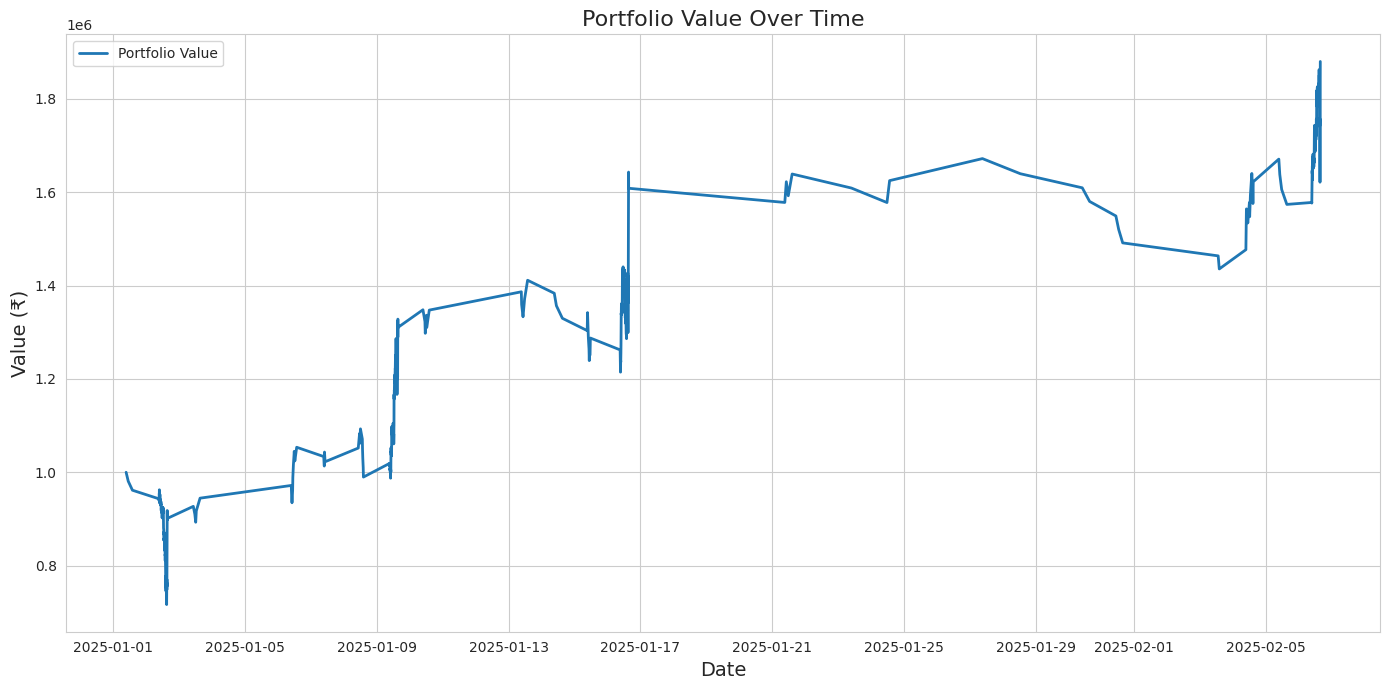

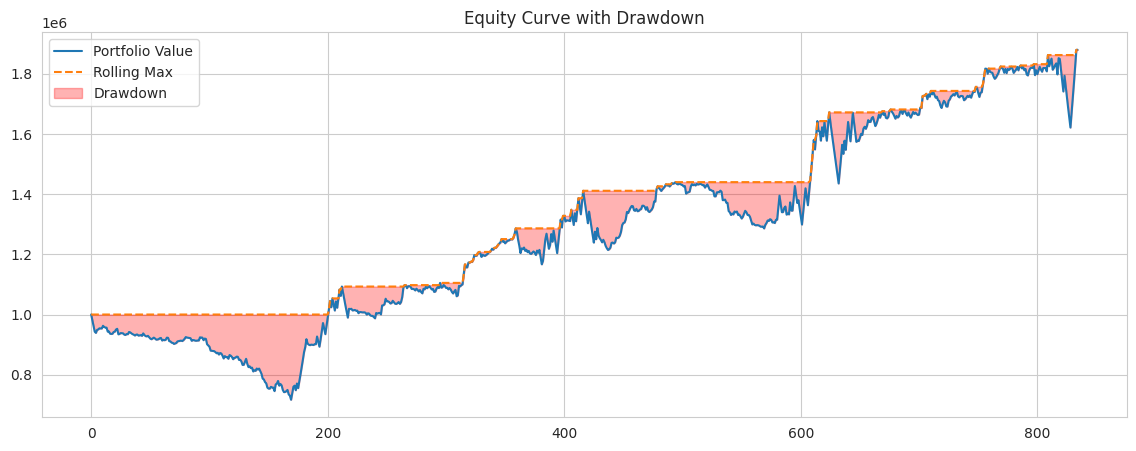

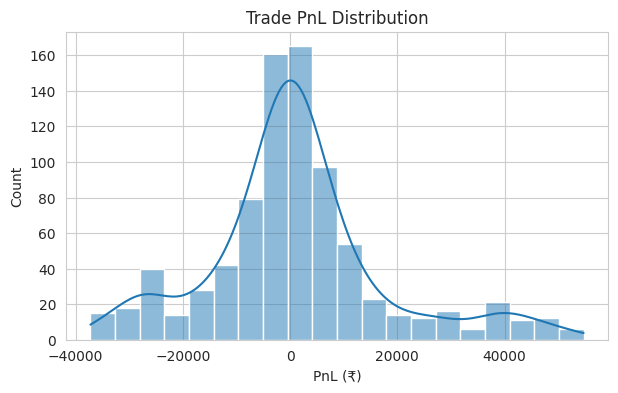

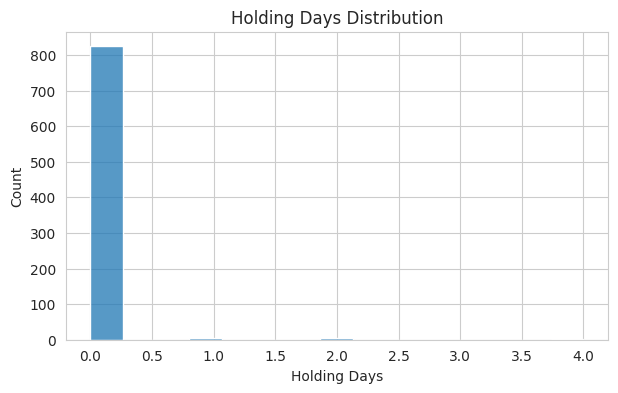

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade
TP_PCT = 0.3  # 30% take profit (relative to entry price)
SL_PCT = 0.2  # 20% stop loss (relative to entry price)

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    # Return the soonest expiry that is >= the trade timestamp's date
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def execute_trades_minute_tp_sl(spot_data, signals, options_data, tp_pct=TP_PCT, sl_pct=SL_PCT):
    portfolio_cash = initial_capital
    trade_log = []
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_min = signals.reindex(spot_data.index, method='ffill').dropna()
    open_position = None

    for ts, row in spot_data.iterrows():
        if ts not in signals_min.index or pd.isna(row['close']):
            continue
        signal = signals_min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            continue

        if open_position is None and signal != 0:
            # --- ENTRY ---
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                continue
            tp_price = entry_price * (1 + tp_pct)  # Take profit price
            sl_price = entry_price * (1 - sl_pct)  # Stop loss price
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'tp_price': tp_price,
                'sl_price': sl_price
            }
            continue

        # --- EXIT: If in position, check for TP/SL or expiry ---
        if open_position is not None:
            # Get all option rows for this strike/type/expiry between entry and now (inclusive)
            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['Expiry'].dt.date == open_position['expiry']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')

            exit_reason = None
            exit_price = None
            exit_time = None

            # Check for TP/SL hit in historical bars since entry
            for _, opt_row in option_rows.iterrows():
                if opt_row['High'] >= open_position['tp_price']:
                    exit_price = open_position['tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
                elif opt_row['Low'] <= open_position['sl_price']:
                    exit_price = open_position['sl_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Stop Loss'
                    break

            # If not hit, check for expiry
            if exit_reason is None and ts.date() >= open_position['expiry']:
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'Expiry'

            if exit_reason is not None and exit_price is not None:
                holding_days = (exit_time - open_position['entry_date']).days
                pnl = (exit_price - open_position['entry_price']) * lot_size * open_position['lots']
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price,
                    'lots': open_position['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason
                })
                open_position = None  # Reset for next trade

    return trade_log

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nExecuting trades minute by minute with rolling expiry, take profit, and stop loss...")
trade_log = execute_trades_minute_tp_sl(spot_data, signals, options_sample)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_minute_tp_sl_ALL_EXPIRIES.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_minute_tp_sl_ALL_EXPIRIES.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()
else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample loaded.

Executing trades minute by minute with trailing stop, costs, and slippage...

Detailed trade log saved to Jan_Feb_detailed_trade_log_minute_trailing_ALL_EXPIRIES.csv
                 entry_date                entry_time  \
0 2025-01-01 09:15:00+05:30 2025-01-01 09:15:00+05:30   
1 2025-01-01 09:20:00+05:30 2025-01-01 09:20:00+05:30   
2 2025-01-01 09:36:00+05:30 2025-01-01 09:36:00+05:30   
3 2025-01-01 09:45:00+05:30 2025-01-01 09:45:00+05:30   
4 2025-01-01 10:02:00+05:30 2025-01-01 10:02:00+05:30   
5 2025-01-01 10:13:00+05:30 2025-01-01 10:13:00+05:30   
6 2025-01-01 10:40:00+05:30 2025-01-01 10:40:00+05:30   
7 2025-01-01 10:51:00+05:30 2025-01-01 10:51:00+05:30   
8 2025-01-01 11:30:00+05:30 2025-01-01 11:30:00+

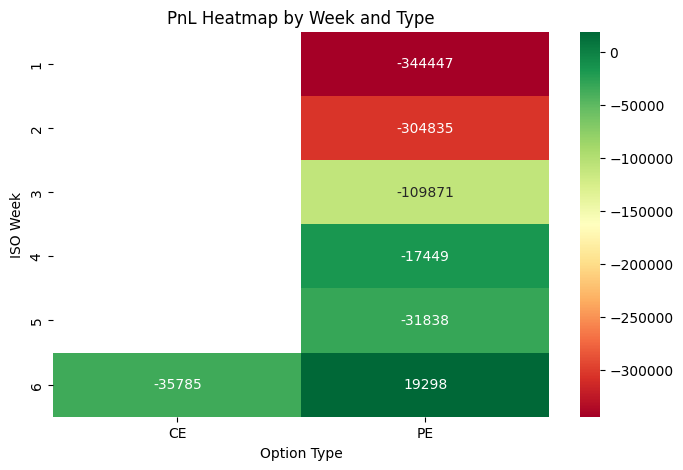

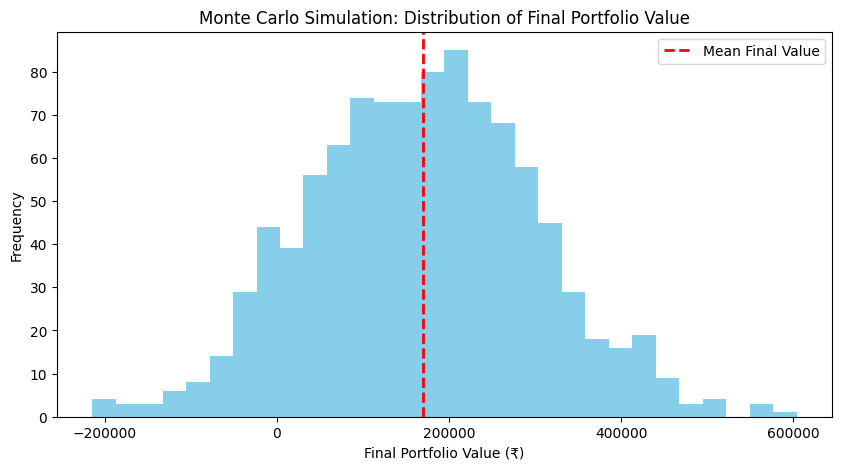

Monte Carlo: Mean Final Value = ₹169,559.09, 5th Percentile = ₹-35,977.79, 95th Percentile = ₹393,477.02


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade
TP_PCT = 0.3  # 30% take profit (relative to entry price)
TRAIL_SL_PCT = 0.2  # 20% trailing stop loss
BROKERAGE_PER_ORDER = 20  # INR per order (entry and exit)
SLIPPAGE_PCT = 0.001  # 0.1% per side

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def execute_trades_minute_trailing_sl(
    spot_data, signals, options_data, tp_pct=TP_PCT, trail_sl_pct=TRAIL_SL_PCT
):
    portfolio_cash = initial_capital
    trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_min = signals.reindex(spot_data.index, method='ffill').dropna()
    open_position = None

    for ts, row in spot_data.iterrows():
        if ts not in signals_min.index or pd.isna(row['close']):
            continue
        signal = signals_min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            continue

        if open_position is None and signal != 0:
            # --- ENTRY ---
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                continue
            # Apply slippage and brokerage
            entry_slippage = entry_price * SLIPPAGE_PCT * lot_size * lots
            total_slippage += entry_slippage
            total_brokerage += BROKERAGE_PER_ORDER
            entry_price_adj = entry_price + entry_price * SLIPPAGE_PCT  # Buy at ask
            tp_price = entry_price_adj * (1 + tp_pct)
            # Trailing stop starts at entry
            trail_stop = entry_price_adj * (1 - trail_sl_pct)
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price_adj,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'tp_price': tp_price,
                'trail_stop': trail_stop,
                'max_price': entry_price_adj,
                'entry_slippage': entry_slippage
            }
            continue

        # --- EXIT: If in position, check for TP/trailing SL or expiry ---
        if open_position is not None:
            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['Expiry'].dt.date == open_position['expiry']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')

            exit_reason = None
            exit_price = None
            exit_time = None

            for _, opt_row in option_rows.iterrows():
                # Update trailing stop if new high
                if opt_row['High'] > open_position['max_price']:
                    open_position['max_price'] = opt_row['High']
                    open_position['trail_stop'] = open_position['max_price'] * (1 - trail_sl_pct)
                # Take profit
                if opt_row['High'] >= open_position['tp_price']:
                    exit_price = open_position['tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
                # Trailing stop loss
                elif opt_row['Low'] <= open_position['trail_stop']:
                    exit_price = open_position['trail_stop']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Trailing Stop Loss'
                    break

            # If not hit, check for expiry
            if exit_reason is None and ts.date() >= open_position['expiry']:
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'Expiry'

            if exit_reason is not None and exit_price is not None:
                exit_slippage = exit_price * SLIPPAGE_PCT * lot_size * open_position['lots']
                total_slippage += exit_slippage
                total_brokerage += BROKERAGE_PER_ORDER
                exit_price_adj = exit_price - exit_price * SLIPPAGE_PCT  # Sell at bid
                holding_days = (exit_time - open_position['entry_date']).days
                pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * BROKERAGE_PER_ORDER)
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price_adj,
                    'lots': open_position['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason
                })
                open_position = None

    return trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nExecuting trades minute by minute with trailing stop, costs, and slippage...")
trade_log, total_brokerage, total_slippage = execute_trades_minute_trailing_sl(
    spot_data, signals, options_sample
)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_minute_trailing_ALL_EXPIRIES.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_minute_trailing_ALL_EXPIRIES.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}
Total Brokerage:    ₹{total_brokerage:,.2f}
Total Slippage:     ₹{total_slippage:,.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- PnL Heatmap by Week and Type ---
    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    # --- Monte Carlo Simulation ---
    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample loaded.

Executing trades every 15 minutes with rolling expiry, TP/SL, volume filter, time filter...

Detailed trade log saved to Jan_Feb_detailed_trade_log_15min_tp_sl_ALL_EXPIRIES.csv
                 entry_date                entry_time  \
0 2025-01-01 09:30:00+05:30 2025-01-01 09:30:00+05:30   
1 2025-01-01 10:00:00+05:30 2025-01-01 10:00:00+05:30   
2 2025-01-01 10:45:00+05:30 2025-01-01 10:45:00+05:30   
3 2025-01-01 11:15:00+05:30 2025-01-01 11:15:00+05:30   
4 2025-01-01 12:00:00+05:30 2025-01-01 12:00:00+05:30   
5 2025-01-01 12:30:00+05:30 2025-01-01 12:30:00+05:30   
6 2025-01-01 14:15:00+05:30 2025-01-01 14:15:00+05:30   
7 2025-01-02 09:45:00+05:30 2025-01-02 09:45:00+05:30   
8 2025-01-02 10:15:00+05:30 2025-01-0

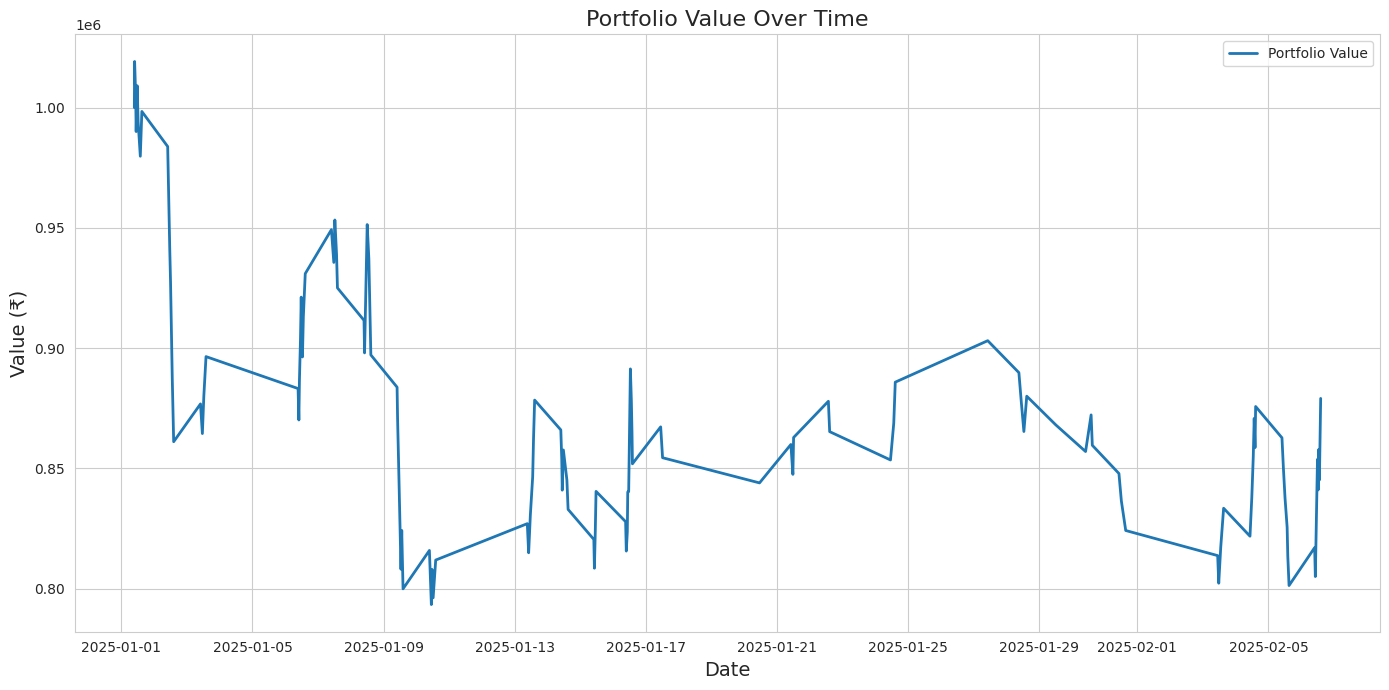

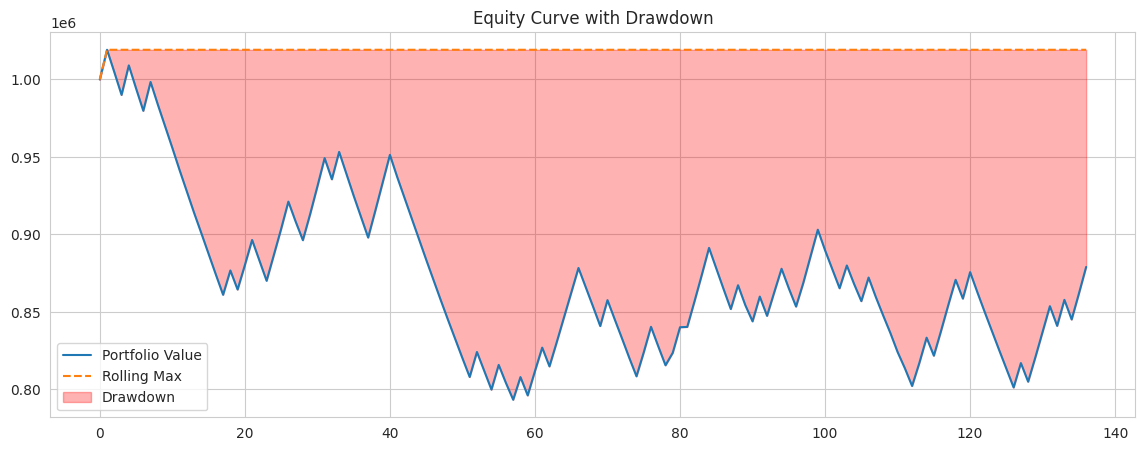

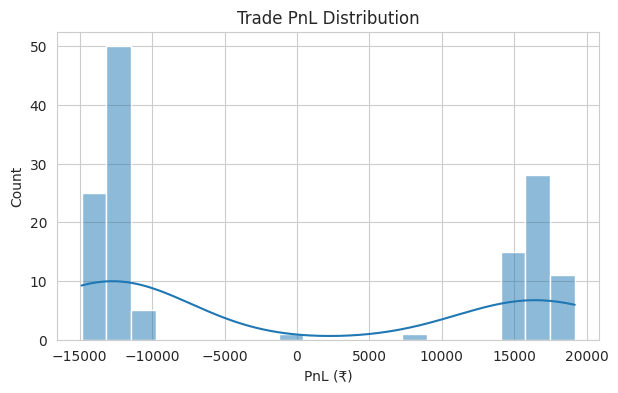

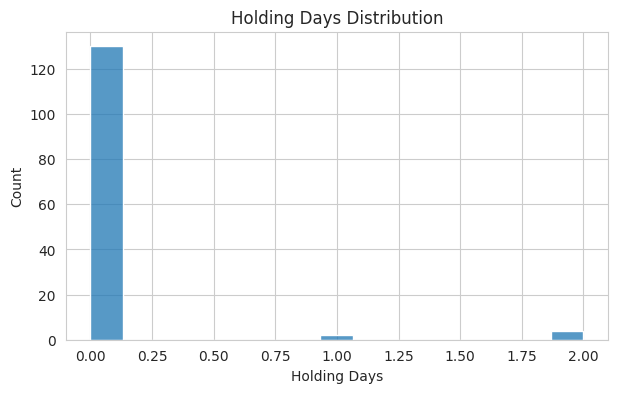

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade
TP_PCT = 0.2  # 20% take profit
SL_PCT = 0.15  # 15% stop loss
VOLUME_FILTER = 500

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def in_trading_hours(ts):
    # Only trade between 09:30 and 14:35 (inclusive)
    hour = ts.hour
    minute = ts.minute
    if (hour == 9 and minute >= 30) or (10 <= hour < 14) or (hour == 14 and minute <= 35):
        return True
    return False

def execute_trades_15min_tp_sl(spot_data, signals, options_data, tp_pct=TP_PCT, sl_pct=SL_PCT, volume_filter=VOLUME_FILTER):
    portfolio_cash = initial_capital
    trade_log = []
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    # Resample spot data to 15min intervals
    spot_15min = spot_data.resample('15min').last()
    signals_15min = signals.reindex(spot_15min.index, method='ffill').dropna()
    open_position = None

    for ts, row in spot_15min.iterrows():
        if ts not in signals_15min.index or pd.isna(row['close']):
            continue
        if not in_trading_hours(ts):
            continue
        signal = signals_15min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            continue

        if open_position is None and signal != 0:
            # --- ENTRY ---
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts) &
                (options_data['Volume'] > volume_filter)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                continue
            tp_price = entry_price * (1 + tp_pct)
            sl_price = entry_price * (1 - sl_pct)
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'tp_price': tp_price,
                'sl_price': sl_price
            }
            continue

        # --- EXIT: If in position, check for TP/SL or expiry ---
        if open_position is not None:
            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['Expiry'].dt.date == open_position['expiry']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')

            exit_reason = None
            exit_price = None
            exit_time = None

            for _, opt_row in option_rows.iterrows():
                if opt_row['High'] >= open_position['tp_price']:
                    exit_price = open_position['tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
                elif opt_row['Low'] <= open_position['sl_price']:
                    exit_price = open_position['sl_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Stop Loss'
                    break

            if exit_reason is None and ts.date() >= open_position['expiry']:
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'Expiry'

            if exit_reason is not None and exit_price is not None:
                holding_days = (exit_time - open_position['entry_date']).days
                pnl = (exit_price - open_position['entry_price']) * lot_size * open_position['lots']
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price,
                    'lots': open_position['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason
                })
                open_position = None

    return trade_log

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nExecuting trades every 15 minutes with rolling expiry, TP/SL, volume filter, time filter...")
trade_log = execute_trades_15min_tp_sl(spot_data, signals, options_sample)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_15min_tp_sl_ALL_EXPIRIES.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_15min_tp_sl_ALL_EXPIRIES.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()
else:
    print("No trades to report.")

    # --- PnL Heatmap by Week and Type ---
    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    # --- Monte Carlo Simulation ---
    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample loaded.

Executing trades every 15 minutes with rolling expiry, TP/SL, volume filter...

Detailed trade log saved to Jan_Feb_detailed_trade_log_15min_tp_sl_ALL_EXPIRIES.csv
                 entry_date                entry_time  \
0 2025-01-01 09:30:00+05:30 2025-01-01 09:30:00+05:30   
1 2025-01-01 11:15:00+05:30 2025-01-01 11:15:00+05:30   
2 2025-01-01 14:15:00+05:30 2025-01-01 14:15:00+05:30   
3 2025-01-02 09:45:00+05:30 2025-01-02 09:45:00+05:30   
4 2025-01-02 10:15:00+05:30 2025-01-02 10:15:00+05:30   
5 2025-01-02 10:45:00+05:30 2025-01-02 10:45:00+05:30   
6 2025-01-02 11:15:00+05:30 2025-01-02 11:15:00+05:30   
7 2025-01-02 11:45:00+05:30 2025-01-02 11:45:00+05:30   
8 2025-01-02 12:15:00+05:30 2025-01-02 12:15:00+05

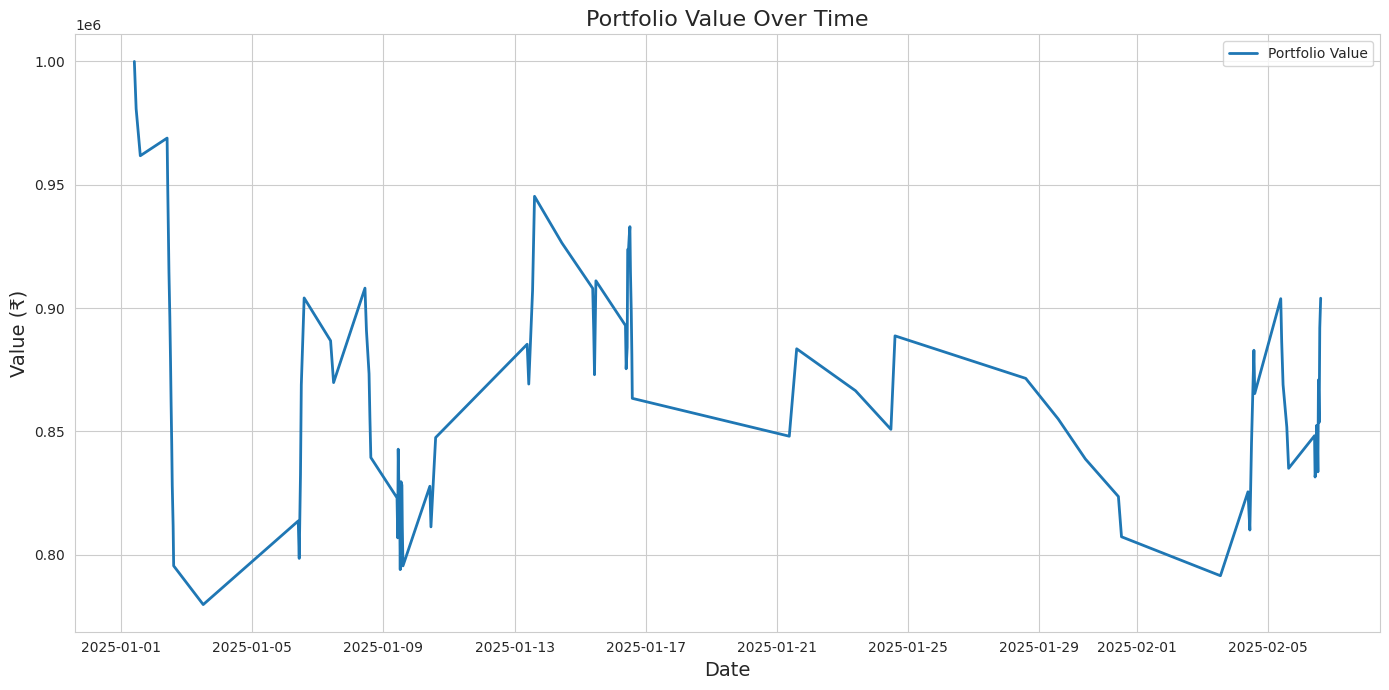

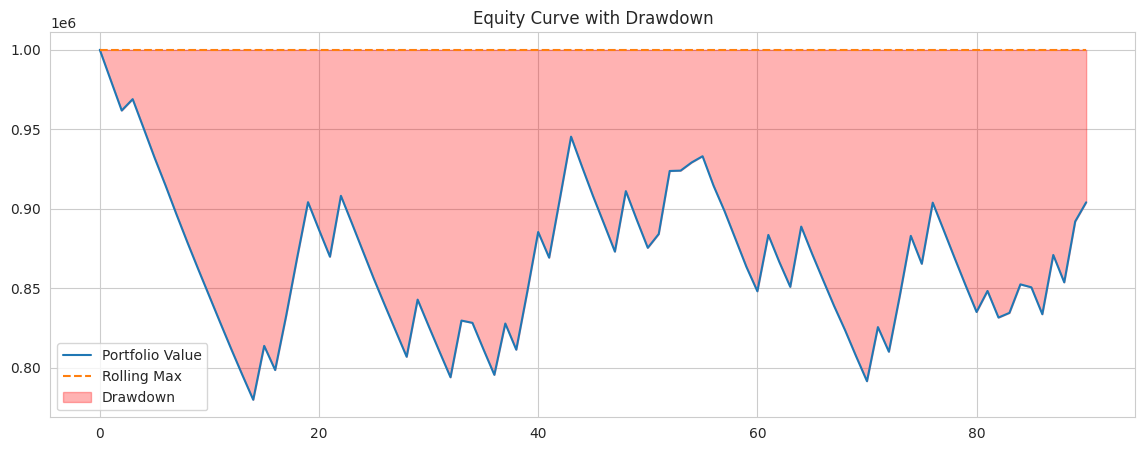

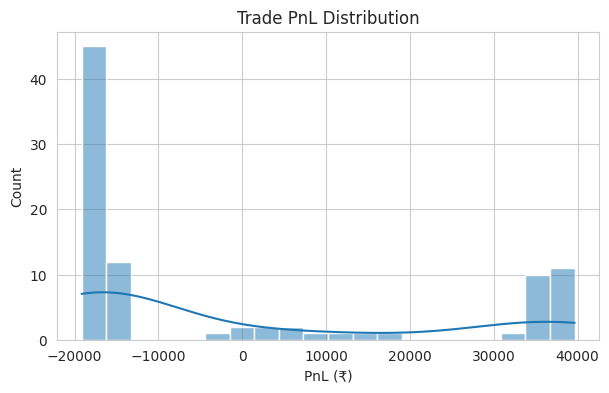

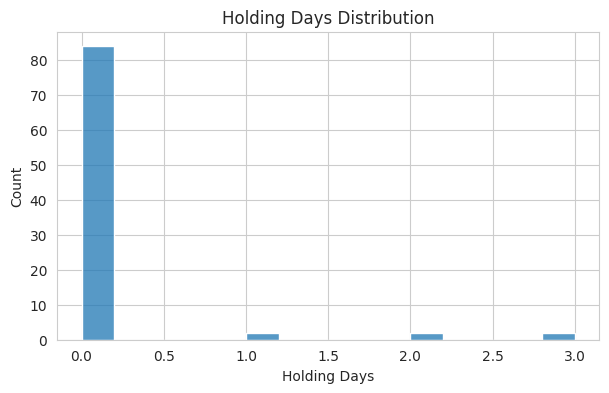

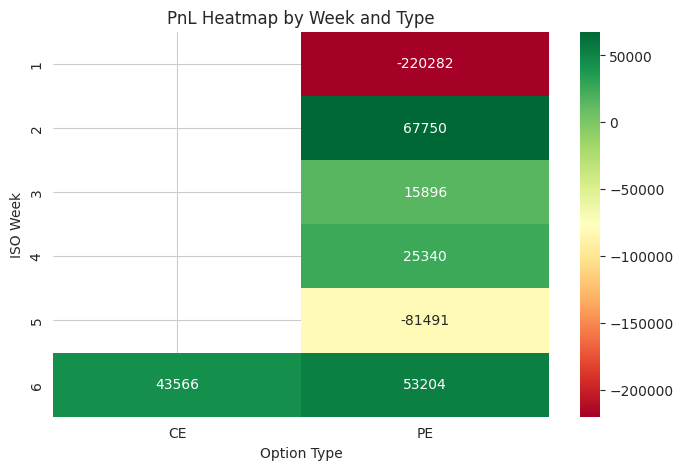

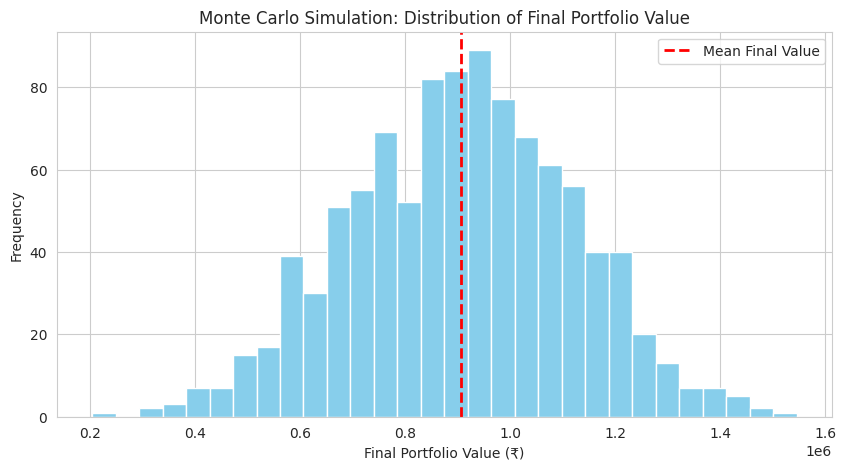

Monte Carlo: Mean Final Value = ₹906,382.02, 5th Percentile = ₹560,185.28, 95th Percentile = ₹1,247,387.19


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade
TP_PCT = 0.45  # 45% take profit
SL_PCT = 0.2   # 20% stop loss
VOLUME_FILTER = 300

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def in_trading_hours(ts):
    # Only trade between 09:30 and 14:35 (inclusive)
    hour = ts.hour
    minute = ts.minute
    if (hour == 9 and minute >= 30) or (10 <= hour < 14) or (hour == 14 and minute <= 35):
        return True
    return False

def execute_trades_15min_tp_sl(spot_data, signals, options_data, tp_pct=TP_PCT, sl_pct=SL_PCT, volume_filter=VOLUME_FILTER):
    portfolio_cash = initial_capital
    trade_log = []
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    # Resample spot data to 15min intervals
    spot_15min = spot_data.resample('15min').last()
    signals_15min = signals.reindex(spot_15min.index, method='ffill').dropna()
    open_position = None

    for ts, row in spot_15min.iterrows():
        if ts not in signals_15min.index or pd.isna(row['close']):
            continue
        if not in_trading_hours(ts):
            continue
        signal = signals_15min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            continue

        if open_position is None and signal != 0:
            # --- ENTRY ---
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts) &
                (options_data['Volume'] > volume_filter)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                continue
            tp_price = entry_price * (1 + tp_pct)
            sl_price = entry_price * (1 - sl_pct)
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'tp_price': tp_price,
                'sl_price': sl_price
            }
            continue

        # --- EXIT: If in position, check for TP/SL or expiry ---
        if open_position is not None:
            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['Expiry'].dt.date == open_position['expiry']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')

            exit_reason = None
            exit_price = None
            exit_time = None

            for _, opt_row in option_rows.iterrows():
                if opt_row['High'] >= open_position['tp_price']:
                    exit_price = open_position['tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
                elif opt_row['Low'] <= open_position['sl_price']:
                    exit_price = open_position['sl_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Stop Loss'
                    break

            if exit_reason is None and ts.date() >= open_position['expiry']:
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'Expiry'

            if exit_reason is not None and exit_price is not None:
                holding_days = (exit_time - open_position['entry_date']).days
                pnl = (exit_price - open_position['entry_price']) * lot_size * open_position['lots']
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price,
                    'lots': open_position['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason
                })
                open_position = None

    return trade_log

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nExecuting trades every 15 minutes with rolling expiry, TP/SL, volume filter...")
trade_log = execute_trades_15min_tp_sl(spot_data, signals, options_sample)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_15min_tp_sl_ALL_EXPIRIES.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_15min_tp_sl_ALL_EXPIRIES.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()

    # --- PnL Heatmap by Week and Type ---
    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    # --- Monte Carlo Simulation ---
    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample loaded.

Executing trades minute by minute with rolling expiry, TP/SL, volume filter, brokerage, and slippage...

Detailed trade log saved to Jan_Feb_detailed_trade_log_minute_tp_sl_ALL_EXPIRIES.csv
                 entry_date                entry_time  \
0 2025-01-01 09:30:00+05:30 2025-01-01 09:30:00+05:30   
1 2025-01-01 10:50:00+05:30 2025-01-01 10:50:00+05:30   
2 2025-01-01 13:54:00+05:30 2025-01-01 13:54:00+05:30   
3 2025-01-02 09:31:00+05:30 2025-01-02 09:31:00+05:30   
4 2025-01-02 09:33:00+05:30 2025-01-02 09:33:00+05:30   
5 2025-01-02 09:35:00+05:30 2025-01-02 09:35:00+05:30   
6 2025-01-02 09:37:00+05:30 2025-01-02 09:37:00+05:30   
7 2025-01-02 09:39:00+05:30 2025-01-02 09:39:00+05:30   
8 2025-01-02 09:41:00+05

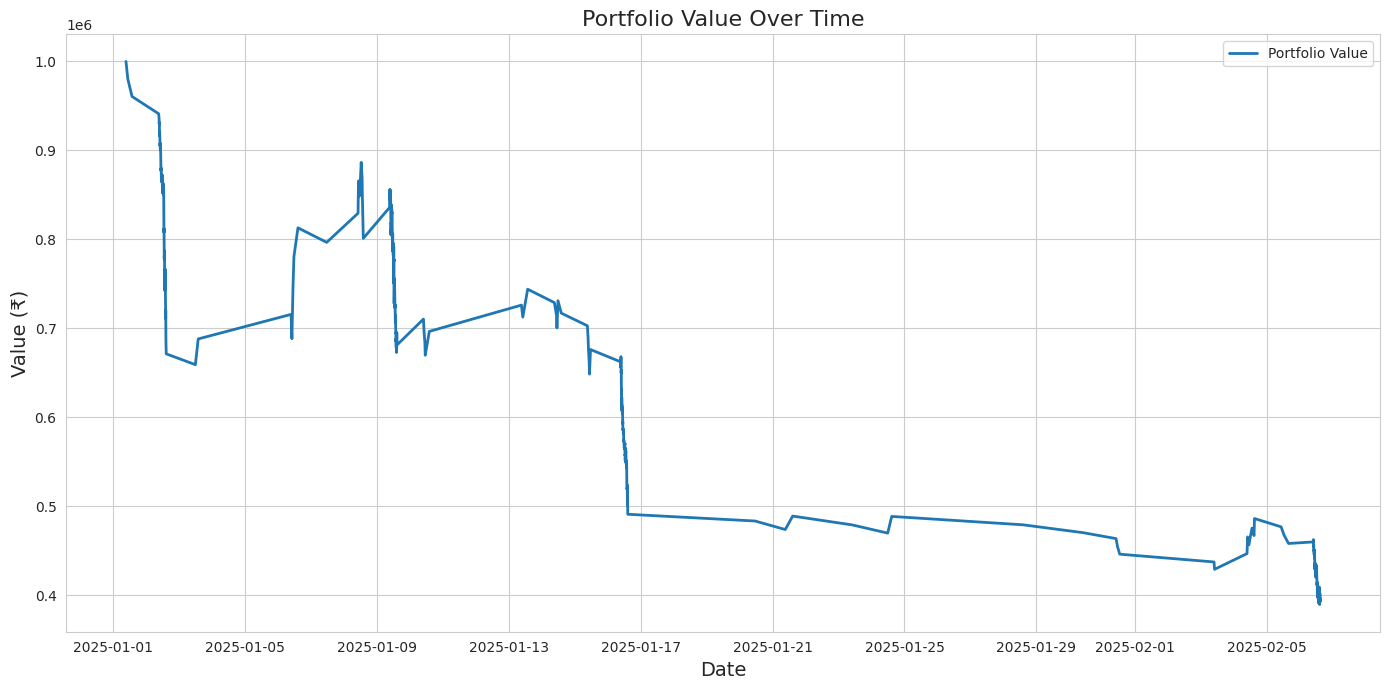

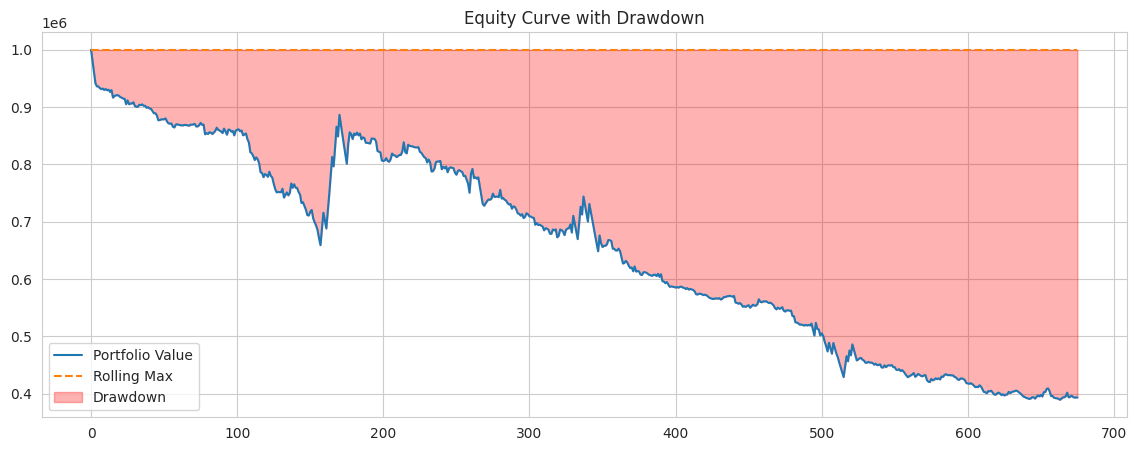

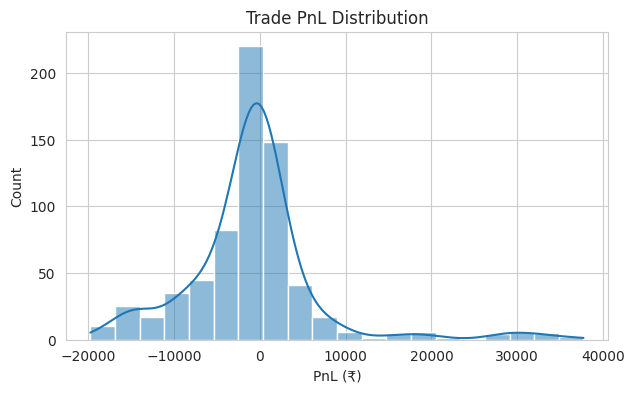

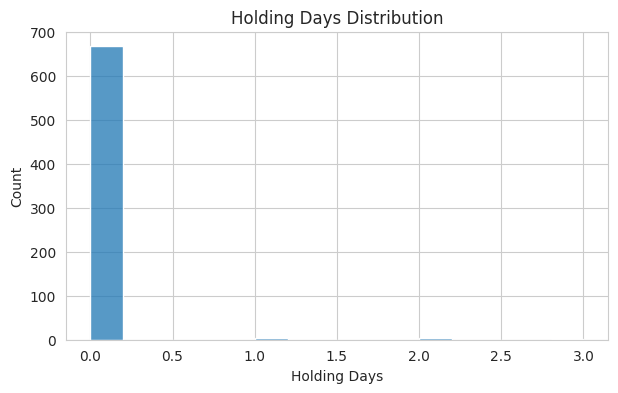

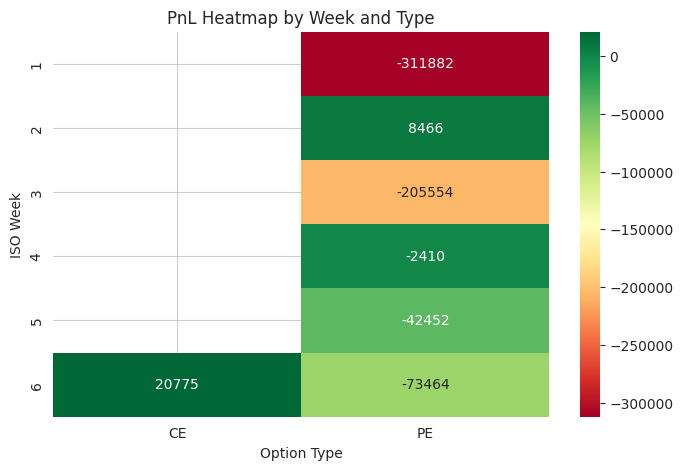

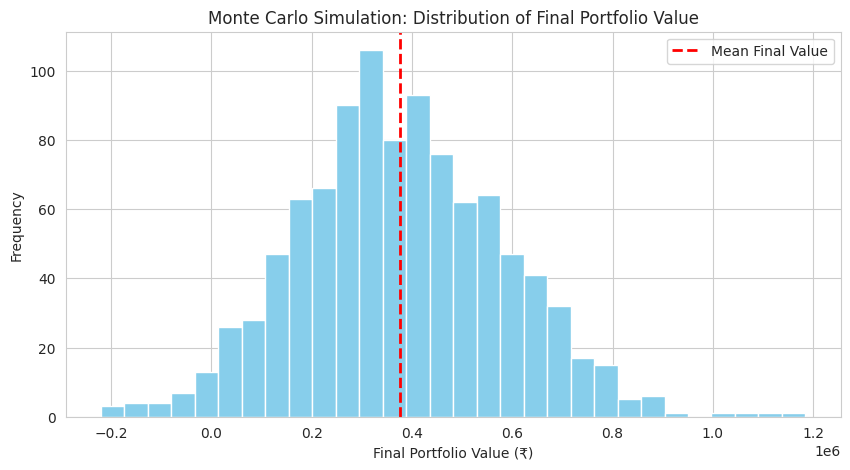

Monte Carlo: Mean Final Value = ₹377,121.05, 5th Percentile = ₹50,193.41, 95th Percentile = ₹706,908.32


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade
TP_PCT = 0.45  # 45% take profit
SL_PCT = 0.2   # 20% stop loss
VOLUME_FILTER = 300
BROKERAGE_PER_ORDER = 20  # INR per order (entry and exit)
SLIPPAGE_PCT = 0.001      # 0.1% per side

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def in_trading_hours(ts):
    # Only trade between 09:30 and 14:35 (inclusive)
    hour = ts.hour
    minute = ts.minute
    if (hour == 9 and minute >= 30) or (10 <= hour < 14) or (hour == 14 and minute <= 35):
        return True
    return False

def execute_trades_minute_tp_sl(
    spot_data, signals, options_data, tp_pct=TP_PCT, sl_pct=SL_PCT, volume_filter=VOLUME_FILTER,
    brokerage_per_order=BROKERAGE_PER_ORDER, slippage_pct=SLIPPAGE_PCT
):
    portfolio_cash = initial_capital
    trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_min = signals.reindex(spot_data.index, method='ffill').dropna()
    open_position = None

    for ts, row in spot_data.iterrows():
        if ts not in signals_min.index or pd.isna(row['close']):
            continue
        if not in_trading_hours(ts):
            continue
        signal = signals_min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            continue

        if open_position is None and signal != 0:
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts) &
                (options_data['Volume'] > volume_filter)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                continue
            tp_price = entry_price * (1 + tp_pct)
            sl_price = entry_price * (1 - sl_pct)
            # Apply slippage and brokerage at entry
            entry_slippage = entry_price * slippage_pct * lot_size * lots
            total_slippage += entry_slippage
            total_brokerage += brokerage_per_order
            entry_price_adj = entry_price + entry_price * slippage_pct  # Buy at ask
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price_adj,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'tp_price': tp_price,
                'sl_price': sl_price,
                'entry_slippage': entry_slippage
            }
            continue

        if open_position is not None:
            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['Expiry'].dt.date == open_position['expiry']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')

            exit_reason = None
            exit_price = None
            exit_time = None

            for _, opt_row in option_rows.iterrows():
                if opt_row['High'] >= open_position['tp_price']:
                    exit_price = open_position['tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
                elif opt_row['Low'] <= open_position['sl_price']:
                    exit_price = open_position['sl_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Stop Loss'
                    break

            if exit_reason is None and ts.date() >= open_position['expiry']:
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'Expiry'

            if exit_reason is not None and exit_price is not None:
                # Apply slippage and brokerage at exit
                exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                total_slippage += exit_slippage
                total_brokerage += brokerage_per_order
                exit_price_adj = exit_price - exit_price * slippage_pct  # Sell at bid
                holding_days = (exit_time - open_position['entry_date']).days
                pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price_adj,
                    'lots': open_position['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason
                })
                open_position = None  # Reset for next trade

    return trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nExecuting trades minute by minute with rolling expiry, TP/SL, volume filter, brokerage, and slippage...")
trade_log, total_brokerage, total_slippage = execute_trades_minute_tp_sl(
    spot_data, signals, options_sample
)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_minute_tp_sl_ALL_EXPIRIES.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_minute_tp_sl_ALL_EXPIRIES.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}
Total Brokerage:    ₹{total_brokerage:,.2f}
Total Slippage:     ₹{total_slippage:,.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()

    # --- PnL Heatmap by Week and Type ---
    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    # --- Monte Carlo Simulation ---
    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1
TP_PCT = 0.3
SL_PCT = 0.2
BROKERAGE_PER_ORDER = 20
SLIPPAGE_PCT = 0.001
SPREAD_WIDTH = 100  # points between strikes in the spread
VIX_RANK_WINDOW = 30 * 390  # 30 trading days of 390 min each

VIX_PATH = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/Filtered_VIX_Jan_May_2025_1min.csv'

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

def load_vix():
    vix = pd.read_csv(VIX_PATH, parse_dates=['TimeStamp'])
    vix = vix.set_index('TimeStamp')
    if vix.index.tz is None:
        vix.index = pd.to_datetime(vix.index).tz_localize('Asia/Kolkata')
    else:
        vix.index = vix.index.tz_convert('Asia/Kolkata')
    vix = vix.rename(columns={'Close': 'VIX'})
    return vix

# ======================================================================
# UTILS
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def calculate_vix_rank(vix_series, window=VIX_RANK_WINDOW):
    vix_min = vix_series.rolling(window=window, min_periods=1).min()
    vix_max = vix_series.rolling(window=window, min_periods=1).max()
    vix_rank = (vix_series - vix_min) / (vix_max - vix_min)
    vix_rank = vix_rank.fillna(0.5)
    return vix_rank

def in_trading_hours(ts):
    hour = ts.hour
    minute = ts.minute
    if (hour == 9 and minute >= 30) or (10 <= hour < 14) or (hour == 14 and minute <= 35):
        return True
    return False

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def execute_trades_mixed(
    spot_data, signals, options_data, vix_rank, tp_pct=TP_PCT, sl_pct=SL_PCT,
    brokerage_per_order=BROKERAGE_PER_ORDER, slippage_pct=SLIPPAGE_PCT,
    risk_per_trade=risk_per_trade, spread_width=SPREAD_WIDTH
):
    portfolio_cash = initial_capital
    trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_min = signals.reindex(spot_data.index, method='ffill').dropna()
    vix_rank = vix_rank.reindex(spot_data.index, method='ffill')
    open_position = None

    for ts, row in spot_data.iterrows():
        if ts not in signals_min.index or pd.isna(row['close']):
            continue
        if not in_trading_hours(ts):
            continue
        signal = signals_min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            continue
        vix_r = vix_rank.loc[ts] if ts in vix_rank.index else 0.5

        # --- BUY SIDE: as before ---
        if open_position is None and signal != 0:
            if signal == 1:
                # Buy CE (bullish)
                strike = get_nearest_strike(available_strikes, atm_strike)
                option_type = 'CE'
            else:
                # Buy PE (bearish)
                strike = get_nearest_strike(available_strikes, atm_strike)
                option_type = 'PE'
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if not entry_row.empty:
                entry_price = float(entry_row.iloc[0]['Close'])
                entry_time = entry_row.iloc[0]['TimeStamp']
                lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
                if lots >= 1:
                    tp_price = entry_price * (1 + tp_pct)
                    sl_price = entry_price * (1 - sl_pct)
                    entry_slippage = entry_price * slippage_pct * lot_size * lots
                    total_slippage += entry_slippage
                    total_brokerage += brokerage_per_order
                    entry_price_adj = entry_price + entry_price * slippage_pct
                    open_position = {
                        'side': 'buy',
                        'entry_date': ts,
                        'entry_time': entry_time,
                        'action': 'Buy',
                        'type': option_type,
                        'strike': strike,
                        'entry_price': entry_price_adj,
                        'lots': lots,
                        'spot': spot_price,
                        'expiry': expiry,
                        'signal': signal,
                        'tp_price': tp_price,
                        'sl_price': sl_price,
                        'entry_slippage': entry_slippage
                    }
                    continue

        # --- SELL SIDE: Credit Spread (only if VIX rank >= 0.5) ---
        if open_position is None and signal != 0 and vix_r >= 0.5:
            if signal == 1:
                # Bullish: Put Credit Spread (Sell ATM PE, Buy lower PE)
                short_strike = get_nearest_strike(available_strikes, atm_strike)
                long_strike = get_nearest_strike(available_strikes, atm_strike - spread_width)
                short_type, long_type = 'PE', 'PE'
            else:
                # Bearish: Call Credit Spread (Sell ATM CE, Buy higher CE)
                short_strike = get_nearest_strike(available_strikes, atm_strike)
                long_strike = get_nearest_strike(available_strikes, atm_strike + spread_width)
                short_type, long_type = 'CE', 'CE'
            # Find premiums
            short_row = options_data[
                (options_data['Strike'] == short_strike) &
                (options_data['Type'] == short_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            long_row = options_data[
                (options_data['Strike'] == long_strike) &
                (options_data['Type'] == long_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if not short_row.empty and not long_row.empty:
                short_price = float(short_row.iloc[0]['Close'])
                long_price = float(long_row.iloc[0]['Close'])
                entry_time = short_row.iloc[0]['TimeStamp']
                net_credit = (short_price - long_price)
                max_loss = spread_width - net_credit
                margin_required = max_loss * lot_size
                lots = int((portfolio_cash * risk_per_trade) // margin_required)
                if lots >= 1 and net_credit > 0:
                    entry_slippage = (short_price + long_price) * slippage_pct * lot_size * lots
                    total_slippage += entry_slippage
                    total_brokerage += 2 * brokerage_per_order  # sell + buy
                    net_credit_adj = (short_price - long_price) - (short_price + long_price) * slippage_pct
                    open_position = {
                        'side': 'sell',
                        'entry_date': ts,
                        'entry_time': entry_time,
                        'action': 'Sell',
                        'short_type': short_type,
                        'long_type': long_type,
                        'short_strike': short_strike,
                        'long_strike': long_strike,
                        'short_price': short_price,
                        'long_price': long_price,
                        'net_credit': net_credit_adj,
                        'lots': lots,
                        'spot': spot_price,
                        'expiry': expiry,
                        'signal': signal,
                        'spread_width': spread_width,
                        'max_loss': max_loss,
                        'entry_slippage': entry_slippage
                    }
                    continue

        # --- EXIT LOGIC (for both sides) ---
        if open_position is not None:
            # BUY SIDE EXIT
            if open_position['side'] == 'buy':
                option_rows = options_data[
                    (options_data['Strike'] == open_position['strike']) &
                    (options_data['Type'] == open_position['type']) &
                    (options_data['Expiry'].dt.date == open_position['expiry']) &
                    (options_data['TimeStamp'] >= open_position['entry_time']) &
                    (options_data['TimeStamp'] <= ts)
                ].sort_values('TimeStamp')
                exit_reason = None
                exit_price = None
                exit_time = None
                for _, opt_row in option_rows.iterrows():
                    if opt_row['High'] >= open_position['tp_price']:
                        exit_price = open_position['tp_price']
                        exit_time = opt_row['TimeStamp']
                        exit_reason = 'Take Profit'
                        break
                    elif opt_row['Low'] <= open_position['sl_price']:
                        exit_price = open_position['sl_price']
                        exit_time = opt_row['TimeStamp']
                        exit_reason = 'Stop Loss'
                        break
                if exit_reason is None and ts.date() >= open_position['expiry']:
                    last_row = option_rows.iloc[-1] if not option_rows.empty else None
                    if last_row is not None:
                        exit_price = float(last_row['Close'])
                        exit_time = last_row['TimeStamp']
                        exit_reason = 'Expiry'
                if exit_reason is not None and exit_price is not None:
                    exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                    total_slippage += exit_slippage
                    total_brokerage += brokerage_per_order
                    exit_price_adj = exit_price - exit_price * slippage_pct
                    holding_days = (exit_time - open_position['entry_date']).days
                    pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                    pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                    portfolio_cash += pnl
                    trade_log.append({
                        'side': 'buy',
                        'entry_date': open_position['entry_date'],
                        'entry_time': open_position['entry_time'],
                        'exit_date': exit_time,
                        'action': open_position['action'],
                        'type': open_position['type'],
                        'strike': open_position['strike'],
                        'entry_price': open_position['entry_price'],
                        'exit_price': exit_price_adj,
                        'lots': open_position['lots'],
                        'pnl': pnl,
                        'holding_days': holding_days,
                        'spot': open_position['spot'],
                        'expiry': open_position['expiry'],
                        'exit_reason': exit_reason
                    })
                    open_position = None
            # SELL SIDE EXIT (credit spread)
            elif open_position['side'] == 'sell':
                short_rows = options_data[
                    (options_data['Strike'] == open_position['short_strike']) &
                    (options_data['Type'] == open_position['short_type']) &
                    (options_data['Expiry'].dt.date == open_position['expiry']) &
                    (options_data['TimeStamp'] >= open_position['entry_time']) &
                    (options_data['TimeStamp'] <= ts)
                ].sort_values('TimeStamp')
                long_rows = options_data[
                    (options_data['Strike'] == open_position['long_strike']) &
                    (options_data['Type'] == open_position['long_type']) &
                    (options_data['Expiry'].dt.date == open_position['expiry']) &
                    (options_data['TimeStamp'] >= open_position['entry_time']) &
                    (options_data['TimeStamp'] <= ts)
                ].sort_values('TimeStamp')
                exit_reason = None
                exit_short = None
                exit_long = None
                exit_time = None
                for ((_, short_row), (_, long_row)) in zip(short_rows.iterrows(), long_rows.iterrows()):
                    # Stop loss: if loss exceeds 1.5x net credit
                    spread_now = (short_row['Close'] - long_row['Close'])
                    loss_now = open_position['net_credit'] - spread_now
                    if loss_now < -1.5 * open_position['net_credit']:
                        exit_short = short_row['Close']
                        exit_long = long_row['Close']
                        exit_time = short_row['TimeStamp']
                        exit_reason = 'Stop Loss'
                        break
                    # Take profit: if gain exceeds 80% of net credit
                    if spread_now < 0.2 * open_position['net_credit']:
                        exit_short = short_row['Close']
                        exit_long = long_row['Close']
                        exit_time = short_row['TimeStamp']
                        exit_reason = 'Take Profit'
                        break
                if exit_reason is None and ts.date() >= open_position['expiry']:
                    # On expiry, calculate intrinsic value
                    short_iv = max(0, (spot_price - open_position['short_strike']) if open_position['short_type'] == 'CE' else (open_position['short_strike'] - spot_price))
                    long_iv = max(0, (spot_price - open_position['long_strike']) if open_position['long_type'] == 'CE' else (open_position['long_strike'] - spot_price))
                    exit_short = short_iv
                    exit_long = long_iv
                    exit_time = ts
                    exit_reason = 'Expiry'
                if exit_reason is not None and exit_short is not None and exit_long is not None:
                    exit_slippage = (exit_short + exit_long) * slippage_pct * lot_size * open_position['lots']
                    total_slippage += exit_slippage
                    total_brokerage += 2 * brokerage_per_order
                    net_exit = (exit_short - exit_long) - (exit_short + exit_long) * slippage_pct
                    holding_days = (exit_time - open_position['entry_date']).days
                    pnl = (open_position['net_credit'] - net_exit) * lot_size * open_position['lots']
                    pnl -= (open_position['entry_slippage'] + exit_slippage + 4 * brokerage_per_order)
                    portfolio_cash += pnl
                    trade_log.append({
                        'side': 'sell',
                        'entry_date': open_position['entry_date'],
                        'entry_time': open_position['entry_time'],
                        'exit_date': exit_time,
                        'action': open_position['action'],
                        'short_type': open_position['short_type'],
                        'long_type': open_position['long_type'],
                        'short_strike': open_position['short_strike'],
                        'long_strike': open_position['long_strike'],
                        'entry_net_credit': open_position['net_credit'],
                        'exit_net_debit': net_exit,
                        'lots': open_position['lots'],
                        'pnl': pnl,
                        'holding_days': holding_days,
                        'spot': open_position['spot'],
                        'expiry': open_position['expiry'],
                        'exit_reason': exit_reason
                    })
                    open_position = None
    return trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nLoading VIX data...")
vix = load_vix()
vix_rank = calculate_vix_rank(vix['VIX'])
print("VIX data loaded.")

print("\nExecuting trades minute by minute (buy and sell/credit spreads, VIX filter)...")
trade_log, total_brokerage, total_slippage = execute_trades_mixed(
    spot_data, signals, options_sample, vix_rank
)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_minute_mixed_ALL_EXPIRIES.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_minute_mixed_ALL_EXPIRIES.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS (as before)
# ======================================================================
if not trade_log_df.empty:
    # ... (performance reporting and visualizations as in your previous code)
    pass
else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample loaded.

Loading VIX data...
VIX data loaded.

Executing trades minute by minute (buy and sell/credit spreads, VIX filter)...

Detailed trade log saved to Jan_Feb_detailed_trade_log_minute_mixed_ALL_EXPIRIES.csv
  side                entry_date                entry_time  \
0  buy 2025-01-01 09:30:00+05:30 2025-01-01 09:30:00+05:30   
1  buy 2025-01-01 09:44:00+05:30 2025-01-01 09:44:00+05:30   
2  buy 2025-01-01 10:26:00+05:30 2025-01-01 10:26:00+05:30   
3  buy 2025-01-01 10:50:00+05:30 2025-01-01 10:50:00+05:30   
4  buy 2025-01-01 11:56:00+05:30 2025-01-01 11:56:00+05:30   
5  buy 2025-01-01 12:18:00+05:30 2025-01-01 12:18:00+05:30   
6  buy 2025-01-01 13:54:00+05:30 2025-01-01 13:54:00+05:30   
7  buy 2025-01-02 09:31:00+0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (725, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample loaded.

Loading VIX data...
VIX data loaded.

Executing trades every 15min (buy and sell/credit spreads, VIX filter, adaptive slippage)...

Buy-side trade log saved to Jan_Feb_detailed_trade_log_15min_buy_ALL_EXPIRIES.csv
  side                entry_date                entry_time  \
0  buy 2025-01-01 09:45:00+05:30 2025-01-01 09:45:00+05:30   
1  buy 2025-01-01 10:30:00+05:30 2025-01-01 10:30:00+05:30   
2  buy 2025-01-01 13:15:00+05:30 2025-01-01 13:15:00+05:30   
3  buy 2025-01-01 14:15:00+05:30 2025-01-01 14:15:00+05:30   
4  buy 2025-01-02 09:45:00+05:30 2025-01-02 09:45:00+05:30   
5  buy 2025-01-02 10:00:00+05:30 2025-01-02 10:00:00+05:30   
6  buy 2025-01-02 10:15:00+05:30 2025-01-02 10:15:00+05:30   
7  buy 2025-01-02 1

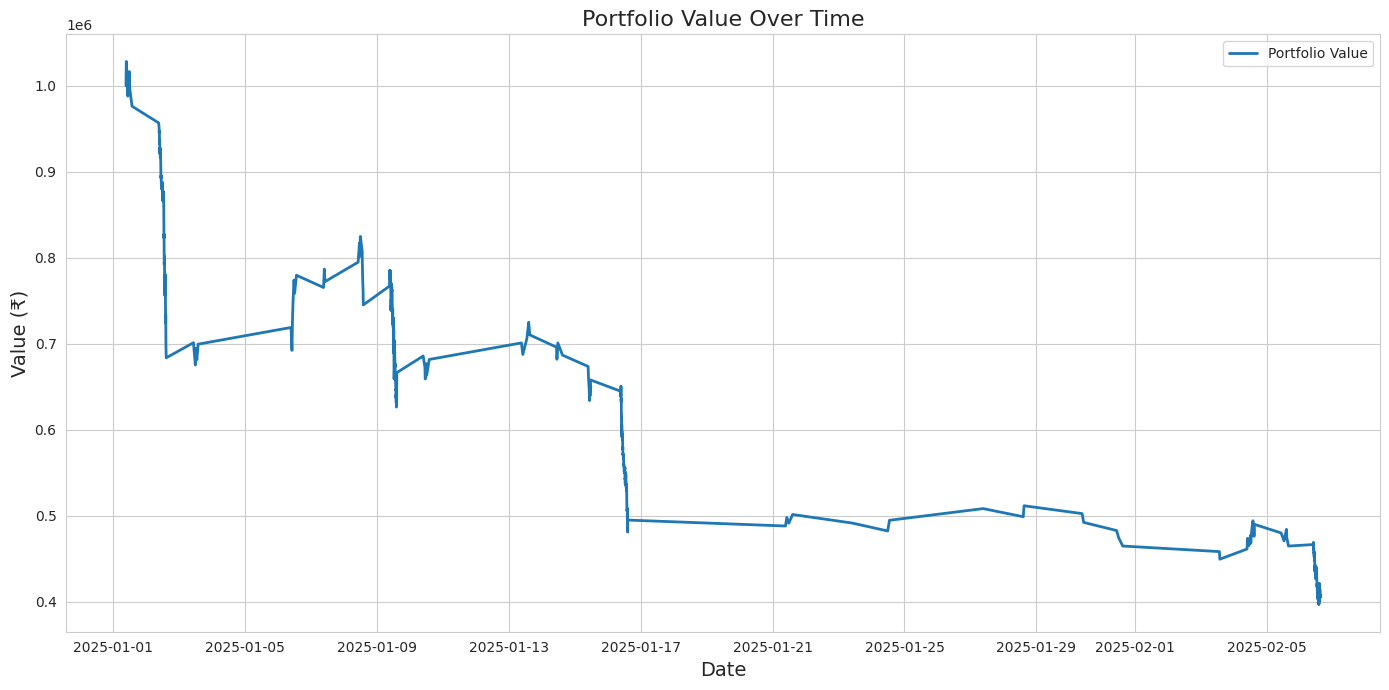

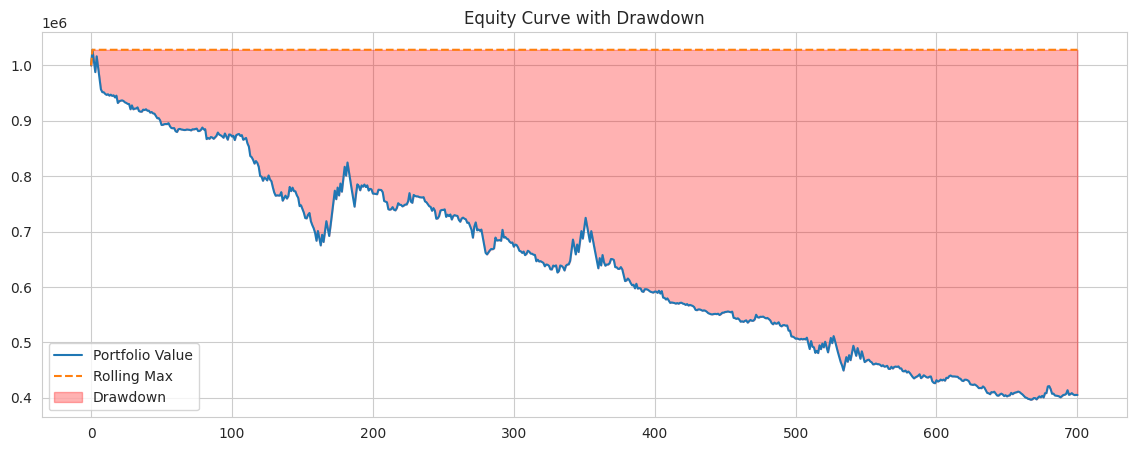

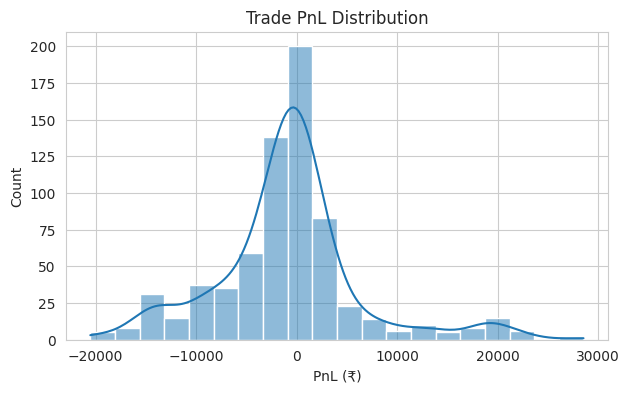

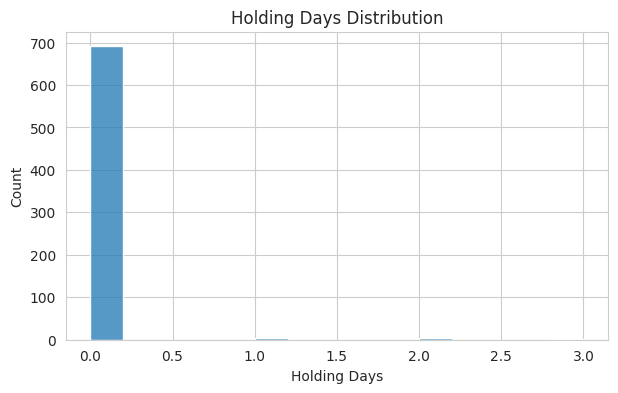

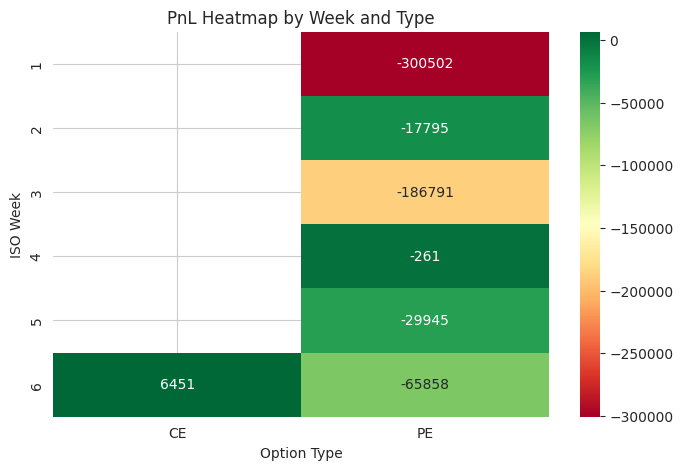

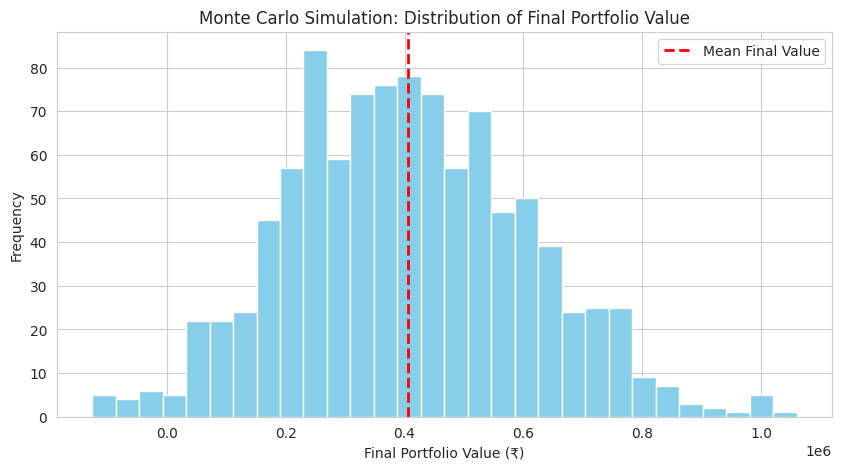

Monte Carlo: Mean Final Value = ₹405,069.76, 5th Percentile = ₹86,565.45, 95th Percentile = ₹746,223.04


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1
TP_PCT = 0.3
SL_PCT = 0.2
BROKERAGE_PER_ORDER = 20
SPREAD_WIDTH = 100  # points between strikes in the spread
VIX_RANK_WINDOW = 30 * 26  # 30 trading days of 26 15-min bars each
TICK_SIZE = 0.05

VIX_PATH = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/Filtered_VIX_Jan_May_2025_1min.csv'

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

def load_vix():
    vix = pd.read_csv(VIX_PATH, parse_dates=['TimeStamp'])
    vix = vix.set_index('TimeStamp')
    if vix.index.tz is None:
        vix.index = pd.to_datetime(vix.index).tz_localize('Asia/Kolkata')
    else:
        vix.index = vix.index.tz_convert('Asia/Kolkata')
    vix = vix.rename(columns={'Close': 'VIX'})
    return vix

# ======================================================================
# UTILS
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def calculate_vix_rank(vix_series, window=VIX_RANK_WINDOW):
    vix_min = vix_series.rolling(window=window, min_periods=1).min()
    vix_max = vix_series.rolling(window=window, min_periods=1).max()
    vix_rank = (vix_series - vix_min) / (vix_max - vix_min)
    vix_rank = vix_rank.fillna(0.5)
    return vix_rank

def in_trading_hours(ts):
    hour = ts.hour
    minute = ts.minute
    if (hour == 9 and minute >= 30) or (10 <= hour < 14) or (hour == 14 and minute <= 35):
        return True
    return False

def get_slippage_ticks(vix_val):
    if vix_val >= 30:
        return 10
    elif vix_val >= 25:
        return 6
    elif vix_val >= 20:
        return 3
    else:
        return 1

def get_adaptive_slippage(vix_val):
    return get_slippage_ticks(vix_val) * TICK_SIZE

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def execute_trades_mixed_15min(
    spot_data, signals, options_data, vix, vix_rank, tp_pct=TP_PCT, sl_pct=SL_PCT,
    brokerage_per_order=BROKERAGE_PER_ORDER, risk_per_trade=risk_per_trade, spread_width=SPREAD_WIDTH
):
    portfolio_cash = initial_capital
    buy_trade_log = []
    sell_trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_15 = signals.reindex(spot_data.index, method='ffill').dropna()
    vix_15 = vix.reindex(spot_data.index, method='ffill')
    vix_rank_15 = vix_rank.reindex(spot_data.index, method='ffill')
    open_buy = None
    open_sell = None

    for ts, row in spot_data.iterrows():
        if ts not in signals_15.index or pd.isna(row['close']) or not in_trading_hours(ts):
            continue
        signal = signals_15.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            continue
        vix_val = vix_15.loc[ts, 'VIX'] if ts in vix_15.index else 20
        vix_r = vix_rank_15.loc[ts] if ts in vix_rank_15.index else 0.5
        slippage_amt = get_adaptive_slippage(vix_val)

        # --- SELL SIDE: Credit Spread (VIX rank >= 0.5) ---
        if open_sell is None and signal != 0 and vix_r >= 0.5:
            if signal == 1:
                # Bullish: Put Credit Spread (Sell ATM PE, Buy lower PE)
                short_strike = get_nearest_strike(available_strikes, atm_strike)
                long_strike = get_nearest_strike(available_strikes, atm_strike - spread_width)
                short_type, long_type = 'PE', 'PE'
            else:
                # Bearish: Call Credit Spread (Sell ATM CE, Buy higher CE)
                short_strike = get_nearest_strike(available_strikes, atm_strike)
                long_strike = get_nearest_strike(available_strikes, atm_strike + spread_width)
                short_type, long_type = 'CE', 'CE'
            # Find premiums
            short_row = options_data[
                (options_data['Strike'] == short_strike) &
                (options_data['Type'] == short_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            long_row = options_data[
                (options_data['Strike'] == long_strike) &
                (options_data['Type'] == long_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if not short_row.empty and not long_row.empty:
                short_price = float(short_row.iloc[0]['Close'])
                long_price = float(long_row.iloc[0]['Close'])
                entry_time = short_row.iloc[0]['TimeStamp']
                net_credit = (short_price - long_price) - slippage_amt
                max_loss = spread_width - net_credit
                margin_required = max_loss * lot_size
                lots = int((portfolio_cash * risk_per_trade) // margin_required)
                if lots >= 1 and net_credit > 0:
                    entry_slippage = (short_price + long_price) * slippage_amt * lot_size * lots
                    total_slippage += entry_slippage
                    total_brokerage += 2 * brokerage_per_order
                    open_sell = {
                        'side': 'sell',
                        'entry_date': ts,
                        'entry_time': entry_time,
                        'action': 'Sell',
                        'short_type': short_type,
                        'long_type': long_type,
                        'short_strike': short_strike,
                        'long_strike': long_strike,
                        'short_price': short_price,
                        'long_price': long_price,
                        'net_credit': net_credit,
                        'lots': lots,
                        'spot': spot_price,
                        'expiry': expiry,
                        'signal': signal,
                        'spread_width': spread_width,
                        'max_loss': max_loss,
                        'entry_slippage': entry_slippage
                    }

        # --- BUY SIDE: Only if VIX rank < 0.5 ---
        if open_buy is None and signal != 0 and vix_r < 0.5:
            if signal == 1:
                strike = get_nearest_strike(available_strikes, atm_strike)
                option_type = 'CE'
            else:
                strike = get_nearest_strike(available_strikes, atm_strike)
                option_type = 'PE'
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if not entry_row.empty:
                entry_price = float(entry_row.iloc[0]['Close'])
                entry_time = entry_row.iloc[0]['TimeStamp']
                lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
                if lots >= 1:
                    tp_price = entry_price * (1 + tp_pct)
                    sl_price = entry_price * (1 - sl_pct)
                    entry_slippage = entry_price * slippage_amt * lot_size * lots
                    total_slippage += entry_slippage
                    total_brokerage += brokerage_per_order
                    entry_price_adj = entry_price + slippage_amt
                    open_buy = {
                        'side': 'buy',
                        'entry_date': ts,
                        'entry_time': entry_time,
                        'action': 'Buy',
                        'type': option_type,
                        'strike': strike,
                        'entry_price': entry_price_adj,
                        'lots': lots,
                        'spot': spot_price,
                        'expiry': expiry,
                        'signal': signal,
                        'tp_price': tp_price,
                        'sl_price': sl_price,
                        'entry_slippage': entry_slippage
                    }

        # --- SELL SIDE EXIT ---
        if open_sell is not None:
            short_rows = options_data[
                (options_data['Strike'] == open_sell['short_strike']) &
                (options_data['Type'] == open_sell['short_type']) &
                (options_data['Expiry'].dt.date == open_sell['expiry']) &
                (options_data['TimeStamp'] >= open_sell['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')
            long_rows = options_data[
                (options_data['Strike'] == open_sell['long_strike']) &
                (options_data['Type'] == open_sell['long_type']) &
                (options_data['Expiry'].dt.date == open_sell['expiry']) &
                (options_data['TimeStamp'] >= open_sell['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')
            exit_reason = None
            exit_short = None
            exit_long = None
            exit_time = None
            for ((_, short_row), (_, long_row)) in zip(short_rows.iterrows(), long_rows.iterrows()):
                spread_now = (short_row['Close'] - long_row['Close'])
                loss_now = open_sell['net_credit'] - spread_now
                if loss_now < -1.5 * open_sell['net_credit']:
                    exit_short = short_row['Close']
                    exit_long = long_row['Close']
                    exit_time = short_row['TimeStamp']
                    exit_reason = 'Stop Loss'
                    break
                if spread_now < 0.2 * open_sell['net_credit']:
                    exit_short = short_row['Close']
                    exit_long = long_row['Close']
                    exit_time = short_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
            if exit_reason is None and ts.date() >= open_sell['expiry']:
                short_iv = max(0, (spot_price - open_sell['short_strike']) if open_sell['short_type'] == 'CE' else (open_sell['short_strike'] - spot_price))
                long_iv = max(0, (spot_price - open_sell['long_strike']) if open_sell['long_type'] == 'CE' else (open_sell['long_strike'] - spot_price))
                exit_short = short_iv
                exit_long = long_iv
                exit_time = ts
                exit_reason = 'Expiry'
            if exit_reason is not None and exit_short is not None and exit_long is not None:
                exit_slippage = (exit_short + exit_long) * slippage_amt * lot_size * open_sell['lots']
                total_slippage += exit_slippage
                total_brokerage += 2 * brokerage_per_order
                net_exit = (exit_short - exit_long) - slippage_amt
                holding_days = (exit_time - open_sell['entry_date']).days
                pnl = (open_sell['net_credit'] - net_exit) * lot_size * open_sell['lots']
                pnl -= (open_sell['entry_slippage'] + exit_slippage + 4 * brokerage_per_order)
                portfolio_cash += pnl
                sell_trade_log.append({
                    'side': 'sell',
                    'entry_date': open_sell['entry_date'],
                    'entry_time': open_sell['entry_time'],
                    'exit_date': exit_time,
                    'action': open_sell['action'],
                    'short_type': open_sell['short_type'],
                    'long_type': open_sell['long_type'],
                    'short_strike': open_sell['short_strike'],
                    'long_strike': open_sell['long_strike'],
                    'entry_net_credit': open_sell['net_credit'],
                    'exit_net_debit': net_exit,
                    'lots': open_sell['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_sell['spot'],
                    'expiry': open_sell['expiry'],
                    'exit_reason': exit_reason
                })
                open_sell = None

        # --- BUY SIDE EXIT ---
        if open_buy is not None:
            option_rows = options_data[
                (options_data['Strike'] == open_buy['strike']) &
                (options_data['Type'] == open_buy['type']) &
                (options_data['Expiry'].dt.date == open_buy['expiry']) &
                (options_data['TimeStamp'] >= open_buy['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')
            exit_reason = None
            exit_price = None
            exit_time = None
            for _, opt_row in option_rows.iterrows():
                if opt_row['High'] >= open_buy['tp_price']:
                    exit_price = open_buy['tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
                elif opt_row['Low'] <= open_buy['sl_price']:
                    exit_price = open_buy['sl_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Stop Loss'
                    break
            if exit_reason is None and ts.date() >= open_buy['expiry']:
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'Expiry'
            if exit_reason is not None and exit_price is not None:
                exit_slippage = exit_price * slippage_amt * lot_size * open_buy['lots']
                total_slippage += exit_slippage
                total_brokerage += brokerage_per_order
                exit_price_adj = exit_price - slippage_amt
                holding_days = (exit_time - open_buy['entry_date']).days
                pnl = (exit_price_adj - open_buy['entry_price']) * lot_size * open_buy['lots']
                pnl -= (open_buy['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                portfolio_cash += pnl
                buy_trade_log.append({
                    'side': 'buy',
                    'entry_date': open_buy['entry_date'],
                    'entry_time': open_buy['entry_time'],
                    'exit_date': exit_time,
                    'action': open_buy['action'],
                    'type': open_buy['type'],
                    'strike': open_buy['strike'],
                    'entry_price': open_buy['entry_price'],
                    'exit_price': exit_price_adj,
                    'lots': open_buy['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_buy['spot'],
                    'expiry': open_buy['expiry'],
                    'exit_reason': exit_reason
                })
                open_buy = None

    return buy_trade_log, sell_trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot().resample('15min').last().dropna()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals().resample('15min').last().dropna()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nLoading VIX data...")
vix = load_vix().resample('15min').last().dropna()
vix_rank = calculate_vix_rank(vix['VIX'])
print("VIX data loaded.")

print("\nExecuting trades every 15min (buy and sell/credit spreads, VIX filter, adaptive slippage)...")
buy_trade_log, sell_trade_log, total_brokerage, total_slippage = execute_trades_mixed_15min(
    spot_data, signals, options_sample, vix, vix_rank
)
buy_trade_log_df = pd.DataFrame(buy_trade_log)
sell_trade_log_df = pd.DataFrame(sell_trade_log)
if not buy_trade_log_df.empty:
    buy_trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_15min_buy_ALL_EXPIRIES.csv', index=False)
    print("\nBuy-side trade log saved to Jan_Feb_detailed_trade_log_15min_buy_ALL_EXPIRIES.csv")
    print(buy_trade_log_df.head(10))
if not sell_trade_log_df.empty:
    sell_trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_15min_sell_ALL_EXPIRIES.csv', index=False)
    print("\nSell-side trade log saved to Jan_Feb_detailed_trade_log_15min_sell_ALL_EXPIRIES.csv")
    print(sell_trade_log_df.head(10))
if buy_trade_log_df.empty and sell_trade_log_df.empty:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
# (You can use your existing reporting/visualization code, analyzing buy and sell logs separately or together.)

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}
Total Brokerage:    ₹{total_brokerage:,.2f}
Total Slippage:     ₹{total_slippage:,.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()

    # --- PnL Heatmap by Week and Type ---
    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    # --- Monte Carlo Simulation ---
    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading options sample...

Options sample loaded.

Loading VIX data...
VIX data loaded.

Executing multi-timeframe strategy (buy and sell/credit spreads, VIX filter, adaptive slippage)...
Opening trend: sideways

Buy-side trade log saved to Jan_Feb_detailed_trade_log_buy_ALL_EXPIRIES.csv
  side                entry_date                entry_time  \
0  buy 2025-01-01 10:30:00+05:30 2025-01-01 10:30:00+05:30   
1  buy 2025-01-01 13:45:00+05:30 2025-01-01 13:45:00+05:30   
2  buy 2025-01-01 14:15:00+05:30 2025-01-01 14:15:00+05:30   
3  buy 2025-01-02 09:45:00+05:30 2025-01-02 09:45:00+05:30   
4  buy 2025-01-02 10:00:00+05:30 2025-01-02 10:00:00+05:30   
5  buy 2025-01-02 10:15:00+05:30 2025-01-02 10:15:00+05:30   
6  buy 2025-01-02 10:30:00+05:30 2025-01-02 10:30:00+05:30   
7  buy 2025-01-02 10:45:00+05:30 202

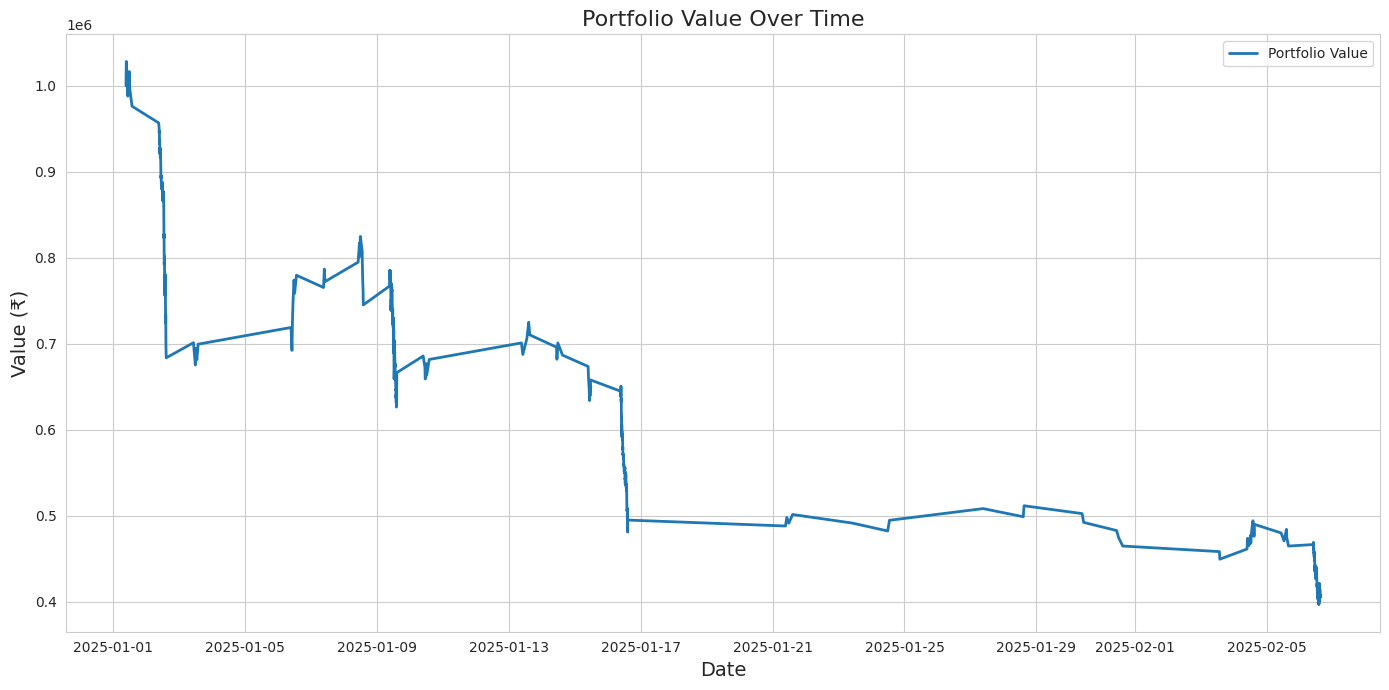

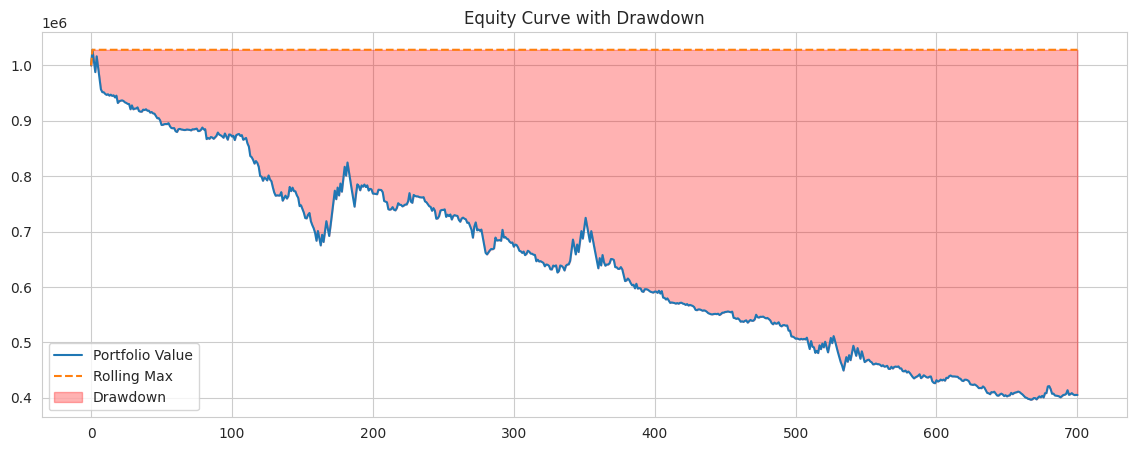

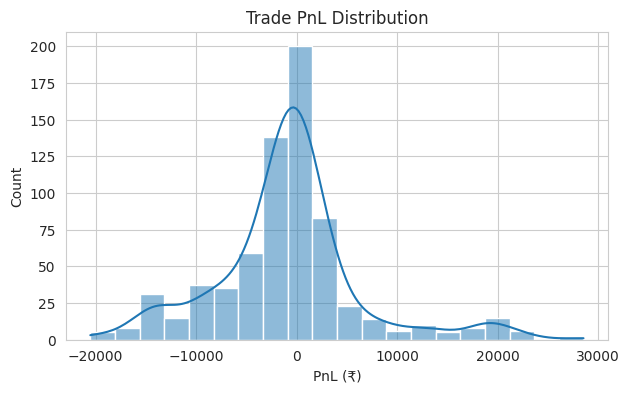

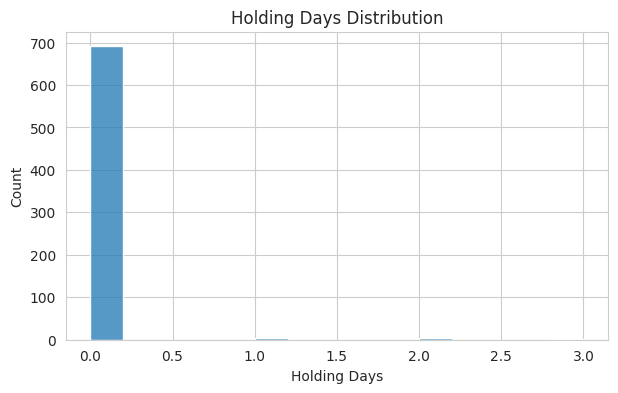

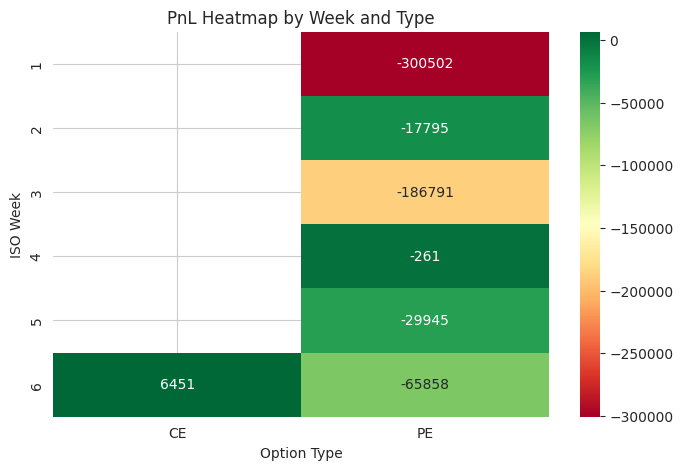

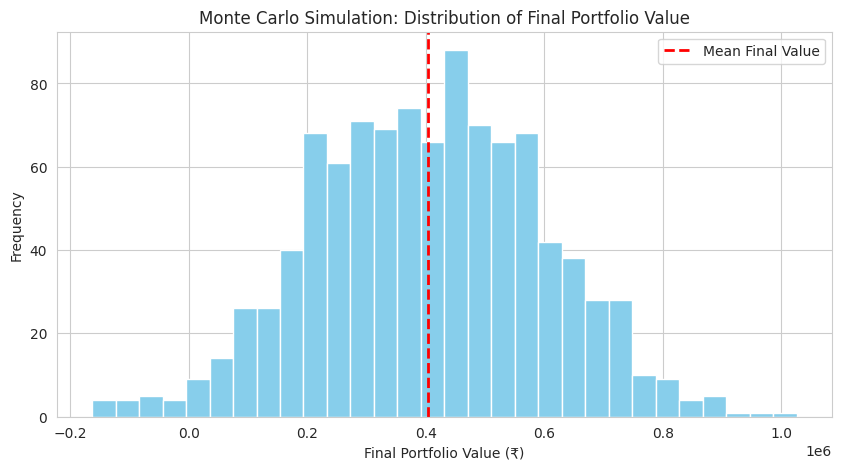

Monte Carlo: Mean Final Value = ₹403,562.38, 5th Percentile = ₹90,484.92, 95th Percentile = ₹716,671.81


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1
TP_PCT = 0.3
SL_PCT = 0.2
BROKERAGE_PER_ORDER = 20
SPREAD_WIDTH = 100
TICK_SIZE = 0.05
VIX_RANK_WINDOW = 30 * 26  # 30 trading days of 26 15-min bars each

VIX_PATH = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/Filtered_VIX_Jan_May_2025_1min.csv'

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

def load_vix():
    vix = pd.read_csv(VIX_PATH, parse_dates=['TimeStamp'])
    vix = vix.set_index('TimeStamp')
    if vix.index.tz is None:
        vix.index = pd.to_datetime(vix.index).tz_localize('Asia/Kolkata')
    else:
        vix.index = vix.index.tz_convert('Asia/Kolkata')
    vix = vix.rename(columns={'Close': 'VIX'})
    return vix

# ======================================================================
# UTILS
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def calculate_vix_rank(vix_series, window=VIX_RANK_WINDOW):
    vix_min = vix_series.rolling(window=window, min_periods=1).min()
    vix_max = vix_series.rolling(window=window, min_periods=1).max()
    vix_rank = (vix_series - vix_min) / (vix_max - vix_min)
    vix_rank = vix_rank.fillna(0.5)
    return vix_rank

def in_trading_hours(ts):
    hour = ts.hour
    minute = ts.minute
    if (hour == 9 and minute >= 30) or (10 <= hour < 14) or (hour == 14 and minute <= 35):
        return True
    return False

def get_slippage_ticks(vix_val):
    if vix_val >= 30:
        return 10
    elif vix_val >= 25:
        return 6
    elif vix_val >= 20:
        return 3
    else:
        return 1

def get_adaptive_slippage(vix_val):
    return get_slippage_ticks(vix_val) * TICK_SIZE

def detect_opening_trend(spot_5min):
    # Golden cross on 5-min bars between 9:30 and 10:30
    spot_5min['fast'] = spot_5min['close'].rolling(21).mean()
    spot_5min['slow'] = spot_5min['close'].rolling(22).mean()
    cross = spot_5min['fast'] > spot_5min['slow']
    # If >70% of bars have golden cross, call it "strong up", <30% "strong down", else "sideways"
    up = cross.sum() / len(cross)
    if up > 0.7:
        return "strong_up"
    elif up < 0.3:
        return "strong_down"
    else:
        return "sideways"

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def execute_trades_multi_tf(
    spot_data, options_data, vix, vix_rank, tp_pct=TP_PCT, sl_pct=SL_PCT,
    brokerage_per_order=BROKERAGE_PER_ORDER, risk_per_trade=risk_per_trade, spread_width=SPREAD_WIDTH
):
    portfolio_cash = initial_capital
    buy_trade_log = []
    sell_trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())

    # 1. Opening Range (9:30–10:30, 5-min)
    spot_5min = spot_data.between_time('09:30', '10:30').resample('5min').last().dropna()
    opening_trend = detect_opening_trend(spot_5min)
    print("Opening trend:", opening_trend)

    # 2. Set buy-side timeframe based on opening range
    if opening_trend in ["strong_up", "strong_down"]:
        buy_tf = '5min'
    else:
        buy_tf = '15min'

    # 3. Resample all data to 15min for sell-side, and to buy_tf for buy-side
    spot_15 = spot_data.resample('15min').last().dropna()
    vix_15 = vix.resample('15min').last().dropna()
    vix_rank_15 = vix_rank.reindex(vix_15.index, method='ffill')
    spot_buy = spot_data.resample(buy_tf).last().dropna()
    vix_buy = vix.reindex(spot_buy.index, method='ffill')
    vix_rank_buy = vix_rank.reindex(spot_buy.index, method='ffill')

    open_buy = None
    open_sell = None

    for ts, row in spot_15.iterrows():
        if not in_trading_hours(ts):
            continue
        # --- SELL SIDE: Credit Spread (VIX rank >= 0.5) ---
        vix_val = vix_15.loc[ts, 'VIX'] if ts in vix_15.index else 20
        vix_r = vix_rank_15.loc[ts] if ts in vix_rank_15.index else 0.5
        slippage_amt = get_adaptive_slippage(vix_val)
        # Use golden cross on 15min for signal
        spot_15['fast'] = spot_15['close'].rolling(21).mean()
        spot_15['slow'] = spot_15['close'].rolling(22).mean()
        signal = 1 if spot_15.loc[ts, 'fast'] > spot_15.loc[ts, 'slow'] else -1
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            continue

        if open_sell is None and vix_r >= 0.5:
            if signal == 1:
                short_strike = get_nearest_strike(available_strikes, atm_strike)
                long_strike = get_nearest_strike(available_strikes, atm_strike - spread_width)
                short_type, long_type = 'PE', 'PE'
            else:
                short_strike = get_nearest_strike(available_strikes, atm_strike)
                long_strike = get_nearest_strike(available_strikes, atm_strike + spread_width)
                short_type, long_type = 'CE', 'CE'
            short_row = options_data[
                (options_data['Strike'] == short_strike) &
                (options_data['Type'] == short_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            long_row = options_data[
                (options_data['Strike'] == long_strike) &
                (options_data['Type'] == long_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if not short_row.empty and not long_row.empty:
                short_price = float(short_row.iloc[0]['Close'])
                long_price = float(long_row.iloc[0]['Close'])
                entry_time = short_row.iloc[0]['TimeStamp']
                net_credit = (short_price - long_price) - slippage_amt
                max_loss = spread_width - net_credit
                margin_required = max_loss * lot_size
                lots = int((portfolio_cash * risk_per_trade) // margin_required)
                if lots >= 1 and net_credit > 0:
                    entry_slippage = (short_price + long_price) * slippage_amt * lot_size * lots
                    total_slippage += entry_slippage
                    total_brokerage += 2 * brokerage_per_order
                    open_sell = {
                        'side': 'sell',
                        'entry_date': ts,
                        'entry_time': entry_time,
                        'action': 'Sell',
                        'short_type': short_type,
                        'long_type': long_type,
                        'short_strike': short_strike,
                        'long_strike': long_strike,
                        'short_price': short_price,
                        'long_price': long_price,
                        'net_credit': net_credit,
                        'lots': lots,
                        'spot': spot_price,
                        'expiry': expiry,
                        'signal': signal,
                        'spread_width': spread_width,
                        'max_loss': max_loss,
                        'entry_slippage': entry_slippage
                    }

        # --- SELL SIDE EXIT ---
        if open_sell is not None:
            short_rows = options_data[
                (options_data['Strike'] == open_sell['short_strike']) &
                (options_data['Type'] == open_sell['short_type']) &
                (options_data['Expiry'].dt.date == open_sell['expiry']) &
                (options_data['TimeStamp'] >= open_sell['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')
            long_rows = options_data[
                (options_data['Strike'] == open_sell['long_strike']) &
                (options_data['Type'] == open_sell['long_type']) &
                (options_data['Expiry'].dt.date == open_sell['expiry']) &
                (options_data['TimeStamp'] >= open_sell['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')
            exit_reason = None
            exit_short = None
            exit_long = None
            exit_time = None
            for ((_, short_row), (_, long_row)) in zip(short_rows.iterrows(), long_rows.iterrows()):
                spread_now = (short_row['Close'] - long_row['Close'])
                loss_now = open_sell['net_credit'] - spread_now
                if loss_now < -1.5 * open_sell['net_credit']:
                    exit_short = short_row['Close']
                    exit_long = long_row['Close']
                    exit_time = short_row['TimeStamp']
                    exit_reason = 'Stop Loss'
                    break
                if spread_now < 0.2 * open_sell['net_credit']:
                    exit_short = short_row['Close']
                    exit_long = long_row['Close']
                    exit_time = short_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
            if exit_reason is None and ts.date() >= open_sell['expiry']:
                short_iv = max(0, (spot_price - open_sell['short_strike']) if open_sell['short_type'] == 'CE' else (open_sell['short_strike'] - spot_price))
                long_iv = max(0, (spot_price - open_sell['long_strike']) if open_sell['long_type'] == 'CE' else (open_sell['long_strike'] - spot_price))
                exit_short = short_iv
                exit_long = long_iv
                exit_time = ts
                exit_reason = 'Expiry'
            if exit_reason is not None and exit_short is not None and exit_long is not None:
                exit_slippage = (exit_short + exit_long) * slippage_amt * lot_size * open_sell['lots']
                total_slippage += exit_slippage
                total_brokerage += 2 * brokerage_per_order
                net_exit = (exit_short - exit_long) - slippage_amt
                holding_days = (exit_time - open_sell['entry_date']).days
                pnl = (open_sell['net_credit'] - net_exit) * lot_size * open_sell['lots']
                pnl -= (open_sell['entry_slippage'] + exit_slippage + 4 * brokerage_per_order)
                portfolio_cash += pnl
                sell_trade_log.append({
                    'side': 'sell',
                    'entry_date': open_sell['entry_date'],
                    'entry_time': open_sell['entry_time'],
                    'exit_date': exit_time,
                    'action': open_sell['action'],
                    'short_type': open_sell['short_type'],
                    'long_type': open_sell['long_type'],
                    'short_strike': open_sell['short_strike'],
                    'long_strike': open_sell['long_strike'],
                    'entry_net_credit': open_sell['net_credit'],
                    'exit_net_debit': net_exit,
                    'lots': open_sell['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_sell['spot'],
                    'expiry': open_sell['expiry'],
                    'exit_reason': exit_reason
                })
                open_sell = None

    # --- BUY SIDE LOOP (on buy_tf bars) ---
    for ts, row in spot_buy.iterrows():
        if not in_trading_hours(ts):
            continue
        vix_val = vix_buy.loc[ts, 'VIX'] if ts in vix_buy.index else 20
        vix_r = vix_rank_buy.loc[ts] if ts in vix_rank_buy.index else 0.5
        slippage_amt = get_adaptive_slippage(vix_val)
        # Golden cross on buy_tf
        spot_buy['fast'] = spot_buy['close'].rolling(21).mean()
        spot_buy['slow'] = spot_buy['close'].rolling(22).mean()
        signal = 1 if spot_buy.loc[ts, 'fast'] > spot_buy.loc[ts, 'slow'] else -1
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            continue

        if open_buy is None and vix_r < 0.5:
            if signal == 1:
                strike = get_nearest_strike(available_strikes, atm_strike)
                option_type = 'CE'
            else:
                strike = get_nearest_strike(available_strikes, atm_strike)
                option_type = 'PE'
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if not entry_row.empty:
                entry_price = float(entry_row.iloc[0]['Close'])
                entry_time = entry_row.iloc[0]['TimeStamp']
                lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
                if lots >= 1:
                    tp_price = entry_price * (1 + tp_pct)
                    sl_price = entry_price * (1 - sl_pct)
                    entry_slippage = entry_price * slippage_amt * lot_size * lots
                    total_slippage += entry_slippage
                    total_brokerage += brokerage_per_order
                    entry_price_adj = entry_price + slippage_amt
                    open_buy = {
                        'side': 'buy',
                        'entry_date': ts,
                        'entry_time': entry_time,
                        'action': 'Buy',
                        'type': option_type,
                        'strike': strike,
                        'entry_price': entry_price_adj,
                        'lots': lots,
                        'spot': spot_price,
                        'expiry': expiry,
                        'signal': signal,
                        'tp_price': tp_price,
                        'sl_price': sl_price,
                        'entry_slippage': entry_slippage
                    }

        # --- BUY SIDE EXIT ---
        if open_buy is not None:
            option_rows = options_data[
                (options_data['Strike'] == open_buy['strike']) &
                (options_data['Type'] == open_buy['type']) &
                (options_data['Expiry'].dt.date == open_buy['expiry']) &
                (options_data['TimeStamp'] >= open_buy['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')
            exit_reason = None
            exit_price = None
            exit_time = None
            for _, opt_row in option_rows.iterrows():
                if opt_row['High'] >= open_buy['tp_price']:
                    exit_price = open_buy['tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
                elif opt_row['Low'] <= open_buy['sl_price']:
                    exit_price = open_buy['sl_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Stop Loss'
                    break
            if exit_reason is None and ts.date() >= open_buy['expiry']:
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'Expiry'
            if exit_reason is not None and exit_price is not None:
                exit_slippage = exit_price * slippage_amt * lot_size * open_buy['lots']
                total_slippage += exit_slippage
                total_brokerage += brokerage_per_order
                exit_price_adj = exit_price - slippage_amt
                holding_days = (exit_time - open_buy['entry_date']).days
                pnl = (exit_price_adj - open_buy['entry_price']) * lot_size * open_buy['lots']
                pnl -= (open_buy['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                portfolio_cash += pnl
                buy_trade_log.append({
                    'side': 'buy',
                    'entry_date': open_buy['entry_date'],
                    'entry_time': open_buy['entry_time'],
                    'exit_date': exit_time,
                    'action': open_buy['action'],
                    'type': open_buy['type'],
                    'strike': open_buy['strike'],
                    'entry_price': open_buy['entry_price'],
                    'exit_price': exit_price_adj,
                    'lots': open_buy['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_buy['spot'],
                    'expiry': open_buy['expiry'],
                    'exit_reason': exit_reason
                })
                open_buy = None

    return buy_trade_log, sell_trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nLoading VIX data...")
vix = load_vix()
vix_rank = calculate_vix_rank(vix['VIX'])
print("VIX data loaded.")

print("\nExecuting multi-timeframe strategy (buy and sell/credit spreads, VIX filter, adaptive slippage)...")
buy_trade_log, sell_trade_log, total_brokerage, total_slippage = execute_trades_multi_tf(
    spot_data, options_sample, vix, vix_rank
)
buy_trade_log_df = pd.DataFrame(buy_trade_log)
sell_trade_log_df = pd.DataFrame(sell_trade_log)
if not buy_trade_log_df.empty:
    buy_trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_buy_ALL_EXPIRIES.csv', index=False)
    print("\nBuy-side trade log saved to Jan_Feb_detailed_trade_log_buy_ALL_EXPIRIES.csv")
    print(buy_trade_log_df.head(10))
if not sell_trade_log_df.empty:
    sell_trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_sell_ALL_EXPIRIES.csv', index=False)
    print("\nSell-side trade log saved to Jan_Feb_detailed_trade_log_sell_ALL_EXPIRIES.csv")
    print(sell_trade_log_df.head(10))
if buy_trade_log_df.empty and sell_trade_log_df.empty:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
# (You can use your existing reporting/visualization code, analyzing buy and sell logs separately or together.)
# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}
Total Brokerage:    ₹{total_brokerage:,.2f}
Total Slippage:     ₹{total_slippage:,.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()

    # --- PnL Heatmap by Week and Type ---
    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    # --- Monte Carlo Simulation ---
    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample loaded.

Executing trades minute by minute with rolling expiry, take profit, stop loss, brokerage, and slippage...

Detailed trade log saved to Jan_Feb_detailed_trade_log_minute_tp_sl_ALL_EXPIRIES.csv
                 entry_date                entry_time  \
0 2025-01-01 09:15:00+05:30 2025-01-01 09:15:00+05:30   
1 2025-01-01 10:49:00+05:30 2025-01-01 10:49:00+05:30   
2 2025-01-01 13:53:00+05:30 2025-01-01 13:53:00+05:30   
3 2025-01-02 09:16:00+05:30 2025-01-02 09:16:00+05:30   
4 2025-01-02 09:18:00+05:30 2025-01-02 09:18:00+05:30   
5 2025-01-02 09:20:00+05:30 2025-01-02 09:20:00+05:30   
6 2025-01-02 09:22:00+05:30 2025-01-02 09:22:00+05:30   
7 2025-01-02 09:24:00+05:30 2025-01-02 09:24:00+05:30   
8 2025-01-02 09:26:00+

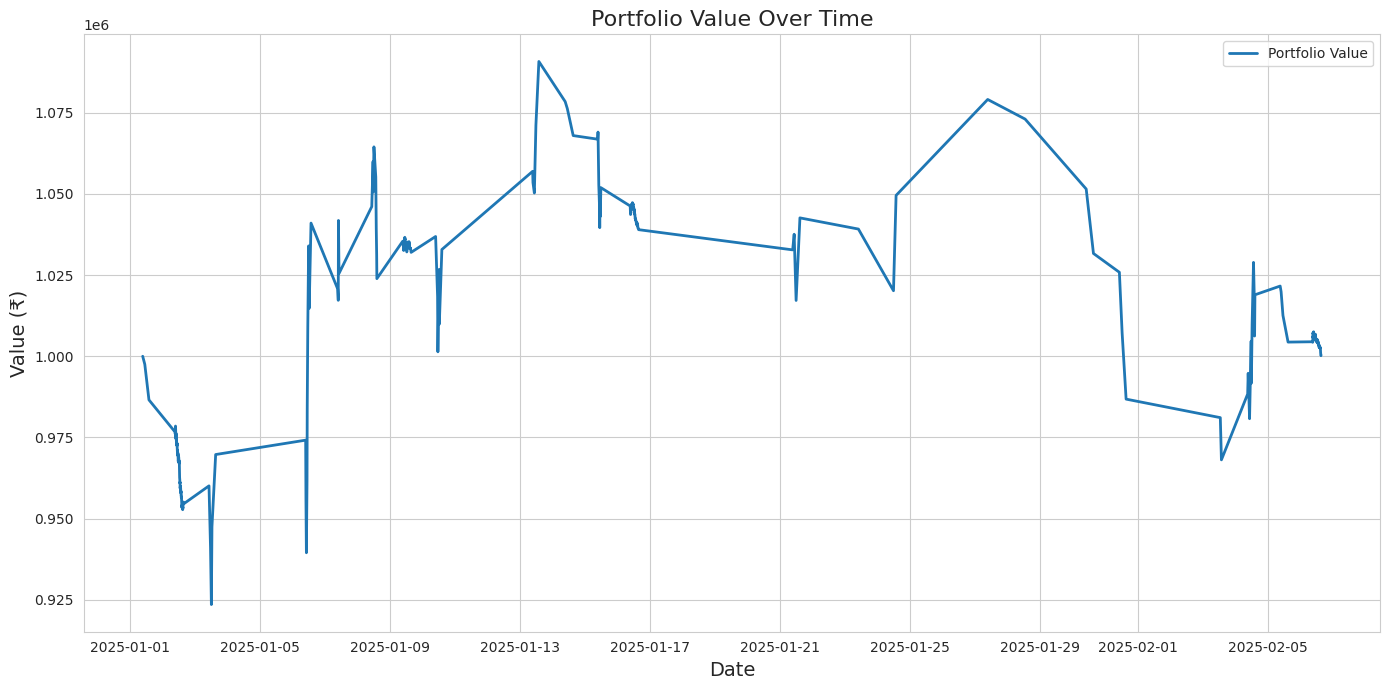

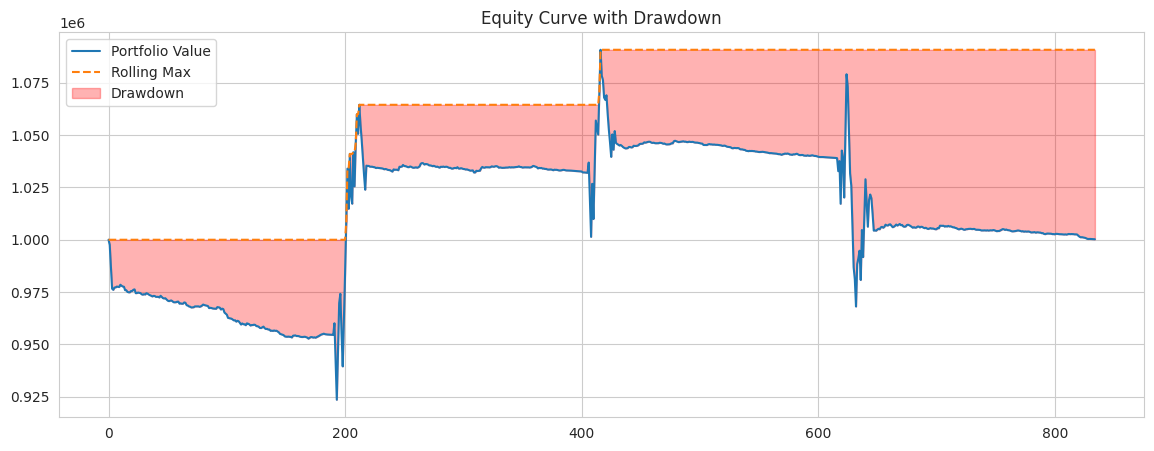

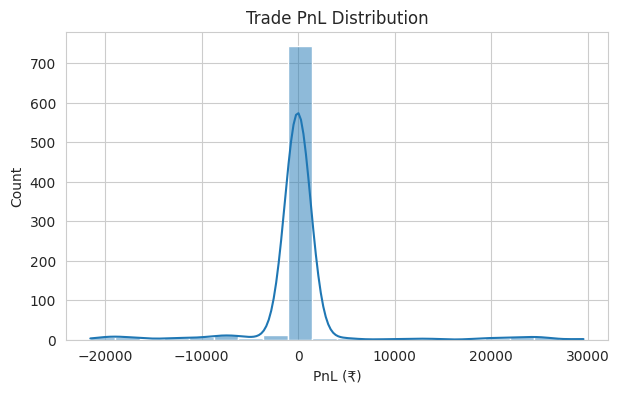

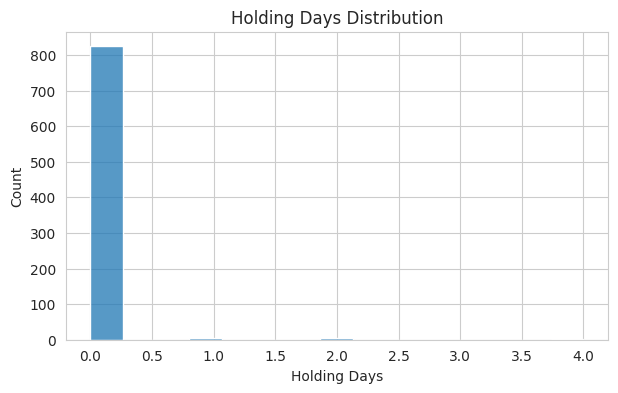

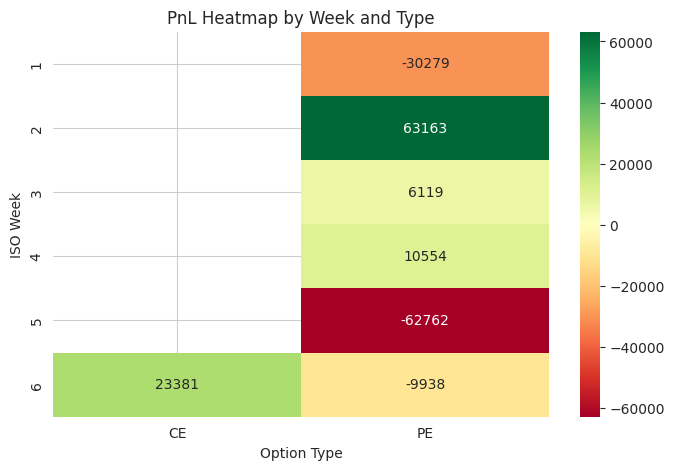

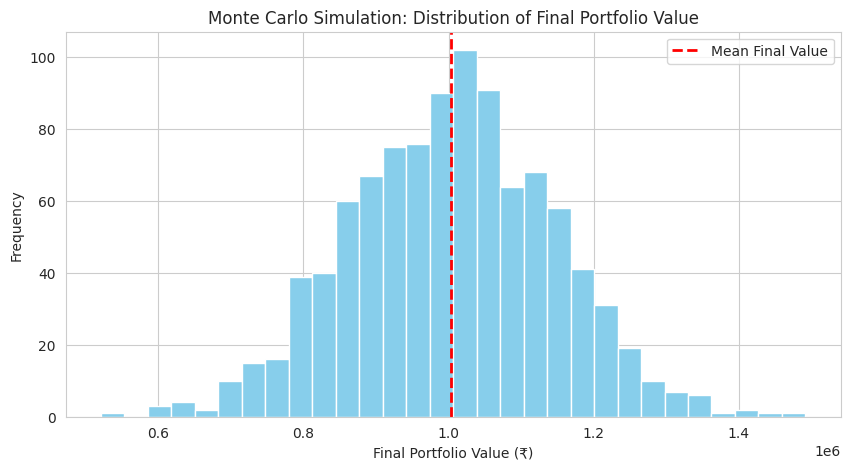

Monte Carlo: Mean Final Value = ₹1,003,524.87, 5th Percentile = ₹777,071.15, 95th Percentile = ₹1,224,732.63


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # Default 10% per trade
TP_PCT = 0.3
SL_PCT = 0.2
BROKERAGE_PER_ORDER = 20
SLIPPAGE_PCT = 0.001

REDUCED_RISK = 0.03  # 3% risk on expiry/pre/post
MAX_LOTS_REDUCED = 2  # Max 2 lots on expiry/pre/post
MAX_LOTS_DEFAULT = 10 # Default max lots elsewhere

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def is_expiry_day(ts, expiry_list):
    return ts.date() in expiry_list

def is_pre_post_market(ts):
    hour, minute = ts.hour, ts.minute
    return (hour == 9 and minute < 30) or (hour == 14 and minute > 35) or (hour < 9) or (hour > 14)

def execute_trades_minute_tp_sl(
    spot_data, signals, options_data, tp_pct=TP_PCT, sl_pct=SL_PCT,
    brokerage_per_order=BROKERAGE_PER_ORDER, slippage_pct=SLIPPAGE_PCT,
    base_risk_per_trade=risk_per_trade, base_max_lots=MAX_LOTS_DEFAULT
):
    portfolio_cash = initial_capital
    trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_min = signals.reindex(spot_data.index, method='ffill').dropna()
    open_position = None

    for ts, row in spot_data.iterrows():
        if ts not in signals_min.index or pd.isna(row['close']):
            continue
        signal = signals_min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            continue

        # --- ADAPTIVE RISK CONTROL ---
        risk_this_trade = base_risk_per_trade
        max_lots = base_max_lots
        if is_expiry_day(ts, expiry_list) or is_pre_post_market(ts):
            risk_this_trade = min(risk_this_trade, REDUCED_RISK)
            max_lots = MAX_LOTS_REDUCED

        if open_position is None and signal != 0:
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_this_trade) // (entry_price * lot_size))
            lots = min(lots, max_lots)
            if lots < 1:
                continue
            tp_price = entry_price * (1 + tp_pct)
            sl_price = entry_price * (1 - sl_pct)
            entry_slippage = entry_price * slippage_pct * lot_size * lots
            total_slippage += entry_slippage
            total_brokerage += brokerage_per_order
            entry_price_adj = entry_price + entry_price * slippage_pct
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price_adj,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'tp_price': tp_price,
                'sl_price': sl_price,
                'entry_slippage': entry_slippage
            }
            continue

        if open_position is not None:
            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['Expiry'].dt.date == open_position['expiry']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')

            exit_reason = None
            exit_price = None
            exit_time = None

            for _, opt_row in option_rows.iterrows():
                if opt_row['High'] >= open_position['tp_price']:
                    exit_price = open_position['tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
                elif opt_row['Low'] <= open_position['sl_price']:
                    exit_price = open_position['sl_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Stop Loss'
                    break

            if exit_reason is None and ts.date() >= open_position['expiry']:
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'Expiry'

            if exit_reason is not None and exit_price is not None:
                exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                total_slippage += exit_slippage
                total_brokerage += brokerage_per_order
                exit_price_adj = exit_price - exit_price * slippage_pct
                holding_days = (exit_time - open_position['entry_date']).days
                pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price_adj,
                    'lots': open_position['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason
                })
                open_position = None

    return trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nExecuting trades minute by minute with rolling expiry, take profit, stop loss, brokerage, and slippage...")
trade_log, total_brokerage, total_slippage = execute_trades_minute_tp_sl(
    spot_data, signals, options_sample
)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_minute_tp_sl_ALL_EXPIRIES.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_minute_tp_sl_ALL_EXPIRIES.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}
Total Brokerage:    ₹{total_brokerage:,.2f}
Total Slippage:     ₹{total_slippage:,.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()

    # --- PnL Heatmap by Week and Type ---
    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    # --- Monte Carlo Simulation ---
    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample loaded.

Loading VIX data...
VIX data loaded.

Resampling spot and signals to 5min and filtering expiry days...

Executing 5min VIX-adaptive strategy, no expiry day buying, tight TP/SL for small wins...

Detailed trade log saved to Jan_Feb_detailed_trade_log_5min_vix_adaptive.csv
                 entry_date                entry_time  \
0 2025-01-01 09:15:00+05:30 2025-01-01 09:15:00+05:30   
1 2025-01-01 12:00:00+05:30 2025-01-01 12:00:00+05:30   
2 2025-01-01 13:35:00+05:30 2025-01-01 13:35:00+05:30   
3 2025-01-01 13:45:00+05:30 2025-01-01 13:45:00+05:30   
4 2025-01-01 14:00:00+05:30 2025-01-01 14:00:00+05:30   
5 2025-01-01 14:25:00+05:30 2025-01-01 14:25:00+05:30   
6 2025-01-01 14:45:00+05:30 2025-01-01 14:45:00+05:30   

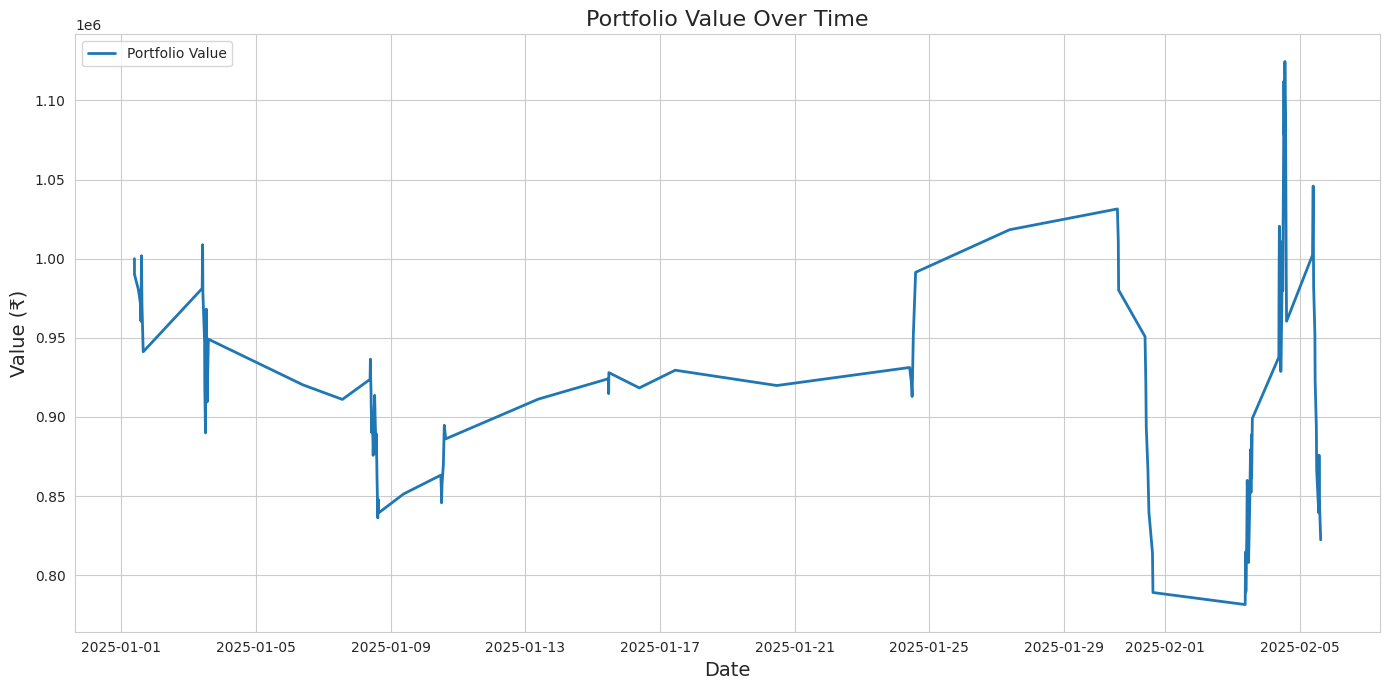

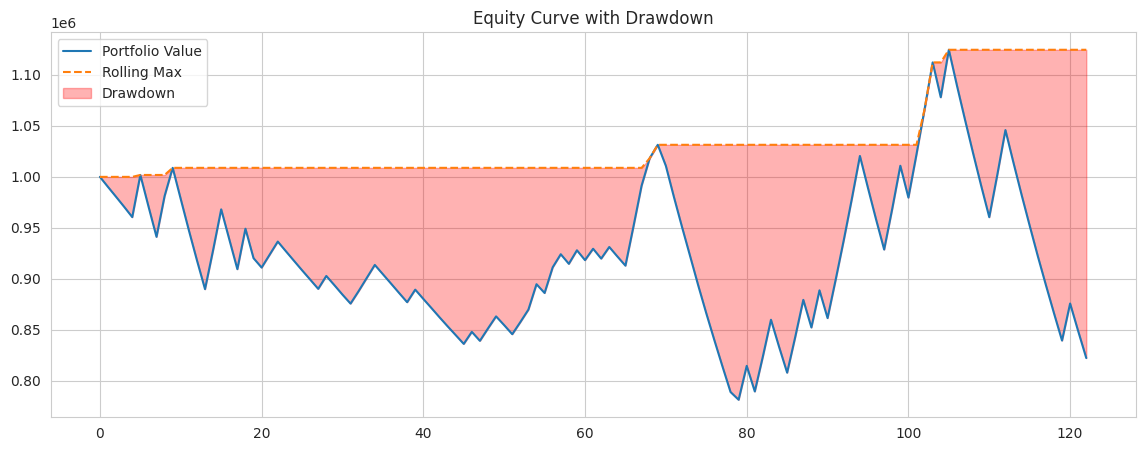

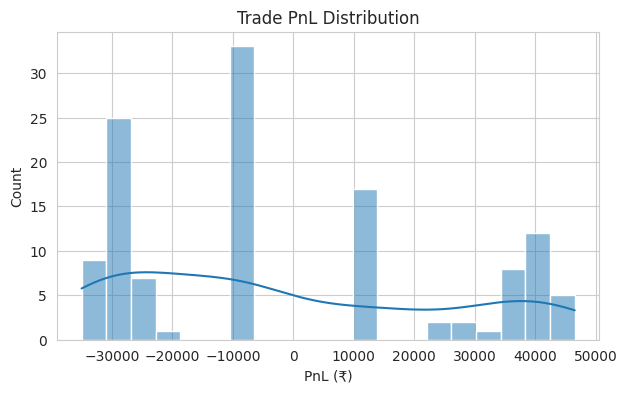

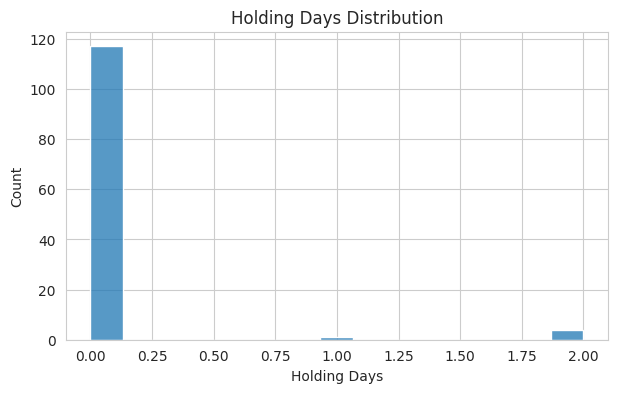

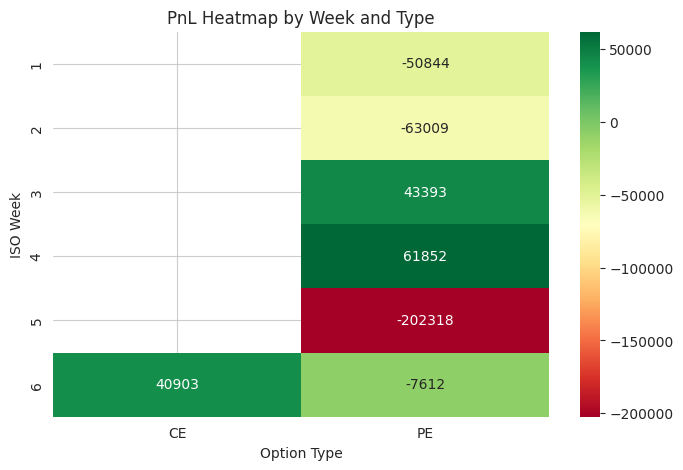

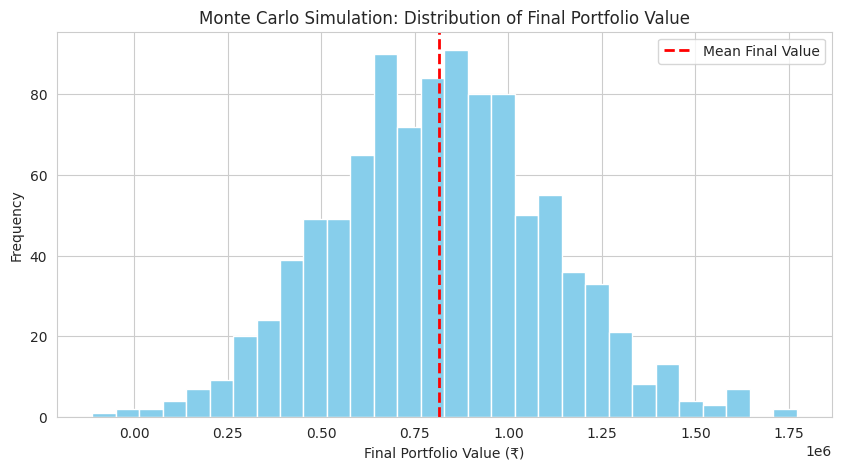

Monte Carlo: Mean Final Value = ₹815,173.27, 5th Percentile = ₹347,785.27, 95th Percentile = ₹1,294,708.58


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
TP_PCT = 0.15   # 15% take profit for more frequent small wins
SL_PCT = 0.10   # 10% stop loss for tighter risk control
BROKERAGE_PER_ORDER = 20
SLIPPAGE_PCT = 0.001

VIX_PATH = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/Filtered_VIX_Jan_May_2025_1min.csv'
VIX_RANK_WINDOW = 21 * 12  # 21 trading days of 12 5-min bars each

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

def load_vix():
    vix = pd.read_csv(VIX_PATH, parse_dates=['TimeStamp'])
    vix = vix.set_index('TimeStamp')
    if vix.index.tz is None:
        vix.index = pd.to_datetime(vix.index).tz_localize('Asia/Kolkata')
    else:
        vix.index = vix.index.tz_convert('Asia/Kolkata')
    vix = vix.rename(columns={'Close': 'VIX'})
    return vix

# ======================================================================
# VIX RANK CALCULATION
# ======================================================================
def calculate_vix_rank(vix_series, window=VIX_RANK_WINDOW):
    vix_min = vix_series.rolling(window=window, min_periods=1).min()
    vix_max = vix_series.rolling(window=window, min_periods=1).max()
    vix_rank = (vix_series - vix_min) / (vix_max - vix_min)
    vix_rank = vix_rank.fillna(0.5)
    return vix_rank

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def is_expiry_day(ts, expiry_list):
    return ts.date() in expiry_list

def execute_trades_5min_vix_adaptive(
    spot_data, signals, options_data, vix_5min, vix_rank_5min,
    tp_pct=TP_PCT, sl_pct=SL_PCT,
    brokerage_per_order=BROKERAGE_PER_ORDER, slippage_pct=SLIPPAGE_PCT
):
    portfolio_cash = initial_capital
    trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_5min = signals.reindex(spot_data.index, method='ffill').dropna()
    open_position = None

    for ts, row in spot_data.iterrows():
        if ts not in signals_5min.index or pd.isna(row['close']):
            continue

        # --- Expiry Day Filter ---
        if is_expiry_day(ts, expiry_list):
            continue

        # --- VIX Rank Adaptive Risk ---
        vix_val = vix_5min.loc[ts, 'VIX'] if ts in vix_5min.index else 15
        vix_r = vix_rank_5min.loc[ts] if ts in vix_rank_5min.index else 0.5
        if vix_r > 0.5:
            continue  # No trades in high volatility regime

        if vix_r < 0.2:
            risk_this_trade = 0.3  # 30%
        elif vix_r < 0.3:
            risk_this_trade = 0.2  # 20%
        else:
            risk_this_trade = 0.1  # 10%

        signal = signals_5min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            continue

        # --- Entry Logic ---
        if open_position is None and signal != 0:
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_this_trade) // (entry_price * lot_size))
            if lots < 1:
                continue
            tp_price = entry_price * (1 + tp_pct)
            sl_price = entry_price * (1 - sl_pct)
            entry_slippage = entry_price * slippage_pct * lot_size * lots
            total_slippage += entry_slippage
            total_brokerage += brokerage_per_order
            entry_price_adj = entry_price + entry_price * slippage_pct
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price_adj,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'tp_price': tp_price,
                'sl_price': sl_price,
                'entry_slippage': entry_slippage
            }
            continue

        # --- Exit Logic ---
        if open_position is not None:
            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['Expiry'].dt.date == open_position['expiry']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')

            exit_reason = None
            exit_price = None
            exit_time = None

            for _, opt_row in option_rows.iterrows():
                if opt_row['High'] >= open_position['tp_price']:
                    exit_price = open_position['tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
                elif opt_row['Low'] <= open_position['sl_price']:
                    exit_price = open_position['sl_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Stop Loss'
                    break

            if exit_reason is None and ts.date() >= open_position['expiry']:
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'Expiry'

            if exit_reason is not None and exit_price is not None:
                exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                total_slippage += exit_slippage
                total_brokerage += brokerage_per_order
                exit_price_adj = exit_price - exit_price * slippage_pct
                holding_days = (exit_time - open_position['entry_date']).days
                pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price_adj,
                    'lots': open_position['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason
                })
                open_position = None

    return trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nLoading VIX data...")
vix = load_vix()
vix_5min = vix.resample('5min').last().dropna()
vix_rank_5min = calculate_vix_rank(vix_5min['VIX'])
print("VIX data loaded.")

print("\nResampling spot and signals to 5min and filtering expiry days...")
spot_5min = spot_data.resample('5min').last().dropna()
signals_5min = signals.reindex(spot_5min.index, method='ffill').dropna()

print("\nExecuting 5min VIX-adaptive strategy, no expiry day buying, tight TP/SL for small wins...")
trade_log, total_brokerage, total_slippage = execute_trades_5min_vix_adaptive(
    spot_5min, signals_5min, options_sample, vix_5min, vix_rank_5min
)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_5min_vix_adaptive.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_5min_vix_adaptive.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}
Total Brokerage:    ₹{total_brokerage:,.2f}
Total Slippage:     ₹{total_slippage:,.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()

    # --- PnL Heatmap by Week and Type ---
    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    # --- Monte Carlo Simulation ---
    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading signals...
Signals shape: (38, 1)

Loading options sample...

Options sample loaded.

Loading VIX data...
VIX data loaded.

Resampling spot and signals to 5min and filtering expiry days...

Executing 5min VIX-adaptive strategy, no expiry day buying, TP 30%, SL 10%, daily loss limit...

Detailed trade log saved to Jan_Feb_detailed_trade_log_5min_vix_adaptive.csv
                 entry_date                entry_time  \
0 2025-01-01 09:15:00+05:30 2025-01-01 09:15:00+05:30   
1 2025-01-01 12:00:00+05:30 2025-01-01 12:00:00+05:30   
2 2025-01-01 13:35:00+05:30 2025-01-01 13:35:00+05:30   
3 2025-01-01 13:45:00+05:30 2025-01-01 13:45:00+05:30   
4 2025-01-03 09:15:00+05:30 2025-01-03 09:15:00+05:30   
5 2025-01-03 09:25:00+05:30 2025-01-03 09:25:00+05:30   
6 2025-01-03 10:45:00+05:30 2025-01-03 10:45:00+05

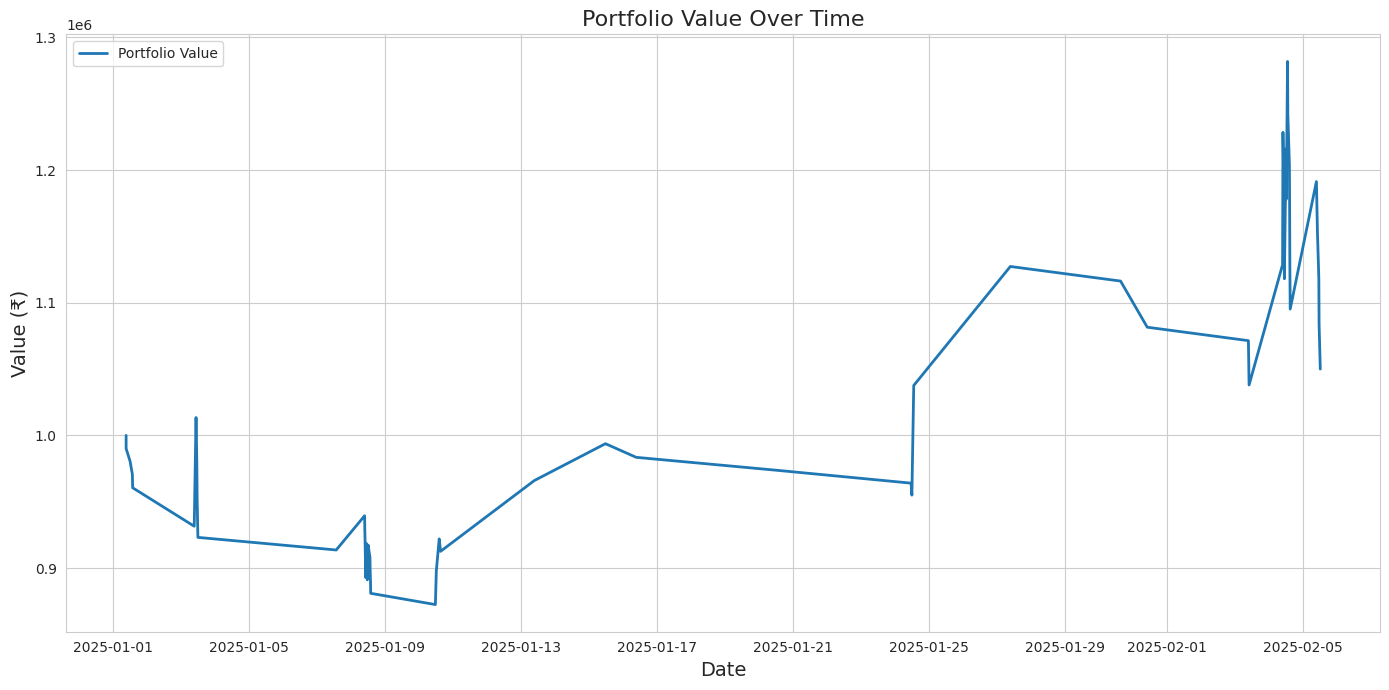

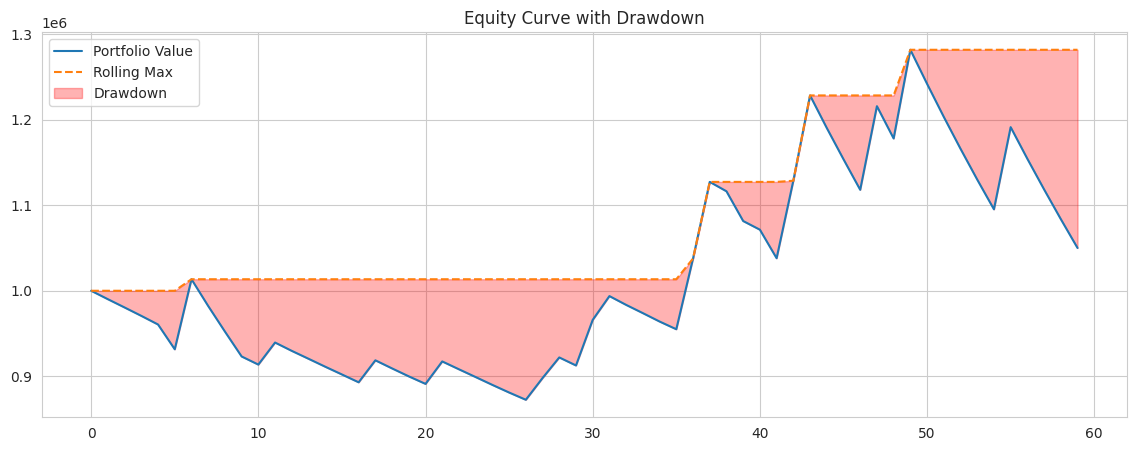

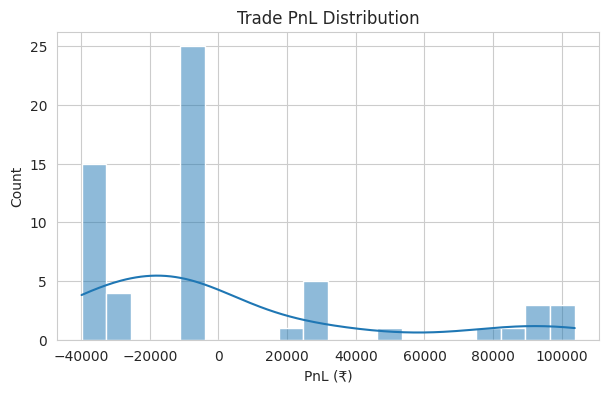

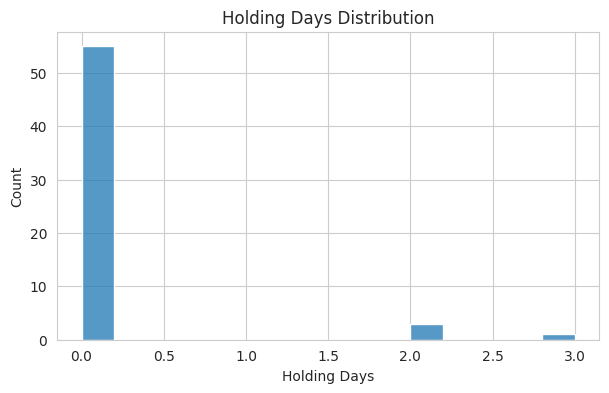

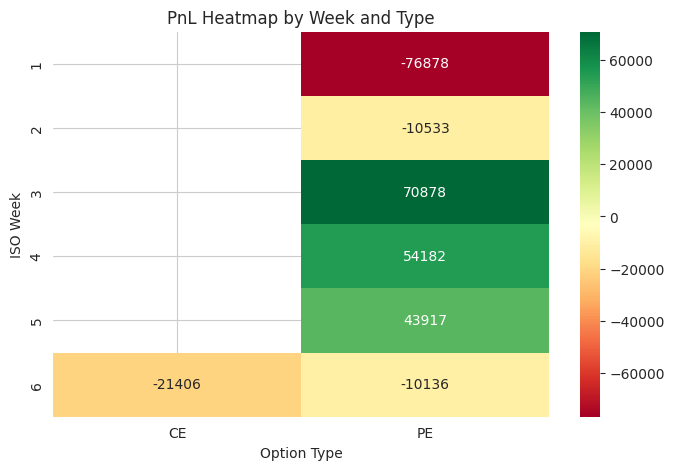

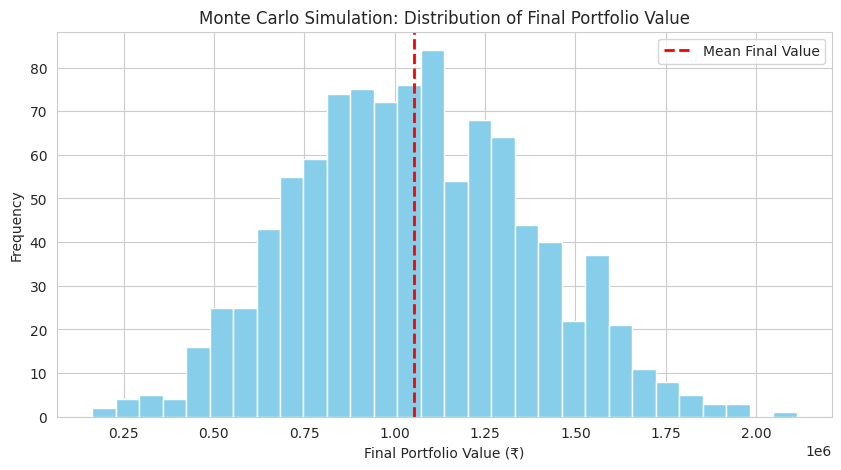

Monte Carlo: Mean Final Value = ₹1,054,176.47, 5th Percentile = ₹535,831.83, 95th Percentile = ₹1,597,717.01


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
TP_PCT = 0.30   # 30% take profit
SL_PCT = 0.10   # 10% stop loss
BROKERAGE_PER_ORDER = 20
SLIPPAGE_PCT = 0.001

VIX_PATH = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/Filtered_VIX_Jan_May_2025_1min.csv'
VIX_RANK_WINDOW = 21 * 12  # 21 trading days of 12 5-min bars each

DAILY_LOSS_LIMIT = -30000  # INR

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals():
    signals_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_signal_details.csv'
    signals = pd.read_csv(signals_path, parse_dates=['TimeStamp'])
    signals = signals.set_index('TimeStamp')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

def load_vix():
    vix = pd.read_csv(VIX_PATH, parse_dates=['TimeStamp'])
    vix = vix.set_index('TimeStamp')
    if vix.index.tz is None:
        vix.index = pd.to_datetime(vix.index).tz_localize('Asia/Kolkata')
    else:
        vix.index = vix.index.tz_convert('Asia/Kolkata')
    vix = vix.rename(columns={'Close': 'VIX'})
    return vix

# ======================================================================
# VIX RANK CALCULATION
# ======================================================================
def calculate_vix_rank(vix_series, window=VIX_RANK_WINDOW):
    vix_min = vix_series.rolling(window=window, min_periods=1).min()
    vix_max = vix_series.rolling(window=window, min_periods=1).max()
    vix_rank = (vix_series - vix_min) / (vix_max - vix_min)
    vix_rank = vix_rank.fillna(0.5)
    return vix_rank

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def is_expiry_day(ts, expiry_list):
    return ts.date() in expiry_list

def execute_trades_5min_vix_adaptive_daily_loss_limit(
    spot_data, signals, options_data, vix_5min, vix_rank_5min,
    tp_pct=TP_PCT, sl_pct=SL_PCT,
    brokerage_per_order=BROKERAGE_PER_ORDER, slippage_pct=SLIPPAGE_PCT,
    daily_loss_limit=DAILY_LOSS_LIMIT
):
    portfolio_cash = initial_capital
    trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_5min = signals.reindex(spot_data.index, method='ffill').dropna()
    open_position = None
    realized_pnl_by_day = {}

    for ts, row in spot_data.iterrows():
        if ts not in signals_5min.index or pd.isna(row['close']):
            continue

        # --- Expiry Day Filter ---
        if is_expiry_day(ts, expiry_list):
            continue

        # --- Daily Loss Limit ---
        day = ts.date()
        if day in realized_pnl_by_day and realized_pnl_by_day[day] <= daily_loss_limit:
            continue

        # --- VIX Rank Adaptive Risk ---
        vix_val = vix_5min.loc[ts, 'VIX'] if ts in vix_5min.index else 15
        vix_r = vix_rank_5min.loc[ts] if ts in vix_rank_5min.index else 0.5
        if vix_r > 0.5:
            continue  # No trades in high volatility regime

        if vix_r < 0.2:
            risk_this_trade = 0.3  # 30%
        elif vix_r < 0.3:
            risk_this_trade = 0.2  # 20%
        else:
            risk_this_trade = 0.1  # 10%

        signal = signals_5min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            continue

        # --- Entry Logic ---
        if open_position is None and signal != 0:
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_this_trade) // (entry_price * lot_size))
            if lots < 1:
                continue
            tp_price = entry_price * (1 + tp_pct)
            sl_price = entry_price * (1 - sl_pct)
            entry_slippage = entry_price * slippage_pct * lot_size * lots
            total_slippage += entry_slippage
            total_brokerage += brokerage_per_order
            entry_price_adj = entry_price + entry_price * slippage_pct
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price_adj,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'tp_price': tp_price,
                'sl_price': sl_price,
                'entry_slippage': entry_slippage
            }
            continue

        # --- Exit Logic ---
        if open_position is not None:
            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['Expiry'].dt.date == open_position['expiry']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')

            exit_reason = None
            exit_price = None
            exit_time = None

            for _, opt_row in option_rows.iterrows():
                if opt_row['High'] >= open_position['tp_price']:
                    exit_price = open_position['tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
                elif opt_row['Low'] <= open_position['sl_price']:
                    exit_price = open_position['sl_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Stop Loss'
                    break

            if exit_reason is None and ts.date() >= open_position['expiry']:
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'Expiry'

            if exit_reason is not None and exit_price is not None:
                exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                total_slippage += exit_slippage
                total_brokerage += brokerage_per_order
                exit_price_adj = exit_price - exit_price * slippage_pct
                holding_days = (exit_time - open_position['entry_date']).days
                pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price_adj,
                    'lots': open_position['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason
                })
                # Update daily realized PnL
                realized_pnl_by_day[day] = realized_pnl_by_day.get(day, 0) + pnl
                open_position = None

    return trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading signals...")
signals = load_signals()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nLoading VIX data...")
vix = load_vix()
vix_5min = vix.resample('5min').last().dropna()
vix_rank_5min = calculate_vix_rank(vix_5min['VIX'])
print("VIX data loaded.")

print("\nResampling spot and signals to 5min and filtering expiry days...")
spot_5min = spot_data.resample('5min').last().dropna()
signals_5min = signals.reindex(spot_5min.index, method='ffill').dropna()

print("\nExecuting 5min VIX-adaptive strategy, no expiry day buying, TP 30%, SL 10%, daily loss limit...")
trade_log, total_brokerage, total_slippage = execute_trades_5min_vix_adaptive_daily_loss_limit(
    spot_5min, signals_5min, options_sample, vix_5min, vix_rank_5min
)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_5min_vix_adaptive.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_5min_vix_adaptive.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}
Total Brokerage:    ₹{total_brokerage:,.2f}
Total Slippage:     ₹{total_slippage:,.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()

    # --- PnL Heatmap by Week and Type ---
    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    # --- Monte Carlo Simulation ---
    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")


In [ ]:
import pandas as pd
import os

# Ensure output directory exists
output_dir = '/content/drive/MyDrive/Options_Data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load minute-wise data
file_path = '/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv'
df = pd.read_csv(file_path, parse_dates=['date'])
df.set_index('date', inplace=True)

# Function to generate SMA crossover signals for any frequency
def generate_signals(df, freq):
    resampled_close = df['close'].resample(freq).last()
    sma50 = resampled_close.rolling(50, min_periods=1).mean()
    sma200 = resampled_close.rolling(200, min_periods=1).mean()
    signals = (sma50 > sma200).astype(int) * 2 - 1  # 1 if sma21 > sma22, else -1
    return signals

# Generate signals for 1 min, 5 min, and 15 min candle frames
signals_1min = generate_signals(df, '1T')
signals_5min = generate_signals(df, '5T')
signals_15min = generate_signals(df, '15T')

# Save signals to CSV files
signals_1min.to_csv(os.path.join(output_dir, 'Nifty_50_signals_1min_50_200.csv'), header=['Signal'])
signals_5min.to_csv(os.path.join(output_dir, 'Nifty_50_signals_5min_50_200.csv'), header=['Signal'])
signals_15min.to_csv(os.path.join(output_dir, 'Nifty_50_signals_15min_50_200.csv'), header=['Signal'])

print("Signal files saved for 1 min, 5 min, and 15 min candle frames.")


/tmp/ipython-input-5-2576684753.py:16: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_close = df['close'].resample(freq).last()
/tmp/ipython-input-5-2576684753.py:16: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_close = df['close'].resample(freq).last()
/tmp/ipython-input-5-2576684753.py:16: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_close = df['close'].resample(freq).last()


Signal files saved for 1 min, 5 min, and 15 min candle frames.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading 15-min signals...
Signals shape: (3577, 1)

Loading options sample...

Options sample loaded.

Executing trades 15-minutely with crossover, take profit, stop loss, brokerage, and slippage...

Detailed trade log saved to Jan_Feb_detailed_trade_log_15min_crossover_tp_sl_ALL_EXPIRIES.csv
                 entry_date                entry_time  \
0 2025-01-01 09:15:00+05:30 2025-01-01 09:15:00+05:30   
1 2025-01-01 14:30:00+05:30 2025-01-01 14:30:00+05:30   
2 2025-01-02 14:30:00+05:30 2025-01-02 14:30:00+05:30   
3 2025-01-03 09:15:00+05:30 2025-01-03 09:15:00+05:30   
4 2025-01-03 15:00:00+05:30 2025-01-03 15:00:00+05:30   
5 2025-01-07 15:00:00+05:30 2025-01-07 15:00:00+05:30   
6 2025-01-10 14:45:00+05:30 2025-01-10 14:45:00+05:30   
7 2025-01-14 14:45:00+05:30 2025-01-14 14:45:00+05:30   
8 2025-01-15 1

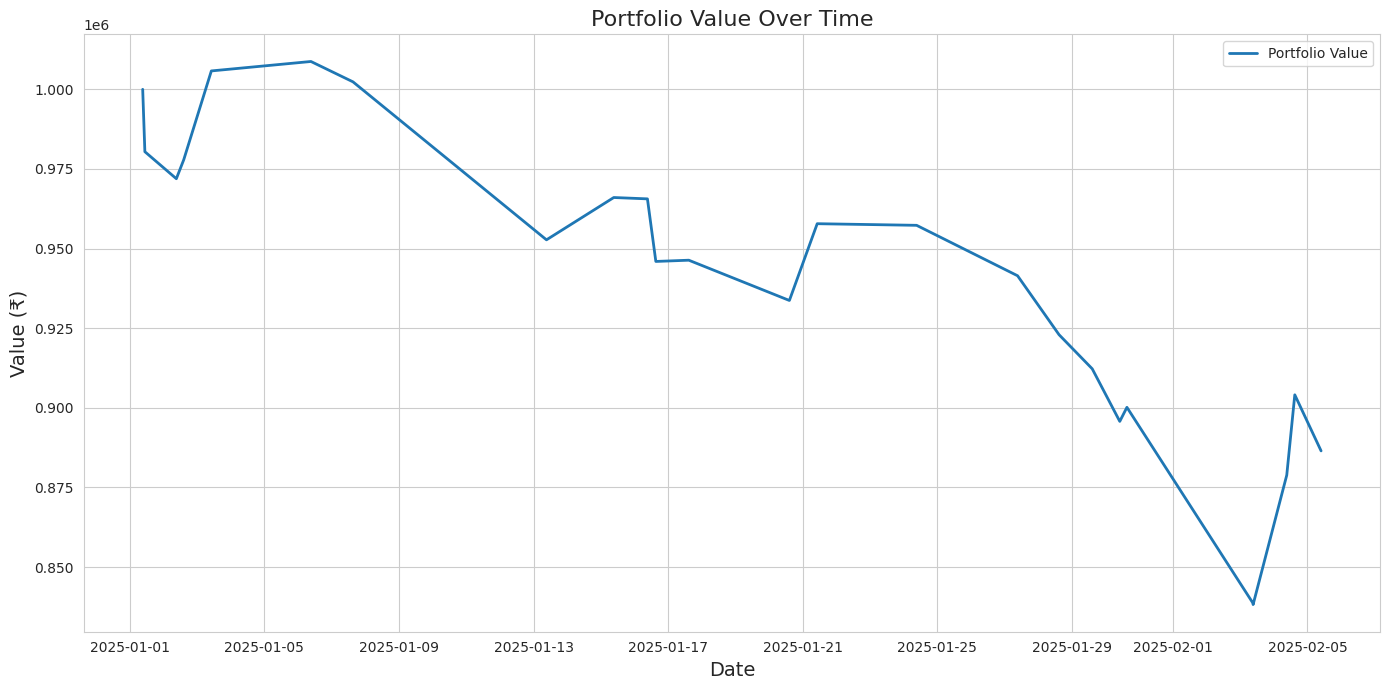

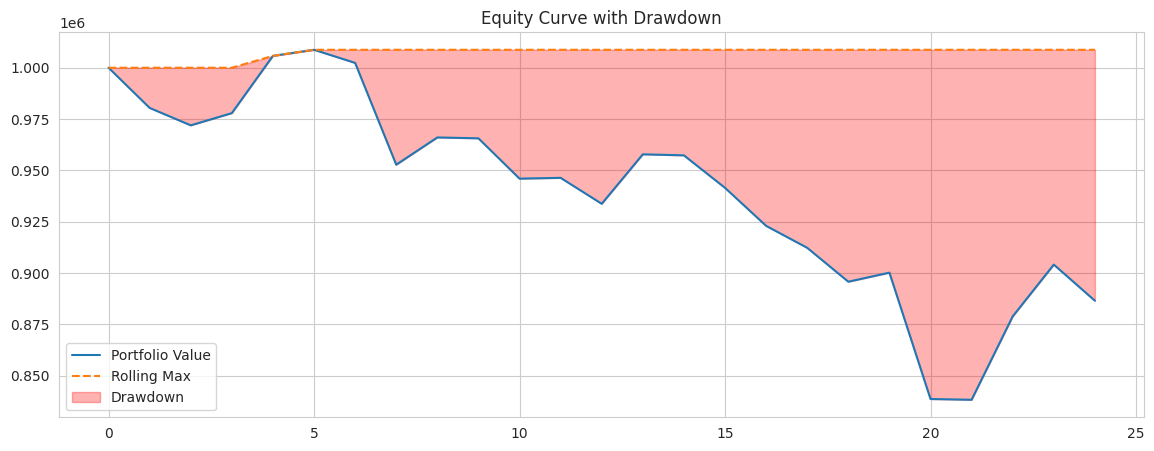

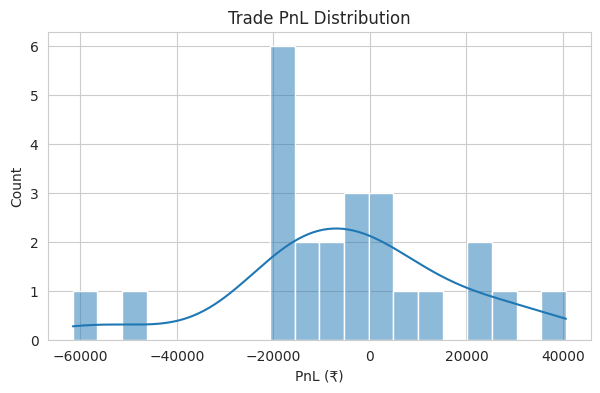

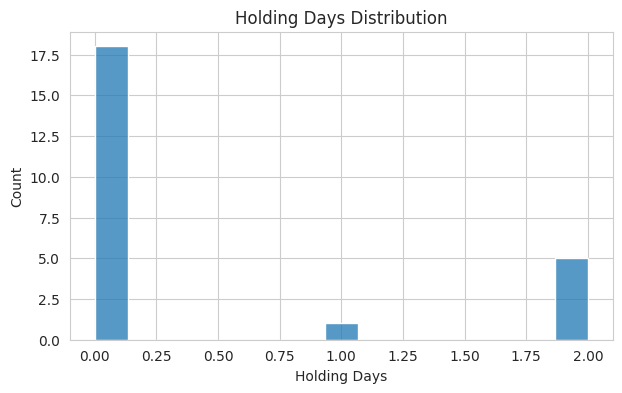

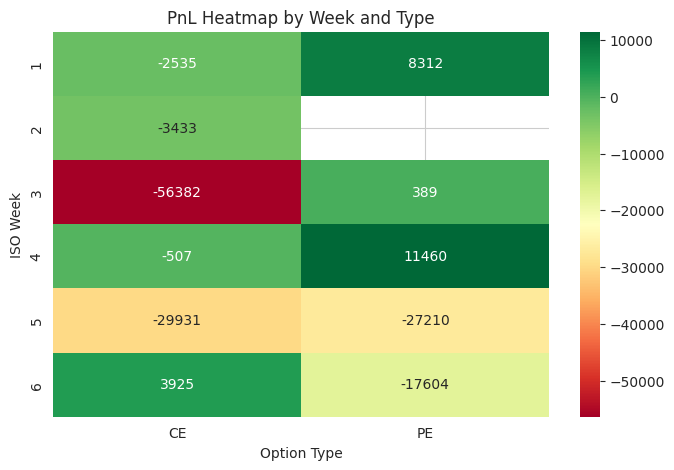

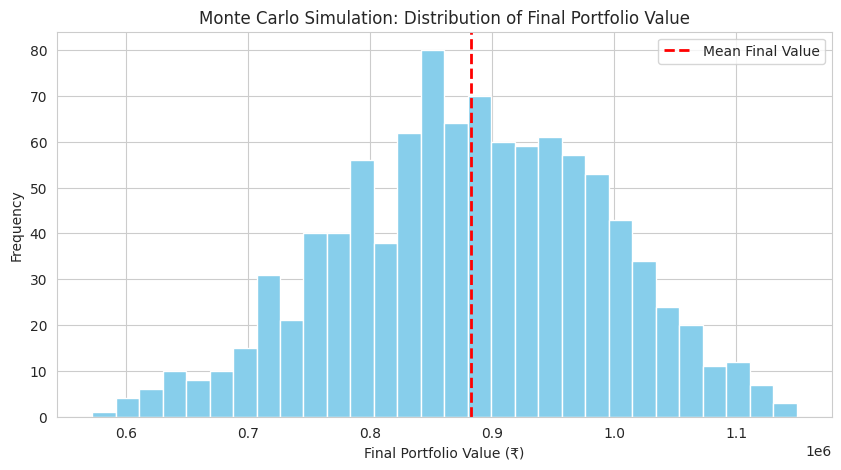

Monte Carlo: Mean Final Value = ₹882,862.28, 5th Percentile = ₹704,013.01, 95th Percentile = ₹1,054,866.30


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade
TP_PCT = 0.3  # 30% take profit (relative to entry price)
SL_PCT = 0.2  # 20% stop loss (relative to entry price)
BROKERAGE_PER_ORDER = 20  # INR per order (entry and exit)
SLIPPAGE_PCT = 0.001  # 0.1% per side

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals_15min():
    signals_path = '/content/drive/MyDrive/Options_Data/Nifty_50_signals_15min.csv'
    signals = pd.read_csv(signals_path, parse_dates=['date'])
    signals = signals.set_index('date')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    if 'Signal' not in signals.columns:
        signals.columns = ['Signal']
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def execute_trades_15min_crossover_tp_sl(
    spot_data, signals, options_data, tp_pct=TP_PCT, sl_pct=SL_PCT,
    brokerage_per_order=BROKERAGE_PER_ORDER, slippage_pct=SLIPPAGE_PCT
):
    portfolio_cash = initial_capital
    trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_15min = signals.reindex(spot_data.index, method='ffill').dropna()
    open_position = None
    prev_signal = 0

    for ts, row in spot_data.iterrows():
        if ts not in signals_15min.index or pd.isna(row['close']):
            continue
        signal = signals_15min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            prev_signal = signal
            continue

        # ENTRY: Only when signal changes from prev_signal to new signal (crossover)
        if open_position is None and signal != 0 and signal != prev_signal:
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                prev_signal = signal
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                prev_signal = signal
                continue
            tp_price = entry_price * (1 + tp_pct)
            sl_price = entry_price * (1 - sl_pct)
            entry_slippage = entry_price * slippage_pct * lot_size * lots
            total_slippage += entry_slippage
            total_brokerage += brokerage_per_order
            entry_price_adj = entry_price + entry_price * slippage_pct  # Buy at ask
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price_adj,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'tp_price': tp_price,
                'sl_price': sl_price,
                'entry_slippage': entry_slippage
            }
            prev_signal = signal
            continue

        # EXIT: On signal reversal (crossover in opposite direction), TP, SL, or expiry
        if open_position is not None:
            exit_reason = None
            exit_price = None
            exit_time = None

            # 1. Signal reversal
            if signal != open_position['signal']:
                exit_reason = 'Signal Reversal'
                # Get exit price at this timestamp
                exit_row = options_data[
                    (options_data['Strike'] == open_position['strike']) &
                    (options_data['Type'] == open_position['type']) &
                    (options_data['Expiry'].dt.date == open_position['expiry']) &
                    (options_data['TimeStamp'] >= ts)
                ].sort_values('TimeStamp')
                if not exit_row.empty:
                    exit_price = float(exit_row.iloc[0]['Close'])
                    exit_time = exit_row.iloc[0]['TimeStamp']
            else:
                # 2. TP/SL
                option_rows = options_data[
                    (options_data['Strike'] == open_position['strike']) &
                    (options_data['Type'] == open_position['type']) &
                    (options_data['Expiry'].dt.date == open_position['expiry']) &
                    (options_data['TimeStamp'] >= open_position['entry_time']) &
                    (options_data['TimeStamp'] <= ts)
                ].sort_values('TimeStamp')

                for _, opt_row in option_rows.iterrows():
                    if opt_row['High'] >= open_position['tp_price']:
                        exit_price = open_position['tp_price']
                        exit_time = opt_row['TimeStamp']
                        exit_reason = 'Take Profit'
                        break
                    elif opt_row['Low'] <= open_position['sl_price']:
                        exit_price = open_position['sl_price']
                        exit_time = opt_row['TimeStamp']
                        exit_reason = 'Stop Loss'
                        break

                # 3. Expiry
                if exit_reason is None and ts.date() >= open_position['expiry']:
                    last_row = option_rows.iloc[-1] if not option_rows.empty else None
                    if last_row is not None:
                        exit_price = float(last_row['Close'])
                        exit_time = last_row['TimeStamp']
                        exit_reason = 'Expiry'

            if exit_reason is not None and exit_price is not None:
                exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                total_slippage += exit_slippage
                total_brokerage += brokerage_per_order
                exit_price_adj = exit_price - exit_price * slippage_pct  # Sell at bid
                holding_days = (exit_time - open_position['entry_date']).days if exit_time and open_position['entry_date'] else 0
                pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price_adj,
                    'lots': open_position['lots'],
                    'pnl': pnl,
                    'holding_days': holding_days,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason
                })
                open_position = None

        prev_signal = signal

    return trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading 15-min signals...")
signals = load_signals_15min()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nExecuting trades 15-minutely with crossover, take profit, stop loss, brokerage, and slippage...")
trade_log, total_brokerage, total_slippage = execute_trades_15min_crossover_tp_sl(
    spot_data, signals, options_sample
)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_15min_crossover_tp_sl_ALL_EXPIRIES.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_15min_crossover_tp_sl_ALL_EXPIRIES.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}
Total Brokerage:    ₹{total_brokerage:,.2f}
Total Slippage:     ₹{total_slippage:,.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()

    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading 15-min signals...
Signals shape: (3577, 1)

Loading options sample...

Options sample loaded.

Executing trades 15-minutely with ATR trailing stop, TP, max loss cap, and no overnight holding...


/tmp/ipython-input-4-3567769131.py:100: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: compute_atr(x, ATR_PERIOD)).reset_index(level=[0,1,2], drop=True)



Detailed trade log saved to Jan_Feb_detailed_trade_log_15min_atr_trailing_tp_maxloss_eod.csv
                 entry_date                entry_time  \
0 2025-01-01 09:15:00+05:30 2025-01-01 09:15:00+05:30   
1 2025-01-01 14:30:00+05:30 2025-01-01 14:30:00+05:30   
2 2025-01-02 09:15:00+05:30 2025-01-02 09:15:00+05:30   
3 2025-01-02 14:30:00+05:30 2025-01-02 14:30:00+05:30   
4 2025-01-03 09:15:00+05:30 2025-01-03 09:15:00+05:30   
5 2025-01-03 15:00:00+05:30 2025-01-03 15:00:00+05:30   
6 2025-01-06 09:15:00+05:30 2025-01-06 09:15:00+05:30   
7 2025-01-07 15:00:00+05:30 2025-01-07 15:00:00+05:30   
8 2025-01-07 15:15:00+05:30 2025-01-07 15:15:00+05:30   
9 2025-01-10 14:45:00+05:30 2025-01-10 14:45:00+05:30   

                  exit_date action type  strike  entry_price  exit_price  \
0 2025-01-01 09:18:00+05:30    Buy   PE   23650    120.12000  115.796588   
1 2025-01-01 14:30:00+05:30    Buy   CE   23800    118.06795  118.019362   
2 2025-01-02 09:16:00+05:30    Buy   PE   23800   

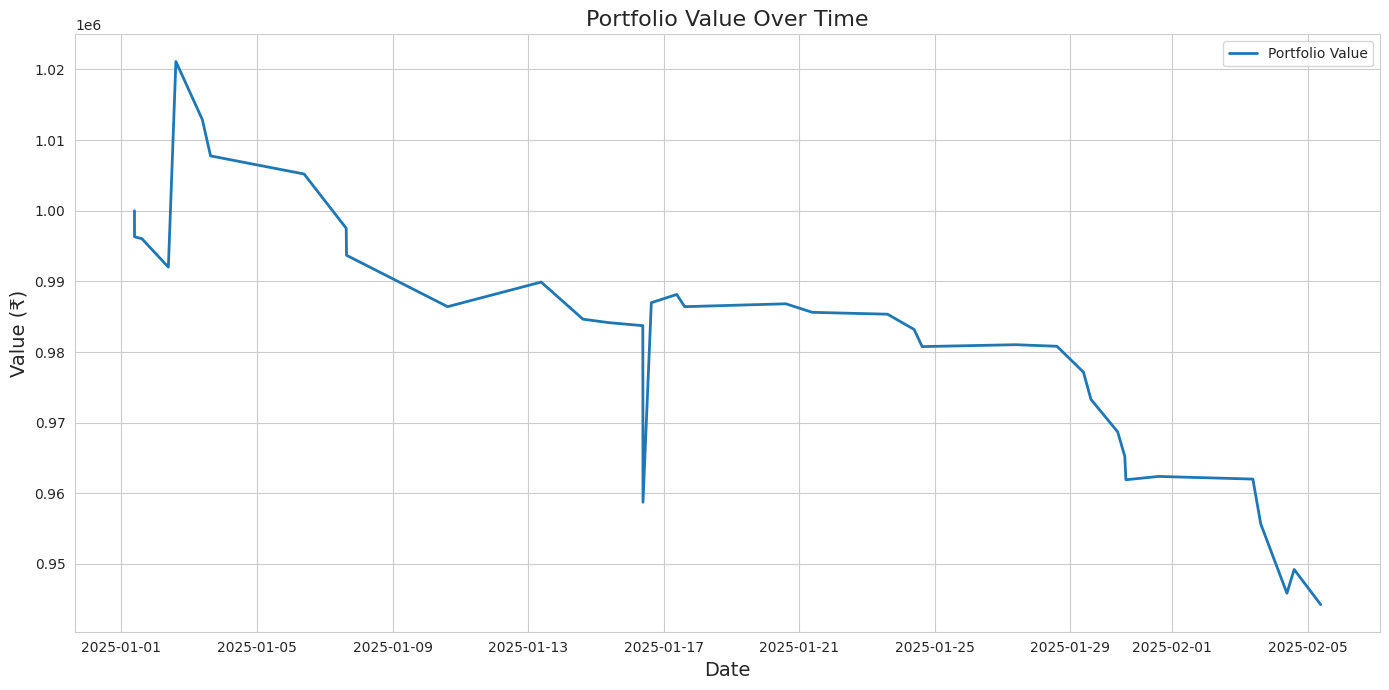

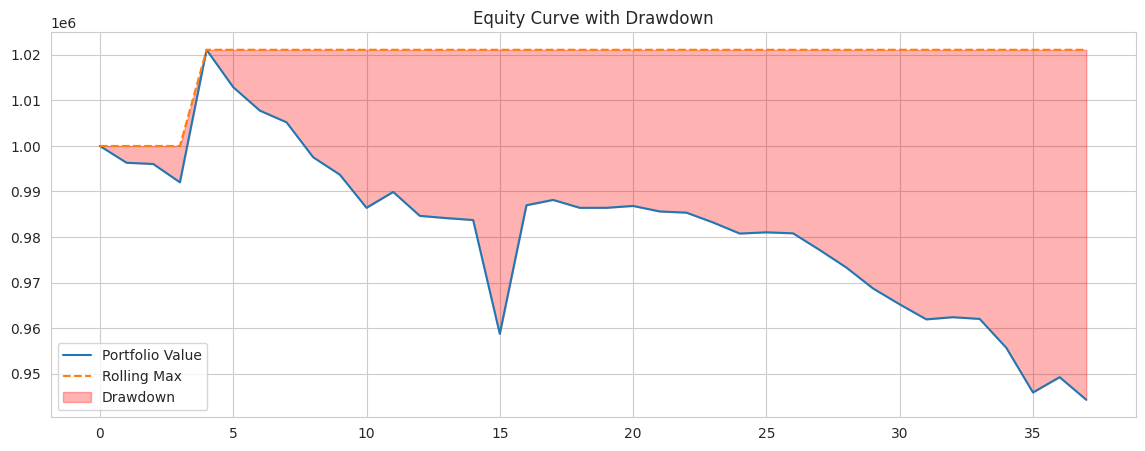

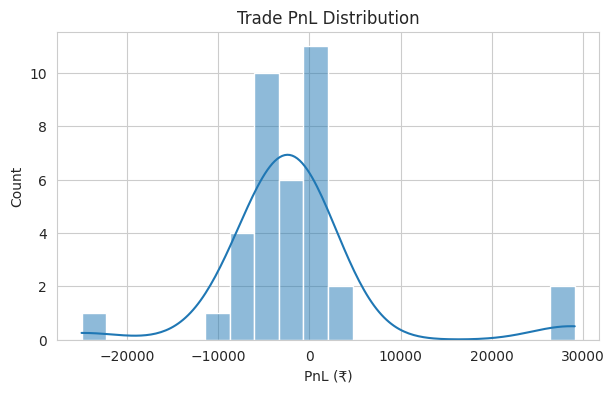

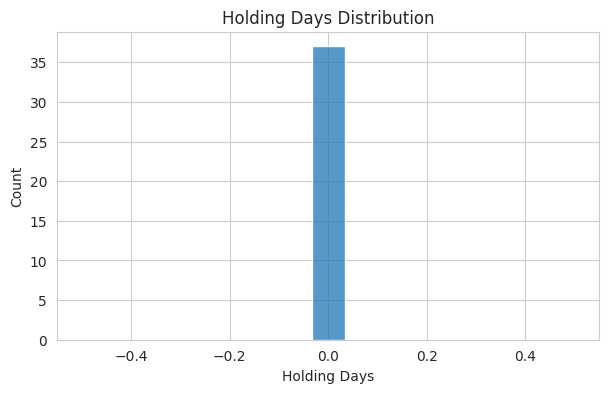

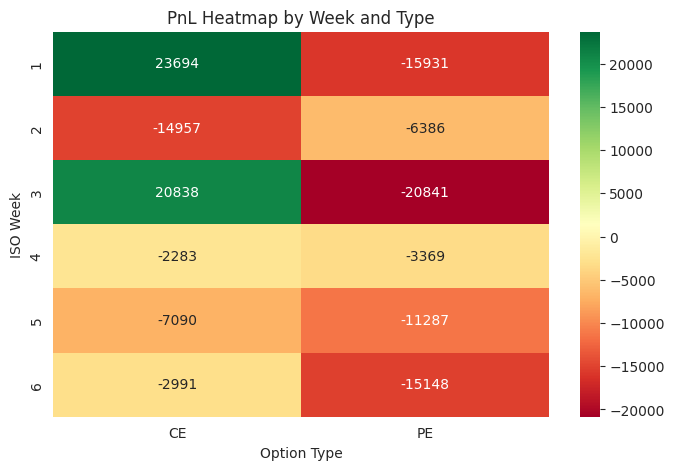

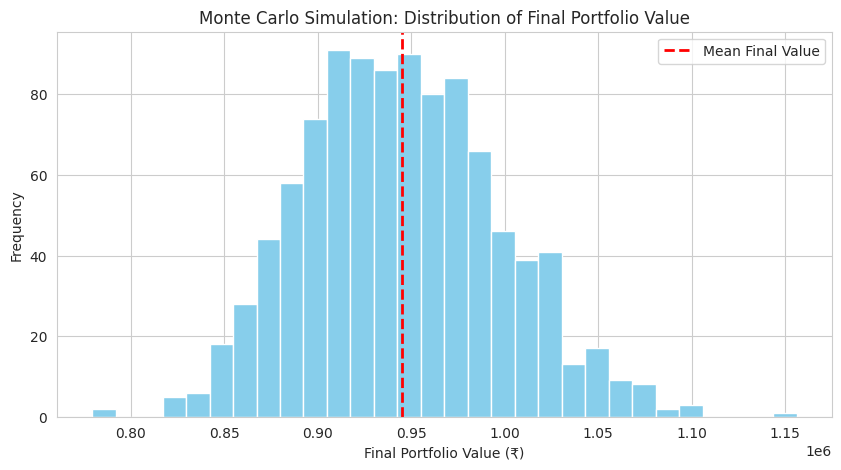

Monte Carlo: Mean Final Value = ₹944,913.81, 5th Percentile = ₹865,177.26, 95th Percentile = ₹1,031,400.97


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade
TP_PCT = 0.3  # 30% take profit (relative to entry price)
ATR_PERIOD = 10  # ATR window for trailing stop
ATR_MULTIPLIER = 2.5  # Multiplier for trailing stop
MAX_LOSS = 25000  # Maximum allowed loss per trade in INR
BROKERAGE_PER_ORDER = 20  # INR per order (entry and exit)
SLIPPAGE_PCT = 0.001  # 0.1% per side
MARKET_CLOSE_TIME = '15:25:00'  # All trades closed before this time

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals_15min():
    signals_path = '/content/drive/MyDrive/Options_Data/Nifty_50_signals_15min.csv'
    signals = pd.read_csv(signals_path, parse_dates=['date'])
    signals = signals.set_index('date')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    if 'Signal' not in signals.columns:
        signals.columns = ['Signal']
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def compute_atr(df, period=ATR_PERIOD):
    # Assumes df has columns: 'High', 'Low', 'Close'
    high = df['High']
    low = df['Low']
    close = df['Close']
    prev_close = close.shift(1)
    tr = pd.concat([
        high - low,
        (high - prev_close).abs(),
        (low - prev_close).abs()
    ], axis=1).max(axis=1)
    atr = tr.rolling(window=period, min_periods=1).mean()
    return atr

def execute_trades_15min_atr_trailing(
    spot_data, signals, options_data, tp_pct=TP_PCT,
    brokerage_per_order=BROKERAGE_PER_ORDER, slippage_pct=SLIPPAGE_PCT
):
    portfolio_cash = initial_capital
    trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_15min = signals.reindex(spot_data.index, method='ffill').dropna()
    open_position = None
    prev_signal = 0

    # Pre-compute ATR for each option contract for trailing stop
    options_data['ATR'] = options_data.groupby(['Strike', 'Type', 'Expiry'])\
        .apply(lambda x: compute_atr(x, ATR_PERIOD)).reset_index(level=[0,1,2], drop=True)

    for ts, row in spot_data.iterrows():
        # Close all trades before end of session (no overnight holding)
        if ts.time() >= datetime.strptime(MARKET_CLOSE_TIME, '%H:%M:%S').time():
            if open_position is not None:
                # Close at current price
                exit_row = options_data[
                    (options_data['Strike'] == open_position['strike']) &
                    (options_data['Type'] == open_position['type']) &
                    (options_data['Expiry'].dt.date == open_position['expiry']) &
                    (options_data['TimeStamp'] >= ts)
                ].sort_values('TimeStamp')
                if not exit_row.empty:
                    exit_price = float(exit_row.iloc[0]['Close'])
                    exit_time = exit_row.iloc[0]['TimeStamp']
                    exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                    total_slippage += exit_slippage
                    total_brokerage += brokerage_per_order
                    exit_price_adj = exit_price - exit_price * slippage_pct
                    pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                    pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                    # Cap loss at MAX_LOSS
                    if pnl < -MAX_LOSS:
                        pnl = -MAX_LOSS
                    portfolio_cash += pnl
                    trade_log.append({
                        'entry_date': open_position['entry_date'],
                        'entry_time': open_position['entry_time'],
                        'exit_date': exit_time,
                        'action': open_position['action'],
                        'type': open_position['type'],
                        'strike': open_position['strike'],
                        'entry_price': open_position['entry_price'],
                        'exit_price': exit_price_adj,
                        'lots': open_position['lots'],
                        'pnl': pnl,
                        'holding_days': 0,
                        'spot': open_position['spot'],
                        'expiry': open_position['expiry'],
                        'exit_reason': 'EOD Close'
                    })
                    open_position = None
            continue

        if ts not in signals_15min.index or pd.isna(row['close']):
            continue
        signal = signals_15min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            prev_signal = signal
            continue

        # ENTRY: Only when signal changes from prev_signal to new signal (crossover)
        if open_position is None and signal != 0 and signal != prev_signal:
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                prev_signal = signal
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                prev_signal = signal
                continue
            tp_price = entry_price * (1 + tp_pct)
            entry_slippage = entry_price * slippage_pct * lot_size * lots
            total_slippage += entry_slippage
            total_brokerage += brokerage_per_order
            entry_price_adj = entry_price + entry_price * slippage_pct  # Buy at ask
            # ATR for trailing stop
            atr = float(entry_row.iloc[0]['ATR'])
            trailing_stop = entry_price_adj - ATR_MULTIPLIER * atr
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price_adj,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'tp_price': tp_price,
                'trailing_stop': trailing_stop,
                'max_loss_stop': entry_price_adj - (MAX_LOSS / (lot_size * lots)),
                'entry_slippage': entry_slippage,
                'highest_price': entry_price_adj  # For trailing logic
            }
            prev_signal = signal
            continue

        # EXIT: On trailing stop, TP, or max loss
        if open_position is not None:
            exit_reason = None
            exit_price = None
            exit_time = None

            # Fetch all option bars since entry for trailing stop logic
            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['Expiry'].dt.date == open_position['expiry']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')

            for _, opt_row in option_rows.iterrows():
                price = float(opt_row['Close'])
                atr = float(opt_row['ATR'])
                # Update highest price for trailing stop
                if price > open_position['highest_price']:
                    open_position['highest_price'] = price
                # Trailing stop moves up with price
                trailing_stop = open_position['highest_price'] - ATR_MULTIPLIER * atr
                open_position['trailing_stop'] = max(open_position['trailing_stop'], trailing_stop)
                # Take profit
                if price >= open_position['tp_price']:
                    exit_price = open_position['tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
                # Trailing stop
                elif price <= open_position['trailing_stop']:
                    exit_price = open_position['trailing_stop']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Trailing Stop'
                    break
                # Max loss cap
                elif price <= open_position['max_loss_stop']:
                    exit_price = open_position['max_loss_stop']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Max Loss Stop'
                    break

            # EOD close if not already closed
            if exit_reason is None and ts.time() >= datetime.strptime(MARKET_CLOSE_TIME, '%H:%M:%S').time():
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'EOD Close'

            if exit_reason is not None and exit_price is not None:
                exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                total_slippage += exit_slippage
                total_brokerage += brokerage_per_order
                exit_price_adj = exit_price - exit_price * slippage_pct  # Sell at bid
                pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                # Cap loss at MAX_LOSS
                if pnl < -MAX_LOSS:
                    pnl = -MAX_LOSS
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price_adj,
                    'lots': open_position['lots'],
                    'pnl': pnl,
                    'holding_days': 0,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason
                })
                open_position = None

        prev_signal = signal

    return trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading 15-min signals...")
signals = load_signals_15min()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nExecuting trades 15-minutely with ATR trailing stop, TP, max loss cap, and no overnight holding...")
trade_log, total_brokerage, total_slippage = execute_trades_15min_atr_trailing(
    spot_data, signals, options_sample
)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_15min_atr_trailing_tp_maxloss_eod.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_15min_atr_trailing_tp_maxloss_eod.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}
Total Brokerage:    ₹{total_brokerage:,.2f}
Total Slippage:     ₹{total_slippage:,.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()

    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading 15-min signals...
Signals shape: (3577, 1)

Loading options sample...

Options sample loaded.

Executing trades 15-minutely with ATR trailing stop, TP, max loss cap, and no overnight holding...


/tmp/ipython-input-6-3032388859.py:100: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: compute_atr(x, ATR_PERIOD)).reset_index(level=[0,1,2], drop=True)



Detailed trade log saved to Jan_Feb_detailed_trade_log_15min_atr_trailing_tp_maxloss_eod.csv
                 entry_date                entry_time  \
0 2025-01-01 09:15:00+05:30 2025-01-01 09:15:00+05:30   
1 2025-01-02 09:15:00+05:30 2025-01-02 09:15:00+05:30   
2 2025-01-06 09:15:00+05:30 2025-01-06 09:15:00+05:30   
3 2025-01-07 09:15:00+05:30 2025-01-07 09:15:00+05:30   
4 2025-01-07 09:45:00+05:30 2025-01-07 09:45:00+05:30   
5 2025-01-15 09:15:00+05:30 2025-01-15 09:15:00+05:30   
6 2025-01-17 09:15:00+05:30 2025-01-17 09:15:00+05:30   
7 2025-01-21 09:15:00+05:30 2025-01-21 09:15:00+05:30   
8 2025-01-21 10:15:00+05:30 2025-01-21 10:15:00+05:30   
9 2025-01-23 09:30:00+05:30 2025-01-23 09:30:00+05:30   

                  exit_date action type  strike  entry_price  exit_price  \
0 2025-01-01 09:18:00+05:30    Buy   PE   23650    120.12000  115.796588   
1 2025-01-02 09:15:00+05:30    Buy   CE   23800    107.95785  110.264625   
2 2025-01-06 09:22:00+05:30    Buy   PE   24050   

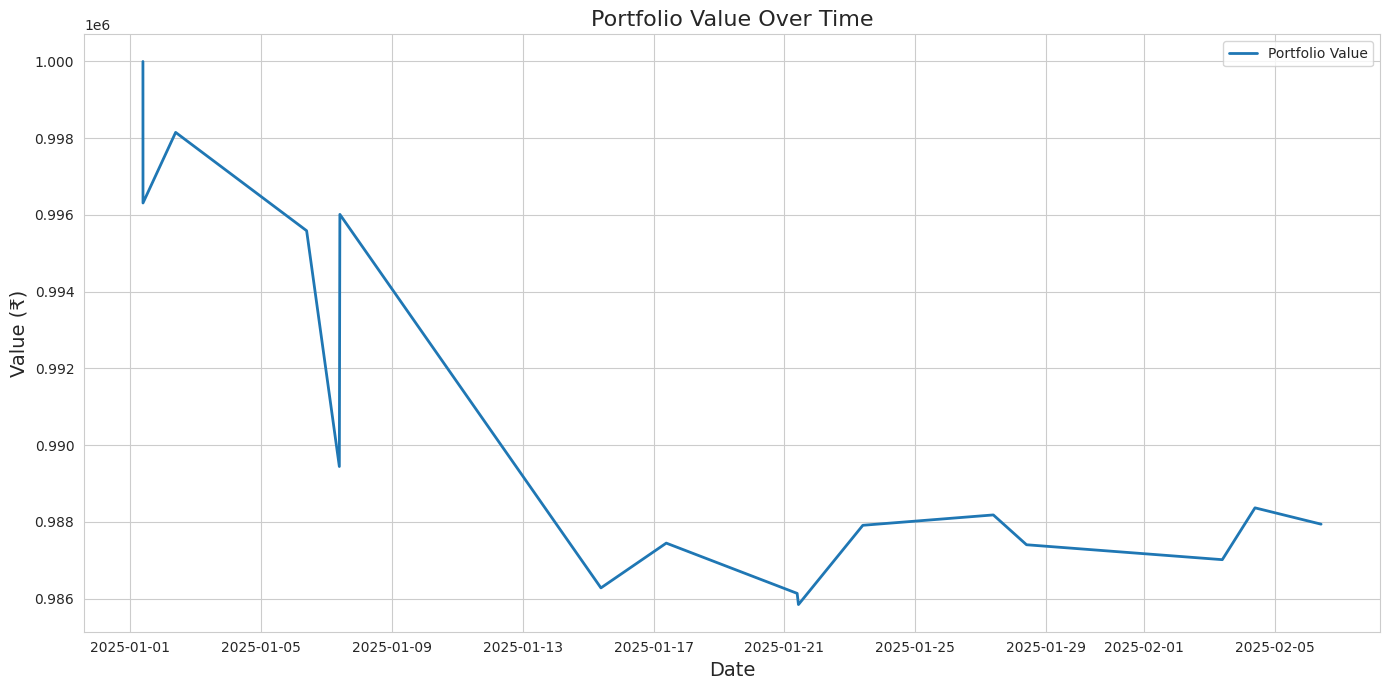

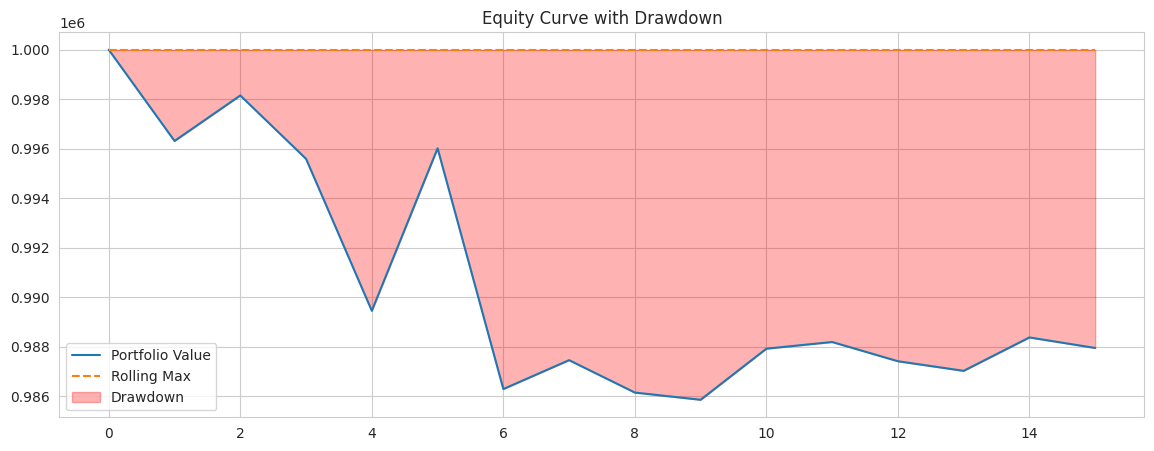

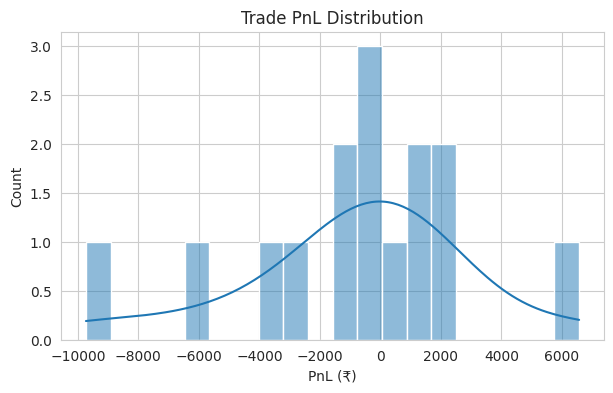

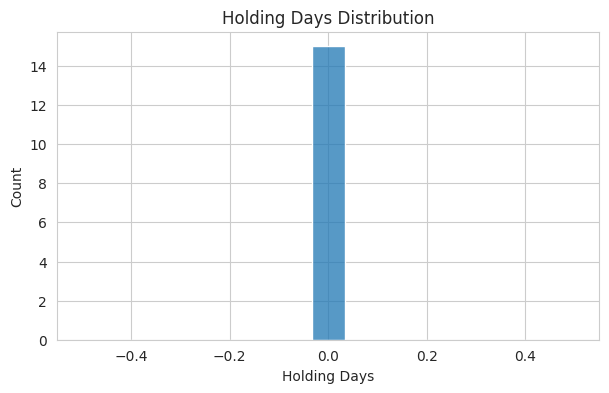

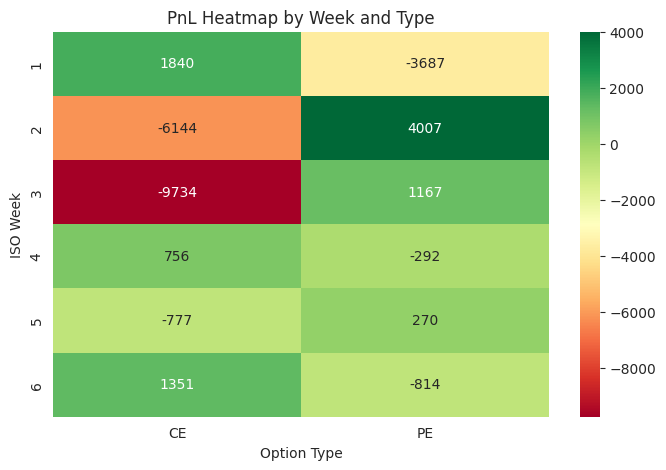

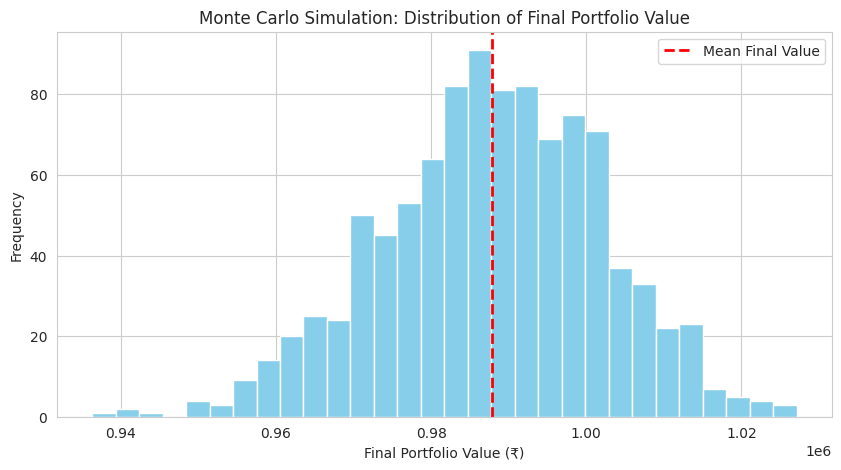

Monte Carlo: Mean Final Value = ₹987,807.64, 5th Percentile = ₹962,943.64, 95th Percentile = ₹1,010,842.75


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
risk_per_trade = 0.1  # 10% per trade
TP_PCT = 0.3  # 30% take profit (relative to entry price)
ATR_PERIOD = 10  # ATR window for trailing stop
ATR_MULTIPLIER = 2.5  # Multiplier for trailing stop
MAX_LOSS = 25000  # Maximum allowed loss per trade in INR
BROKERAGE_PER_ORDER = 20  # INR per order (entry and exit)
SLIPPAGE_PCT = 0.001  # 0.1% per side
MARKET_CLOSE_TIME = '15:25:00'  # All trades closed before this time

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals_15min():
    signals_path = '/content/drive/MyDrive/Options_Data/Nifty_50_signals_15min_50_200.csv'
    signals = pd.read_csv(signals_path, parse_dates=['date'])
    signals = signals.set_index('date')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    if 'Signal' not in signals.columns:
        signals.columns = ['Signal']
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def compute_atr(df, period=ATR_PERIOD):
    # Assumes df has columns: 'High', 'Low', 'Close'
    high = df['High']
    low = df['Low']
    close = df['Close']
    prev_close = close.shift(1)
    tr = pd.concat([
        high - low,
        (high - prev_close).abs(),
        (low - prev_close).abs()
    ], axis=1).max(axis=1)
    atr = tr.rolling(window=period, min_periods=1).mean()
    return atr

def execute_trades_15min_atr_trailing(
    spot_data, signals, options_data, tp_pct=TP_PCT,
    brokerage_per_order=BROKERAGE_PER_ORDER, slippage_pct=SLIPPAGE_PCT
):
    portfolio_cash = initial_capital
    trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_15min = signals.reindex(spot_data.index, method='ffill').dropna()
    open_position = None
    prev_signal = 0

    # Pre-compute ATR for each option contract for trailing stop
    options_data['ATR'] = options_data.groupby(['Strike', 'Type', 'Expiry'])\
        .apply(lambda x: compute_atr(x, ATR_PERIOD)).reset_index(level=[0,1,2], drop=True)

    for ts, row in spot_data.iterrows():
        # Close all trades before end of session (no overnight holding)
        if ts.time() >= datetime.strptime(MARKET_CLOSE_TIME, '%H:%M:%S').time():
            if open_position is not None:
                # Close at current price
                exit_row = options_data[
                    (options_data['Strike'] == open_position['strike']) &
                    (options_data['Type'] == open_position['type']) &
                    (options_data['Expiry'].dt.date == open_position['expiry']) &
                    (options_data['TimeStamp'] >= ts)
                ].sort_values('TimeStamp')
                if not exit_row.empty:
                    exit_price = float(exit_row.iloc[0]['Close'])
                    exit_time = exit_row.iloc[0]['TimeStamp']
                    exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                    total_slippage += exit_slippage
                    total_brokerage += brokerage_per_order
                    exit_price_adj = exit_price - exit_price * slippage_pct
                    pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                    pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                    # Cap loss at MAX_LOSS
                    if pnl < -MAX_LOSS:
                        pnl = -MAX_LOSS
                    portfolio_cash += pnl
                    trade_log.append({
                        'entry_date': open_position['entry_date'],
                        'entry_time': open_position['entry_time'],
                        'exit_date': exit_time,
                        'action': open_position['action'],
                        'type': open_position['type'],
                        'strike': open_position['strike'],
                        'entry_price': open_position['entry_price'],
                        'exit_price': exit_price_adj,
                        'lots': open_position['lots'],
                        'pnl': pnl,
                        'holding_days': 0,
                        'spot': open_position['spot'],
                        'expiry': open_position['expiry'],
                        'exit_reason': 'EOD Close'
                    })
                    open_position = None
            continue

        if ts not in signals_15min.index or pd.isna(row['close']):
            continue
        signal = signals_15min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            prev_signal = signal
            continue

        # ENTRY: Only when signal changes from prev_signal to new signal (crossover)
        if open_position is None and signal != 0 and signal != prev_signal:
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                prev_signal = signal
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                prev_signal = signal
                continue
            tp_price = entry_price * (1 + tp_pct)
            entry_slippage = entry_price * slippage_pct * lot_size * lots
            total_slippage += entry_slippage
            total_brokerage += brokerage_per_order
            entry_price_adj = entry_price + entry_price * slippage_pct  # Buy at ask
            # ATR for trailing stop
            atr = float(entry_row.iloc[0]['ATR'])
            trailing_stop = entry_price_adj - ATR_MULTIPLIER * atr
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price_adj,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'tp_price': tp_price,
                'trailing_stop': trailing_stop,
                'max_loss_stop': entry_price_adj - (MAX_LOSS / (lot_size * lots)),
                'entry_slippage': entry_slippage,
                'highest_price': entry_price_adj  # For trailing logic
            }
            prev_signal = signal
            continue

        # EXIT: On trailing stop, TP, or max loss
        if open_position is not None:
            exit_reason = None
            exit_price = None
            exit_time = None

            # Fetch all option bars since entry for trailing stop logic
            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['Expiry'].dt.date == open_position['expiry']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')

            for _, opt_row in option_rows.iterrows():
                price = float(opt_row['Close'])
                atr = float(opt_row['ATR'])
                # Update highest price for trailing stop
                if price > open_position['highest_price']:
                    open_position['highest_price'] = price
                # Trailing stop moves up with price
                trailing_stop = open_position['highest_price'] - ATR_MULTIPLIER * atr
                open_position['trailing_stop'] = max(open_position['trailing_stop'], trailing_stop)
                # Take profit
                if price >= open_position['tp_price']:
                    exit_price = open_position['tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
                # Trailing stop
                elif price <= open_position['trailing_stop']:
                    exit_price = open_position['trailing_stop']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Trailing Stop'
                    break
                # Max loss cap
                elif price <= open_position['max_loss_stop']:
                    exit_price = open_position['max_loss_stop']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Max Loss Stop'
                    break

            # EOD close if not already closed
            if exit_reason is None and ts.time() >= datetime.strptime(MARKET_CLOSE_TIME, '%H:%M:%S').time():
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'EOD Close'

            if exit_reason is not None and exit_price is not None:
                exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                total_slippage += exit_slippage
                total_brokerage += brokerage_per_order
                exit_price_adj = exit_price - exit_price * slippage_pct  # Sell at bid
                pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                # Cap loss at MAX_LOSS
                if pnl < -MAX_LOSS:
                    pnl = -MAX_LOSS
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price_adj,
                    'lots': open_position['lots'],
                    'pnl': pnl,
                    'holding_days': 0,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason
                })
                open_position = None

        prev_signal = signal

    return trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading 15-min signals...")
signals = load_signals_15min()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nExecuting trades 15-minutely with ATR trailing stop, TP, max loss cap, and no overnight holding...")
trade_log, total_brokerage, total_slippage = execute_trades_15min_atr_trailing(
    spot_data, signals, options_sample
)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_15min_atr_trailing_tp_maxloss_eod_50_200.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_15min_atr_trailing_tp_maxloss_eod.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}
Total Brokerage:    ₹{total_brokerage:,.2f}
Total Slippage:     ₹{total_slippage:,.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()

    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading 15-min signals...
Signals shape: (3577, 1)

Loading options sample...

Options sample loaded.

Loading VIX data...
VIX data shape: (9891, 6)

Executing trades 15-minutely with ATR trailing stop, TP, max loss cap, no overnight holding, and VIX-based risk management...


/tmp/ipython-input-7-910746169.py:122: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: compute_atr(x, ATR_PERIOD)).reset_index(level=[0,1,2], drop=True)



Detailed trade log saved to Jan_Feb_detailed_trade_log_15min_atr_trailing_tp_maxloss_eod_vix.csv
                 entry_date                entry_time  \
0 2025-01-01 09:15:00+05:30 2025-01-01 09:15:00+05:30   
1 2025-01-02 09:15:00+05:30 2025-01-02 09:15:00+05:30   
2 2025-01-06 09:15:00+05:30 2025-01-06 09:15:00+05:30   
3 2025-01-07 09:15:00+05:30 2025-01-07 09:15:00+05:30   
4 2025-01-07 09:45:00+05:30 2025-01-07 09:45:00+05:30   
5 2025-01-15 09:15:00+05:30 2025-01-15 09:15:00+05:30   
6 2025-01-17 09:15:00+05:30 2025-01-17 09:15:00+05:30   
7 2025-01-21 09:15:00+05:30 2025-01-21 09:15:00+05:30   
8 2025-01-21 10:15:00+05:30 2025-01-21 10:15:00+05:30   
9 2025-01-23 09:30:00+05:30 2025-01-23 09:30:00+05:30   

                  exit_date action type  strike  entry_price  exit_price  \
0 2025-01-01 09:18:00+05:30    Buy   PE   23650    120.12000  115.796588   
1 2025-01-02 09:15:00+05:30    Buy   CE   23800    107.95785  110.264625   
2 2025-01-06 09:22:00+05:30    Buy   PE   2405

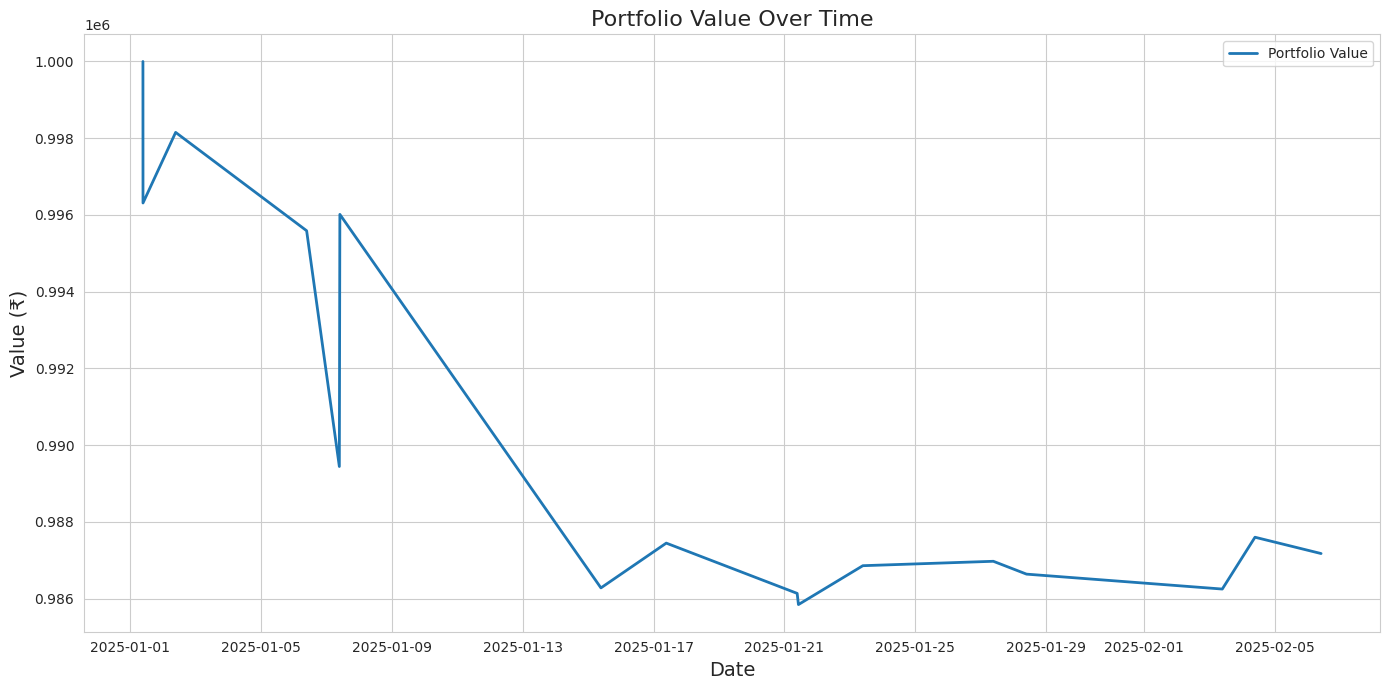

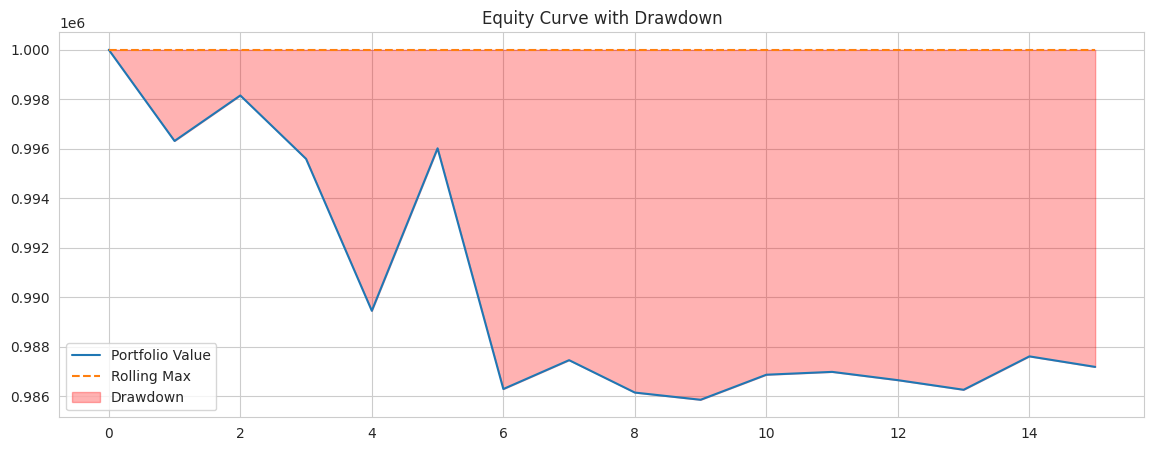

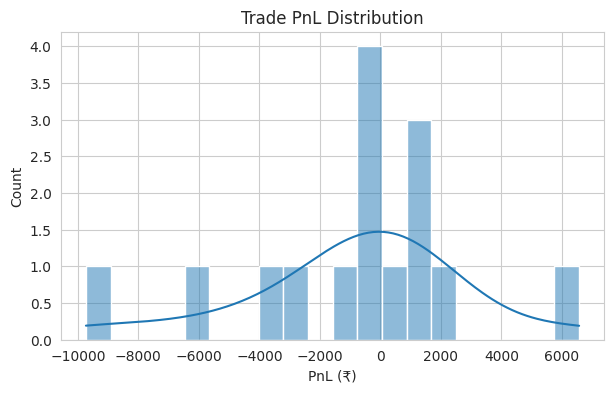

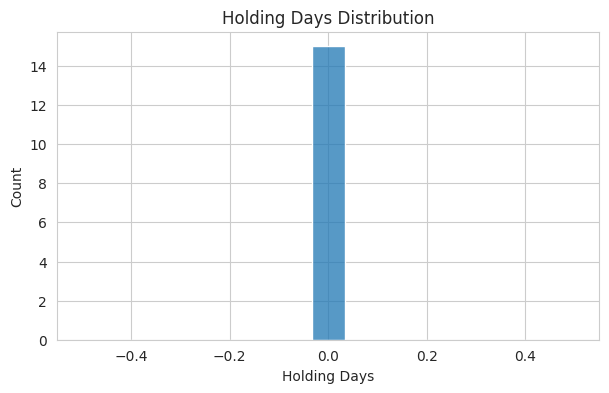

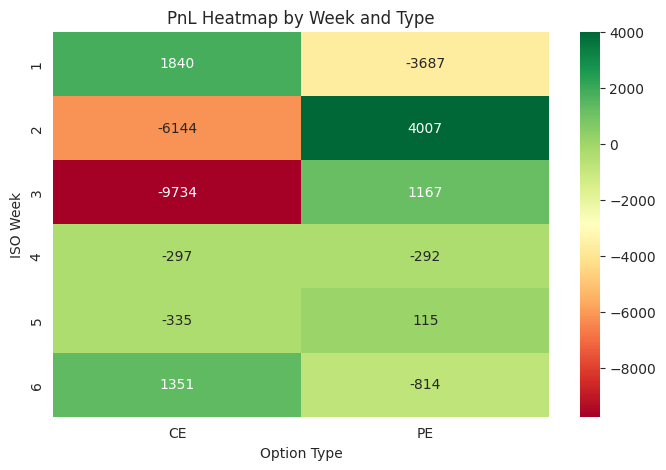

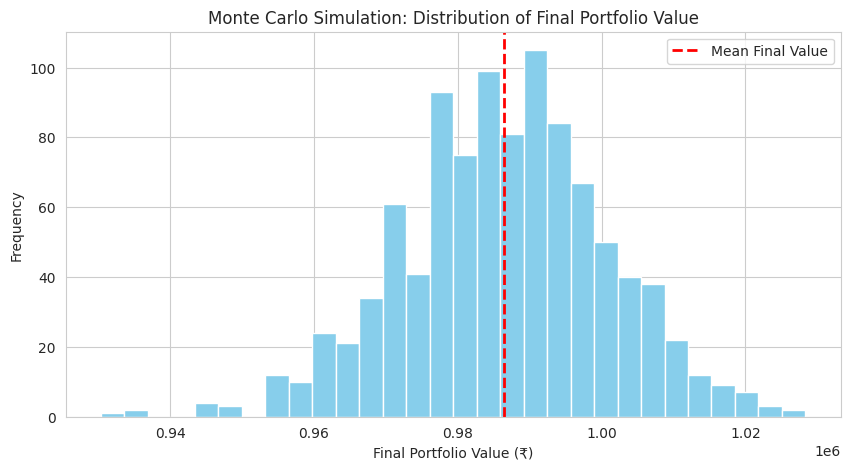

Monte Carlo: Mean Final Value = ₹986,490.09, 5th Percentile = ₹962,578.33, 95th Percentile = ₹1,009,407.34


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50
TP_PCT = 0.3  # 30% take profit (relative to entry price)
ATR_PERIOD = 10  # ATR window for trailing stop
ATR_MULTIPLIER = 2.5  # Multiplier for trailing stop
MAX_LOSS = 25000  # Maximum allowed loss per trade in INR
BROKERAGE_PER_ORDER = 20  # INR per order (entry and exit)
SLIPPAGE_PCT = 0.001  # 0.1% per side
MARKET_CLOSE_TIME = '15:25:00'  # All trades closed before this time

# VIX thresholds for dynamic risk
VIX_LOW = 13
VIX_MED = 17
RISK_LOW = 0.15
RISK_MED = 0.10
RISK_HIGH = 0.05

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals_15min():
    signals_path = '/content/drive/MyDrive/Options_Data/Nifty_50_signals_15min_50_200.csv'
    signals = pd.read_csv(signals_path, parse_dates=['date'])
    signals = signals.set_index('date')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    if 'Signal' not in signals.columns:
        signals.columns = ['Signal']
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

def load_vix():
    vix_path = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/Filtered_VIX_Jan_May_2025_1min.csv'
    vix = pd.read_csv(vix_path, parse_dates=['TimeStamp'])
    vix = vix.set_index('TimeStamp')
    vix.index = pd.to_datetime(vix.index).tz_localize('Asia/Kolkata')
    vix = vix.loc[start_date:end_date]
    return vix

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def compute_atr(df, period=ATR_PERIOD):
    high = df['High']
    low = df['Low']
    close = df['Close']
    prev_close = close.shift(1)
    tr = pd.concat([
        high - low,
        (high - prev_close).abs(),
        (low - prev_close).abs()
    ], axis=1).max(axis=1)
    atr = tr.rolling(window=period, min_periods=1).mean()
    return atr

def get_risk_per_trade(vix_value):
    if vix_value <= VIX_LOW:
        return RISK_LOW
    elif vix_value <= VIX_MED:
        return RISK_MED
    else:
        return RISK_HIGH

def execute_trades_15min_atr_trailing_vix(
    spot_data, signals, options_data, vix_data, tp_pct=TP_PCT,
    brokerage_per_order=BROKERAGE_PER_ORDER, slippage_pct=SLIPPAGE_PCT
):
    portfolio_cash = initial_capital
    trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_15min = signals.reindex(spot_data.index, method='ffill').dropna()
    vix_data = vix_data.reindex(spot_data.index, method='ffill').dropna()
    open_position = None
    prev_signal = 0

    # Pre-compute ATR for each option contract for trailing stop
    options_data['ATR'] = options_data.groupby(['Strike', 'Type', 'Expiry'])\
        .apply(lambda x: compute_atr(x, ATR_PERIOD)).reset_index(level=[0,1,2], drop=True)

    for ts, row in spot_data.iterrows():
        # Close all trades before end of session (no overnight holding)
        if ts.time() >= datetime.strptime(MARKET_CLOSE_TIME, '%H:%M:%S').time():
            if open_position is not None:
                # Close at current price
                exit_row = options_data[
                    (options_data['Strike'] == open_position['strike']) &
                    (options_data['Type'] == open_position['type']) &
                    (options_data['Expiry'].dt.date == open_position['expiry']) &
                    (options_data['TimeStamp'] >= ts)
                ].sort_values('TimeStamp')
                if not exit_row.empty:
                    exit_price = float(exit_row.iloc[0]['Close'])
                    exit_time = exit_row.iloc[0]['TimeStamp']
                    exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                    total_slippage += exit_slippage
                    total_brokerage += brokerage_per_order
                    exit_price_adj = exit_price - exit_price * slippage_pct
                    pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                    pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                    if pnl < -MAX_LOSS:
                        pnl = -MAX_LOSS
                    portfolio_cash += pnl
                    trade_log.append({
                        'entry_date': open_position['entry_date'],
                        'entry_time': open_position['entry_time'],
                        'exit_date': exit_time,
                        'action': open_position['action'],
                        'type': open_position['type'],
                        'strike': open_position['strike'],
                        'entry_price': open_position['entry_price'],
                        'exit_price': exit_price_adj,
                        'lots': open_position['lots'],
                        'pnl': pnl,
                        'holding_days': 0,
                        'spot': open_position['spot'],
                        'expiry': open_position['expiry'],
                        'exit_reason': 'EOD Close'
                    })
                    open_position = None
            continue

        if ts not in signals_15min.index or pd.isna(row['close']):
            continue
        signal = signals_15min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            prev_signal = signal
            continue

        # Get current VIX value (use 'Close' column)
        vix_val = vix_data.loc[ts, 'Close'] if ts in vix_data.index else None
        if vix_val is None or np.isnan(vix_val):
            prev_signal = signal
            continue
        risk_per_trade = get_risk_per_trade(vix_val)

        # ENTRY: Only when signal changes from prev_signal to new signal (crossover)
        if open_position is None and signal != 0 and signal != prev_signal:
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                prev_signal = signal
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                prev_signal = signal
                continue
            tp_price = entry_price * (1 + tp_pct)
            entry_slippage = entry_price * slippage_pct * lot_size * lots
            total_slippage += entry_slippage
            total_brokerage += brokerage_per_order
            entry_price_adj = entry_price + entry_price * slippage_pct  # Buy at ask
            atr = float(entry_row.iloc[0]['ATR'])
            trailing_stop = entry_price_adj - ATR_MULTIPLIER * atr
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price_adj,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'tp_price': tp_price,
                'trailing_stop': trailing_stop,
                'max_loss_stop': entry_price_adj - (MAX_LOSS / (lot_size * lots)),
                'entry_slippage': entry_slippage,
                'highest_price': entry_price_adj,
                'risk_per_trade': risk_per_trade,
                'vix_at_entry': vix_val
            }
            prev_signal = signal
            continue

        # EXIT: On trailing stop, TP, or max loss
        if open_position is not None:
            exit_reason = None
            exit_price = None
            exit_time = None

            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['Expiry'].dt.date == open_position['expiry']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')

            for _, opt_row in option_rows.iterrows():
                price = float(opt_row['Close'])
                atr = float(opt_row['ATR'])
                if price > open_position['highest_price']:
                    open_position['highest_price'] = price
                trailing_stop = open_position['highest_price'] - ATR_MULTIPLIER * atr
                open_position['trailing_stop'] = max(open_position['trailing_stop'], trailing_stop)
                if price >= open_position['tp_price']:
                    exit_price = open_position['tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Take Profit'
                    break
                elif price <= open_position['trailing_stop']:
                    exit_price = open_position['trailing_stop']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Trailing Stop'
                    break
                elif price <= open_position['max_loss_stop']:
                    exit_price = open_position['max_loss_stop']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Max Loss Stop'
                    break

            if exit_reason is None and ts.time() >= datetime.strptime(MARKET_CLOSE_TIME, '%H:%M:%S').time():
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'EOD Close'

            if exit_reason is not None and exit_price is not None:
                exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                total_slippage += exit_slippage
                total_brokerage += brokerage_per_order
                exit_price_adj = exit_price - exit_price * slippage_pct
                pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                if pnl < -MAX_LOSS:
                    pnl = -MAX_LOSS
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price_adj,
                    'lots': open_position['lots'],
                    'pnl': pnl,
                    'holding_days': 0,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason,
                    'risk_per_trade': open_position['risk_per_trade'],
                    'vix_at_entry': open_position['vix_at_entry']
                })
                open_position = None

        prev_signal = signal

    return trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading 15-min signals...")
signals = load_signals_15min()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nLoading VIX data...")
vix_data = load_vix()
print(f"VIX data shape: {vix_data.shape}")

print("\nExecuting trades 15-minutely with ATR trailing stop, TP, max loss cap, no overnight holding, and VIX-based risk management...")
trade_log, total_brokerage, total_slippage = execute_trades_15min_atr_trailing_vix(
    spot_data, signals, options_sample, vix_data
)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_15min_atr_trailing_tp_maxloss_eod_vix_50_200.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_15min_atr_trailing_tp_maxloss_eod_vix.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}
Total Brokerage:    ₹{total_brokerage:,.2f}
Total Slippage:     ₹{total_slippage:,.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()

    # --- PnL Heatmap by Week and Type ---
    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    # --- Monte Carlo Simulation ---
    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading 15-min signals...
Signals shape: (3577, 1)

Loading options sample...

Options sample loaded.

Loading VIX data...
VIX data shape: (9891, 6)

Executing trades 15-minutely with ATR trailing stop, partial/final TP, max loss cap, no overnight holding, and VIX/IVR-based risk management...


/tmp/ipython-input-1-3172230200.py:138: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: compute_atr(x, ATR_PERIOD)).reset_index(level=[0,1,2], drop=True)



Detailed trade log saved to Jan_Feb_detailed_trade_log_15min_atr_trailing_tp_partial_final_maxloss_eod_vix_ivr.csv
                 entry_date                entry_time  \
0 2025-01-02 09:15:00+05:30 2025-01-02 09:15:00+05:30   
1 2025-01-02 09:15:00+05:30 2025-01-02 09:15:00+05:30   
2 2025-01-06 09:15:00+05:30 2025-01-06 09:15:00+05:30   
3 2025-02-03 09:15:00+05:30 2025-02-03 09:15:00+05:30   
4 2025-02-03 09:15:00+05:30 2025-02-03 09:15:00+05:30   
5 2025-02-04 09:15:00+05:30 2025-02-04 09:15:00+05:30   
6 2025-02-04 09:15:00+05:30 2025-02-04 09:15:00+05:30   
7 2025-02-06 09:45:00+05:30 2025-02-06 09:45:00+05:30   
8 2025-02-06 09:45:00+05:30 2025-02-06 09:45:00+05:30   

                  exit_date action type  strike  entry_price  exit_price  \
0 2025-01-02 09:41:00+05:30    Buy   CE   23800    107.95785  130.619250   
1 2025-01-02 09:15:00+05:30    Buy   CE   23800    107.95785  121.453425   
2 2025-01-06 15:25:00+05:30    Buy   PE   24050    165.61545  449.550000   
3 2025-02

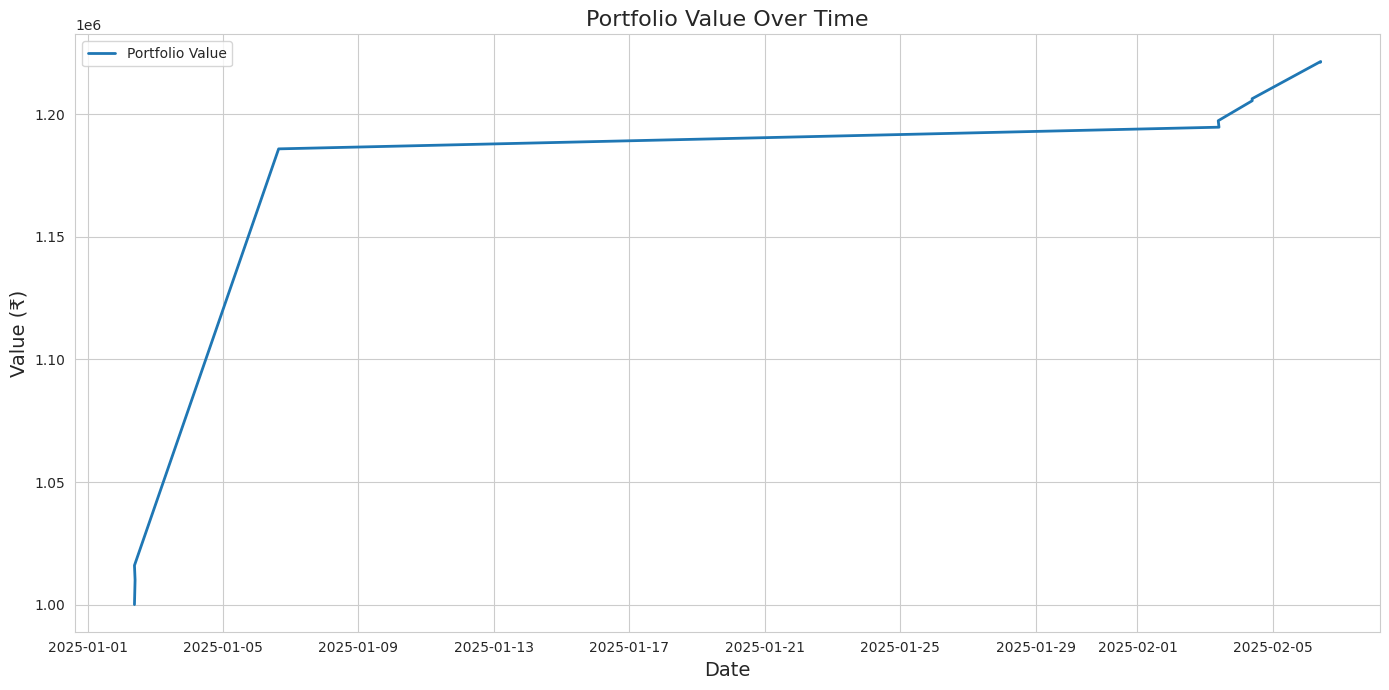

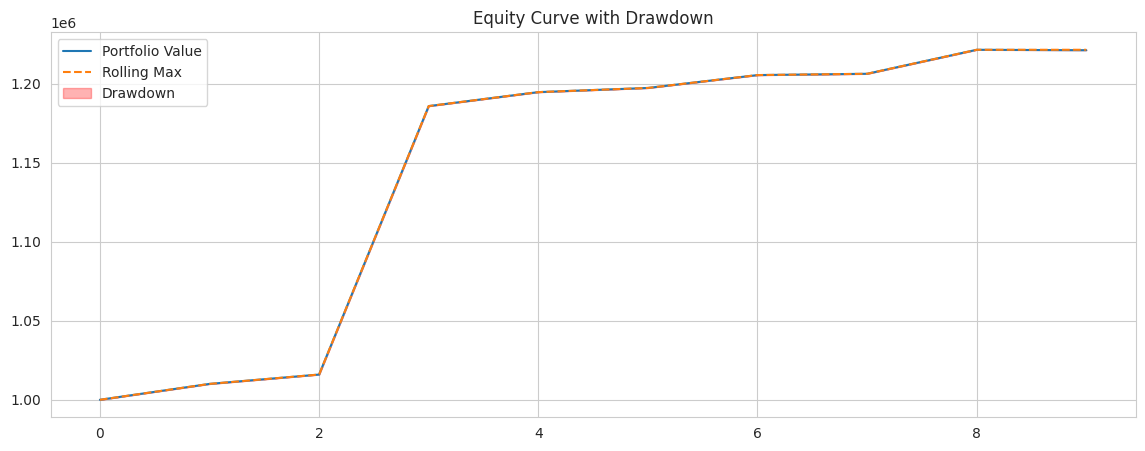

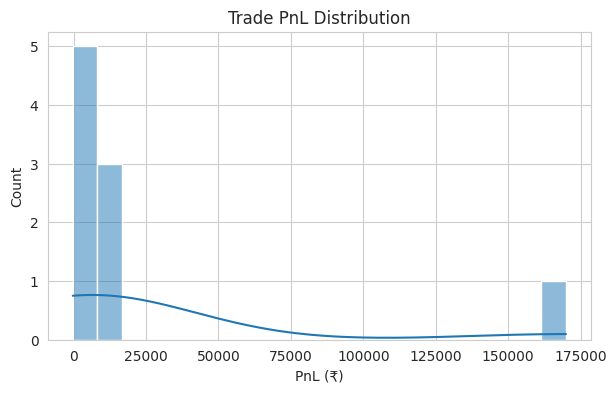

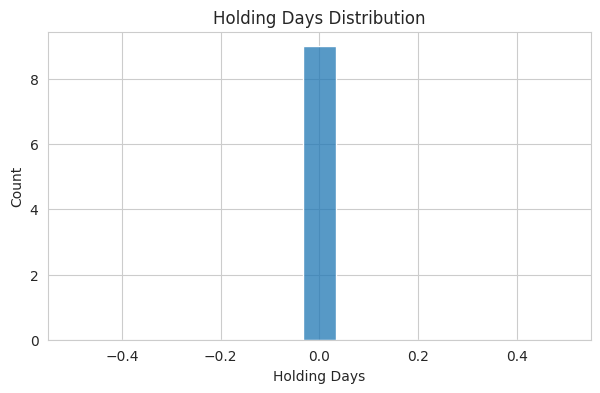

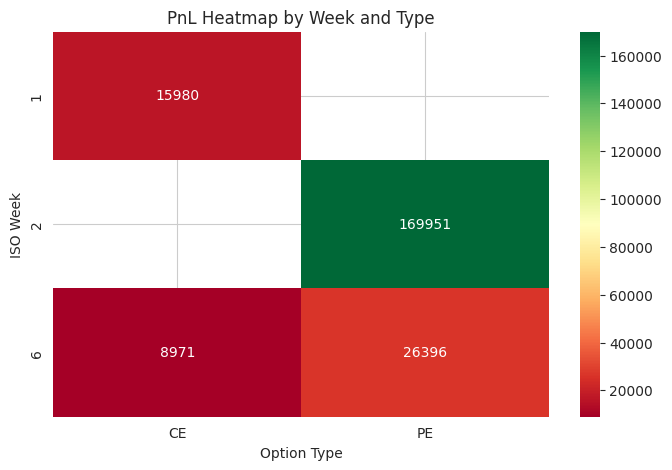

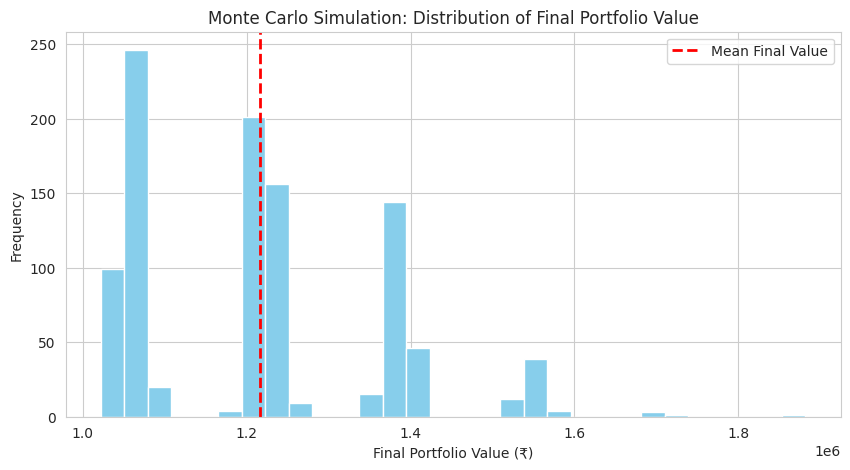

Monte Carlo: Mean Final Value = ₹1,215,994.60, 5th Percentile = ₹1,043,404.58, 95th Percentile = ₹1,536,012.34


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50

# Partial profit booking and dynamic TP
PARTIAL_TP_PCT = 0.15  # 15% for first half
FINAL_TP_PCT_LOW = 0.20  # 20% in low VIX
FINAL_TP_PCT_HIGH = 0.40  # 40% in high VIX

ATR_PERIOD = 10
ATR_MULTIPLIER = 2.5
MAX_LOSS = 25000
BROKERAGE_PER_ORDER = 20
SLIPPAGE_PCT = 0.001
MARKET_CLOSE_TIME = '15:25:00'

# VIX thresholds for dynamic risk
VIX_LOW = 13
VIX_MED = 17
RISK_LOW = 0.15
RISK_MED = 0.10
RISK_HIGH = 0.05

IVR_THRESHOLD = 40  # Only buy options when IV Rank < 40

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals_15min():
    signals_path = '/content/drive/MyDrive/Options_Data/Nifty_50_signals_15min_50_200.csv'
    signals = pd.read_csv(signals_path, parse_dates=['date'])
    signals = signals.set_index('date')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    if 'Signal' not in signals.columns:
        signals.columns = ['Signal']
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

def load_vix():
    vix_path = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/Filtered_VIX_Jan_May_2025_1min.csv'
    vix = pd.read_csv(vix_path, parse_dates=['TimeStamp'])
    vix = vix.set_index('TimeStamp')
    vix.index = pd.to_datetime(vix.index).tz_localize('Asia/Kolkata')
    vix = vix.loc[start_date:end_date]
    return vix

def compute_iv_rank(option_df, window=252):
    option_df = option_df.copy()
    option_df['IVR'] = option_df['IV'].rolling(window).apply(
        lambda x: 100 * (x[-1] - x.min()) / (x.max() - x.min()) if (x.max() - x.min()) > 0 else 0,
        raw=True
    )
    return option_df

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def compute_atr(df, period=ATR_PERIOD):
    high = df['High']
    low = df['Low']
    close = df['Close']
    prev_close = close.shift(1)
    tr = pd.concat([
        high - low,
        (high - prev_close).abs(),
        (low - prev_close).abs()
    ], axis=1).max(axis=1)
    atr = tr.rolling(window=period, min_periods=1).mean()
    return atr

def get_risk_per_trade(vix_value):
    if vix_value <= VIX_LOW:
        return RISK_LOW
    elif vix_value <= VIX_MED:
        return RISK_MED
    else:
        return RISK_HIGH

def execute_trades_15min_atr_trailing_vix(
    spot_data, signals, options_data, vix_data,
    partial_tp_pct=PARTIAL_TP_PCT, tp_pct_low=FINAL_TP_PCT_LOW, tp_pct_high=FINAL_TP_PCT_HIGH,
    brokerage_per_order=BROKERAGE_PER_ORDER, slippage_pct=SLIPPAGE_PCT
):
    portfolio_cash = initial_capital
    trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_15min = signals.reindex(spot_data.index, method='ffill').dropna()
    vix_data = vix_data.reindex(spot_data.index, method='ffill').dropna()
    open_position = None
    prev_signal = 0

    # Pre-compute ATR for each option contract for trailing stop
    options_data['ATR'] = options_data.groupby(['Strike', 'Type', 'Expiry'])\
        .apply(lambda x: compute_atr(x, ATR_PERIOD)).reset_index(level=[0,1,2], drop=True)

    # Pre-compute IV Rank for each option contract if IV available
    if 'IV' in options_data.columns:
        options_data = options_data.groupby(['Strike', 'Type', 'Expiry']).apply(compute_iv_rank).reset_index(drop=True)
    else:
        options_data['IVR'] = 0

    for ts, row in spot_data.iterrows():
        # Close all trades before end of session (no overnight holding)
        if ts.time() >= datetime.strptime(MARKET_CLOSE_TIME, '%H:%M:%S').time():
            if open_position is not None:
                # Close at current price
                exit_row = options_data[
                    (options_data['Strike'] == open_position['strike']) &
                    (options_data['Type'] == open_position['type']) &
                    (options_data['Expiry'].dt.date == open_position['expiry']) &
                    (options_data['TimeStamp'] >= ts)
                ].sort_values('TimeStamp')
                if not exit_row.empty:
                    exit_price = float(exit_row.iloc[0]['Close'])
                    exit_time = exit_row.iloc[0]['TimeStamp']
                    exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                    total_slippage += exit_slippage
                    total_brokerage += brokerage_per_order
                    exit_price_adj = exit_price - exit_price * slippage_pct
                    pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                    pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                    if pnl < -MAX_LOSS:
                        pnl = -MAX_LOSS
                    portfolio_cash += pnl
                    trade_log.append({
                        'entry_date': open_position['entry_date'],
                        'entry_time': open_position['entry_time'],
                        'exit_date': exit_time,
                        'action': open_position['action'],
                        'type': open_position['type'],
                        'strike': open_position['strike'],
                        'entry_price': open_position['entry_price'],
                        'exit_price': exit_price_adj,
                        'lots': open_position['lots'],
                        'pnl': pnl,
                        'holding_days': 0,
                        'spot': open_position['spot'],
                        'expiry': open_position['expiry'],
                        'exit_reason': 'EOD Close'
                    })
                    open_position = None
            continue

        if ts not in signals_15min.index or pd.isna(row['close']):
            continue
        signal = signals_15min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            prev_signal = signal
            continue

        # Get current VIX value (use 'Close' column)
        vix_val = vix_data.loc[ts, 'Close'] if ts in vix_data.index else None
        if vix_val is None or np.isnan(vix_val):
            prev_signal = signal
            continue

        # VIX/IVR filter: only buy when VIX < 20-day MA and IVR < 40
        vix_ma20 = vix_data['Close'].rolling(20*24*4, min_periods=1).mean().loc[ts]  # 20 days * 24 hours * 4 15-min bars
        # Get IVR for this contract at this time
        ivr = 0
        option_rows = options_data[
            (options_data['Strike'] == strike) &
            (options_data['Type'] == option_type) &
            (options_data['Expiry'].dt.date == expiry) &
            (options_data['TimeStamp'] <= ts)
        ].sort_values('TimeStamp')
        if not option_rows.empty and 'IVR' in option_rows.columns:
            ivr = float(option_rows.iloc[-1]['IVR'])
        if vix_val >= vix_ma20 or ivr >= IVR_THRESHOLD:
            prev_signal = signal
            continue

        # Dynamic TP based on VIX regime
        if vix_val <= VIX_LOW:
            final_tp_pct = tp_pct_low
        elif vix_val > VIX_MED:
            final_tp_pct = tp_pct_high
        else:
            final_tp_pct = tp_pct_low + (tp_pct_high - tp_pct_low) * ((vix_val - VIX_LOW)/(VIX_MED - VIX_LOW))

        risk_per_trade = get_risk_per_trade(vix_val)

        # ENTRY: Only when signal changes from prev_signal to new signal (crossover)
        if open_position is None and signal != 0 and signal != prev_signal:
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                prev_signal = signal
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                prev_signal = signal
                continue
            # Partial profit TP and final TP
            partial_tp_price = entry_price * (1 + partial_tp_pct)
            final_tp_price = entry_price * (1 + final_tp_pct)
            entry_slippage = entry_price * slippage_pct * lot_size * lots
            total_slippage += entry_slippage
            total_brokerage += brokerage_per_order
            entry_price_adj = entry_price + entry_price * slippage_pct  # Buy at ask
            atr = float(entry_row.iloc[0]['ATR'])
            trailing_stop = entry_price_adj - ATR_MULTIPLIER * atr
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price_adj,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'partial_tp_price': partial_tp_price,
                'final_tp_price': final_tp_price,
                'trailing_stop': trailing_stop,
                'max_loss_stop': entry_price_adj - (MAX_LOSS / (lot_size * lots)),
                'entry_slippage': entry_slippage,
                'highest_price': entry_price_adj,
                'risk_per_trade': risk_per_trade,
                'vix_at_entry': vix_val,
                'ivr_at_entry': ivr,
                'partial_booked': False,
                'partial_lots': lots // 2,
                'final_lots': lots - (lots // 2)
            }
            prev_signal = signal
            continue

        # EXIT: On partial TP, trailing stop, final TP, or max loss
        if open_position is not None:
            exit_reason = None
            exit_price = None
            exit_time = None

            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['Expiry'].dt.date == open_position['expiry']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')

            for _, opt_row in option_rows.iterrows():
                price = float(opt_row['Close'])
                atr = float(opt_row['ATR'])
                if price > open_position['highest_price']:
                    open_position['highest_price'] = price
                trailing_stop = open_position['highest_price'] - ATR_MULTIPLIER * atr
                open_position['trailing_stop'] = max(open_position['trailing_stop'], trailing_stop)
                # Partial profit booking
                if not open_position['partial_booked'] and price >= open_position['partial_tp_price']:
                    # Book half position
                    exit_slippage = price * slippage_pct * lot_size * open_position['partial_lots']
                    total_slippage += exit_slippage
                    total_brokerage += brokerage_per_order
                    exit_price_adj = price - price * slippage_pct
                    pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['partial_lots']
                    pnl -= (open_position['entry_slippage'] * (open_position['partial_lots']/open_position['lots']) + exit_slippage + 2 * brokerage_per_order)
                    if pnl < -MAX_LOSS:
                        pnl = -MAX_LOSS
                    portfolio_cash += pnl
                    trade_log.append({
                        'entry_date': open_position['entry_date'],
                        'entry_time': open_position['entry_time'],
                        'exit_date': opt_row['TimeStamp'],
                        'action': open_position['action'],
                        'type': open_position['type'],
                        'strike': open_position['strike'],
                        'entry_price': open_position['entry_price'],
                        'exit_price': exit_price_adj,
                        'lots': open_position['partial_lots'],
                        'pnl': pnl,
                        'holding_days': 0,
                        'spot': open_position['spot'],
                        'expiry': open_position['expiry'],
                        'exit_reason': 'Partial TP',
                        'risk_per_trade': open_position['risk_per_trade'],
                        'vix_at_entry': open_position['vix_at_entry'],
                        'ivr_at_entry': open_position['ivr_at_entry']
                    })
                    open_position['partial_booked'] = True
                    open_position['final_lots'] = open_position['final_lots']
                    continue  # Keep trailing the rest

                # Final TP for remaining position
                if open_position['partial_booked'] and price >= open_position['final_tp_price']:
                    exit_price = open_position['final_tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Final TP'
                    break
                # Trailing stop for remaining position
                elif open_position['partial_booked'] and price <= open_position['trailing_stop']:
                    exit_price = open_position['trailing_stop']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Trailing Stop'
                    break
                # Max loss for remaining position
                elif open_position['partial_booked'] and price <= open_position['max_loss_stop']:
                    exit_price = open_position['max_loss_stop']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Max Loss Stop'
                    break

            if exit_reason is None and open_position['partial_booked'] and ts.time() >= datetime.strptime(MARKET_CLOSE_TIME, '%H:%M:%S').time():
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'EOD Close'

            if open_position['partial_booked'] and exit_reason is not None and exit_price is not None:
                exit_slippage = exit_price * slippage_pct * lot_size * open_position['final_lots']
                total_slippage += exit_slippage
                total_brokerage += brokerage_per_order
                exit_price_adj = exit_price - exit_price * slippage_pct
                pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['final_lots']
                pnl -= (open_position['entry_slippage'] * (open_position['final_lots']/open_position['lots']) + exit_slippage + 2 * brokerage_per_order)
                if pnl < -MAX_LOSS:
                    pnl = -MAX_LOSS
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price_adj,
                    'lots': open_position['final_lots'],
                    'pnl': pnl,
                    'holding_days': 0,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason,
                    'risk_per_trade': open_position['risk_per_trade'],
                    'vix_at_entry': open_position['vix_at_entry'],
                    'ivr_at_entry': open_position['ivr_at_entry']
                })
                open_position = None

        prev_signal = signal

    return trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading 15-min signals...")
signals = load_signals_15min()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nLoading VIX data...")
vix_data = load_vix()
print(f"VIX data shape: {vix_data.shape}")

print("\nExecuting trades 15-minutely with ATR trailing stop, partial/final TP, max loss cap, no overnight holding, and VIX/IVR-based risk management...")
trade_log, total_brokerage, total_slippage = execute_trades_15min_atr_trailing_vix(
    spot_data, signals, options_sample, vix_data
)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_15min_atr_trailing_tp_partial_final_maxloss_eod_vix_ivr.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_15min_atr_trailing_tp_partial_final_maxloss_eod_vix_ivr.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}
Total Brokerage:    ₹{total_brokerage:,.2f}
Total Slippage:     ₹{total_slippage:,.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()

    # --- PnL Heatmap by Week and Type ---
    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    # --- Monte Carlo Simulation ---
    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading 1-min signals...
Signals shape: (53655, 1)

Loading options sample...

Options sample loaded.

Loading VIX data...
VIX data shape: (9891, 6)

Executing trades 1-min with ATR trailing stop, partial/final TP, max loss cap, no overnight holding, and VIX/IVR-based risk management...


/tmp/ipython-input-1-722040068.py:136: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: compute_atr(x, ATR_PERIOD)).reset_index(level=[0,1,2], drop=True)



Detailed trade log saved to Jan_Feb_detailed_trade_log_1min_atr_trailing_tp_partial_final_maxloss_eod_vix_ivr.csv
                 entry_date                entry_time  \
0 2025-01-01 10:42:00+05:30 2025-01-01 10:42:00+05:30   
1 2025-01-01 10:42:00+05:30 2025-01-01 10:42:00+05:30   
2 2025-01-01 15:22:00+05:30 2025-01-01 15:22:00+05:30   
3 2025-01-02 10:05:00+05:30 2025-01-02 10:05:00+05:30   
4 2025-01-02 10:05:00+05:30 2025-01-02 10:05:00+05:30   
5 2025-01-03 09:15:00+05:30 2025-01-03 09:15:00+05:30   
6 2025-01-03 09:15:00+05:30 2025-01-03 09:15:00+05:30   
7 2025-01-03 11:45:00+05:30 2025-01-03 11:45:00+05:30   
8 2025-01-09 10:22:00+05:30 2025-01-09 10:22:00+05:30   
9 2025-02-01 09:15:00+05:30 2025-02-03 09:15:00+05:30   

                  exit_date action type  strike  entry_price  exit_price  \
0 2025-01-01 10:48:00+05:30    Buy   CE   23650    151.75160  178.771050   
1 2025-01-01 10:49:00+05:30    Buy   CE   23650    151.75160  193.475331   
2 2025-01-01 15:25:00+05:30  

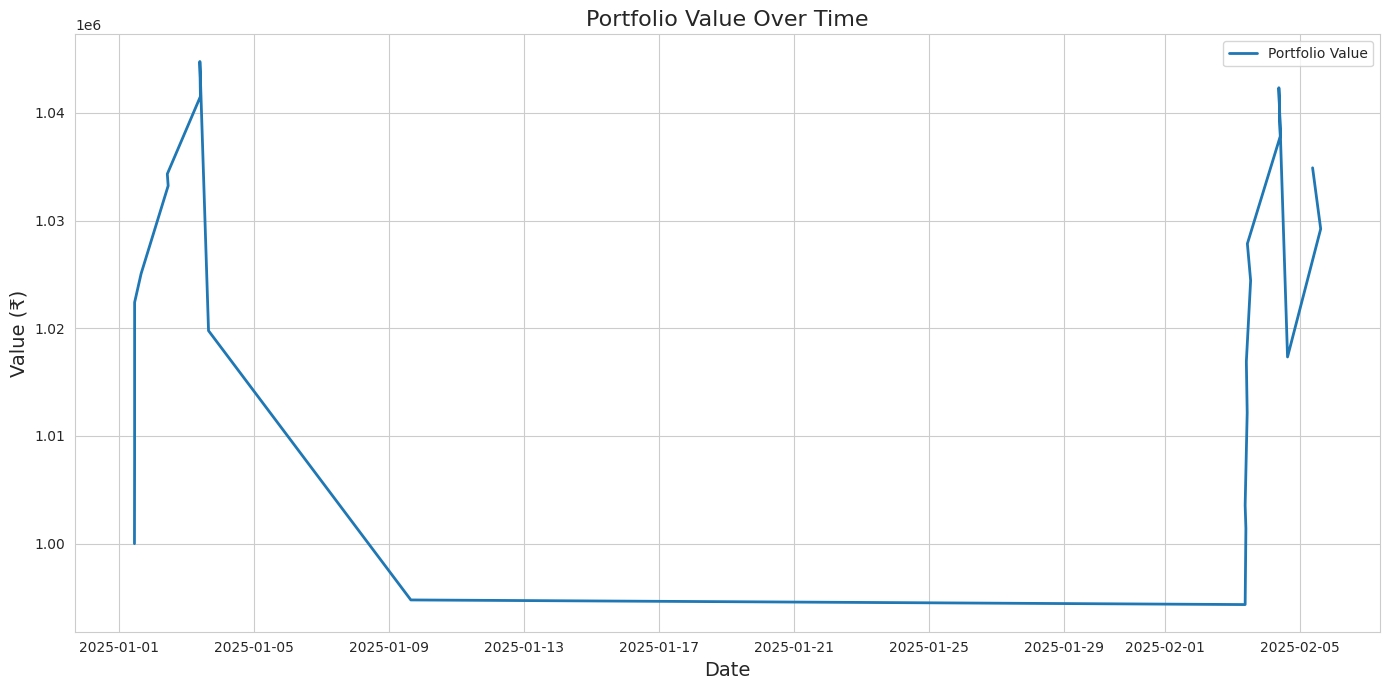

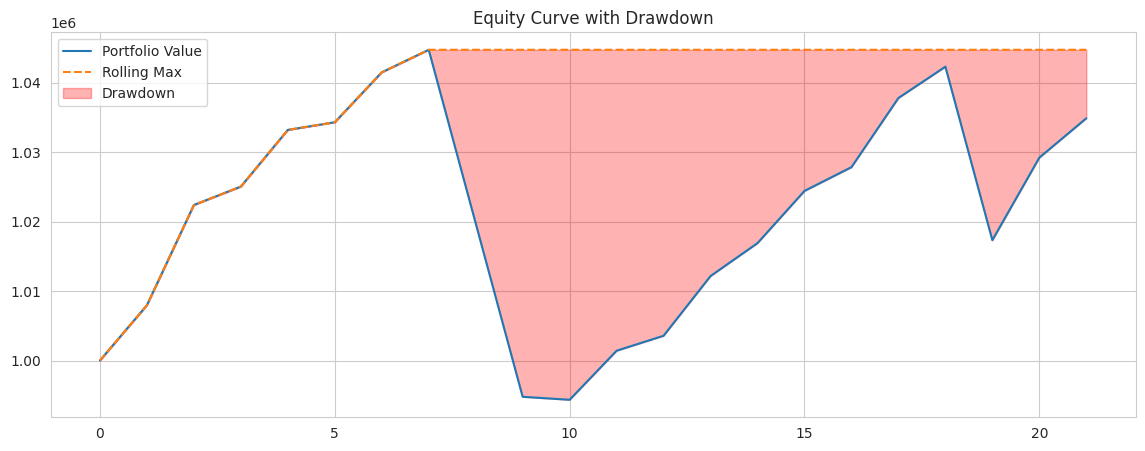

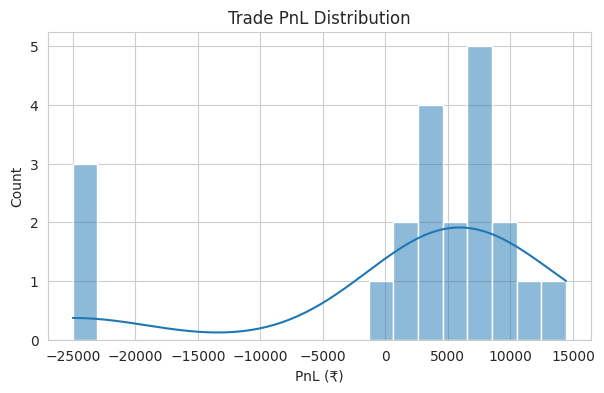

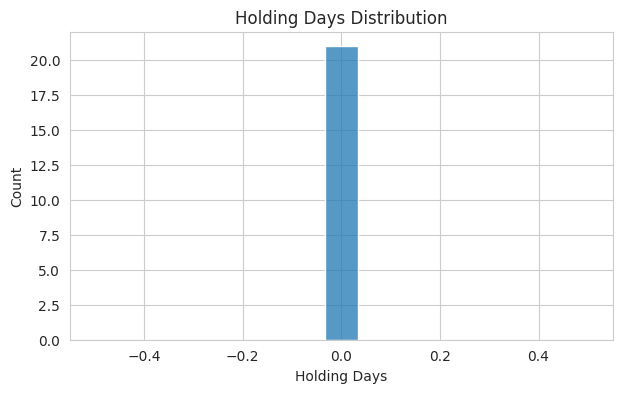

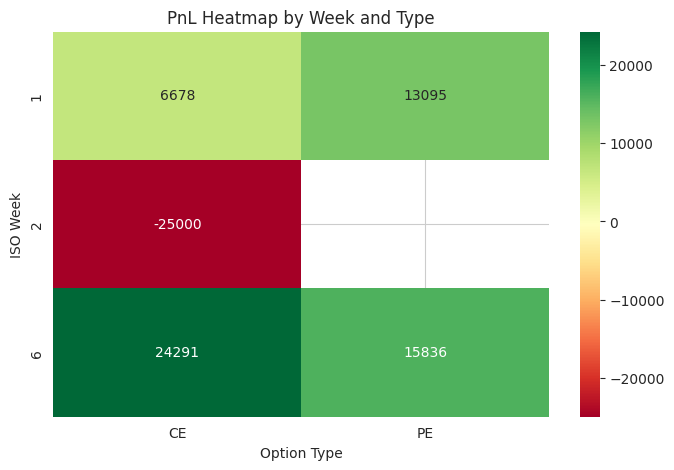

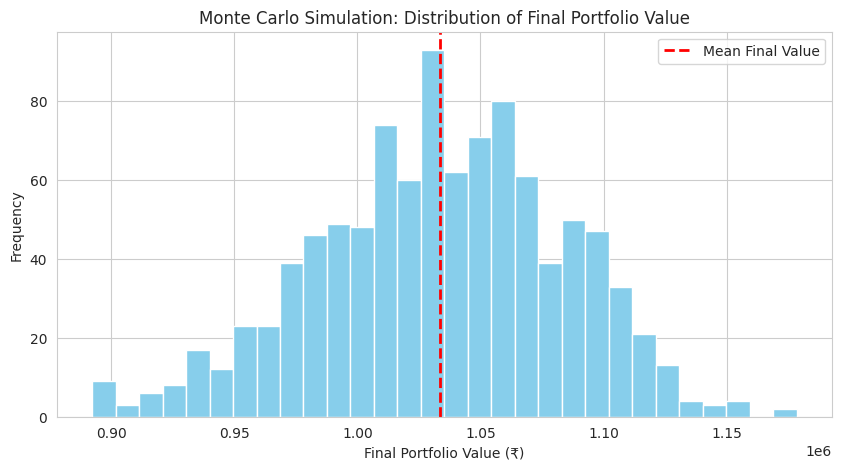

Monte Carlo: Mean Final Value = ₹1,033,403.66, 5th Percentile = ₹945,520.84, 95th Percentile = ₹1,111,043.99


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50

PARTIAL_TP_PCT = 0.15
FINAL_TP_PCT_LOW = 0.20
FINAL_TP_PCT_HIGH = 0.40

ATR_PERIOD = 10        # 10 minutes for 1-min bars
ATR_MULTIPLIER = 2.5
MAX_LOSS = 25000
BROKERAGE_PER_ORDER = 20
SLIPPAGE_PCT = 0.001
MARKET_CLOSE_TIME = '15:25:00'

VIX_LOW = 13
VIX_MED = 17
RISK_LOW = 0.15
RISK_MED = 0.10
RISK_HIGH = 0.05

IVR_THRESHOLD = 40

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals_1min():
    signals_path = '/content/drive/MyDrive/Options_Data/Nifty_50_signals_1min_50_200.csv'
    signals = pd.read_csv(signals_path, parse_dates=['date'])
    signals = signals.set_index('date')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    if 'Signal' not in signals.columns:
        signals.columns = ['Signal']
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

def load_vix():
    vix_path = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/Filtered_VIX_Jan_May_2025_1min.csv'
    vix = pd.read_csv(vix_path, parse_dates=['TimeStamp'])
    vix = vix.set_index('TimeStamp')
    vix.index = pd.to_datetime(vix.index).tz_localize('Asia/Kolkata')
    vix = vix.loc[start_date:end_date]
    return vix

def compute_iv_rank(option_df, window=252):
    option_df = option_df.copy()
    option_df['IVR'] = option_df['IV'].rolling(window).apply(
        lambda x: 100 * (x[-1] - x.min()) / (x.max() - x.min()) if (x.max() - x.min()) > 0 else 0,
        raw=True
    )
    return option_df

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def compute_atr(df, period=ATR_PERIOD):
    high = df['High']
    low = df['Low']
    close = df['Close']
    prev_close = close.shift(1)
    tr = pd.concat([
        high - low,
        (high - prev_close).abs(),
        (low - prev_close).abs()
    ], axis=1).max(axis=1)
    atr = tr.rolling(window=period, min_periods=1).mean()
    return atr

def get_risk_per_trade(vix_value):
    if vix_value <= VIX_LOW:
        return RISK_LOW
    elif vix_value <= VIX_MED:
        return RISK_MED
    else:
        return RISK_HIGH

def execute_trades_1min_atr_trailing_vix(
    spot_data, signals, options_data, vix_data,
    partial_tp_pct=PARTIAL_TP_PCT, tp_pct_low=FINAL_TP_PCT_LOW, tp_pct_high=FINAL_TP_PCT_HIGH,
    brokerage_per_order=BROKERAGE_PER_ORDER, slippage_pct=SLIPPAGE_PCT
):
    portfolio_cash = initial_capital
    trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_1min = signals.reindex(spot_data.index, method='ffill').dropna()
    vix_data = vix_data.reindex(spot_data.index, method='ffill').dropna()
    open_position = None
    prev_signal = 0

    # Pre-compute ATR for each option contract for trailing stop
    options_data['ATR'] = options_data.groupby(['Strike', 'Type', 'Expiry'])\
        .apply(lambda x: compute_atr(x, ATR_PERIOD)).reset_index(level=[0,1,2], drop=True)

    # Pre-compute IV Rank for each option contract if IV available
    if 'IV' in options_data.columns:
        options_data = options_data.groupby(['Strike', 'Type', 'Expiry']).apply(compute_iv_rank).reset_index(drop=True)
    else:
        options_data['IVR'] = 0

    for ts, row in spot_data.iterrows():
        # Close all trades before end of session (no overnight holding)
        if ts.time() >= datetime.strptime(MARKET_CLOSE_TIME, '%H:%M:%S').time():
            if open_position is not None:
                # Close at current price
                exit_row = options_data[
                    (options_data['Strike'] == open_position['strike']) &
                    (options_data['Type'] == open_position['type']) &
                    (options_data['Expiry'].dt.date == open_position['expiry']) &
                    (options_data['TimeStamp'] >= ts)
                ].sort_values('TimeStamp')
                if not exit_row.empty:
                    exit_price = float(exit_row.iloc[0]['Close'])
                    exit_time = exit_row.iloc[0]['TimeStamp']
                    exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                    total_slippage += exit_slippage
                    total_brokerage += brokerage_per_order
                    exit_price_adj = exit_price - exit_price * slippage_pct
                    pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                    pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                    if pnl < -MAX_LOSS:
                        pnl = -MAX_LOSS
                    portfolio_cash += pnl
                    trade_log.append({
                        'entry_date': open_position['entry_date'],
                        'entry_time': open_position['entry_time'],
                        'exit_date': exit_time,
                        'action': open_position['action'],
                        'type': open_position['type'],
                        'strike': open_position['strike'],
                        'entry_price': open_position['entry_price'],
                        'exit_price': exit_price_adj,
                        'lots': open_position['lots'],
                        'pnl': pnl,
                        'holding_days': 0,
                        'spot': open_position['spot'],
                        'expiry': open_position['expiry'],
                        'exit_reason': 'EOD Close'
                    })
                    open_position = None
            continue

        if ts not in signals_1min.index or pd.isna(row['close']):
            continue
        signal = signals_1min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            prev_signal = signal
            continue
        vix_val = vix_data.loc[ts, 'Close'] if ts in vix_data.index else None
        if vix_val is None or np.isnan(vix_val):
            prev_signal = signal
            continue

        vix_ma20 = vix_data['Close'].rolling(20*390, min_periods=1).mean().loc[ts]  # 20 days * 390 min/day
        ivr = 0
        option_rows = options_data[
            (options_data['Strike'] == strike) &
            (options_data['Type'] == option_type) &
            (options_data['Expiry'].dt.date == expiry) &
            (options_data['TimeStamp'] <= ts)
        ].sort_values('TimeStamp')
        if not option_rows.empty and 'IVR' in option_rows.columns:
            ivr = float(option_rows.iloc[-1]['IVR'])
        if vix_val >= vix_ma20 or ivr >= IVR_THRESHOLD:
            prev_signal = signal
            continue

        if vix_val <= VIX_LOW:
            final_tp_pct = tp_pct_low
        elif vix_val > VIX_MED:
            final_tp_pct = tp_pct_high
        else:
            final_tp_pct = tp_pct_low + (tp_pct_high - tp_pct_low) * ((vix_val - VIX_LOW)/(VIX_MED - VIX_LOW))

        risk_per_trade = get_risk_per_trade(vix_val)

        if open_position is None and signal != 0 and signal != prev_signal:
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                prev_signal = signal
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                prev_signal = signal
                continue
            partial_tp_price = entry_price * (1 + partial_tp_pct)
            final_tp_price = entry_price * (1 + final_tp_pct)
            entry_slippage = entry_price * slippage_pct * lot_size * lots
            total_slippage += entry_slippage
            total_brokerage += brokerage_per_order
            entry_price_adj = entry_price + entry_price * slippage_pct
            atr = float(entry_row.iloc[0]['ATR'])
            trailing_stop = entry_price_adj - ATR_MULTIPLIER * atr
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price_adj,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'partial_tp_price': partial_tp_price,
                'final_tp_price': final_tp_price,
                'trailing_stop': trailing_stop,
                'max_loss_stop': entry_price_adj - (MAX_LOSS / (lot_size * lots)),
                'entry_slippage': entry_slippage,
                'highest_price': entry_price_adj,
                'risk_per_trade': risk_per_trade,
                'vix_at_entry': vix_val,
                'ivr_at_entry': ivr,
                'partial_booked': False,
                'partial_lots': lots // 2,
                'final_lots': lots - (lots // 2)
            }
            prev_signal = signal
            continue

        if open_position is not None:
            exit_reason = None
            exit_price = None
            exit_time = None

            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['Expiry'].dt.date == open_position['expiry']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')
            for _, opt_row in option_rows.iterrows():
                price = float(opt_row['Close'])
                atr = float(opt_row['ATR'])
                if price > open_position['highest_price']:
                    open_position['highest_price'] = price
                trailing_stop = open_position['highest_price'] - ATR_MULTIPLIER * atr
                open_position['trailing_stop'] = max(open_position['trailing_stop'], trailing_stop)
                if not open_position['partial_booked'] and price >= open_position['partial_tp_price']:
                    exit_slippage = price * slippage_pct * lot_size * open_position['partial_lots']
                    total_slippage += exit_slippage
                    total_brokerage += brokerage_per_order
                    exit_price_adj = price - price * slippage_pct
                    pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['partial_lots']
                    pnl -= (open_position['entry_slippage'] * (open_position['partial_lots']/open_position['lots']) + exit_slippage + 2 * brokerage_per_order)
                    if pnl < -MAX_LOSS:
                        pnl = -MAX_LOSS
                    portfolio_cash += pnl
                    trade_log.append({
                        'entry_date': open_position['entry_date'],
                        'entry_time': open_position['entry_time'],
                        'exit_date': opt_row['TimeStamp'],
                        'action': open_position['action'],
                        'type': open_position['type'],
                        'strike': open_position['strike'],
                        'entry_price': open_position['entry_price'],
                        'exit_price': exit_price_adj,
                        'lots': open_position['partial_lots'],
                        'pnl': pnl,
                        'holding_days': 0,
                        'spot': open_position['spot'],
                        'expiry': open_position['expiry'],
                        'exit_reason': 'Partial TP',
                        'risk_per_trade': open_position['risk_per_trade'],
                        'vix_at_entry': open_position['vix_at_entry'],
                        'ivr_at_entry': open_position['ivr_at_entry']
                    })
                    open_position['partial_booked'] = True
                    open_position['final_lots'] = open_position['final_lots']
                    continue

                if open_position['partial_booked'] and price >= open_position['final_tp_price']:
                    exit_price = open_position['final_tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Final TP'
                    break
                elif open_position['partial_booked'] and price <= open_position['trailing_stop']:
                    exit_price = open_position['trailing_stop']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Trailing Stop'
                    break
                elif open_position['partial_booked'] and price <= open_position['max_loss_stop']:
                    exit_price = open_position['max_loss_stop']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Max Loss Stop'
                    break

            if exit_reason is None and open_position['partial_booked'] and ts.time() >= datetime.strptime(MARKET_CLOSE_TIME, '%H:%M:%S').time():
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'EOD Close'

            if open_position['partial_booked'] and exit_reason is not None and exit_price is not None:
                exit_slippage = exit_price * slippage_pct * lot_size * open_position['final_lots']
                total_slippage += exit_slippage
                total_brokerage += brokerage_per_order
                exit_price_adj = exit_price - exit_price * slippage_pct
                pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['final_lots']
                pnl -= (open_position['entry_slippage'] * (open_position['final_lots']/open_position['lots']) + exit_slippage + 2 * brokerage_per_order)
                if pnl < -MAX_LOSS:
                    pnl = -MAX_LOSS
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price_adj,
                    'lots': open_position['final_lots'],
                    'pnl': pnl,
                    'holding_days': 0,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason,
                    'risk_per_trade': open_position['risk_per_trade'],
                    'vix_at_entry': open_position['vix_at_entry'],
                    'ivr_at_entry': open_position['ivr_at_entry']
                })
                open_position = None

        prev_signal = signal

    return trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading 1-min signals...")
signals = load_signals_1min()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nLoading VIX data...")
vix_data = load_vix()
print(f"VIX data shape: {vix_data.shape}")

print("\nExecuting trades 1-min with ATR trailing stop, partial/final TP, max loss cap, no overnight holding, and VIX/IVR-based risk management...")
trade_log, total_brokerage, total_slippage = execute_trades_1min_atr_trailing_vix(
    spot_data, signals, options_sample, vix_data
)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_1min_atr_trailing_tp_partial_final_maxloss_eod_vix_ivr.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_1min_atr_trailing_tp_partial_final_maxloss_eod_vix_ivr.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}
Total Brokerage:    ₹{total_brokerage:,.2f}
Total Slippage:     ₹{total_slippage:,.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()

    # --- PnL Heatmap by Week and Type ---
    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    # --- Monte Carlo Simulation ---
    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading spot data...
Spot data shape: (10875, 5)

Loading 1-min signals...
Signals shape: (53655, 1)

Loading options sample...

Options sample loaded.

Loading VIX data...
VIX data shape: (9891, 6)

Executing trades 1-min with ATR trailing stop, partial/final TP, max loss cap, no overnight holding, and VIX/IVR-based risk management...


/tmp/ipython-input-2-3356815926.py:140: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: compute_atr(x, ATR_PERIOD)).reset_index(level=[0,1,2], drop=True)



Detailed trade log saved to Jan_Feb_detailed_trade_log_1min_atr_trailing_tp_partial_final_maxloss_eod_vix_ivr.csv
                 entry_date                entry_time  \
0 2025-01-01 10:42:00+05:30 2025-01-01 10:42:00+05:30   
1 2025-01-01 10:42:00+05:30 2025-01-01 10:42:00+05:30   
2 2025-01-01 15:22:00+05:30 2025-01-01 15:22:00+05:30   
3 2025-01-02 10:05:00+05:30 2025-01-02 10:05:00+05:30   
4 2025-01-02 10:05:00+05:30 2025-01-02 10:05:00+05:30   
5 2025-01-03 09:15:00+05:30 2025-01-03 09:15:00+05:30   
6 2025-01-03 09:15:00+05:30 2025-01-03 09:15:00+05:30   
7 2025-01-03 11:45:00+05:30 2025-01-03 11:45:00+05:30   
8 2025-01-09 10:22:00+05:30 2025-01-09 10:22:00+05:30   
9 2025-02-01 09:15:00+05:30 2025-02-03 09:15:00+05:30   

                  exit_date action type  strike  entry_price  exit_price  \
0 2025-01-01 10:48:00+05:30    Buy   CE   23650    151.75160  178.771050   
1 2025-01-01 10:49:00+05:30    Buy   CE   23650    151.75160  193.475331   
2 2025-01-01 15:25:00+05:30  

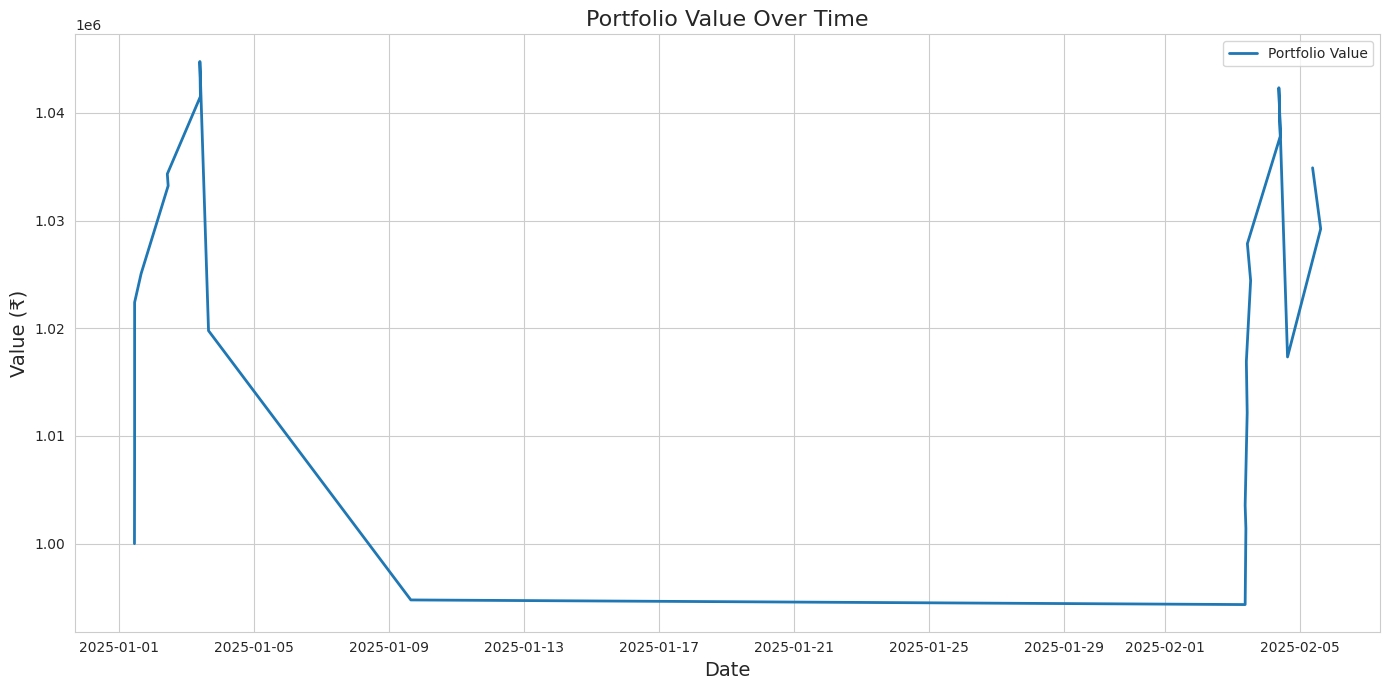

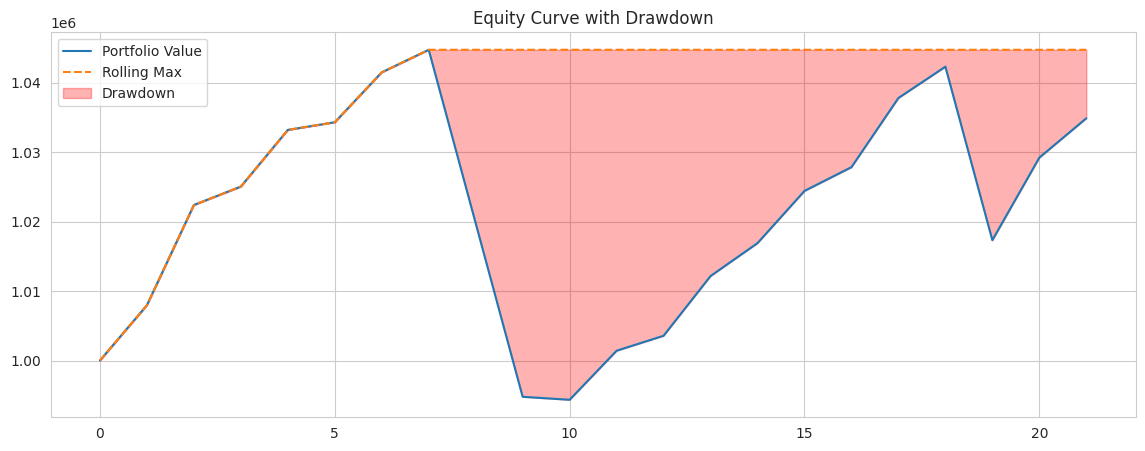

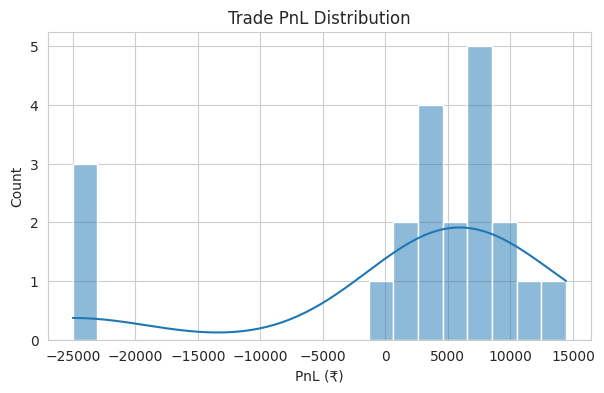

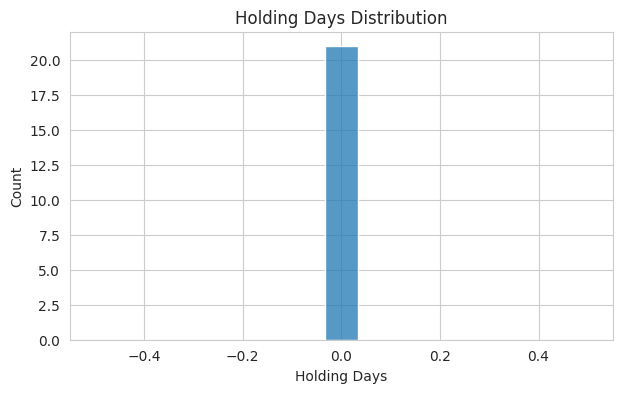

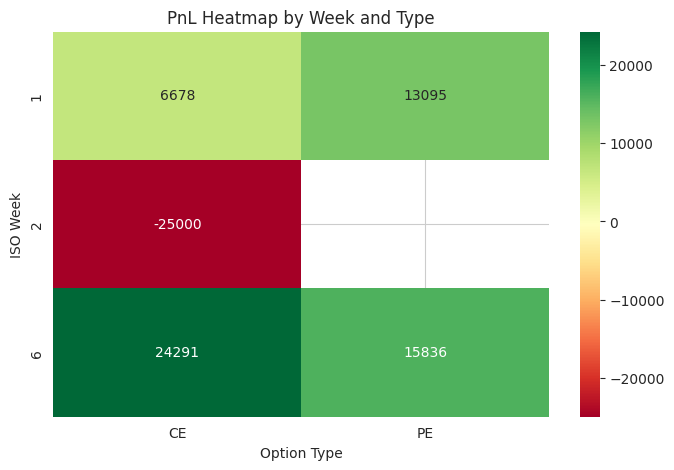

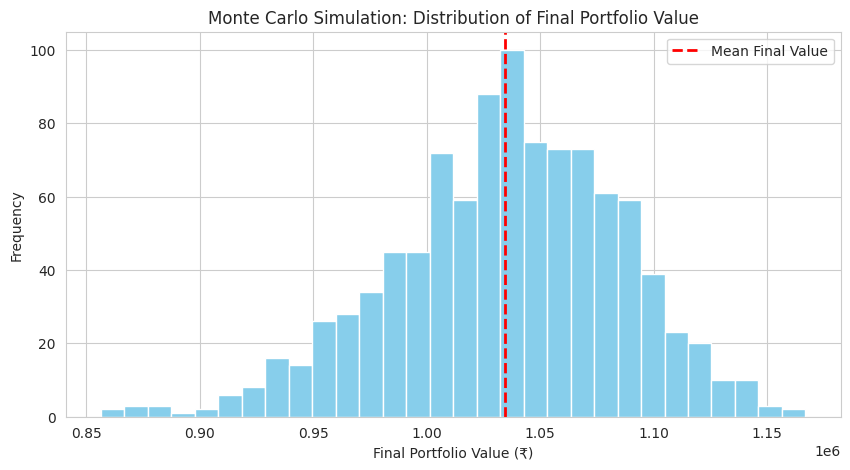

Monte Carlo: Mean Final Value = ₹1,034,723.72, 5th Percentile = ₹945,419.71, 95th Percentile = ₹1,112,880.93


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2025-01-01'
end_date = '2025-02-07'
initial_capital = 1_000_000
lot_size = 50

PARTIAL_TP_PCT = 0.15
FINAL_TP_PCT_LOW = 0.20
FINAL_TP_PCT_HIGH = 0.40

ATR_PERIOD = 10
ATR_MULTIPLIER = 2.5
MAX_LOSS = 25000
BROKERAGE_PER_ORDER = 20
SLIPPAGE_PCT = 0.001
MARKET_CLOSE_TIME = '15:25:00'

VIX_LOW = 13
VIX_MED = 17
RISK_LOW = 0.15
RISK_MED = 0.10
RISK_HIGH = 0.05

IVR_THRESHOLD = 40

# ======================================================================
# DATA LOADING
# ======================================================================
def load_spot():
    df = pd.read_csv('/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jan_Feb_2025.csv', parse_dates=['date'])
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
    df = df.loc[start_date:end_date]
    return df

def load_signals_1min():
    signals_path = '/content/drive/MyDrive/Options_Data/Nifty_50_signals_1min_50_200.csv'
    signals = pd.read_csv(signals_path, parse_dates=['date'])
    signals = signals.set_index('date')
    if signals.index.tz is None:
        signals.index = pd.to_datetime(signals.index).tz_localize('Asia/Kolkata')
    else:
        signals.index = signals.index.tz_convert('Asia/Kolkata')
    if 'Signal' not in signals.columns:
        signals.columns = ['Signal']
    return signals

def load_options_sample():
    sample_path = '/content/drive/MyDrive/Options_Data/Jan_Feb_options_sample_ALL_EXPIRIES.csv'
    options_sample = pd.read_csv(sample_path)
    options_sample['TimeStamp'] = pd.to_datetime(options_sample['TimeStamp'])
    if options_sample['TimeStamp'].dt.tz is None:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_localize('Asia/Kolkata')
    else:
        options_sample['TimeStamp'] = options_sample['TimeStamp'].dt.tz_convert('Asia/Kolkata')
    options_sample['Expiry'] = pd.to_datetime(options_sample['Expiry'])
    return options_sample

def load_vix():
    vix_path = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/Filtered_VIX_Jan_May_2025_1min.csv'
    vix = pd.read_csv(vix_path, parse_dates=['TimeStamp'])
    vix = vix.set_index('TimeStamp')
    vix.index = pd.to_datetime(vix.index).tz_localize('Asia/Kolkata')
    vix = vix.loc[start_date:end_date]
    return vix

def compute_iv_rank(option_df, window=252):
    option_df = option_df.copy()
    option_df['IVR'] = option_df['IV'].rolling(window).apply(
        lambda x: 100 * (x[-1] - x.min()) / (x.max() - x.min()) if (x.max() - x.min()) > 0 else 0,
        raw=True
    )
    return option_df

# ======================================================================
# STRATEGY LOGIC
# ======================================================================
def get_nearest_strike(strikes, target):
    return min(strikes, key=lambda x: abs(x - target))

def get_nearest_expiry(expiry_list, ts):
    future_expiries = [e for e in expiry_list if e >= ts.date()]
    return min(future_expiries) if future_expiries else None

def compute_atr(df, period=ATR_PERIOD):
    high = df['High']
    low = df['Low']
    close = df['Close']
    prev_close = close.shift(1)
    tr = pd.concat([
        high - low,
        (high - prev_close).abs(),
        (low - prev_close).abs()
    ], axis=1).max(axis=1)
    atr = tr.rolling(window=period, min_periods=1).mean()
    return atr

def get_risk_per_trade(vix_value):
    if vix_value <= VIX_LOW:
        return RISK_LOW
    elif vix_value <= VIX_MED:
        return RISK_MED
    else:
        return RISK_HIGH

def execute_trades_1min_atr_trailing_vix(
    spot_data, signals, options_data, vix_data,
    partial_tp_pct=PARTIAL_TP_PCT, tp_pct_low=FINAL_TP_PCT_LOW, tp_pct_high=FINAL_TP_PCT_HIGH,
    brokerage_per_order=BROKERAGE_PER_ORDER, slippage_pct=SLIPPAGE_PCT
):
    portfolio_cash = initial_capital
    trade_log = []
    total_brokerage = 0
    total_slippage = 0
    available_strikes = np.sort(options_data['Strike'].unique())
    expiry_list = sorted(options_data['Expiry'].dt.date.unique())
    signals_1min = signals.reindex(spot_data.index, method='ffill').dropna()
    vix_data = vix_data.reindex(spot_data.index, method='ffill').dropna()
    open_position = None
    prev_signal = 0

    # --- New for lot limiting logic ---
    previous_entry_price = None
    max_profitable_lots = 0

    # Pre-compute ATR for each option contract for trailing stop
    options_data['ATR'] = options_data.groupby(['Strike', 'Type', 'Expiry'])\
        .apply(lambda x: compute_atr(x, ATR_PERIOD)).reset_index(level=[0,1,2], drop=True)

    # Pre-compute IV Rank for each option contract if IV available
    if 'IV' in options_data.columns:
        options_data = options_data.groupby(['Strike', 'Type', 'Expiry']).apply(compute_iv_rank).reset_index(drop=True)
    else:
        options_data['IVR'] = 0

    for ts, row in spot_data.iterrows():
        # Close all trades before end of session (no overnight holding)
        if ts.time() >= datetime.strptime(MARKET_CLOSE_TIME, '%H:%M:%S').time():
            if open_position is not None:
                # Close at current price
                exit_row = options_data[
                    (options_data['Strike'] == open_position['strike']) &
                    (options_data['Type'] == open_position['type']) &
                    (options_data['Expiry'].dt.date == open_position['expiry']) &
                    (options_data['TimeStamp'] >= ts)
                ].sort_values('TimeStamp')
                if not exit_row.empty:
                    exit_price = float(exit_row.iloc[0]['Close'])
                    exit_time = exit_row.iloc[0]['TimeStamp']
                    exit_slippage = exit_price * slippage_pct * lot_size * open_position['lots']
                    total_slippage += exit_slippage
                    total_brokerage += brokerage_per_order
                    exit_price_adj = exit_price - exit_price * slippage_pct
                    pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['lots']
                    pnl -= (open_position['entry_slippage'] + exit_slippage + 2 * brokerage_per_order)
                    if pnl < -MAX_LOSS:
                        pnl = -MAX_LOSS
                    portfolio_cash += pnl
                    trade_log.append({
                        'entry_date': open_position['entry_date'],
                        'entry_time': open_position['entry_time'],
                        'exit_date': exit_time,
                        'action': open_position['action'],
                        'type': open_position['type'],
                        'strike': open_position['strike'],
                        'entry_price': open_position['entry_price'],
                        'exit_price': exit_price_adj,
                        'lots': open_position['lots'],
                        'pnl': pnl,
                        'holding_days': 0,
                        'spot': open_position['spot'],
                        'expiry': open_position['expiry'],
                        'exit_reason': 'EOD Close'
                    })
                    # Update max_profitable_lots if this was profitable
                    if pnl > 0:
                        max_profitable_lots = max(max_profitable_lots, open_position['lots'])
                    open_position = None
            continue

        if ts not in signals_1min.index or pd.isna(row['close']):
            continue
        signal = signals_1min.loc[ts, 'Signal']
        spot_price = row['close']
        atm_strike = int(round(spot_price / 50) * 50)
        strike = get_nearest_strike(available_strikes, atm_strike)
        option_type = 'CE' if signal == 1 else 'PE'
        expiry = get_nearest_expiry(expiry_list, ts)
        if expiry is None:
            prev_signal = signal
            continue
        vix_val = vix_data.loc[ts, 'Close'] if ts in vix_data.index else None
        if vix_val is None or np.isnan(vix_val):
            prev_signal = signal
            continue
        vix_ma20 = vix_data['Close'].rolling(20*390, min_periods=1).mean().loc[ts]
        ivr = 0
        option_rows = options_data[
            (options_data['Strike'] == strike) &
            (options_data['Type'] == option_type) &
            (options_data['Expiry'].dt.date == expiry) &
            (options_data['TimeStamp'] <= ts)
        ].sort_values('TimeStamp')
        if not option_rows.empty and 'IVR' in option_rows.columns:
            ivr = float(option_rows.iloc[-1]['IVR'])
        if vix_val >= vix_ma20 or ivr >= IVR_THRESHOLD:
            prev_signal = signal
            continue

        if vix_val <= VIX_LOW:
            final_tp_pct = tp_pct_low
        elif vix_val > VIX_MED:
            final_tp_pct = tp_pct_high
        else:
            final_tp_pct = tp_pct_low + (tp_pct_high - tp_pct_low) * ((vix_val - VIX_LOW)/(VIX_MED - VIX_LOW))

        risk_per_trade = get_risk_per_trade(vix_val)

        if open_position is None and signal != 0 and signal != prev_signal:
            entry_row = options_data[
                (options_data['Strike'] == strike) &
                (options_data['Type'] == option_type) &
                (options_data['Expiry'].dt.date == expiry) &
                (options_data['TimeStamp'] >= ts)
            ].sort_values('TimeStamp')
            if entry_row.empty:
                prev_signal = signal
                continue
            entry_price = float(entry_row.iloc[0]['Close'])
            entry_time = entry_row.iloc[0]['TimeStamp']
            lots = int((portfolio_cash * risk_per_trade) // (entry_price * lot_size))
            if lots < 1:
                prev_signal = signal
                continue

            # --- NEW LOGIC: limit lots if entry_price < 20% of previous_entry_price ---
            if previous_entry_price is not None and entry_price < 0.2 * previous_entry_price:
                if max_profitable_lots > 0:
                    lots = min(lots, max_profitable_lots)
            # --------------------------------------------------------------------------

            partial_tp_price = entry_price * (1 + partial_tp_pct)
            final_tp_price = entry_price * (1 + final_tp_pct)
            entry_slippage = entry_price * slippage_pct * lot_size * lots
            total_slippage += entry_slippage
            total_brokerage += brokerage_per_order
            entry_price_adj = entry_price + entry_price * slippage_pct
            atr = float(entry_row.iloc[0]['ATR'])
            trailing_stop = entry_price_adj - ATR_MULTIPLIER * atr
            open_position = {
                'entry_date': ts,
                'entry_time': entry_time,
                'action': 'Buy',
                'type': option_type,
                'strike': strike,
                'entry_price': entry_price_adj,
                'lots': lots,
                'spot': spot_price,
                'expiry': expiry,
                'signal': signal,
                'partial_tp_price': partial_tp_price,
                'final_tp_price': final_tp_price,
                'trailing_stop': trailing_stop,
                'max_loss_stop': entry_price_adj - (MAX_LOSS / (lot_size * lots)),
                'entry_slippage': entry_slippage,
                'highest_price': entry_price_adj,
                'risk_per_trade': risk_per_trade,
                'vix_at_entry': vix_val,
                'ivr_at_entry': ivr,
                'partial_booked': False,
                'partial_lots': lots // 2,
                'final_lots': lots - (lots // 2)
            }
            previous_entry_price = entry_price  # update for next trade
            prev_signal = signal
            continue

        if open_position is not None:
            exit_reason = None
            exit_price = None
            exit_time = None

            option_rows = options_data[
                (options_data['Strike'] == open_position['strike']) &
                (options_data['Type'] == open_position['type']) &
                (options_data['Expiry'].dt.date == open_position['expiry']) &
                (options_data['TimeStamp'] >= open_position['entry_time']) &
                (options_data['TimeStamp'] <= ts)
            ].sort_values('TimeStamp')
            for _, opt_row in option_rows.iterrows():
                price = float(opt_row['Close'])
                atr = float(opt_row['ATR'])
                if price > open_position['highest_price']:
                    open_position['highest_price'] = price
                trailing_stop = open_position['highest_price'] - ATR_MULTIPLIER * atr
                open_position['trailing_stop'] = max(open_position['trailing_stop'], trailing_stop)
                if not open_position['partial_booked'] and price >= open_position['partial_tp_price']:
                    exit_slippage = price * slippage_pct * lot_size * open_position['partial_lots']
                    total_slippage += exit_slippage
                    total_brokerage += brokerage_per_order
                    exit_price_adj = price - price * slippage_pct
                    pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['partial_lots']
                    pnl -= (open_position['entry_slippage'] * (open_position['partial_lots']/open_position['lots']) + exit_slippage + 2 * brokerage_per_order)
                    if pnl < -MAX_LOSS:
                        pnl = -MAX_LOSS
                    portfolio_cash += pnl
                    trade_log.append({
                        'entry_date': open_position['entry_date'],
                        'entry_time': open_position['entry_time'],
                        'exit_date': opt_row['TimeStamp'],
                        'action': open_position['action'],
                        'type': open_position['type'],
                        'strike': open_position['strike'],
                        'entry_price': open_position['entry_price'],
                        'exit_price': exit_price_adj,
                        'lots': open_position['partial_lots'],
                        'pnl': pnl,
                        'holding_days': 0,
                        'spot': open_position['spot'],
                        'expiry': open_position['expiry'],
                        'exit_reason': 'Partial TP',
                        'risk_per_trade': open_position['risk_per_trade'],
                        'vix_at_entry': open_position['vix_at_entry'],
                        'ivr_at_entry': open_position['ivr_at_entry']
                    })
                    # Update max_profitable_lots if this was profitable
                    if pnl > 0:
                        max_profitable_lots = max(max_profitable_lots, open_position['partial_lots'])
                    open_position['partial_booked'] = True
                    open_position['final_lots'] = open_position['final_lots']
                    continue
                if open_position['partial_booked'] and price >= open_position['final_tp_price']:
                    exit_price = open_position['final_tp_price']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Final TP'
                    break
                elif open_position['partial_booked'] and price <= open_position['trailing_stop']:
                    exit_price = open_position['trailing_stop']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Trailing Stop'
                    break
                elif open_position['partial_booked'] and price <= open_position['max_loss_stop']:
                    exit_price = open_position['max_loss_stop']
                    exit_time = opt_row['TimeStamp']
                    exit_reason = 'Max Loss Stop'
                    break

            if exit_reason is None and open_position['partial_booked'] and ts.time() >= datetime.strptime(MARKET_CLOSE_TIME, '%H:%M:%S').time():
                last_row = option_rows.iloc[-1] if not option_rows.empty else None
                if last_row is not None:
                    exit_price = float(last_row['Close'])
                    exit_time = last_row['TimeStamp']
                    exit_reason = 'EOD Close'

            if open_position['partial_booked'] and exit_reason is not None and exit_price is not None:
                exit_slippage = exit_price * slippage_pct * lot_size * open_position['final_lots']
                total_slippage += exit_slippage
                total_brokerage += brokerage_per_order
                exit_price_adj = exit_price - exit_price * slippage_pct
                pnl = (exit_price_adj - open_position['entry_price']) * lot_size * open_position['final_lots']
                pnl -= (open_position['entry_slippage'] * (open_position['final_lots']/open_position['lots']) + exit_slippage + 2 * brokerage_per_order)
                if pnl < -MAX_LOSS:
                    pnl = -MAX_LOSS
                portfolio_cash += pnl
                trade_log.append({
                    'entry_date': open_position['entry_date'],
                    'entry_time': open_position['entry_time'],
                    'exit_date': exit_time,
                    'action': open_position['action'],
                    'type': open_position['type'],
                    'strike': open_position['strike'],
                    'entry_price': open_position['entry_price'],
                    'exit_price': exit_price_adj,
                    'lots': open_position['final_lots'],
                    'pnl': pnl,
                    'holding_days': 0,
                    'spot': open_position['spot'],
                    'expiry': open_position['expiry'],
                    'exit_reason': exit_reason,
                    'risk_per_trade': open_position['risk_per_trade'],
                    'vix_at_entry': open_position['vix_at_entry'],
                    'ivr_at_entry': open_position['ivr_at_entry']
                })
                # Update max_profitable_lots if this was profitable
                if pnl > 0:
                    max_profitable_lots = max(max_profitable_lots, open_position['final_lots'])
                open_position = None

        prev_signal = signal

    return trade_log, total_brokerage, total_slippage

# ======================================================================
# EXECUTION FLOW
# ======================================================================
print("Loading spot data...")
spot_data = load_spot()
print(f"Spot data shape: {spot_data.shape}")

print("\nLoading 1-min signals...")
signals = load_signals_1min()
print(f"Signals shape: {signals.shape}")

print("\nLoading options sample...")
options_sample = load_options_sample()
print("\nOptions sample loaded.")

print("\nLoading VIX data...")
vix_data = load_vix()
print(f"VIX data shape: {vix_data.shape}")

print("\nExecuting trades 1-min with ATR trailing stop, partial/final TP, max loss cap, no overnight holding, and VIX/IVR-based risk management...")
trade_log, total_brokerage, total_slippage = execute_trades_1min_atr_trailing_vix(
    spot_data, signals, options_sample, vix_data
)
trade_log_df = pd.DataFrame(trade_log)
if not trade_log_df.empty:
    trade_log_df.to_csv('/content/drive/MyDrive/Options_Data/Jan_Feb_detailed_trade_log_1min_atr_trailing_tp_partial_final_maxloss_eod_vix_ivr.csv', index=False)
    print("\nDetailed trade log saved to Jan_Feb_detailed_trade_log_1min_atr_trailing_tp_partial_final_maxloss_eod_vix_ivr.csv")
    print(trade_log_df.head(10))
else:
    print("No trades executed.")

# ======================================================================
# STRATEGY PERFORMANCE REPORT AND VISUALIZATIONS
# ======================================================================
if not trade_log_df.empty:
    # Portfolio value over time
    portfolio_values = [initial_capital]
    portfolio_dates = [trade_log_df['entry_date'].iloc[0]]
    current_value = initial_capital
    for i, row in trade_log_df.iterrows():
        current_value += row['pnl']
        portfolio_values.append(current_value)
        portfolio_dates.append(row['exit_date'])
    returns = pd.Series(portfolio_values).pct_change().dropna()
    rf = 0.01  # risk-free rate (annual)
    sharpe = ((returns.mean() - rf/252) / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    downside_std = returns[returns < 0].std()
    sortino = ((returns.mean() - rf/252) / downside_std) * np.sqrt(252) if downside_std > 0 else 0
    cumulative = pd.Series(portfolio_values)
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = abs(drawdown.min()) * initial_capital
    years = len(portfolio_values) / 252
    cagr = (portfolio_values[-1]/portfolio_values[0])**(1/years) - 1 if years > 0 else 0
    calmar = cagr / abs(drawdown.min()) if drawdown.min() != 0 else 0

    print(f"""
Strategy Performance Report:
-----------------------------
Initial Capital:    ₹{initial_capital:,.2f}
Final Portfolio:    ₹{portfolio_values[-1]:,.2f}
Total Return:       {(portfolio_values[-1]/initial_capital-1)*100:.2f}%
Max Drawdown:       ₹{max_drawdown:,.2f}
Sharpe Ratio:       {sharpe:.2f}
Sortino Ratio:      {sortino:.2f}
Calmar Ratio:       {calmar:.2f}
Total Brokerage:    ₹{total_brokerage:,.2f}
Total Slippage:     ₹{total_slippage:,.2f}

Trade Statistics:
-----------------
Total Trades:       {len(trade_log_df)}
Winning Trades:     {(trade_log_df['pnl'] > 0).sum()}
Losing Trades:      {(trade_log_df['pnl'] <= 0).sum()}
Avg PnL:            ₹{trade_log_df['pnl'].mean():,.2f}
Best Trade:         ₹{trade_log_df['pnl'].max():,.2f}
Worst Trade:        ₹{trade_log_df['pnl'].min():,.2f}
Trade Period:       {trade_log_df['entry_date'].min().date()} to {trade_log_df['exit_date'].max().date()}
""")

    # --- Visualizations ---
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_dates, portfolio_values, label='Portfolio Value', linewidth=2)
    plt.title('Portfolio Value Over Time', fontsize=16)
    plt.ylabel('Value (₹)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(cumulative, label='Portfolio Value')
    plt.plot(rolling_max, '--', label='Rolling Max')
    plt.fill_between(cumulative.index, cumulative, rolling_max, color='red', alpha=0.3, label='Drawdown')
    plt.title("Equity Curve with Drawdown")
    plt.legend()
    plt.show()

    # --- Trade PnL Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['pnl'], bins=20, kde=True)
    plt.title("Trade PnL Distribution")
    plt.xlabel("PnL (₹)")
    plt.ylabel("Count")
    plt.show()

    # --- Holding Days Distribution ---
    plt.figure(figsize=(7, 4))
    sns.histplot(trade_log_df['holding_days'], bins=15, kde=False)
    plt.title("Holding Days Distribution")
    plt.xlabel("Holding Days")
    plt.ylabel("Count")
    plt.show()

    # --- PnL Heatmap by Week and Type ---
    trade_log_df['exit_week'] = pd.to_datetime(trade_log_df['exit_date']).dt.isocalendar().week
    heatmap_data = trade_log_df.pivot_table(index='exit_week', columns='type', values='pnl', aggfunc='sum')
    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlGn')
    plt.title("PnL Heatmap by Week and Type")
    plt.xlabel("Option Type")
    plt.ylabel("ISO Week")
    plt.show()

    # --- Monte Carlo Simulation ---
    n_sim = 1000
    sim_length = len(trade_log_df)
    sim_results = []
    for _ in range(n_sim):
        sim_pnls = np.random.choice(trade_log_df['pnl'], size=sim_length, replace=True)
        sim_curve = np.cumsum(np.insert(sim_pnls, 0, initial_capital))
        sim_results.append(sim_curve[-1])
    plt.figure(figsize=(10, 5))
    plt.hist(sim_results, bins=30, color='skyblue')
    plt.axvline(np.mean(sim_results), color='red', linestyle='dashed', linewidth=2, label='Mean Final Value')
    plt.title("Monte Carlo Simulation: Distribution of Final Portfolio Value")
    plt.xlabel("Final Portfolio Value (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    print(f"Monte Carlo: Mean Final Value = ₹{np.mean(sim_results):,.2f}, 5th Percentile = ₹{np.percentile(sim_results, 5):,.2f}, 95th Percentile = ₹{np.percentile(sim_results, 95):,.2f}")

else:
    print("No trades to report.")


In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from datetime import datetime

# ======================================================================
# CONFIGURATION
# ======================================================================
start_date = '2023-06-01'
end_date = '2025-02-07'

# You can generate expiry dates dynamically if needed, or load from a list
# Here, we assume you want all data between start_date and end_date
start_dt = pd.to_datetime(start_date)
end_dt = pd.to_datetime(end_date)

# ======================================================================
# DATA LOADING
# ======================================================================
def load_options():
    options = []
    path_pattern = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Full_Data/NIFTY*.pickle'

    for file in glob.glob(path_pattern):
        if os.path.getsize(file) == 0:
            continue

        try:
            filename = os.path.basename(file)
            # Example: NIFTY09JAN2524050PE.pickle
            parts = filename.split('NIFTY')[1].split('.')[0]  # '09JAN2524050PE'
            date_str = parts[:7]  # '09JAN25'
            remainder = parts[7:]  # '24050PE' or similar
            option_type = remainder[-2:]
            if option_type not in ['CE', 'PE']:
                raise ValueError(f"Invalid option type in {filename}")
            strike = int(remainder[:-2])
            expiry = datetime.strptime(date_str, '%d%b%y').date()

            # Only process files within the date range
            if not (start_dt.date() <= expiry <= end_dt.date()):
                continue

            df = pd.read_pickle(file)
            df.index = pd.to_datetime(df.index).tz_localize('Asia/Kolkata')
            df = df.assign(
                Strike=strike,
                Type=option_type,
                Expiry=expiry
            )
            options.append(df)
        except Exception as e:
            print(f"Skipped {filename}: {str(e)}")
            continue

    return pd.concat(options) if options else pd.DataFrame()

# ======================================================================
# MAIN SCRIPT
# ======================================================================
print("Loading options data...")
options_data = load_options()
print(f"Options data shape: {options_data.shape}")

if not options_data.empty:
    # Filter by expiry if needed, or just use all loaded data
    combined_sample = options_data[
        (options_data['Expiry'] >= start_dt.date()) & (options_data['Expiry'] <= end_dt.date())
    ][
        ['Open', 'High', 'Low', 'Close', 'OI', 'Volume', 'Strike', 'Type', 'Expiry']
    ]
    # Reset index so TimeStamp is a column
    combined_sample = combined_sample.reset_index(drop=False)
    # Rename index column to TimeStamp if needed
    if 'index' in combined_sample.columns:
        combined_sample = combined_sample.rename(columns={'index': 'TimeStamp'})
    # Ensure TimeStamp is the first column
    cols = ['TimeStamp', 'Open', 'High', 'Low', 'Close', 'OI', 'Volume', 'Strike', 'Type', 'Expiry']
    combined_sample = combined_sample[cols]
    # Export to CSV
    combined_sample.to_csv('/content/drive/MyDrive/Options_Data/Jun23_Feb25_options_sample_ALL_EXPIRIES.csv', index=False)
    print("\nExported combined options records for all specified expiries to /content/drive/MyDrive/Options_Data/Jun23_Feb25_options_sample_ALL_EXPIRIES.csv")
    print(combined_sample.head(10))
else:
    print("No options data loaded.")


Loading options data...
Skipped NIFTY09JAN2524050.pickle: Invalid option type in NIFTY09JAN2524050.pickle


/tmp/ipython-input-1-955398218.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(options) if options else pd.DataFrame()


Options data shape: (11127882, 9)

Exported combined options records for all specified expiries to /content/drive/MyDrive/Options_Data/Jun23_Feb25_options_sample_ALL_EXPIRIES.csv
                  TimeStamp    Open    High     Low   Close     OI Volume  \
0 2023-05-04 10:51:00+05:30  300.40  300.40  300.40  300.40  100.0    100   
1 2023-05-04 13:12:00+05:30  318.65  318.65  318.65  318.65  150.0    100   
2 2023-05-04 13:56:00+05:30  322.55  322.55  322.55  322.55  150.0    100   
3 2023-05-04 15:01:00+05:30  357.40  357.40  357.40  357.40  200.0    150   
4 2023-05-04 15:16:00+05:30  351.10  351.10  351.10  351.10  200.0    100   
5 2023-05-05 09:20:00+05:30  293.65  293.65  293.65  293.65  300.0    200   
6 2023-05-05 09:21:00+05:30  307.30  307.30  307.30  307.30  300.0    100   
7 2023-05-05 09:23:00+05:30  276.55  276.55  276.55  276.55  300.0    100   
8 2023-05-05 11:01:00+05:30  325.10  325.10  325.05  325.05  400.0    300   
9 2023-05-05 11:08:00+05:30  284.15  284.15  284.15

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/NIFTY_50_minute_data.csv'  # <-- Update this path
output_path = '/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jun23_Feb25.csv'

chunksize = 100000
filtered_chunks = []

for chunk in pd.read_csv(file_path, parse_dates=['date'], chunksize=chunksize):
    mask = (chunk['date'] >= '2023-06-01') & (chunk['date'] <= '2025-02-07 23:59:59')
    filtered_chunk = chunk.loc[mask]
    filtered_chunks.append(filtered_chunk)

filtered_data = pd.concat(filtered_chunks)
filtered_data.to_csv(output_path, index=False)

print(f"Filtered data saved to {output_path}")


Filtered data saved to /content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jun23_Feb25.csv


In [ ]:
import pandas as pd
import os

output_dir = '/content/drive/MyDrive/Options_Data'
file_path = '/content/drive/MyDrive/Options_Data/NIFTY_50_minute_data_Jun23_Feb25.csv'

# Check if file exists before proceeding
if not os.path.exists(file_path):
    raise FileNotFoundError(f"{file_path} does not exist. Please create the file first.")

df = pd.read_csv(file_path, parse_dates=['date'])
df.set_index('date', inplace=True)

def generate_signals(df, freq):
    resampled_close = df['close'].resample(freq).last()
    sma50 = resampled_close.rolling(50, min_periods=1).mean()
    sma200 = resampled_close.rolling(200, min_periods=1).mean()
    signals = (sma50 > sma200).astype(int) * 2 - 1  # 1 if sma50 > sma200, else -1
    return signals

signals_15min = generate_signals(df, '15T')
signals_15min.to_csv(os.path.join(output_dir, 'Nifty_50_signals_15min_2023_25_50_200.csv'), header=['Signal'])

print("Signal file saved for 15 min candle frame.")


/tmp/ipython-input-4-2466710494.py:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_close = df['close'].resample(freq).last()


Signal file saved for 15 min candle frame.


In [ ]:
import pandas as pd
import pickle

# Load the pickle file
file_path = '/content/drive/MyDrive/Options_Data/AlgoBulls_Data/Common_Data/INDIA VIX.pickle'
with open(file_path, 'rb') as file:
    india_vix_data = pickle.load(file)

# Convert to DataFrame (adjust if structure is different)
df = pd.DataFrame(india_vix_data)

# Set 'TimeStamp' as index if present and ensure datetime format
if 'TimeStamp' in df.columns:
    df.set_index('TimeStamp', inplace=True)
    df.index = pd.to_datetime(df.index)

# Define new date range
start_date = '2023-06-01'
end_date = '2025-02-07'

# Filter DataFrame by date range
filtered_df = df.loc[start_date:end_date]

# Save filtered data to CSV
output_path = '/content/drive/MyDrive/Options_Data/filtered_INDIA_VIX_Jun23_Feb25.csv'
filtered_df.to_csv(output_path)

print(f"Data saved to '{output_path}'")


/tmp/ipython-input-6-1172598994.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  india_vix_data = pickle.load(file)


Data saved to '/content/drive/MyDrive/Options_Data/filtered_INDIA_VIX_Jun23_Feb25.csv'
